# Load Data

In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style="darkgrid")
pd.set_option('display.max_rows', 200)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pickle.load(open('/content/drive/MyDrive/ＭＹ FYP/Lending_Club_House.pkl', 'rb'))

In [ ]:
len(df)

14136

In [ ]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14136 entries, 40 to 2260525
Data columns (total 151 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    id                                          14136 non-null  object 
 1    member_id                                   0 non-null      float64
 2    loan_amnt                                   14136 non-null  float64
 3    funded_amnt                                 14136 non-null  float64
 4    funded_amnt_inv                             14136 non-null  float64
 5    term                                        14136 non-null  object 
 6    int_rate                                    14136 non-null  float64
 7    installment                                 14136 non-null  float64
 8    grade                                       14136 non-null  object 
 9    sub_grade                                   14136 non-null  object 

# Remove Irrelavant Classes in Target Variable

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid'], dtype=object)

In [ ]:
df['loan_status'].value_counts() #different target classes in this dataset

Current                                                6548
Fully Paid                                             5666
Charged Off                                            1587
Late (31-120 days)                                      187
In Grace Period                                          61
Late (16-30 days)                                        42
Does not meet the credit policy. Status:Fully Paid       33
Does not meet the credit policy. Status:Charged Off      11
Default                                                   1
Name: loan_status, dtype: int64

In [ ]:
def convert_class(row):
    if row == 'Fully Paid':
        return 0
    elif row == 'Charged Off' or row == 'Default':
        return 1
    else:
        return 2
        
df['loan_status'] = df.apply(lambda x: convert_class(x['loan_status']),axis=1) # remove irrelavant target classes

In [ ]:
df = df[df.loan_status != 2]

In [ ]:
df['loan_status'].value_counts()

0    5666
1    1588
Name: loan_status, dtype: int64

# Handle Missing Data

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
percent_missing

id                                              0.000000
member_id                                     100.000000
loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       6.823821
emp_length                                      5.927764
home_ownership                                  0.000000
annual_inc                                      0.000000
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                     

In [ ]:
len(percent_missing[percent_missing >30])

58

In [ ]:
df[['recoveries','collection_recovery_fee','loan_status','total_pymnt','total_pymnt_inv','total_rec_prncp']].corr()

recoveries  collection_recovery_fee  loan_status  \
recoveries                 1.000000                 0.893380     0.508595   
collection_recovery_fee    0.893380                 1.000000     0.501382   
loan_status                0.508595                 0.501382     1.000000   
total_pymnt               -0.101090                -0.107088    -0.362734   
total_pymnt_inv           -0.100652                -0.106552    -0.361839   
total_rec_prncp           -0.237441                -0.233608    -0.472194   

                         total_pymnt  total_pymnt_inv  total_rec_prncp  
recoveries                 -0.101090        -0.100652        -0.237441  
collection_recovery_fee    -0.107088        -0.106552        -0.233608  
loan_status                -0.362734        -0.361839        -0.472194  
total_pymnt                 1.000000         0.998769         0.965851  
total_pymnt_inv             0.998769         1.000000         0.964774  
total_rec_prncp             0.965851         0.964774         1.000000

In [ ]:
dict = {"Feature":['recoveries','collection_recovery_fee','total_pymnt','total_pymnt_inv','total_rec_prncp'],"Correlation":['0.51','0.5','-0.36','-0.36','-0.47']}

In [ ]:
pd.DataFrame(dict)

Feature Correlation
0               recoveries        0.51
1  collection_recovery_fee         0.5
2              total_pymnt       -0.36
3          total_pymnt_inv       -0.36
4          total_rec_prncp       -0.47

In [ ]:
df.dropna(axis=1, how="all",inplace=True)
print("Lookbing into remaining columns info:")
print(df.info(max_cols=200))

Lookbing into remaining columns info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 150 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    id                                          7254 non-null   object 
 1    loan_amnt                                   7254 non-null   float64
 2    funded_amnt                                 7254 non-null   float64
 3    funded_amnt_inv                             7254 non-null   float64
 4    term                                        7254 non-null   object 
 5    int_rate                                    7254 non-null   float64
 6    installment                                 7254 non-null   float64
 7    grade                                       7254 non-null   object 
 8    sub_grade                                   7254 non-null   object 
 9    emp_title                     

In [ ]:
col = df.columns 
temp = []
num = len(df) * 0.3
print(num)
for i in col:
    if df[i].isnull().sum() > num or i=='loan_status':
        temp.append(i)

2176.2


In [ ]:
df_temp = df[temp]

In [ ]:
temp

['loan_status',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_star

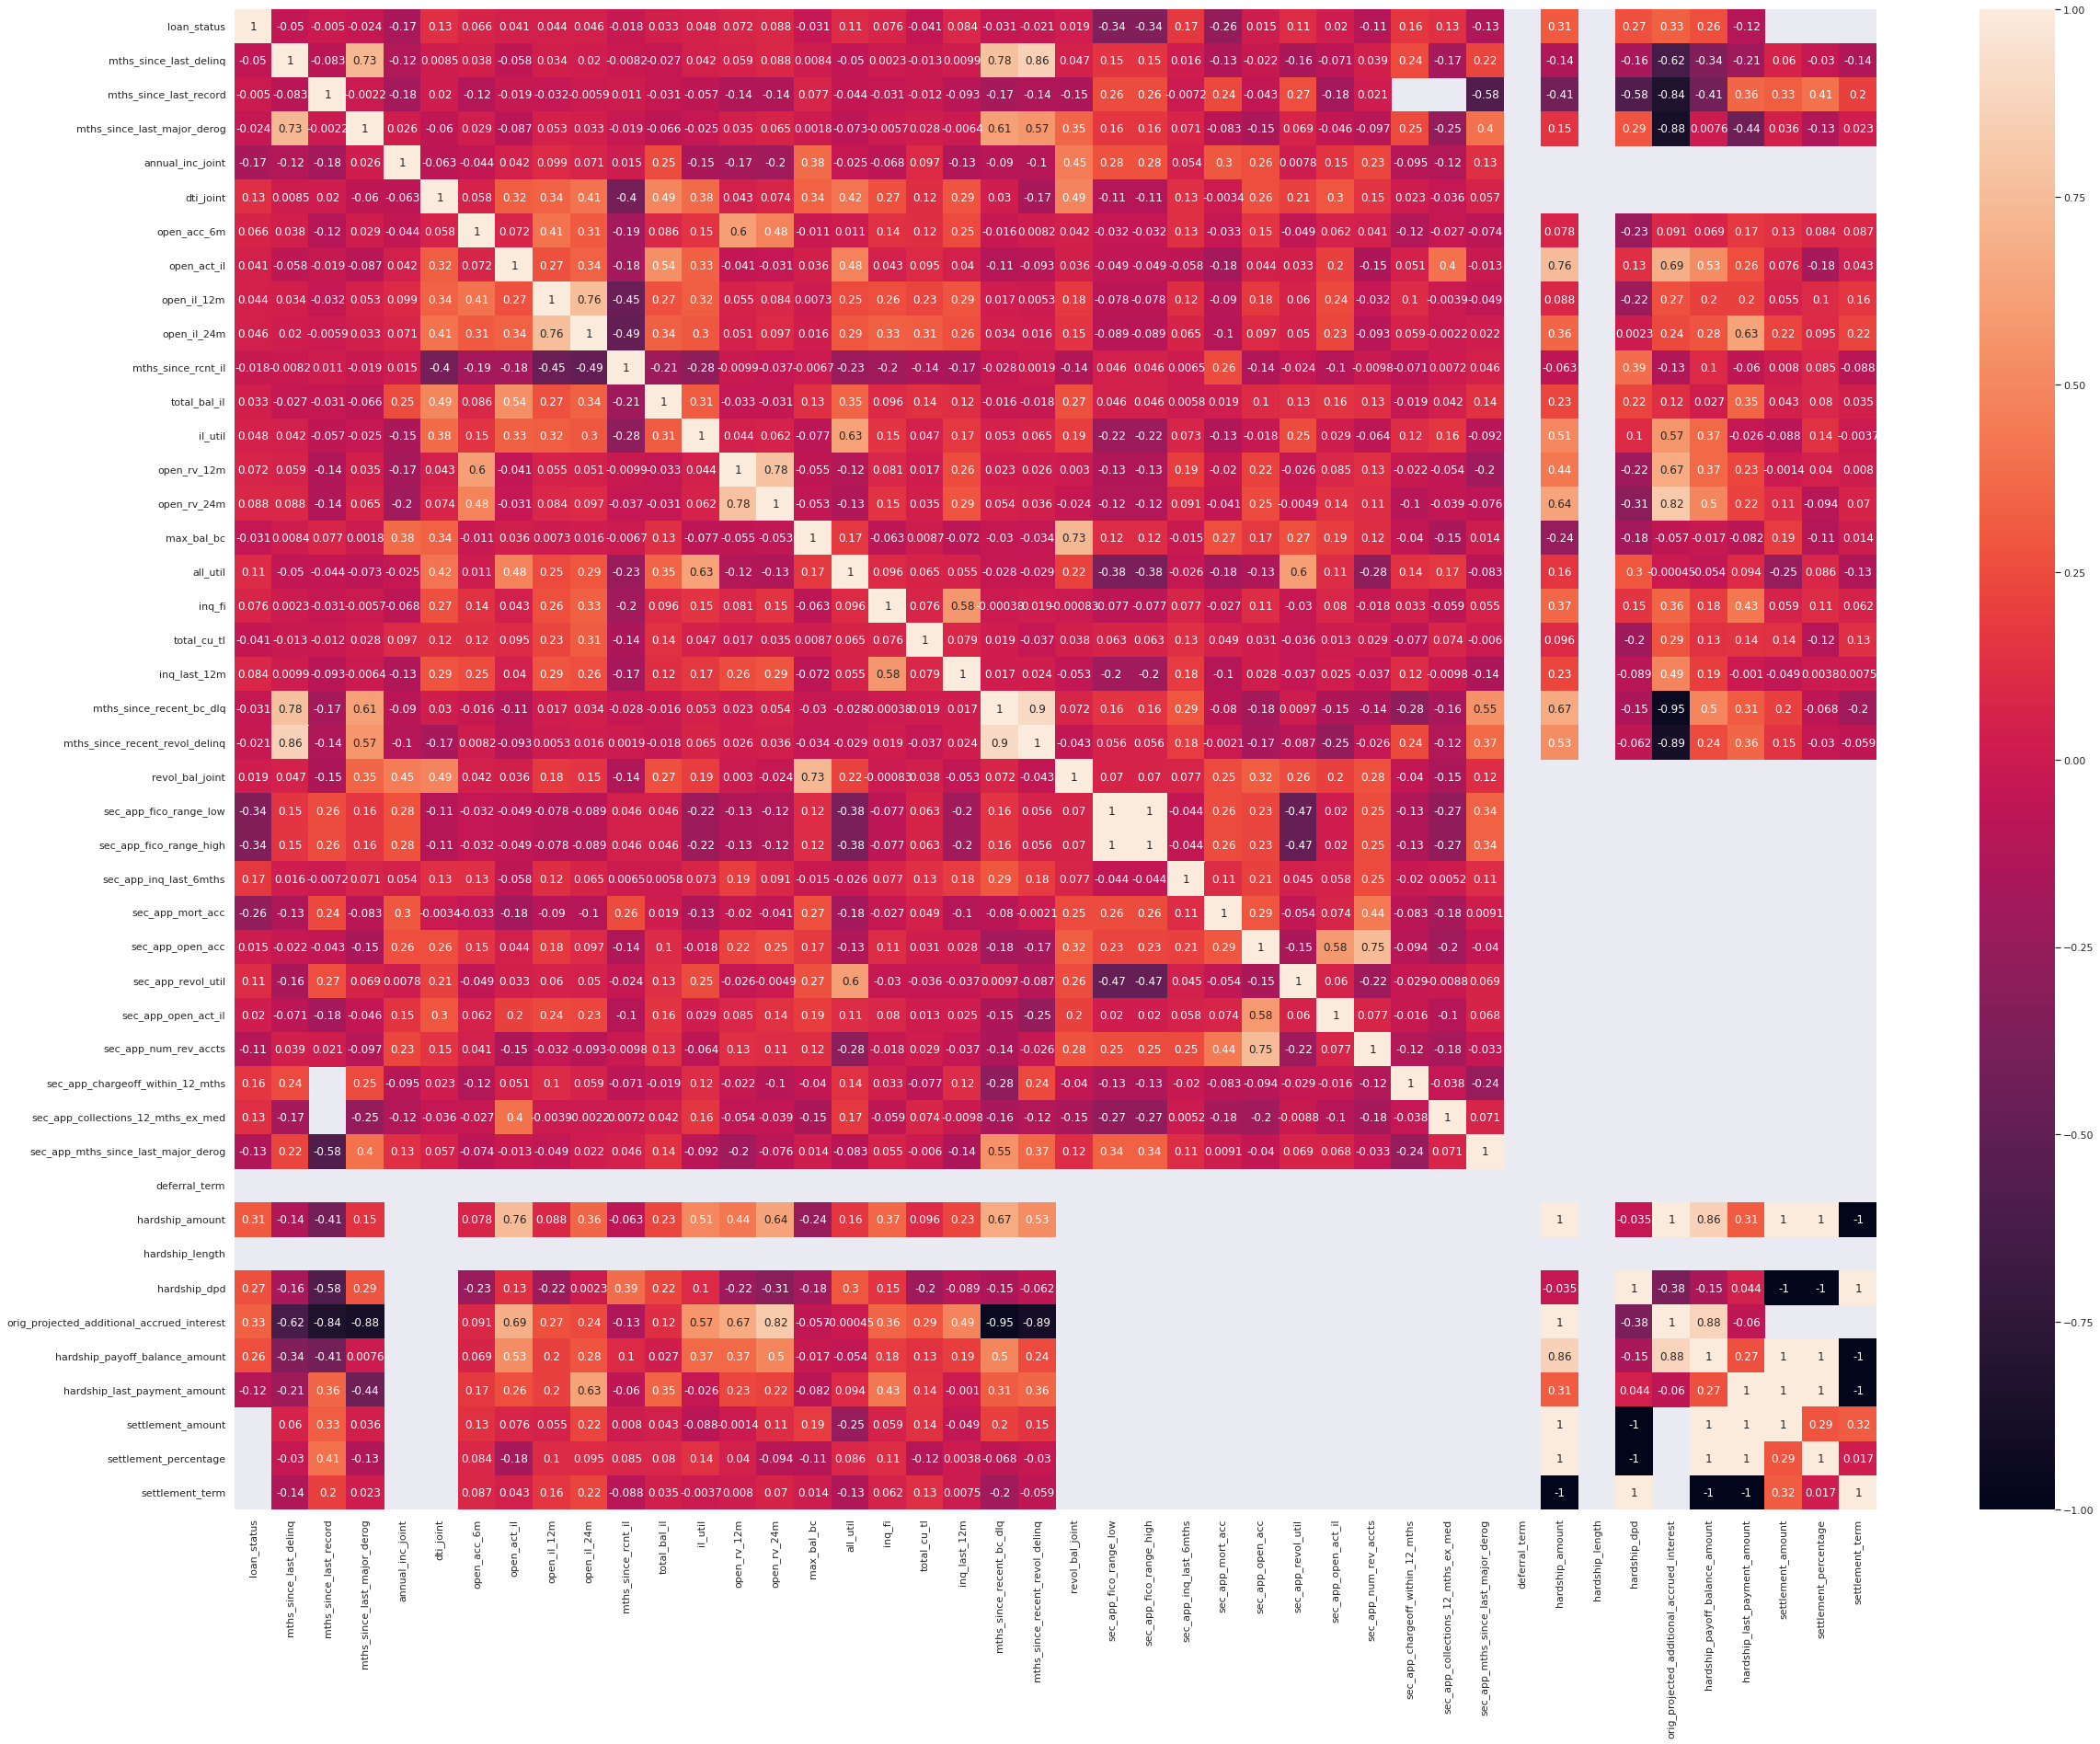

In [ ]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(df_temp.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
temp.remove('loan_status')
for i in temp:
    del df[i]

In [ ]:
print("Looking into remaining columns info:")
print(df.info(max_cols=200))

Looking into remaining columns info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7254 non-null   object 
 1   loan_amnt                   7254 non-null   float64
 2   funded_amnt                 7254 non-null   float64
 3   funded_amnt_inv             7254 non-null   float64
 4   term                        7254 non-null   object 
 5   int_rate                    7254 non-null   float64
 6   installment                 7254 non-null   float64
 7   grade                       7254 non-null   object 
 8   sub_grade                   7254 non-null   object 
 9   emp_title                   6759 non-null   object 
 10  emp_length                  6824 non-null   object 
 11  home_ownership              7254 non-null   object 
 12  annual_inc                  7254 non-null   float

# Handle Data Leakage

In [ ]:
future_variables_list = [ #list of future variable
    "last_pymnt_amnt",
    "last_pymnt_d",
    "issue_d",
    "num_tl_120dpd_2m",
    "num_tl_30dpd",
    "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m",
    "total_bal_ex_mort",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_int",
    "total_rec_late_fee",
    "total_rec_prncp",
    "total_rev_hi_lim",
    "mo_sin_rcnt_tl",
    "mths_since_recent_bc",
    "mths_since_recent_inq",
    "num_accts_ever_120_pd",
    "num_actv_bc_tl",
    "num_actv_rev_tl",
    "num_bc_sats",
    "num_op_rev_tl",
    "num_rev_accts",
    "num_rev_tl_bal_gt_0",
    "num_sats", 
    "bc_open_to_buy",
    "pct_tl_nvr_dlq",
    "percent_bc_gt_75",
    "last_credit_pull_d",
    "collections_12_mths_ex_med",
    "collections_12_mths_ex_med",
    "mo_sin_rcnt_rev_tl_op",
    "mo_sin_rcnt_tl",
    "mo_sin_old_rev_tl_op",
    "mo_sin_old_il_acct",
    "out_prncp",
    "out_prncp_inv",
    "collection_recovery_fee",
    "delinq_amnt",
    "chargeoff_within_12_mths",
    "acc_open_past_24mths",
    'recoveries',
    'inq_last_6mths',
    'debt_settlement_flag',
]
len(future_variables_list)

44

In [ ]:
df.drop(future_variables_list, axis = 1,inplace=True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7254 non-null   object 
 1   loan_amnt                   7254 non-null   float64
 2   funded_amnt                 7254 non-null   float64
 3   funded_amnt_inv             7254 non-null   float64
 4   term                        7254 non-null   object 
 5   int_rate                    7254 non-null   float64
 6   installment                 7254 non-null   float64
 7   grade                       7254 non-null   object 
 8   sub_grade                   7254 non-null   object 
 9   emp_title                   6759 non-null   object 
 10  emp_length                  6824 non-null   object 
 11  home_ownership              7254 non-null   object 
 12  annual_inc                  7254 non-null   float64
 13  verification_status         7

# Check Duplicate Data

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, loan_status, pymnt_plan, url, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, last_fico_range_high, last_fico_range_low, policy_code, application_type, acc_now_delinq, tot_coll_amt, tot_cur_bal, avg_cur_bal, bc_util, mort_acc, num_bc_tl, num_il_tl, pub_rec_bankruptcies, tax_liens, tot_hi_cred_lim, total_bc_limit, total_il_high_credit_limit, hardship_flag, disbursement_method]
Index: []

[0 rows x 51 columns]

# Check Outliers

In [ ]:
col = [column for column in df.columns if df[column].dtype != object]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

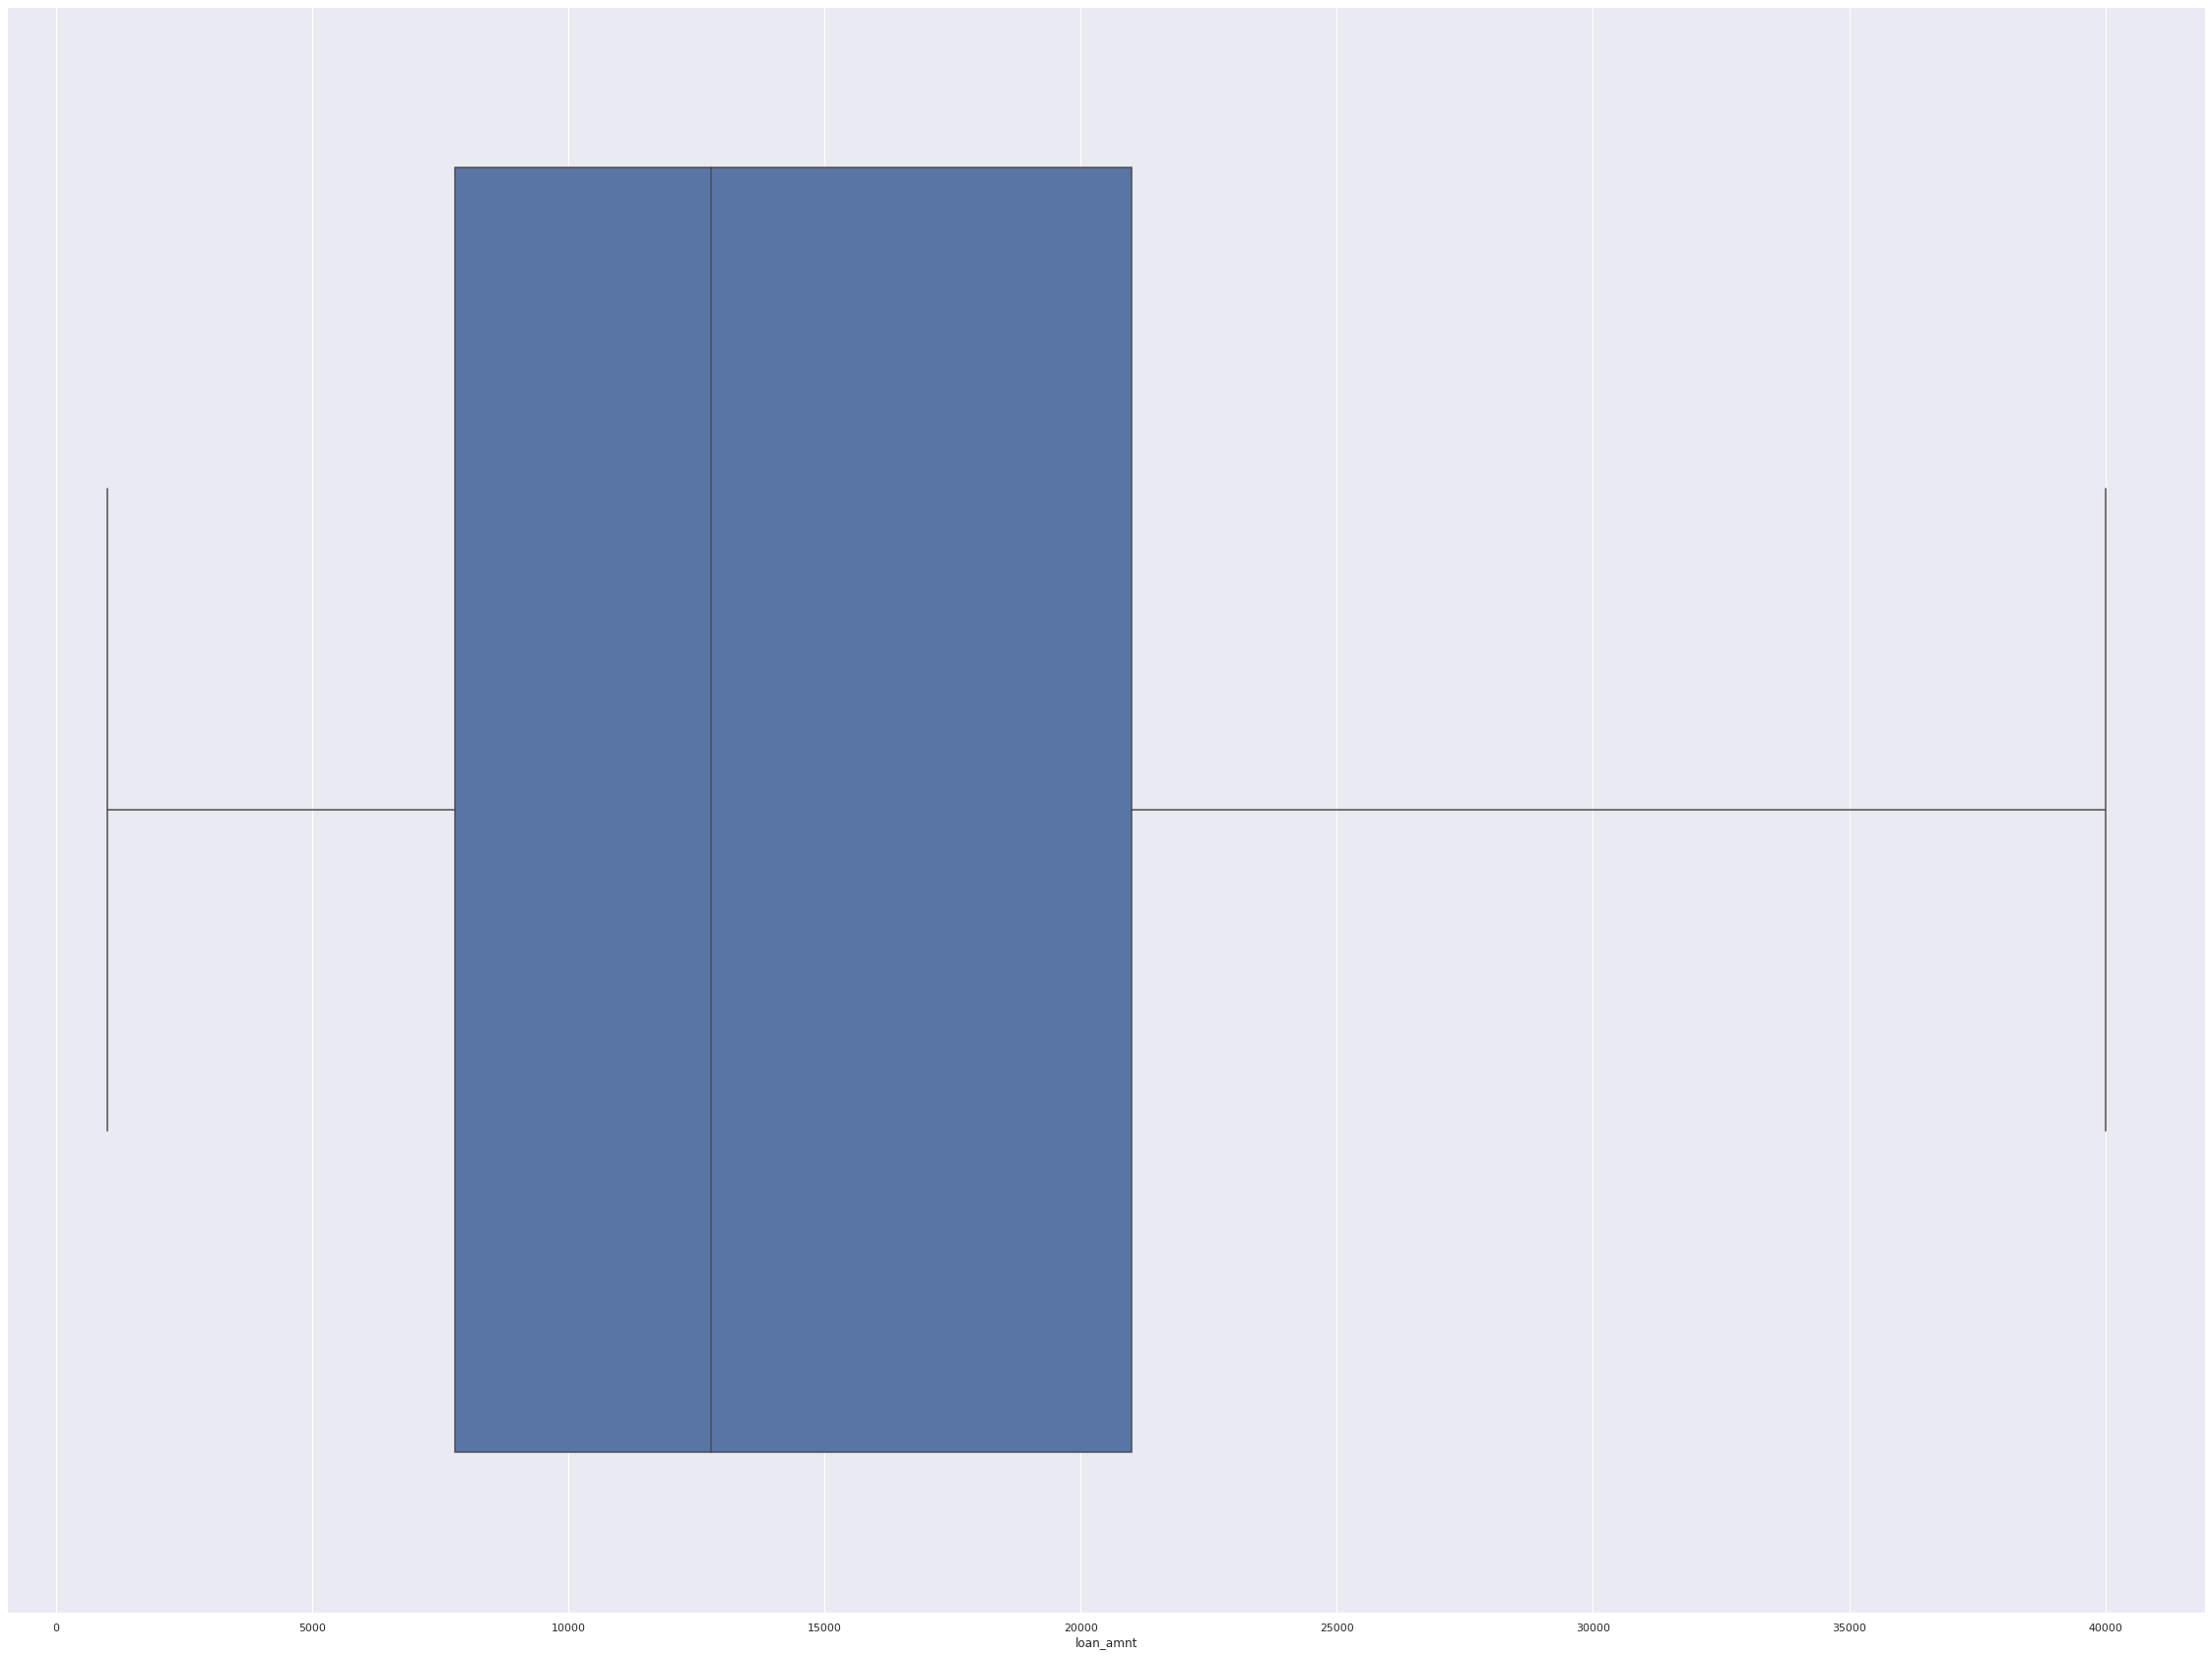

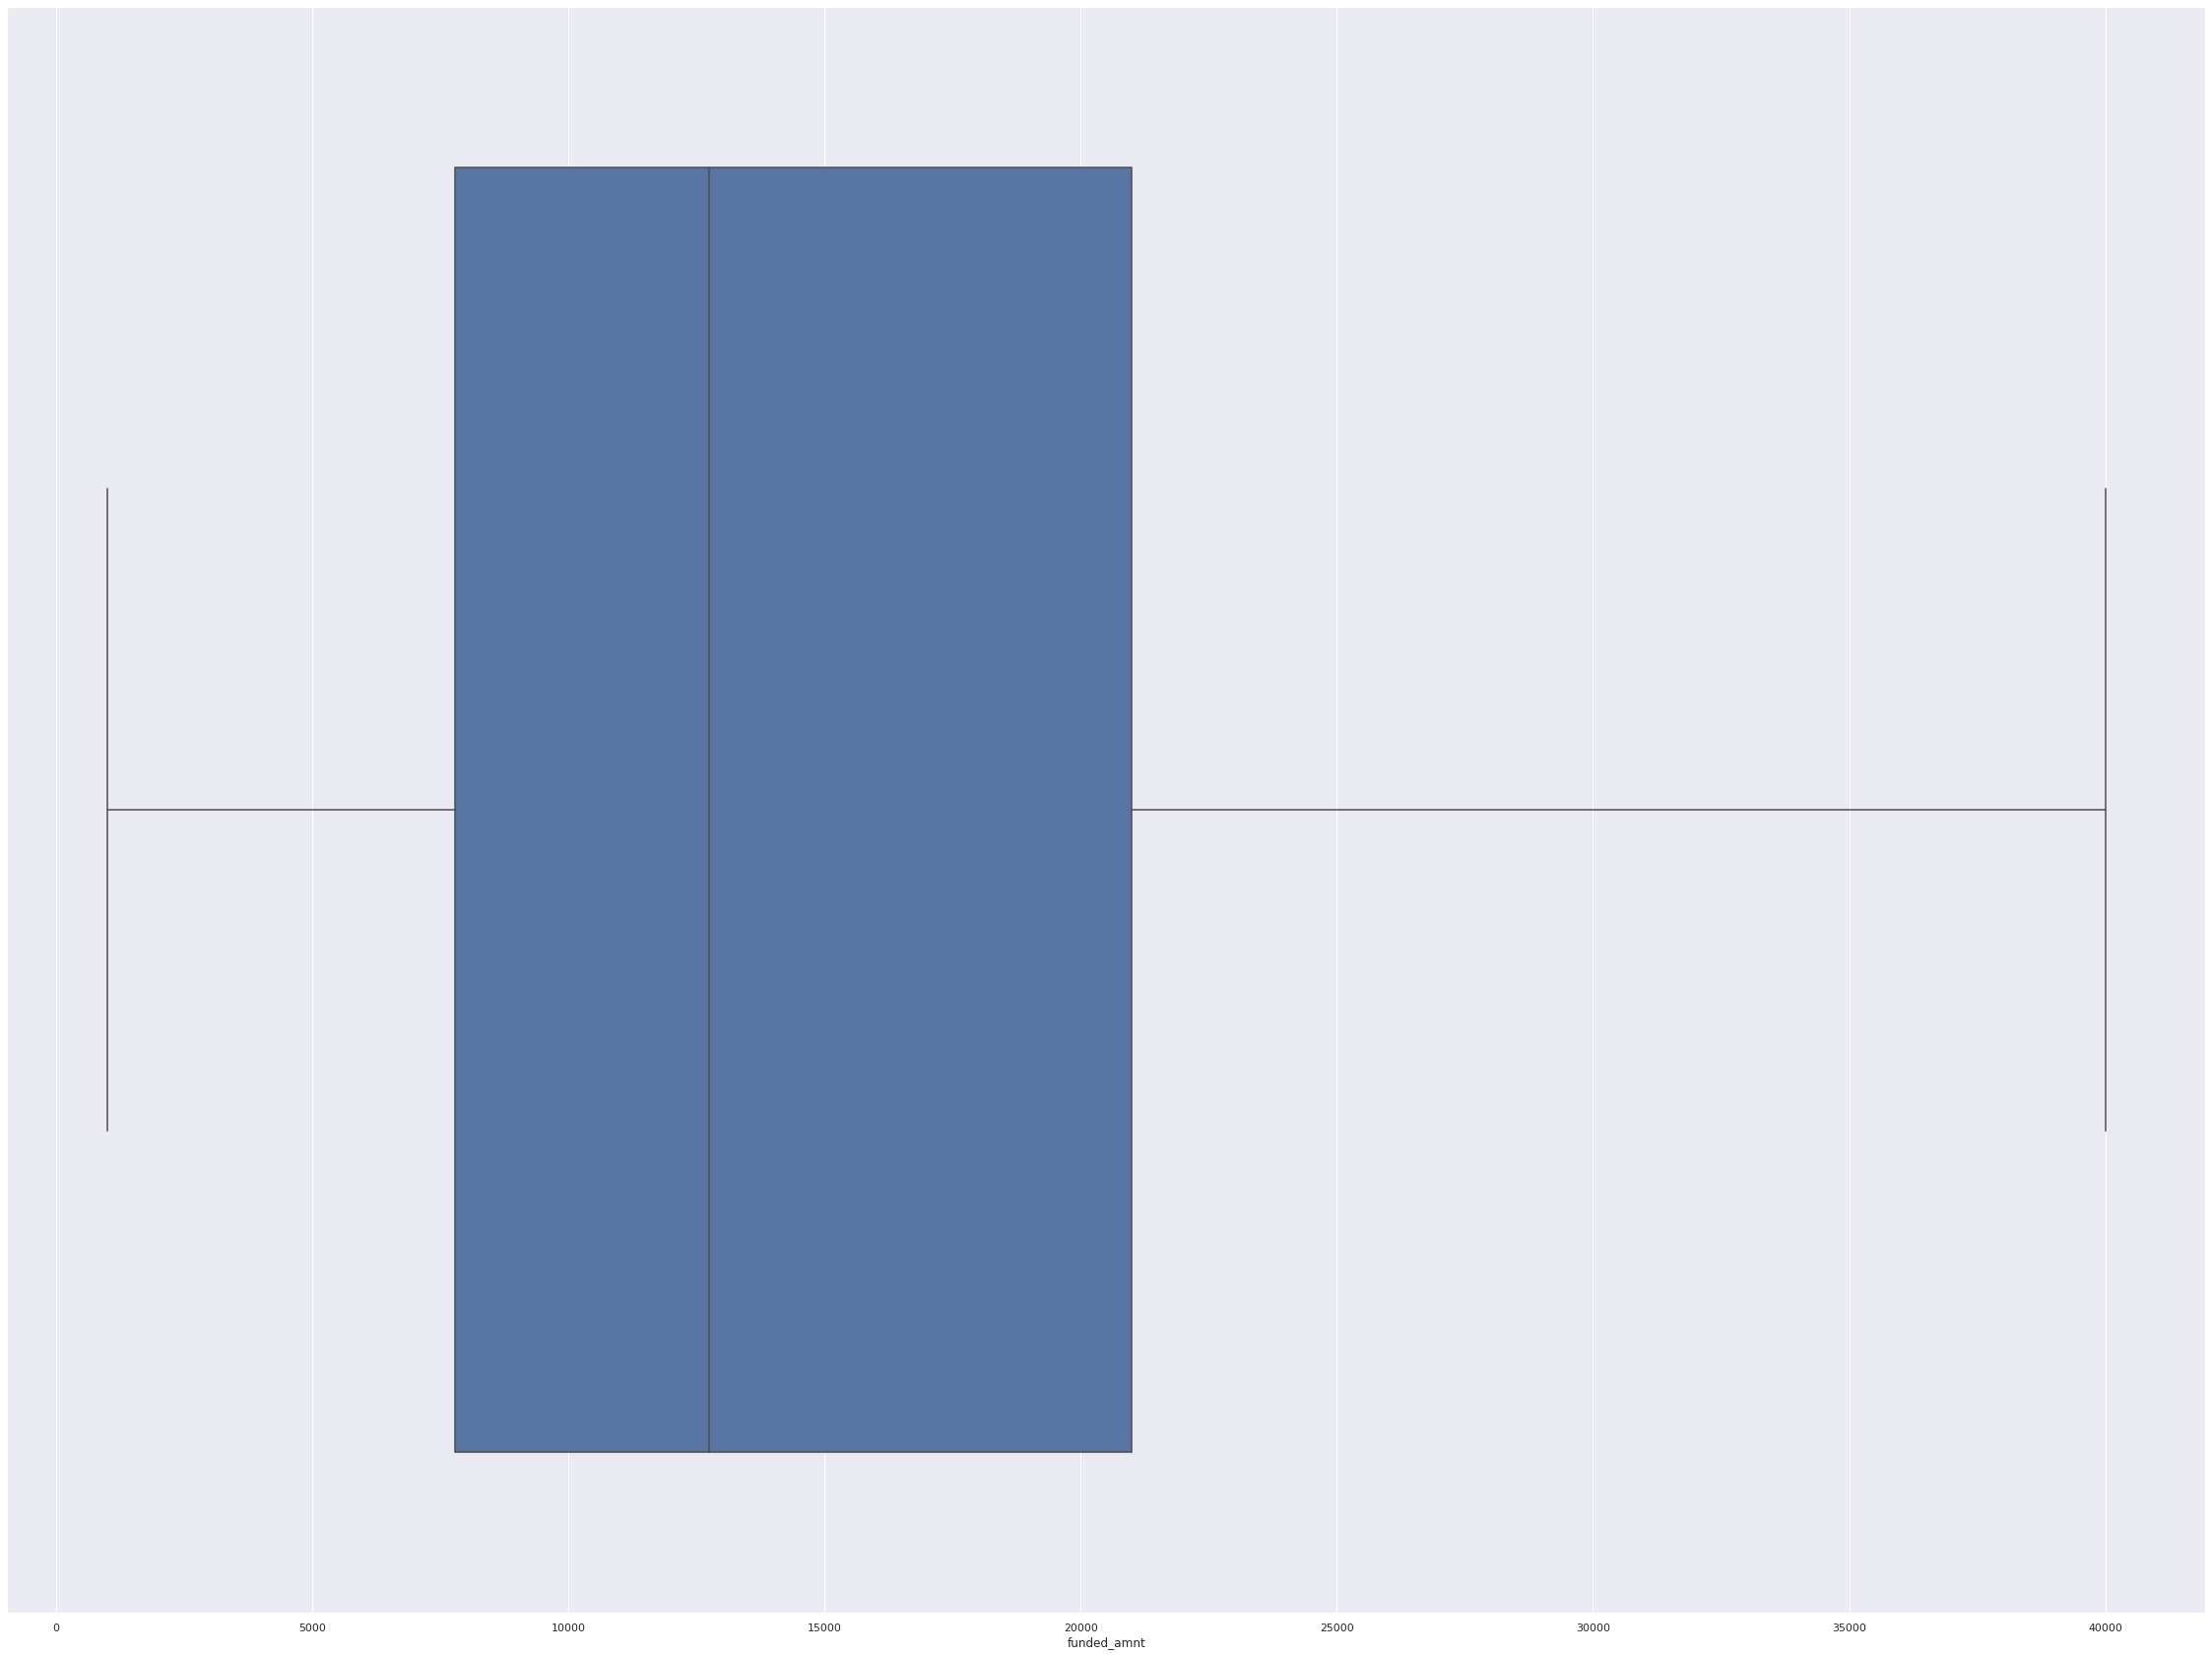

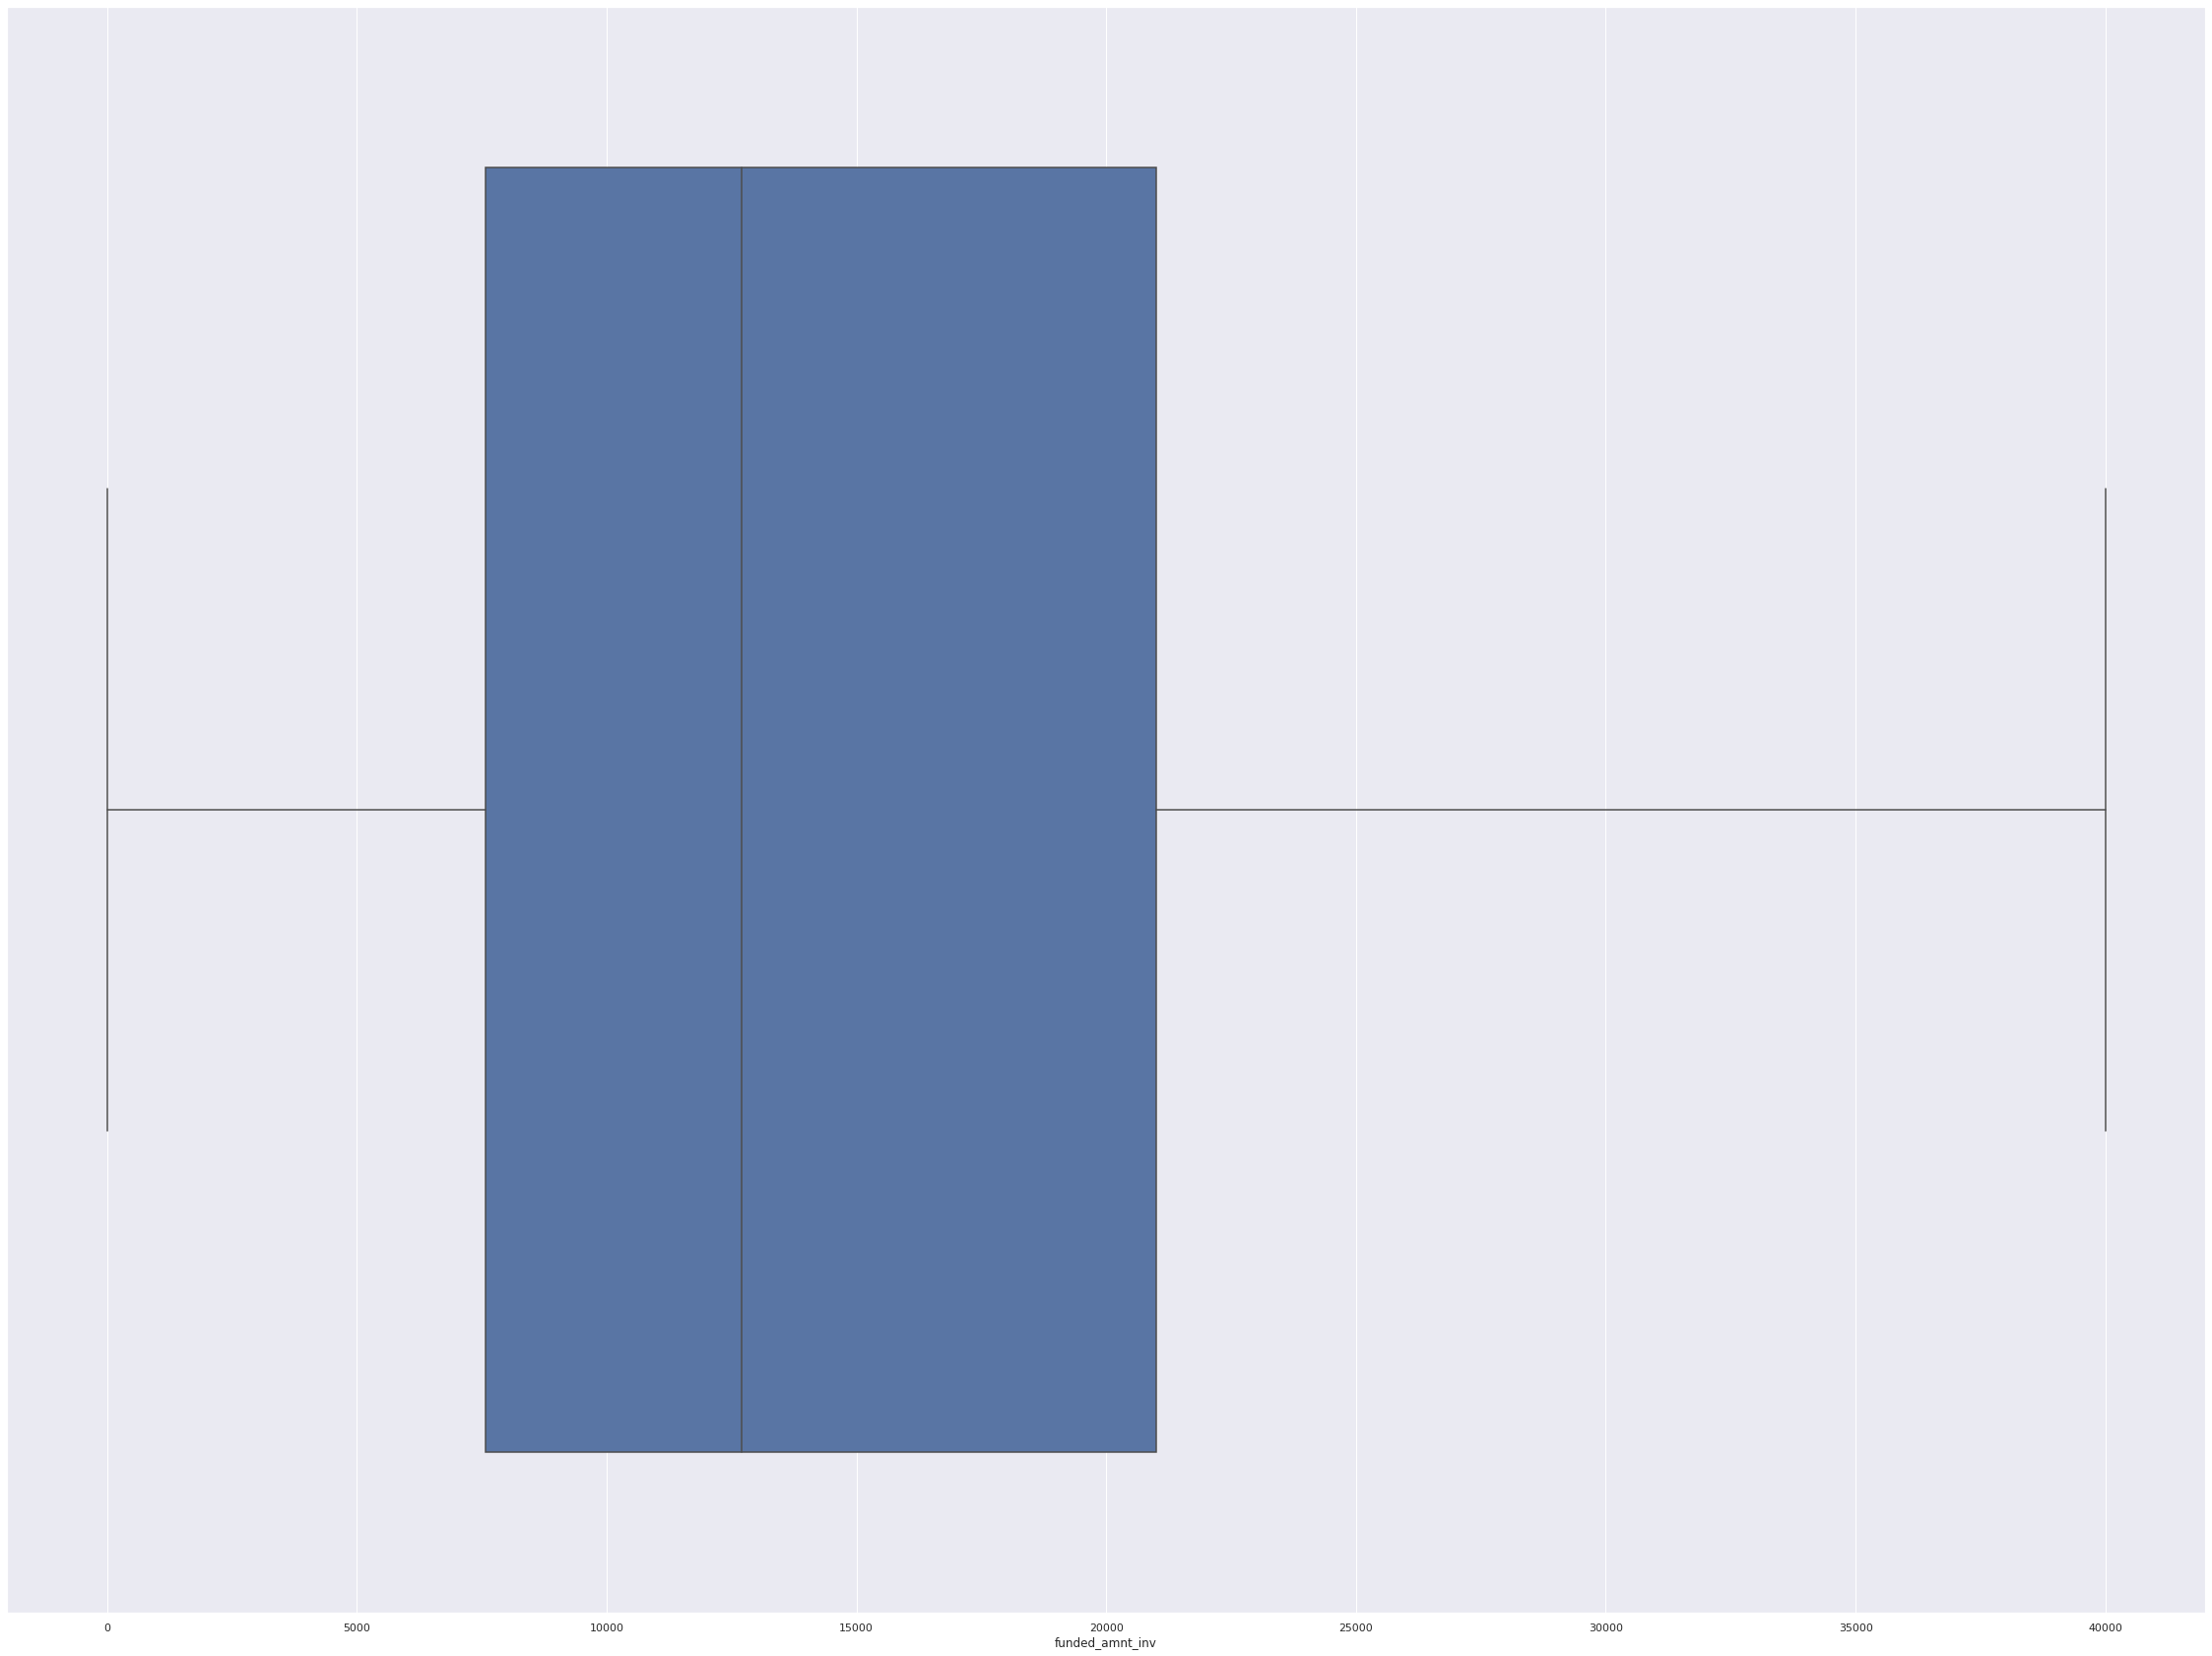

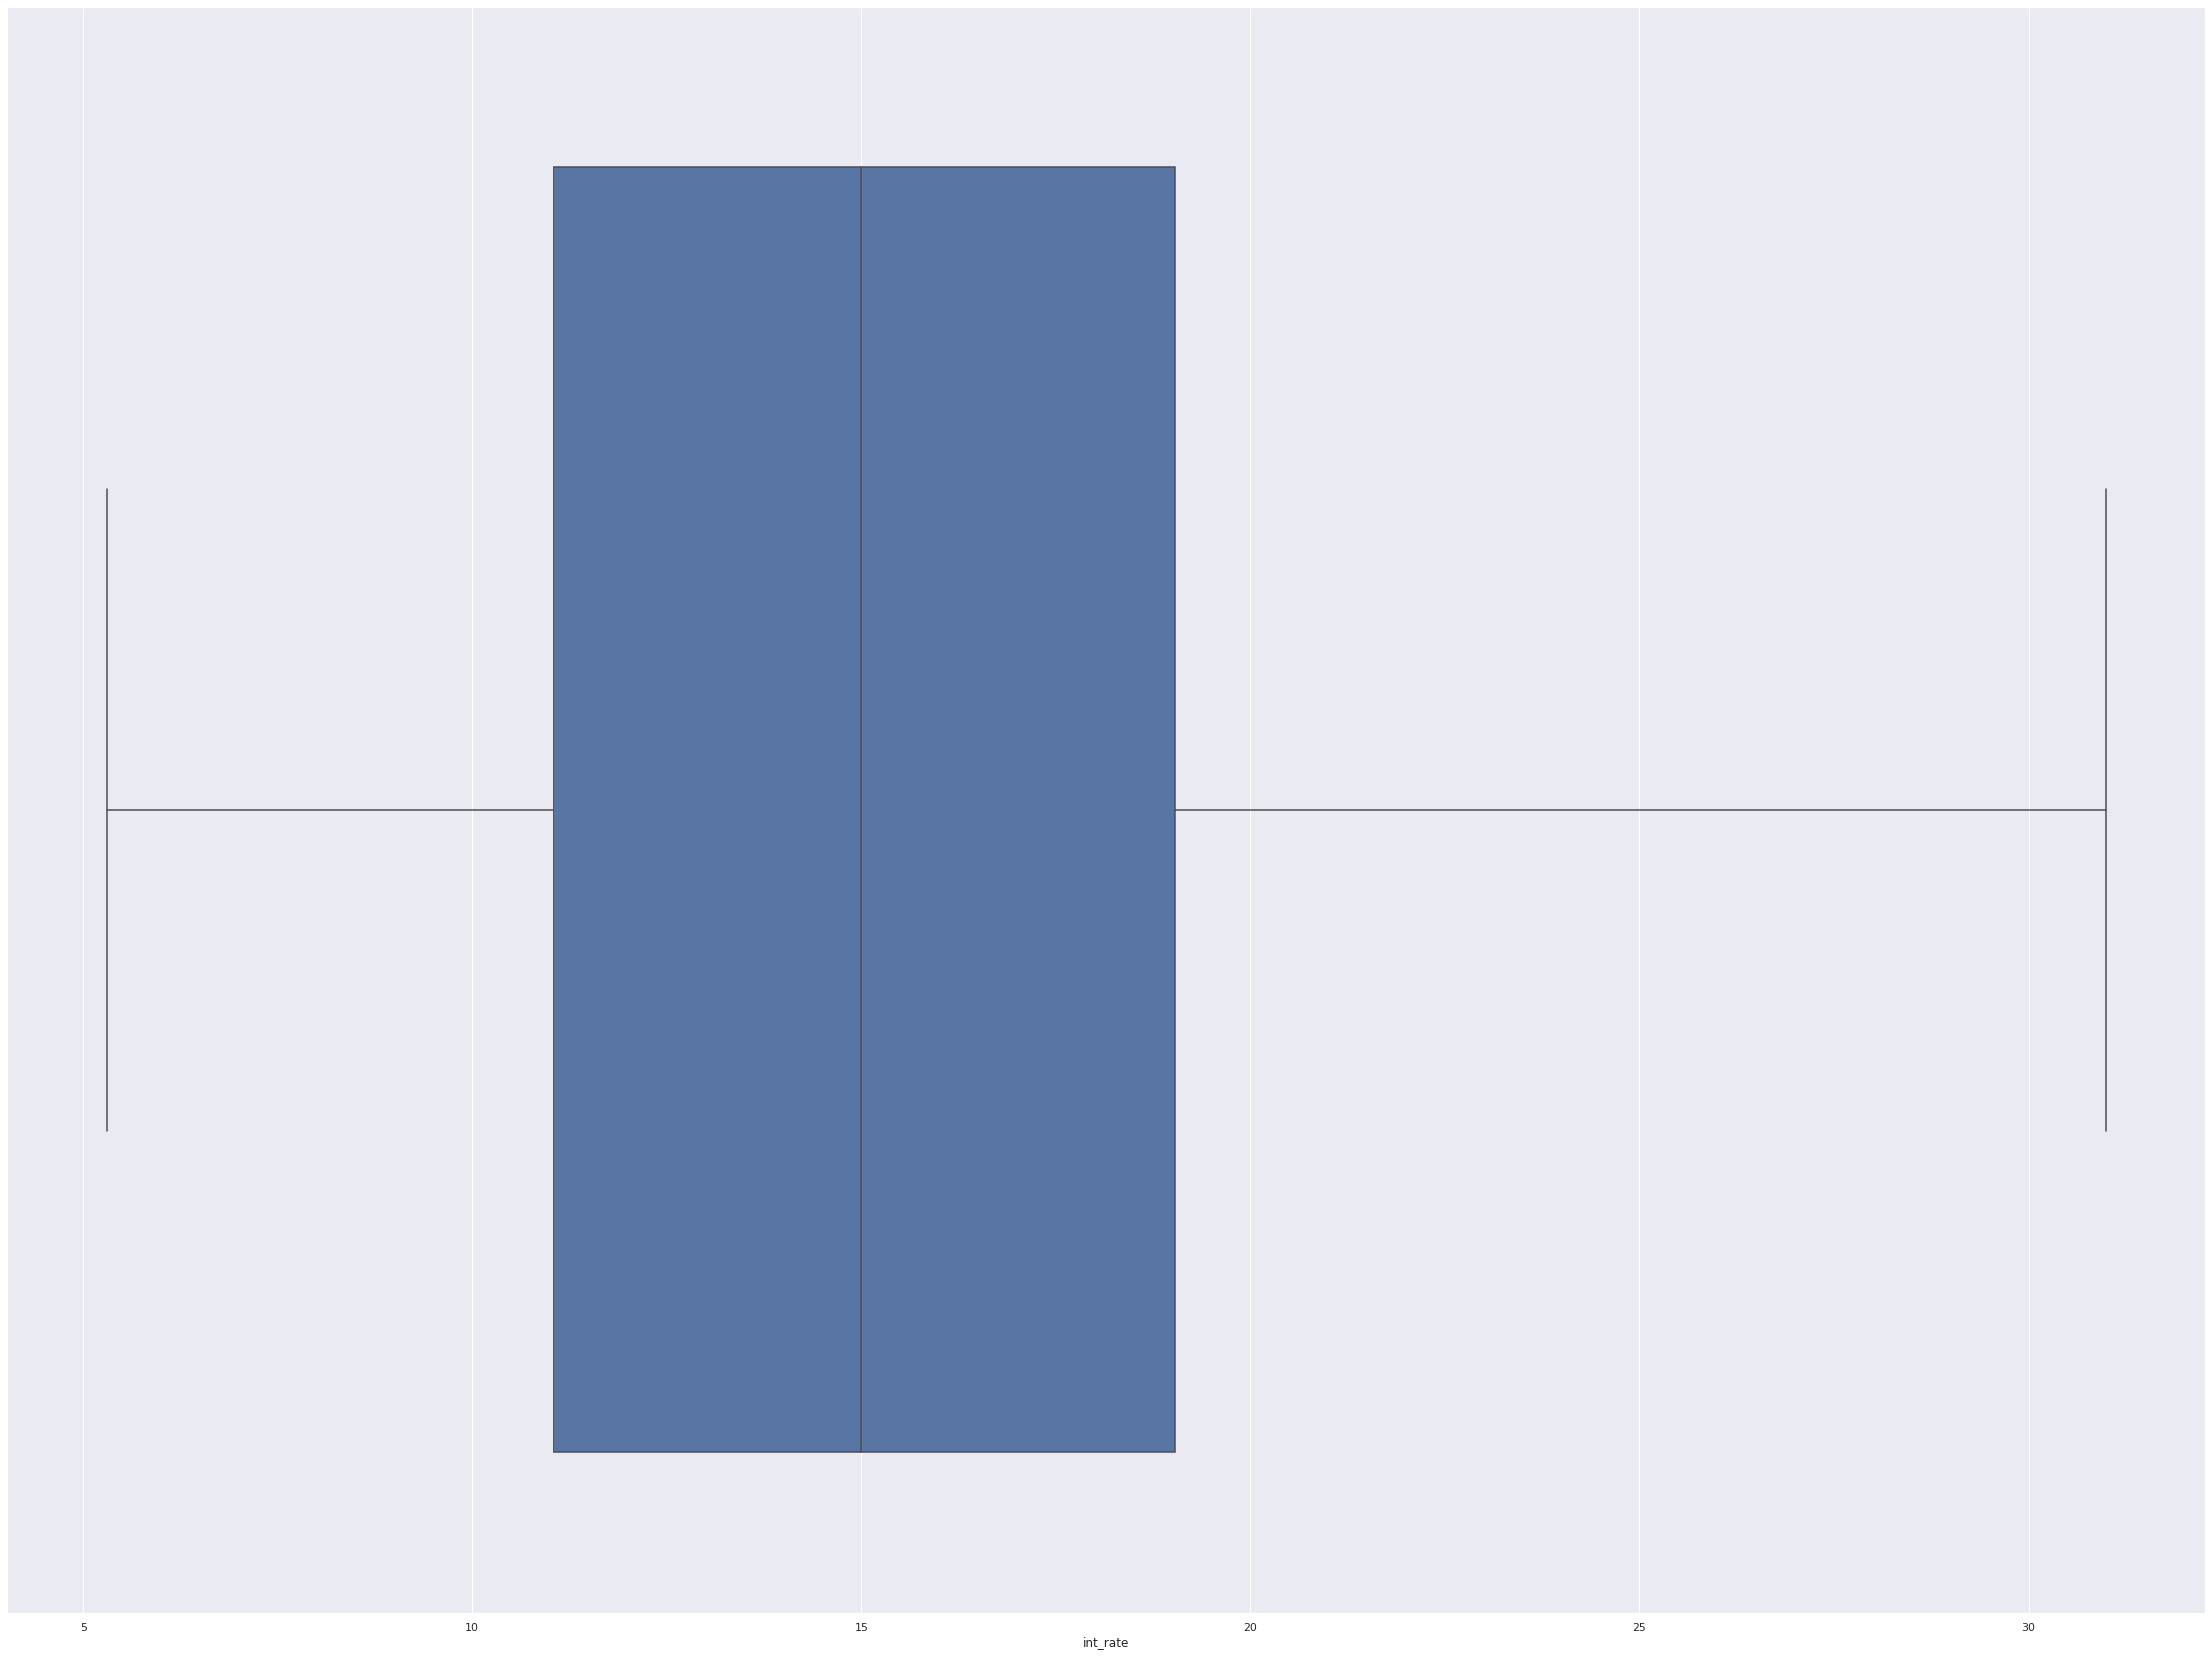

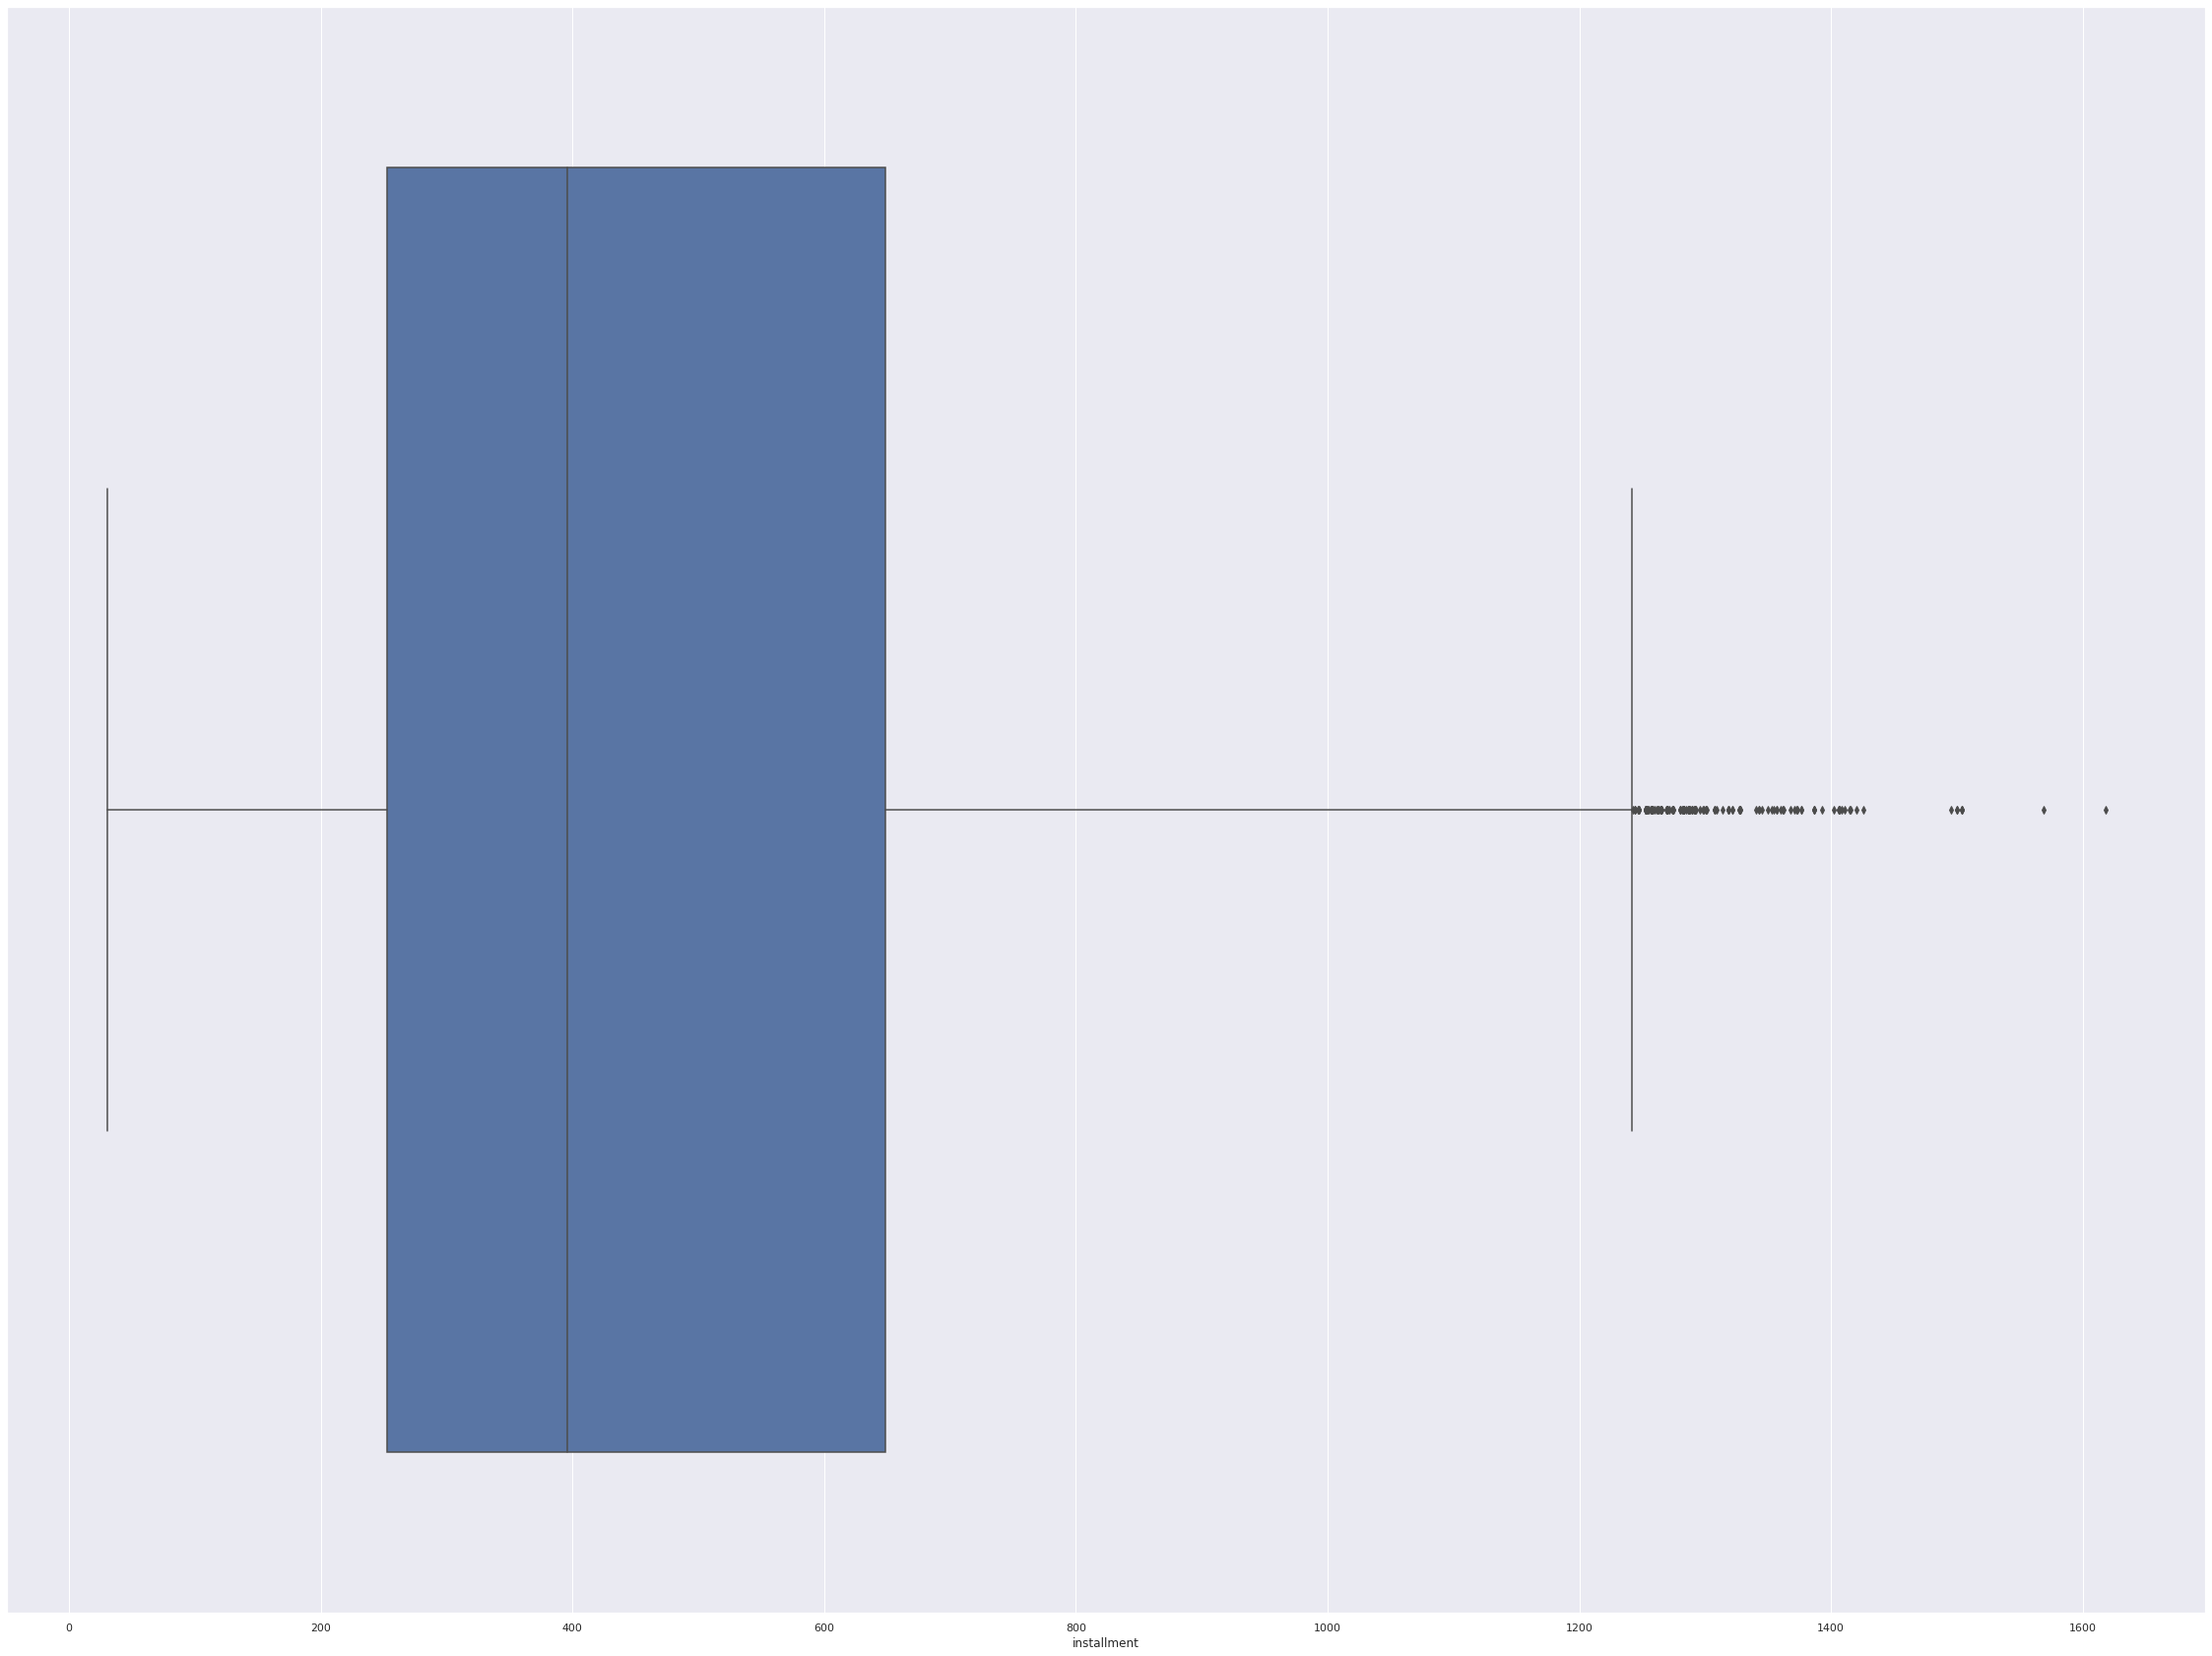

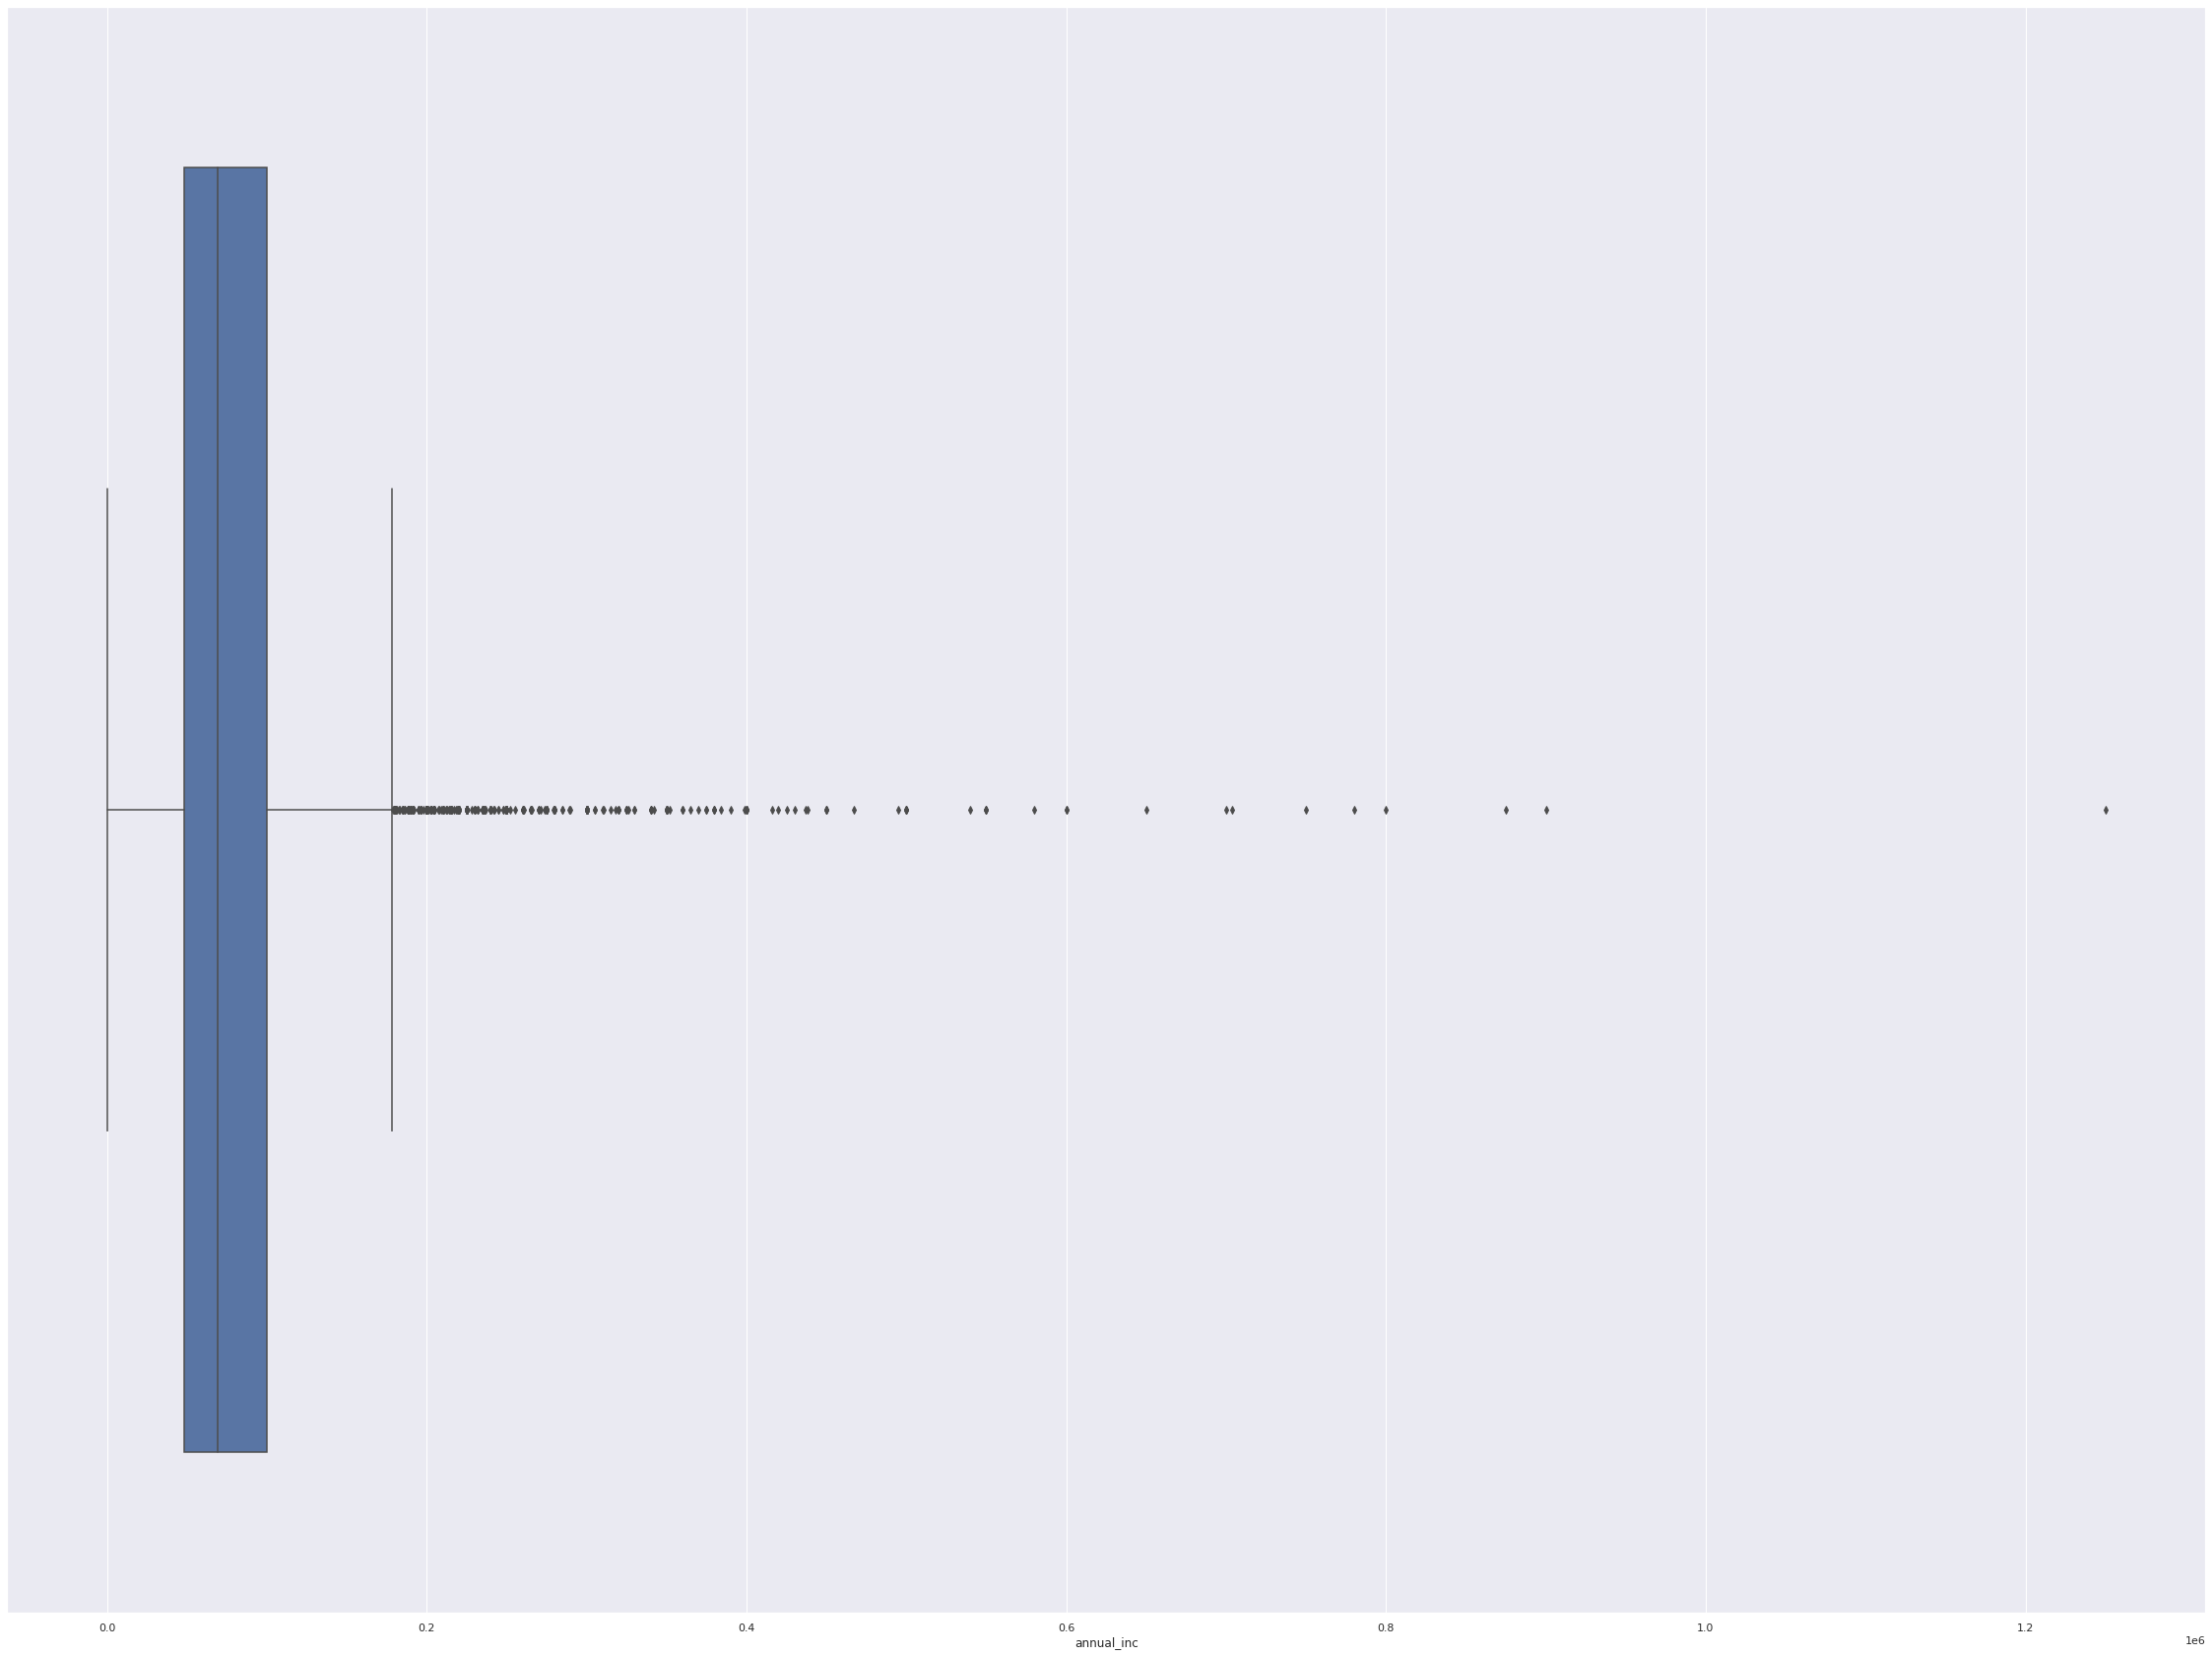

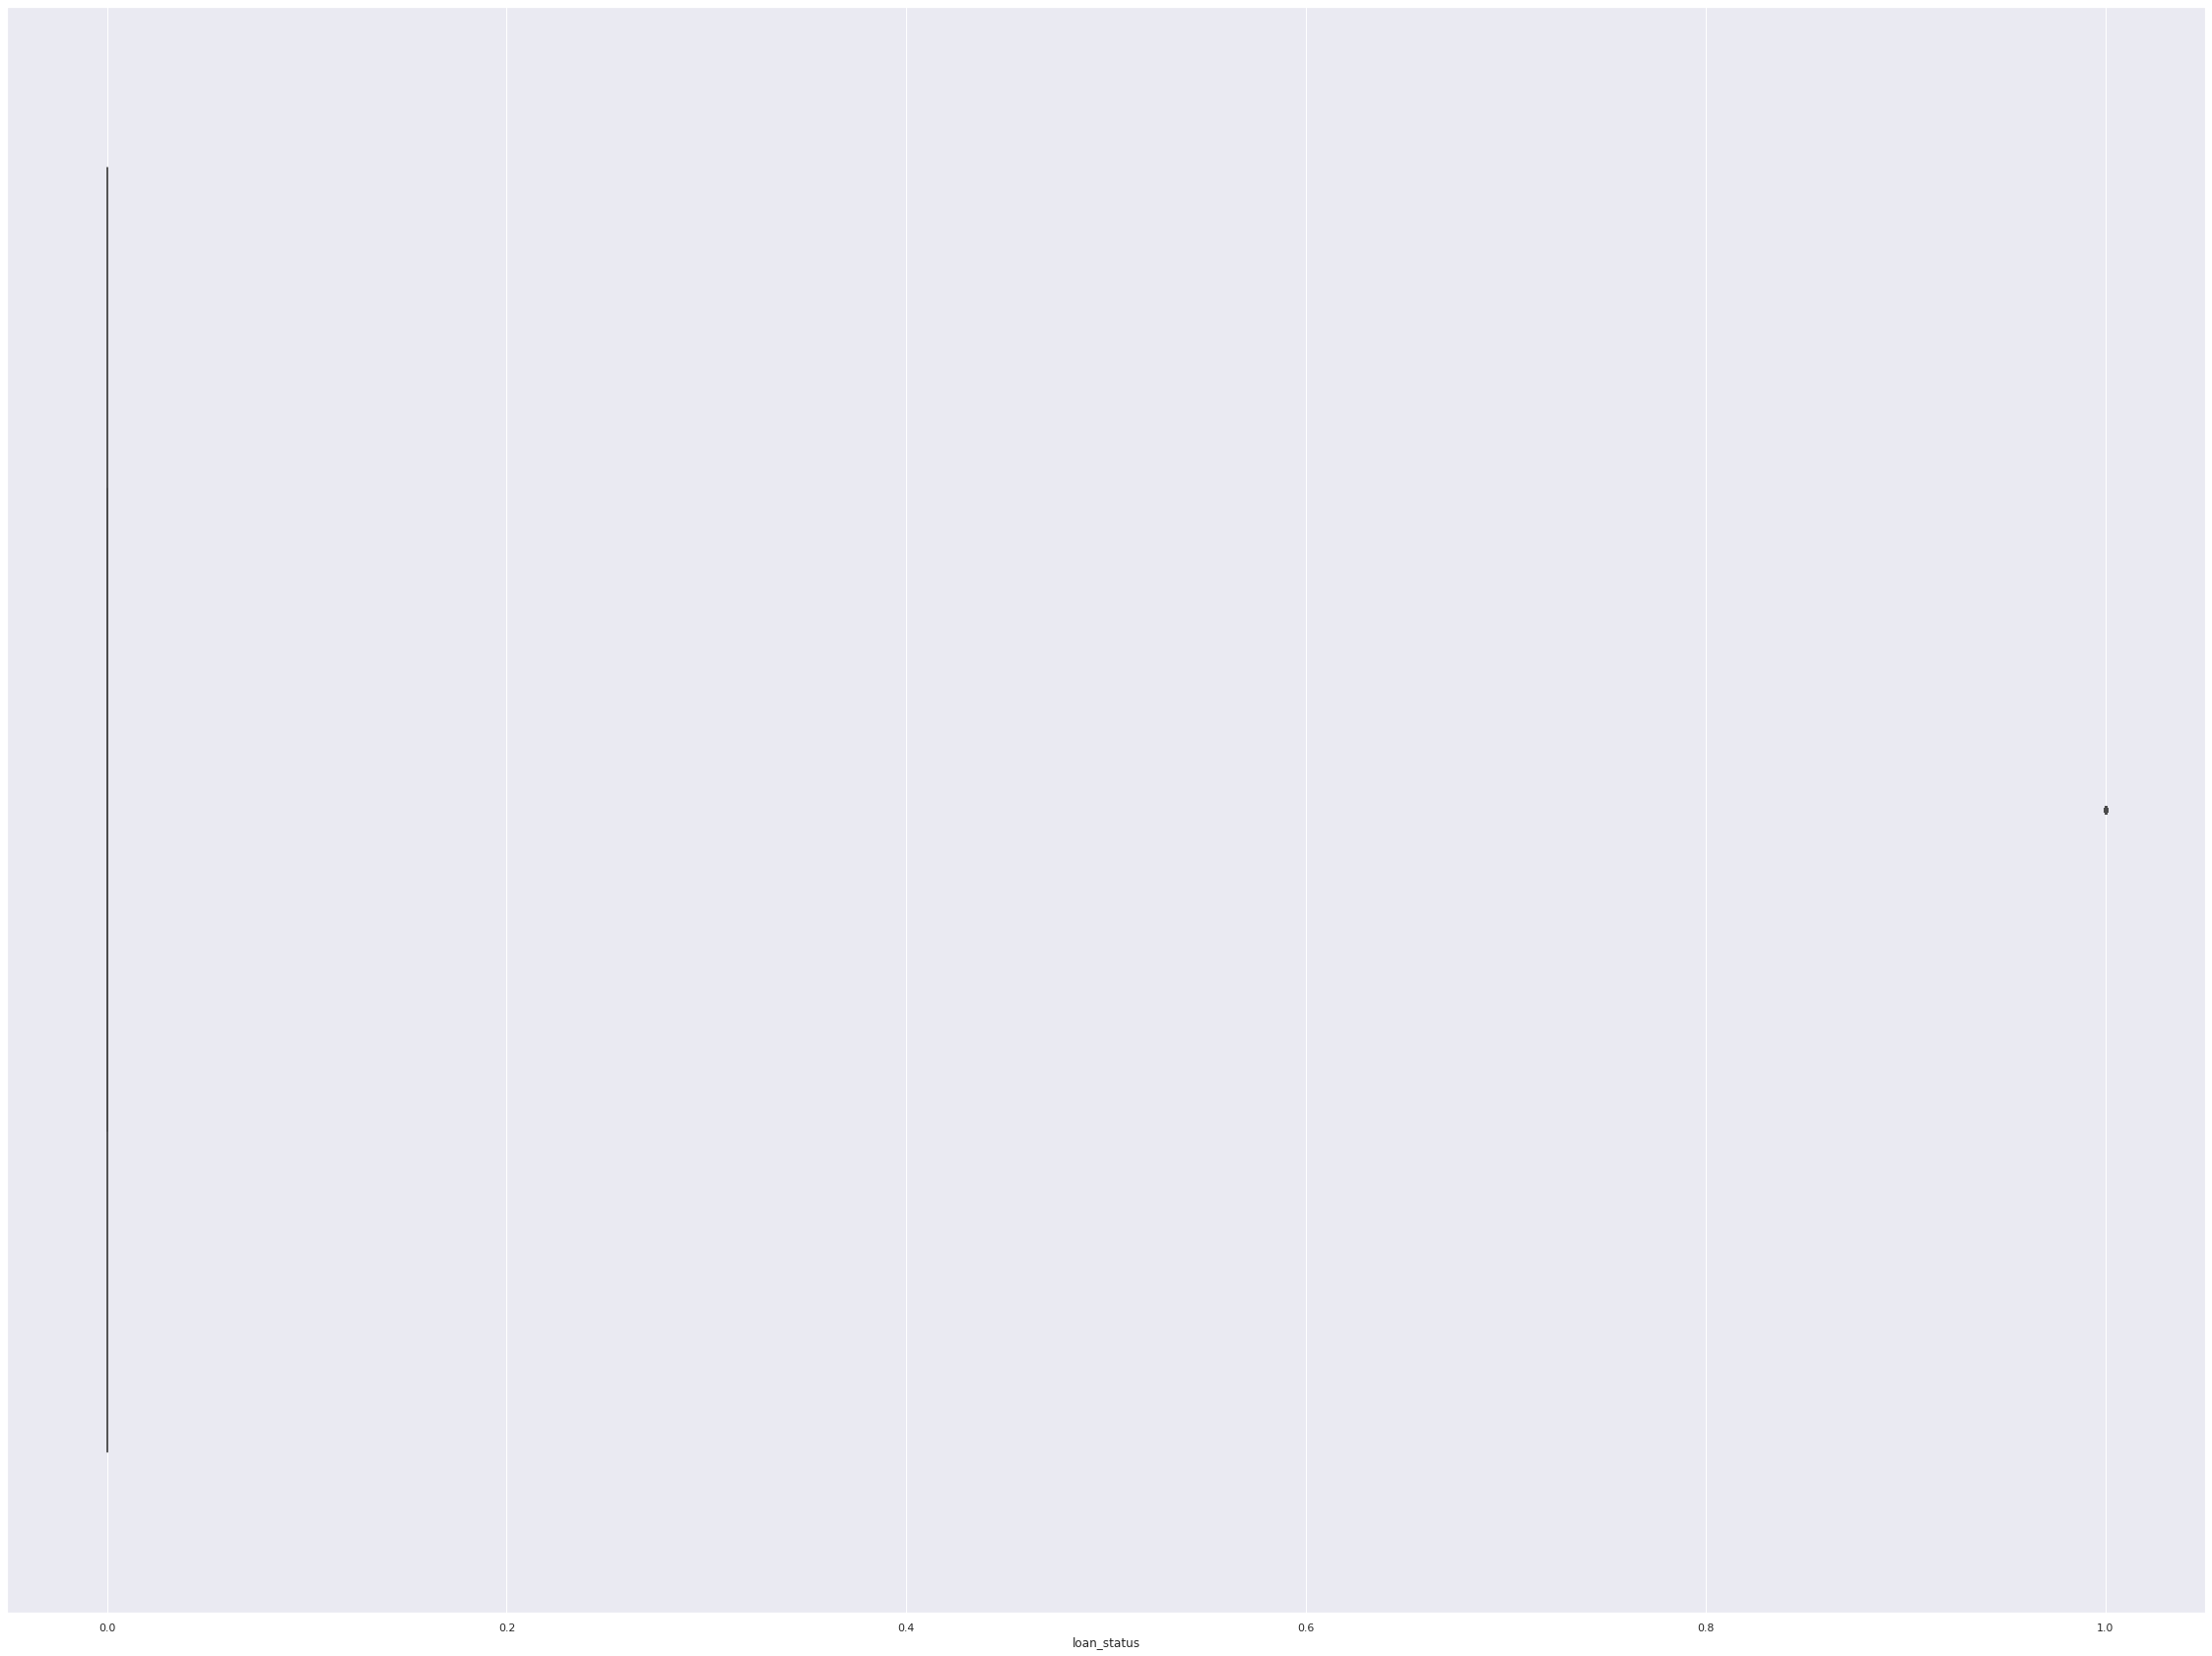

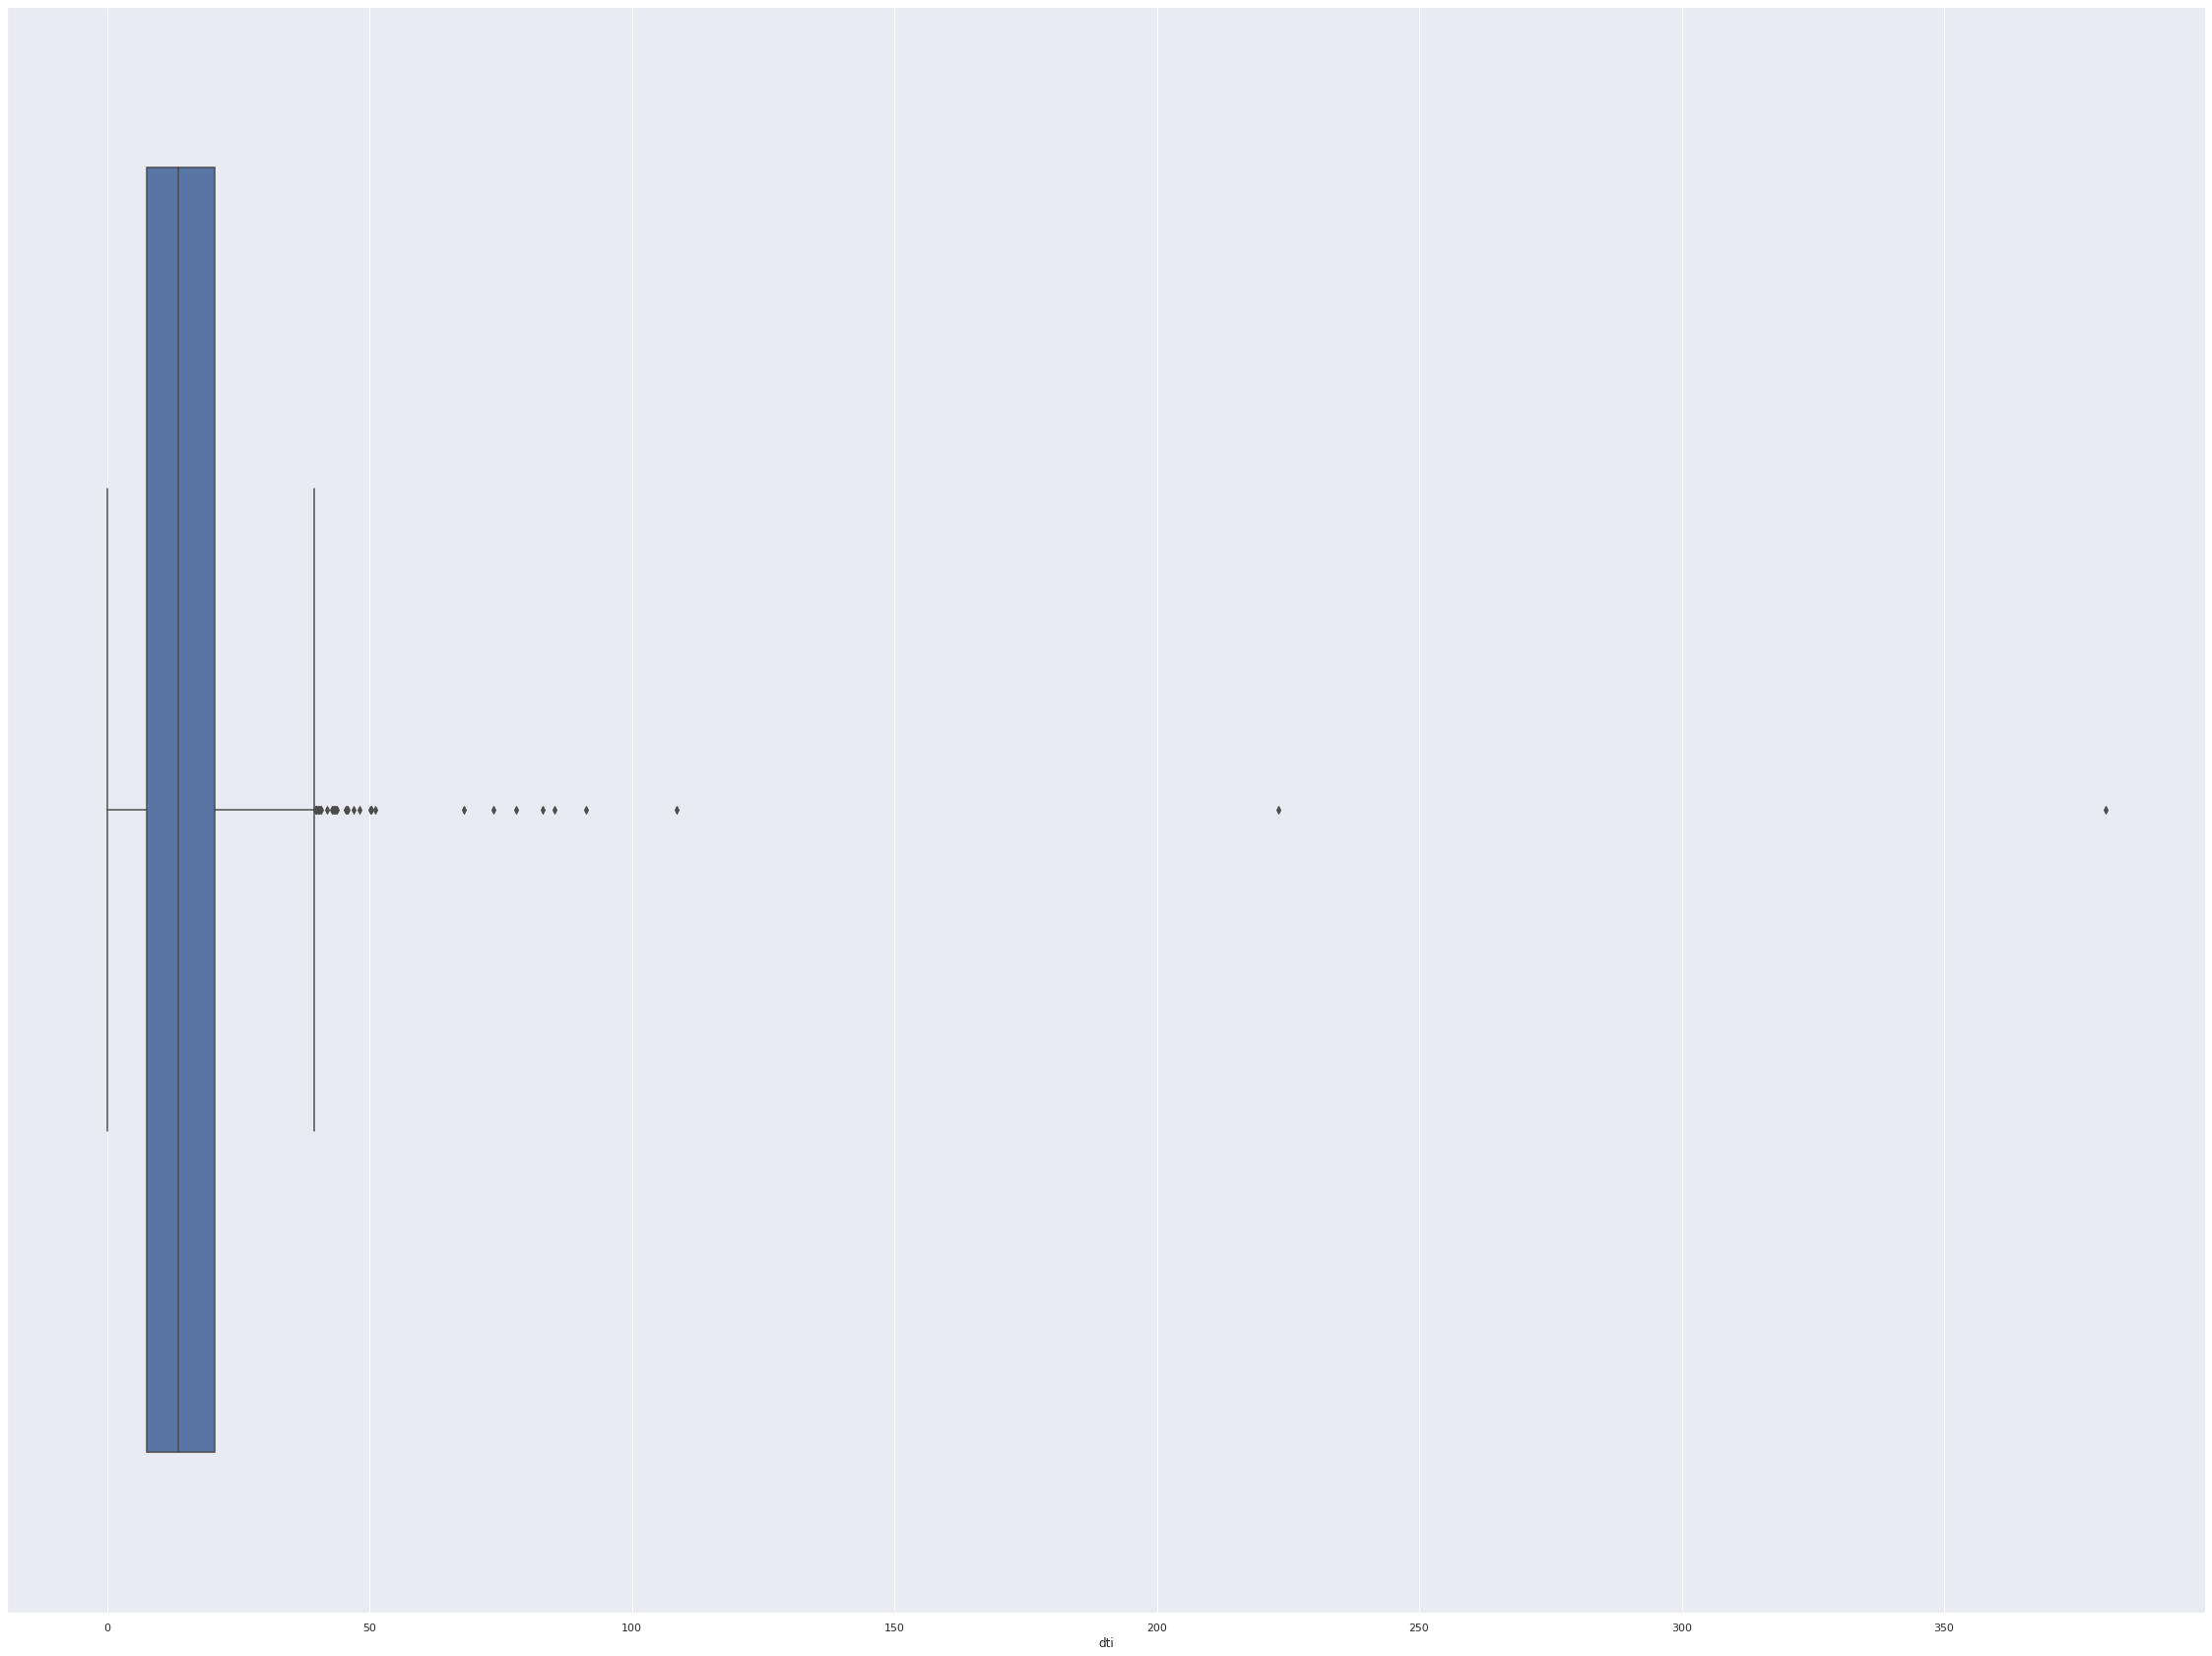

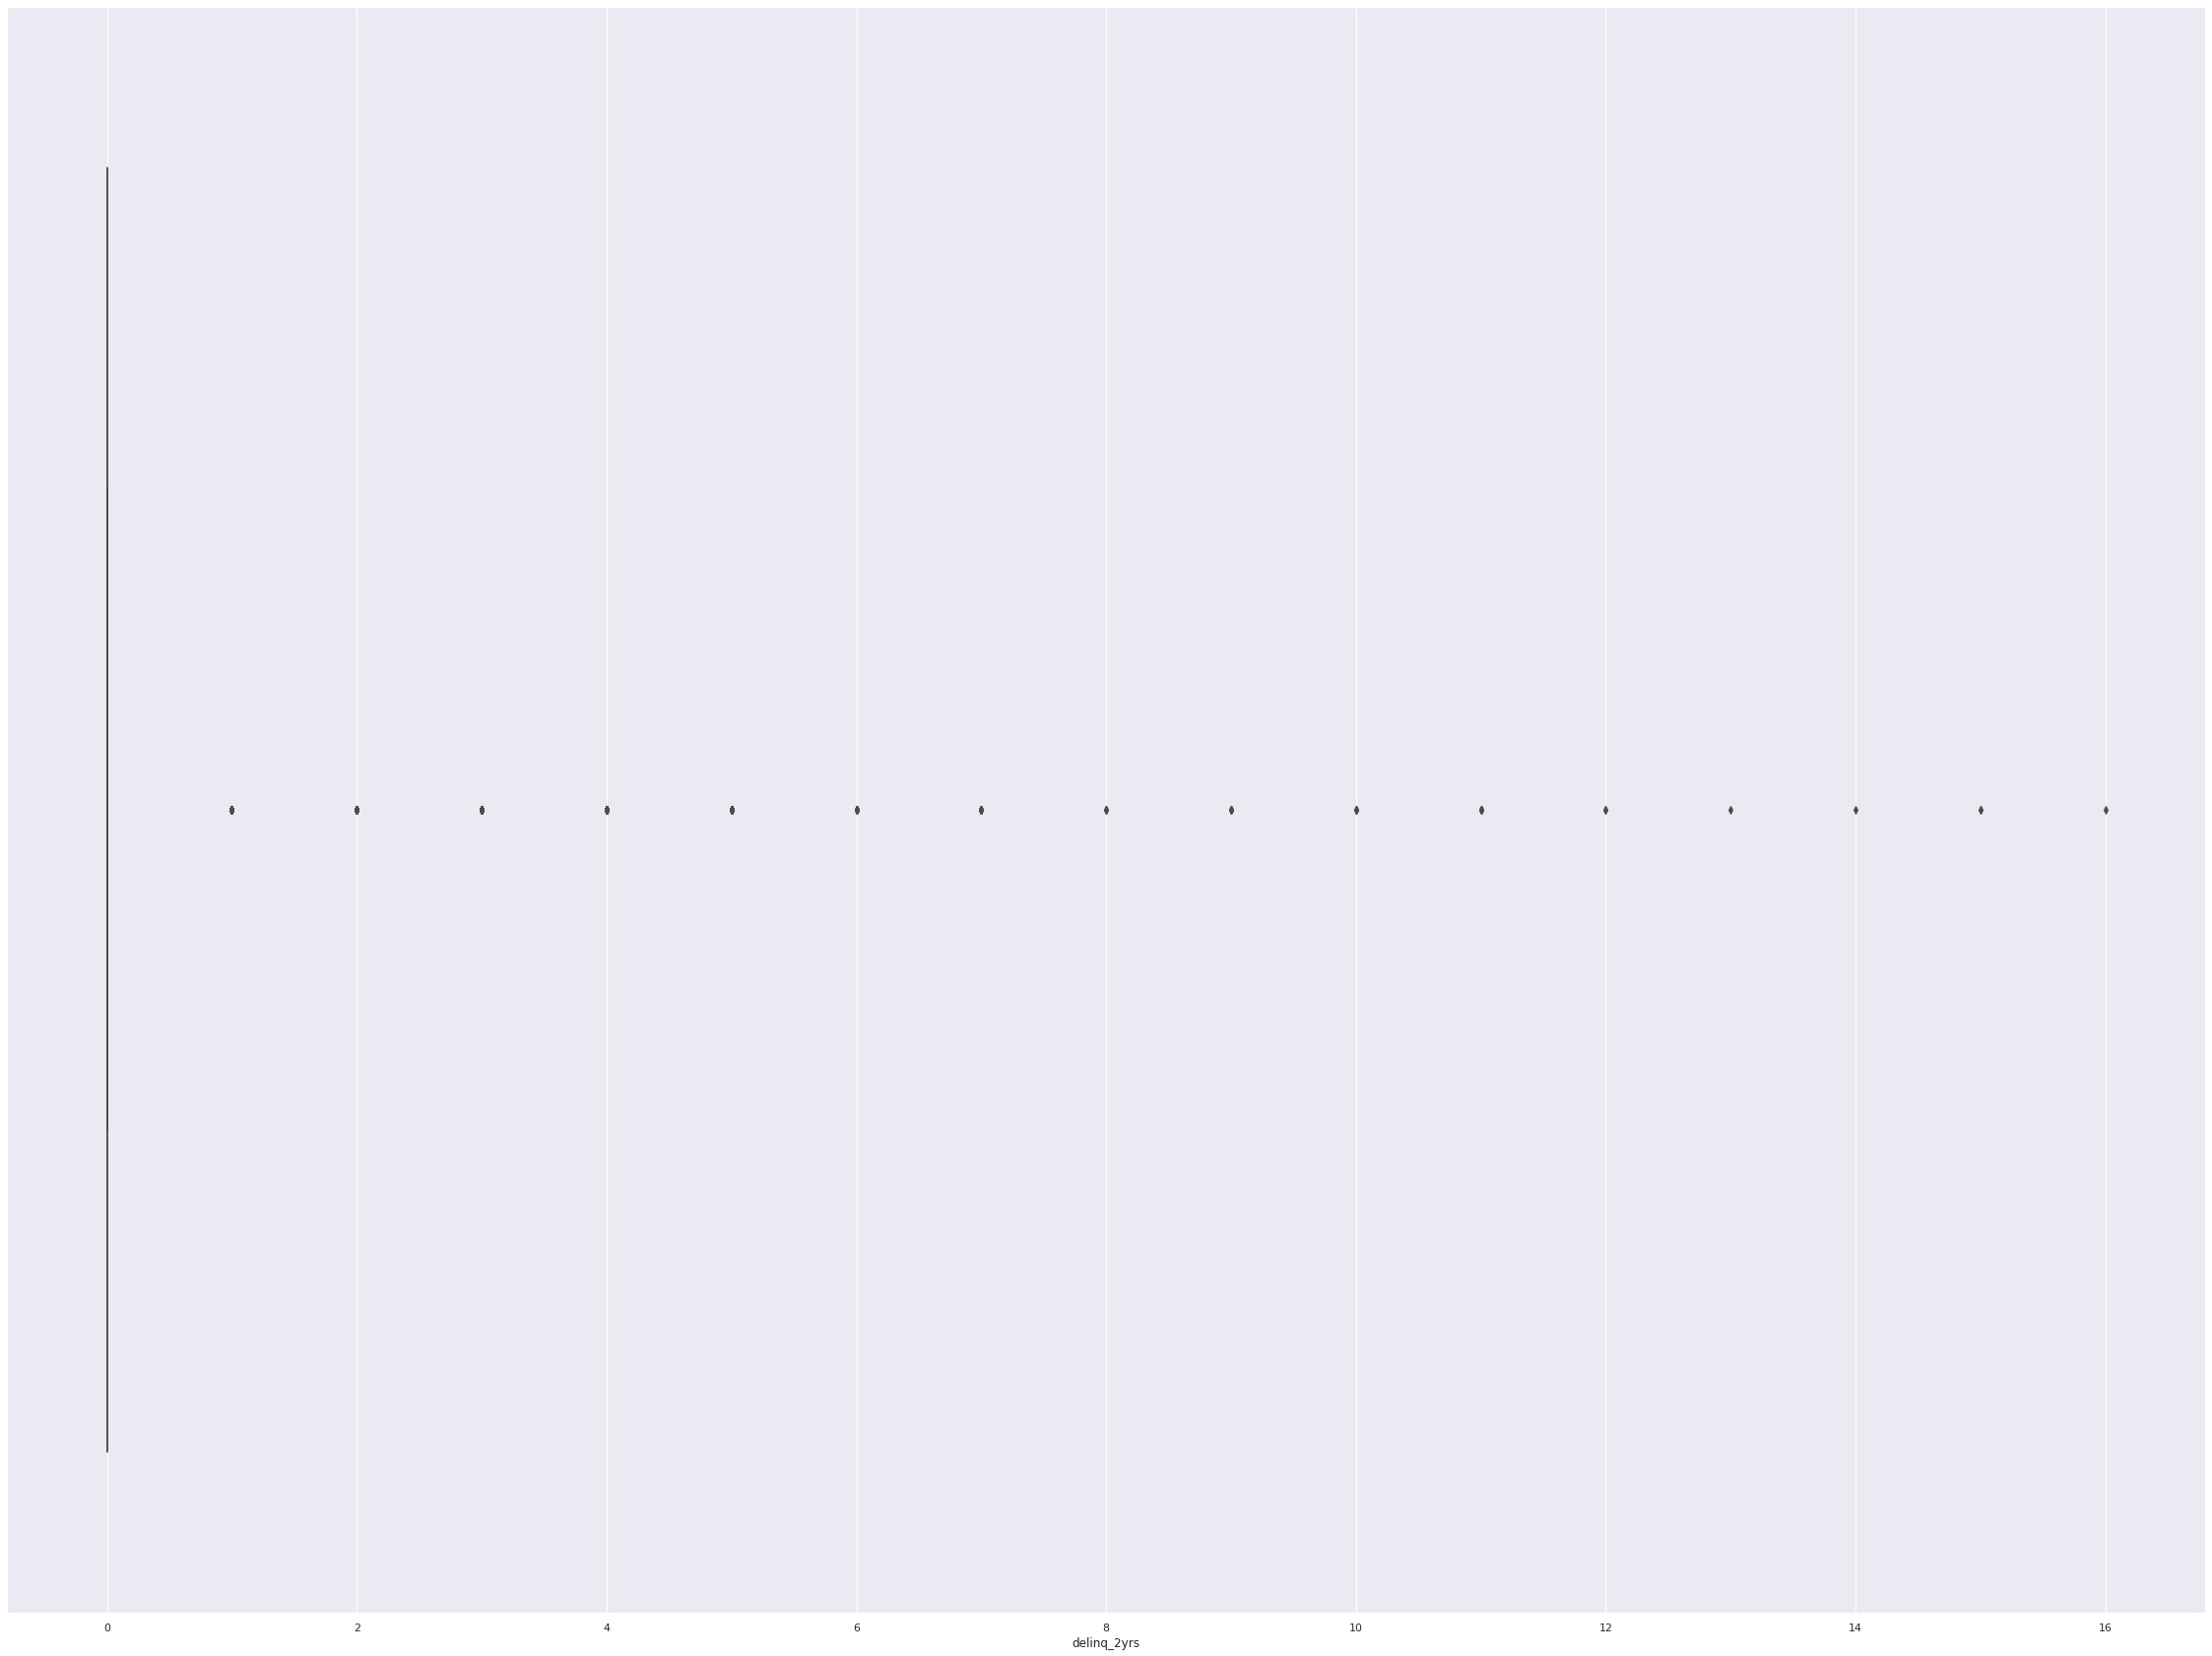

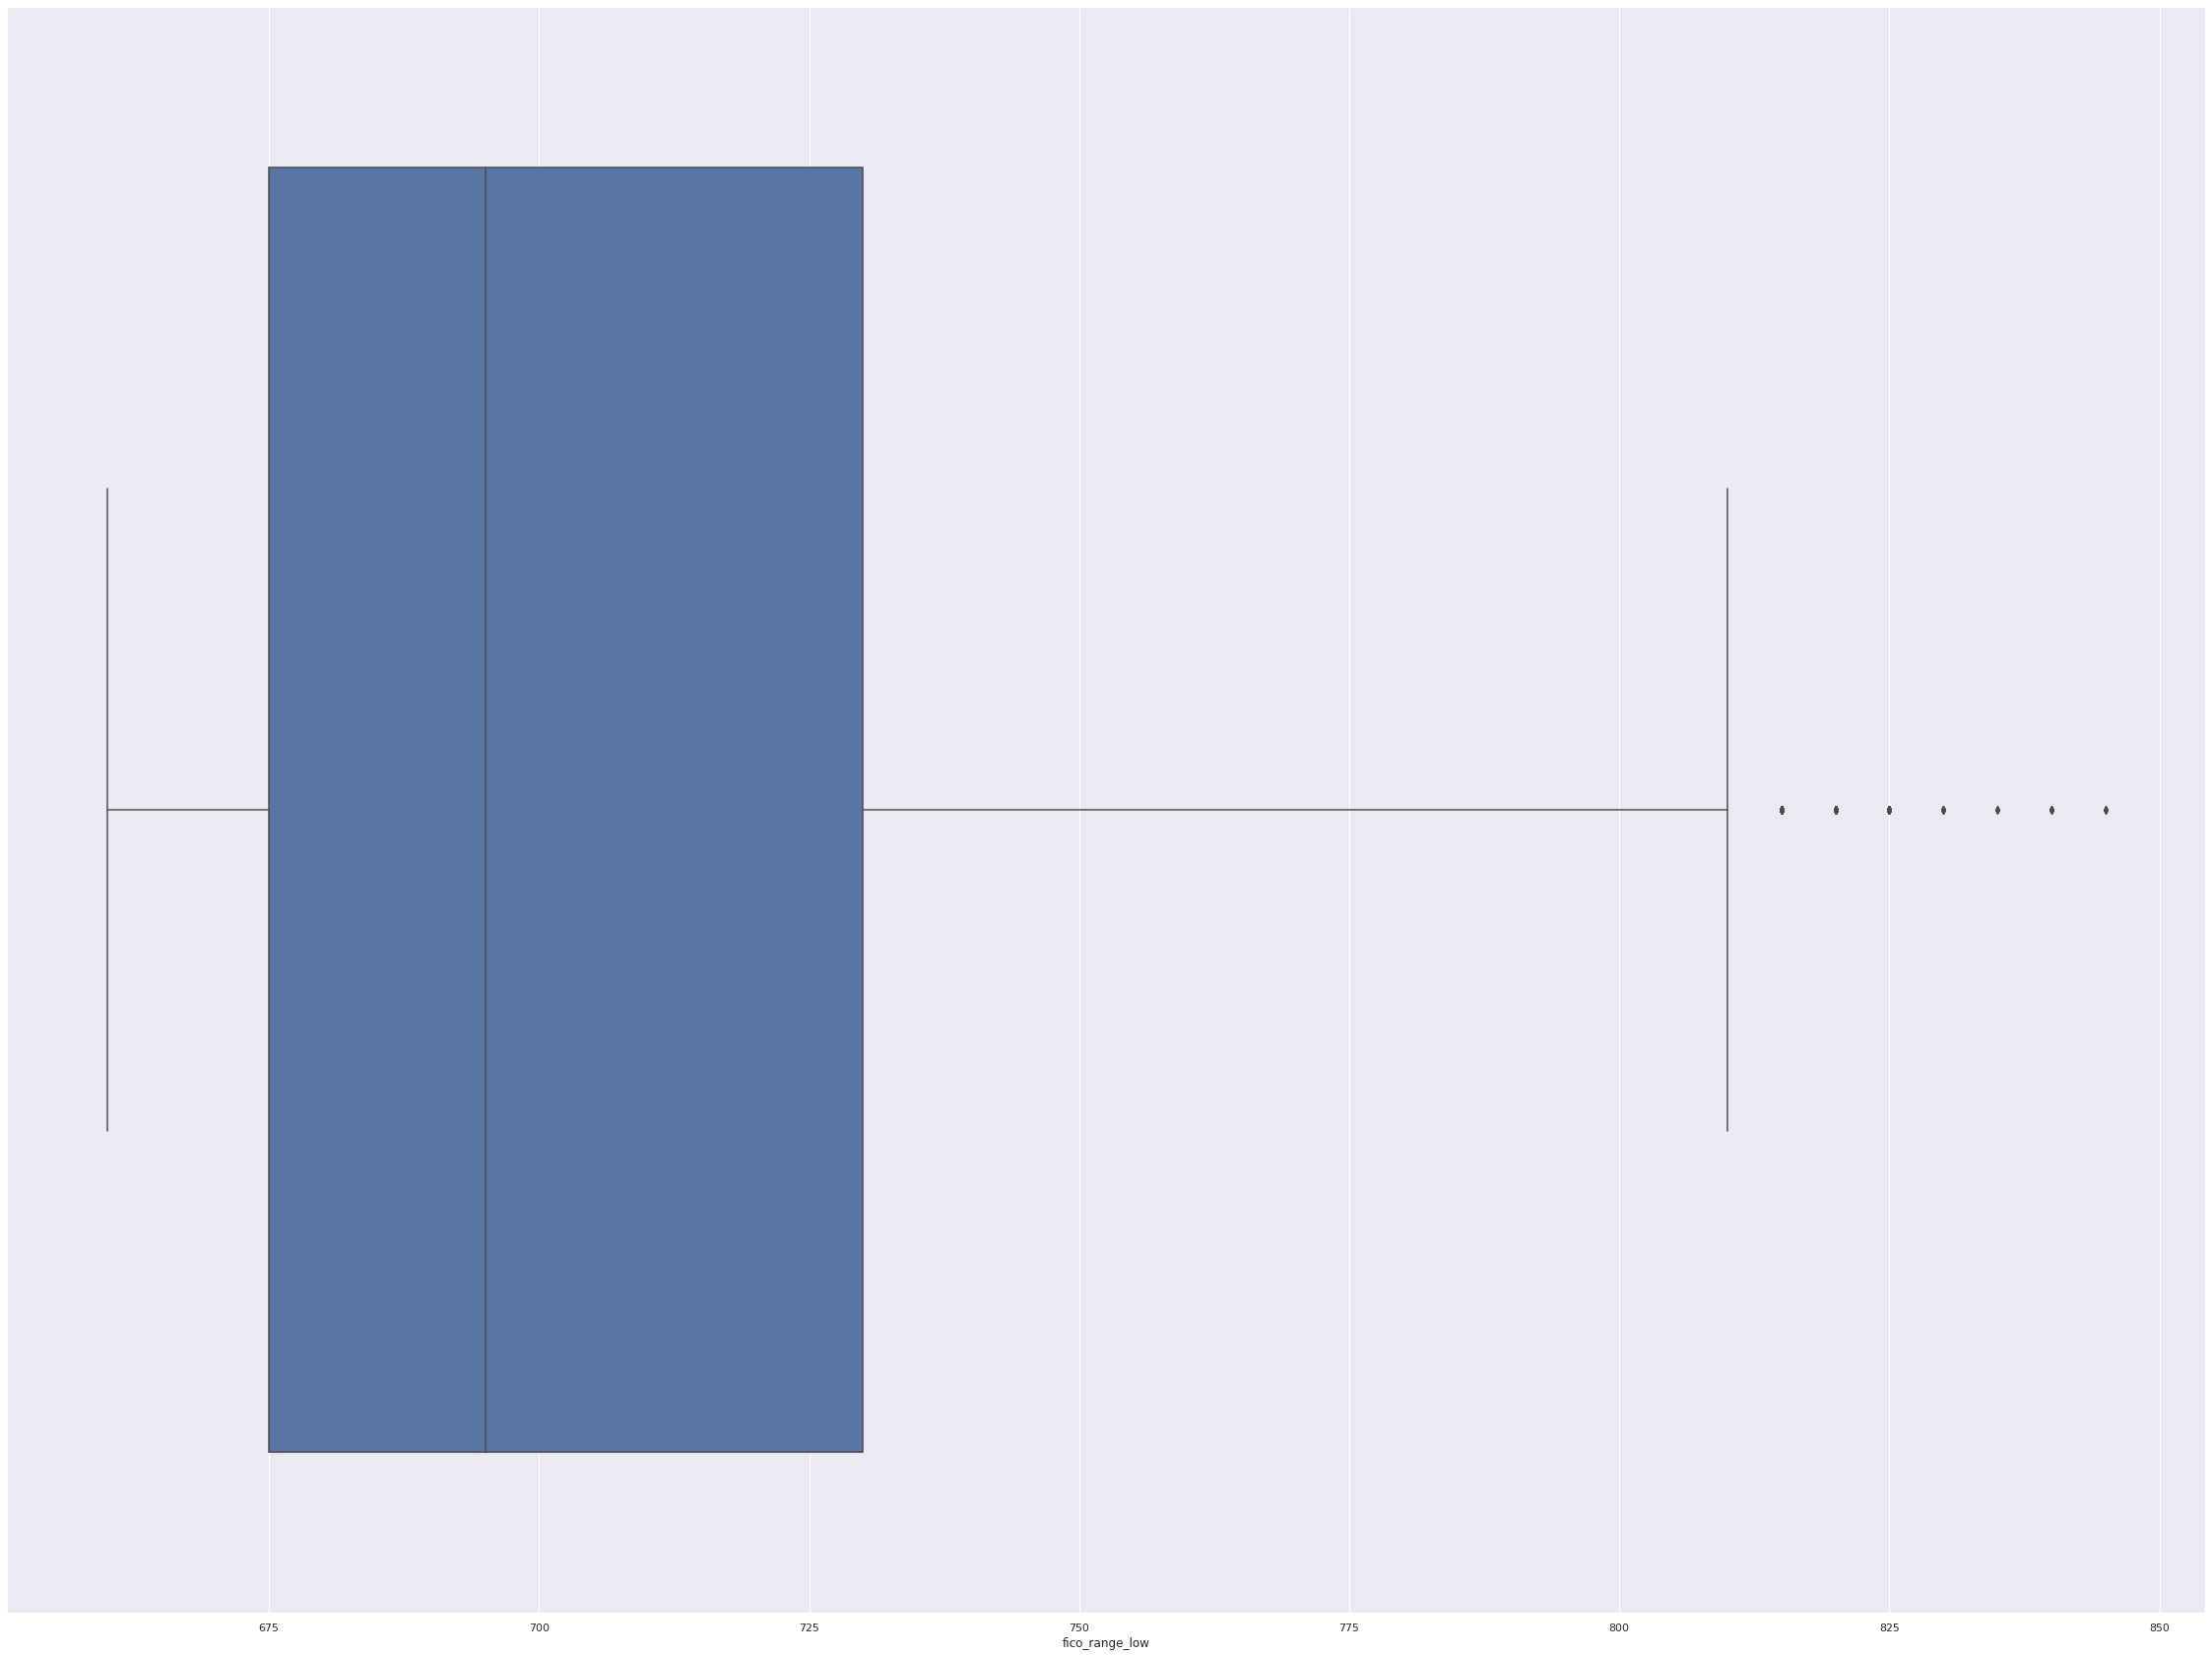

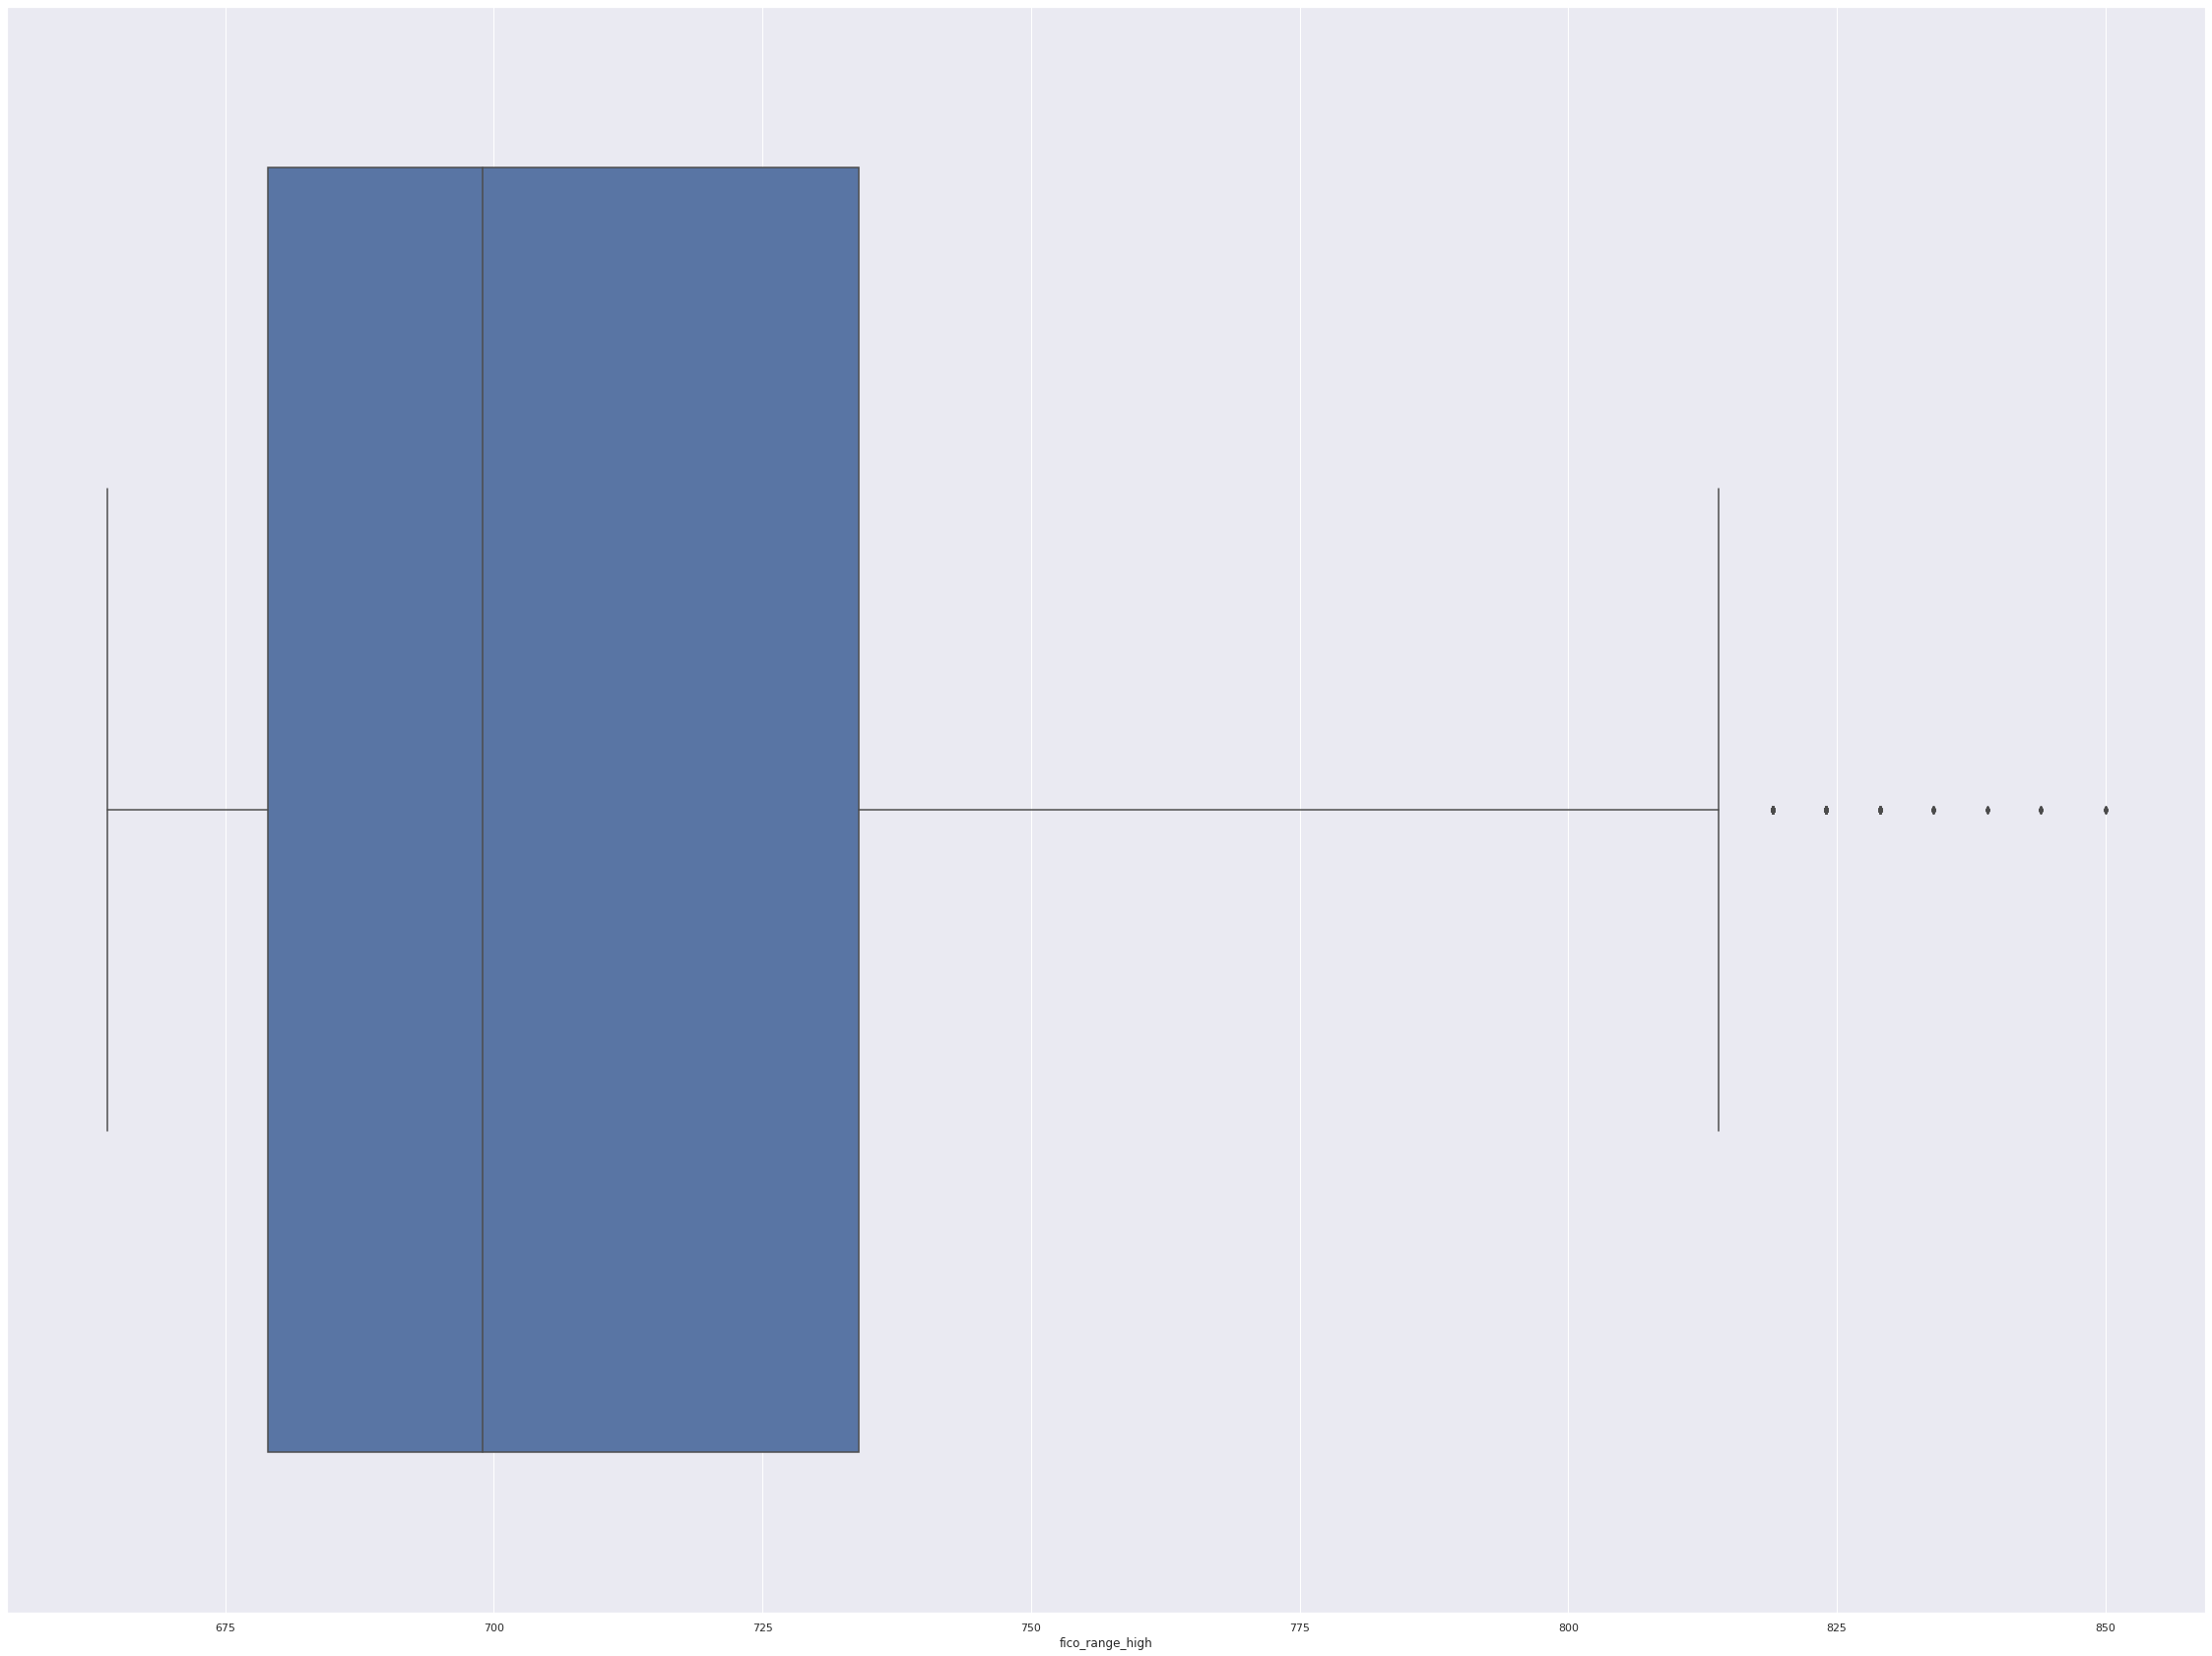

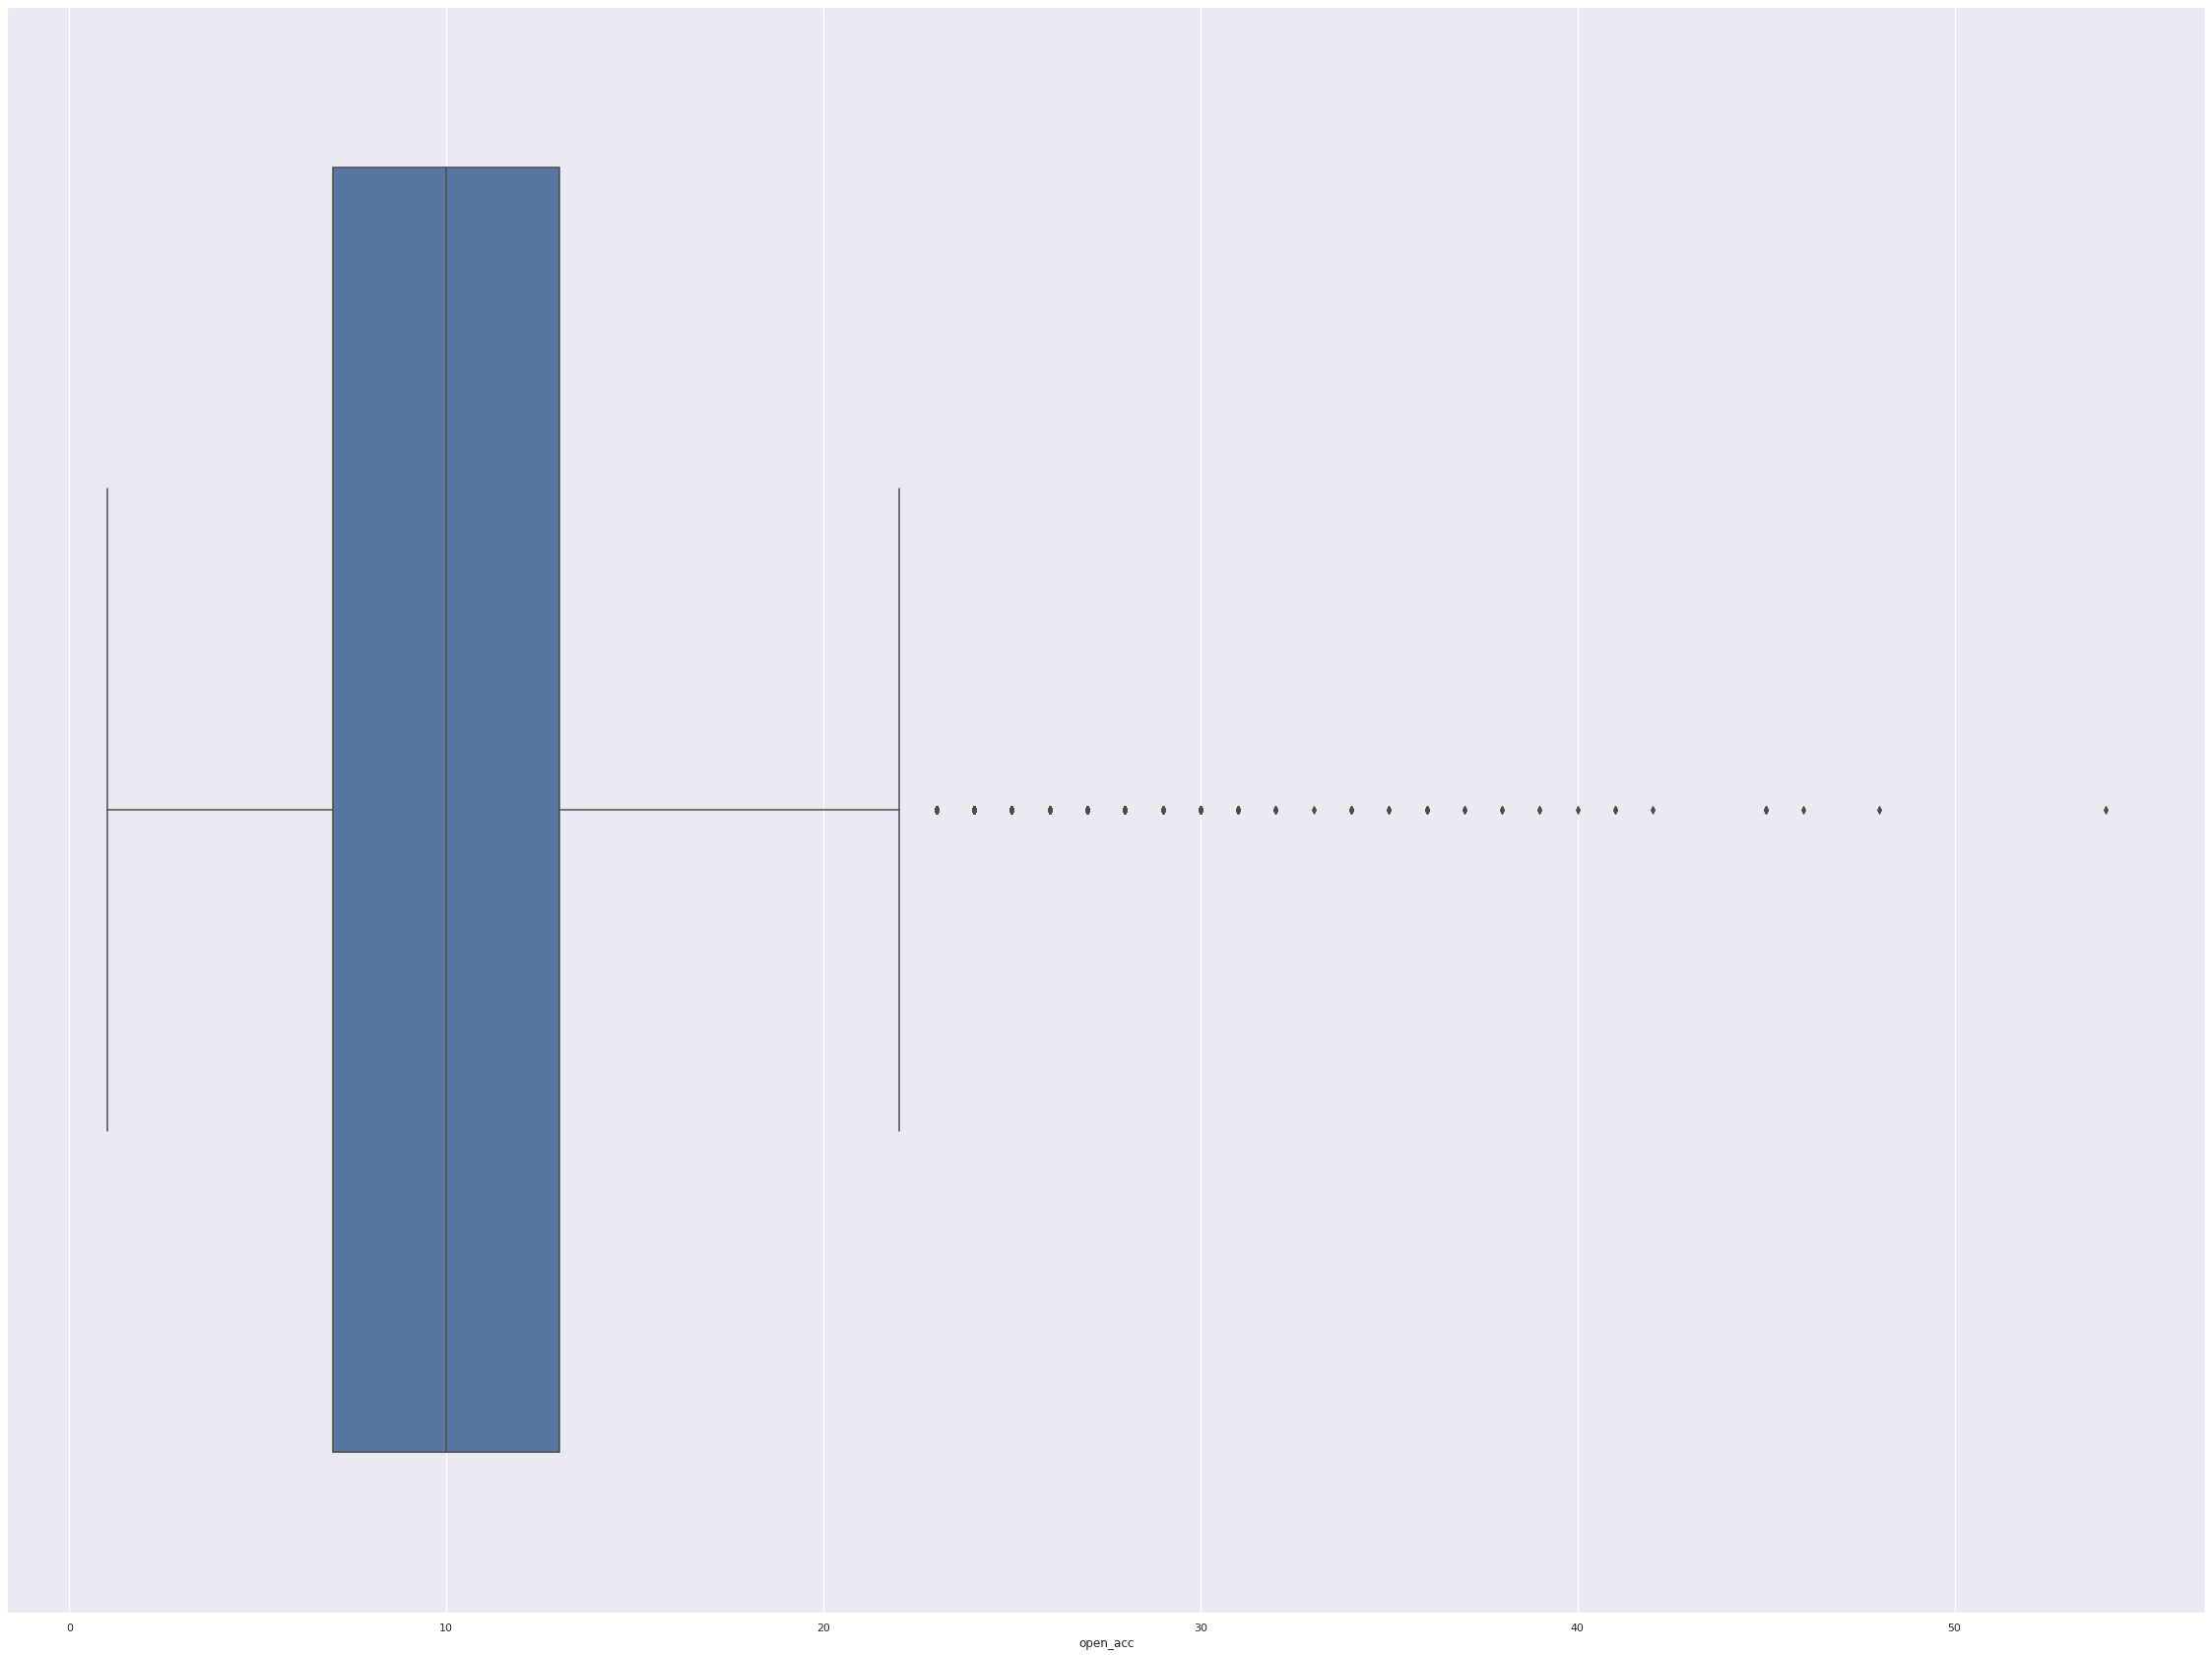

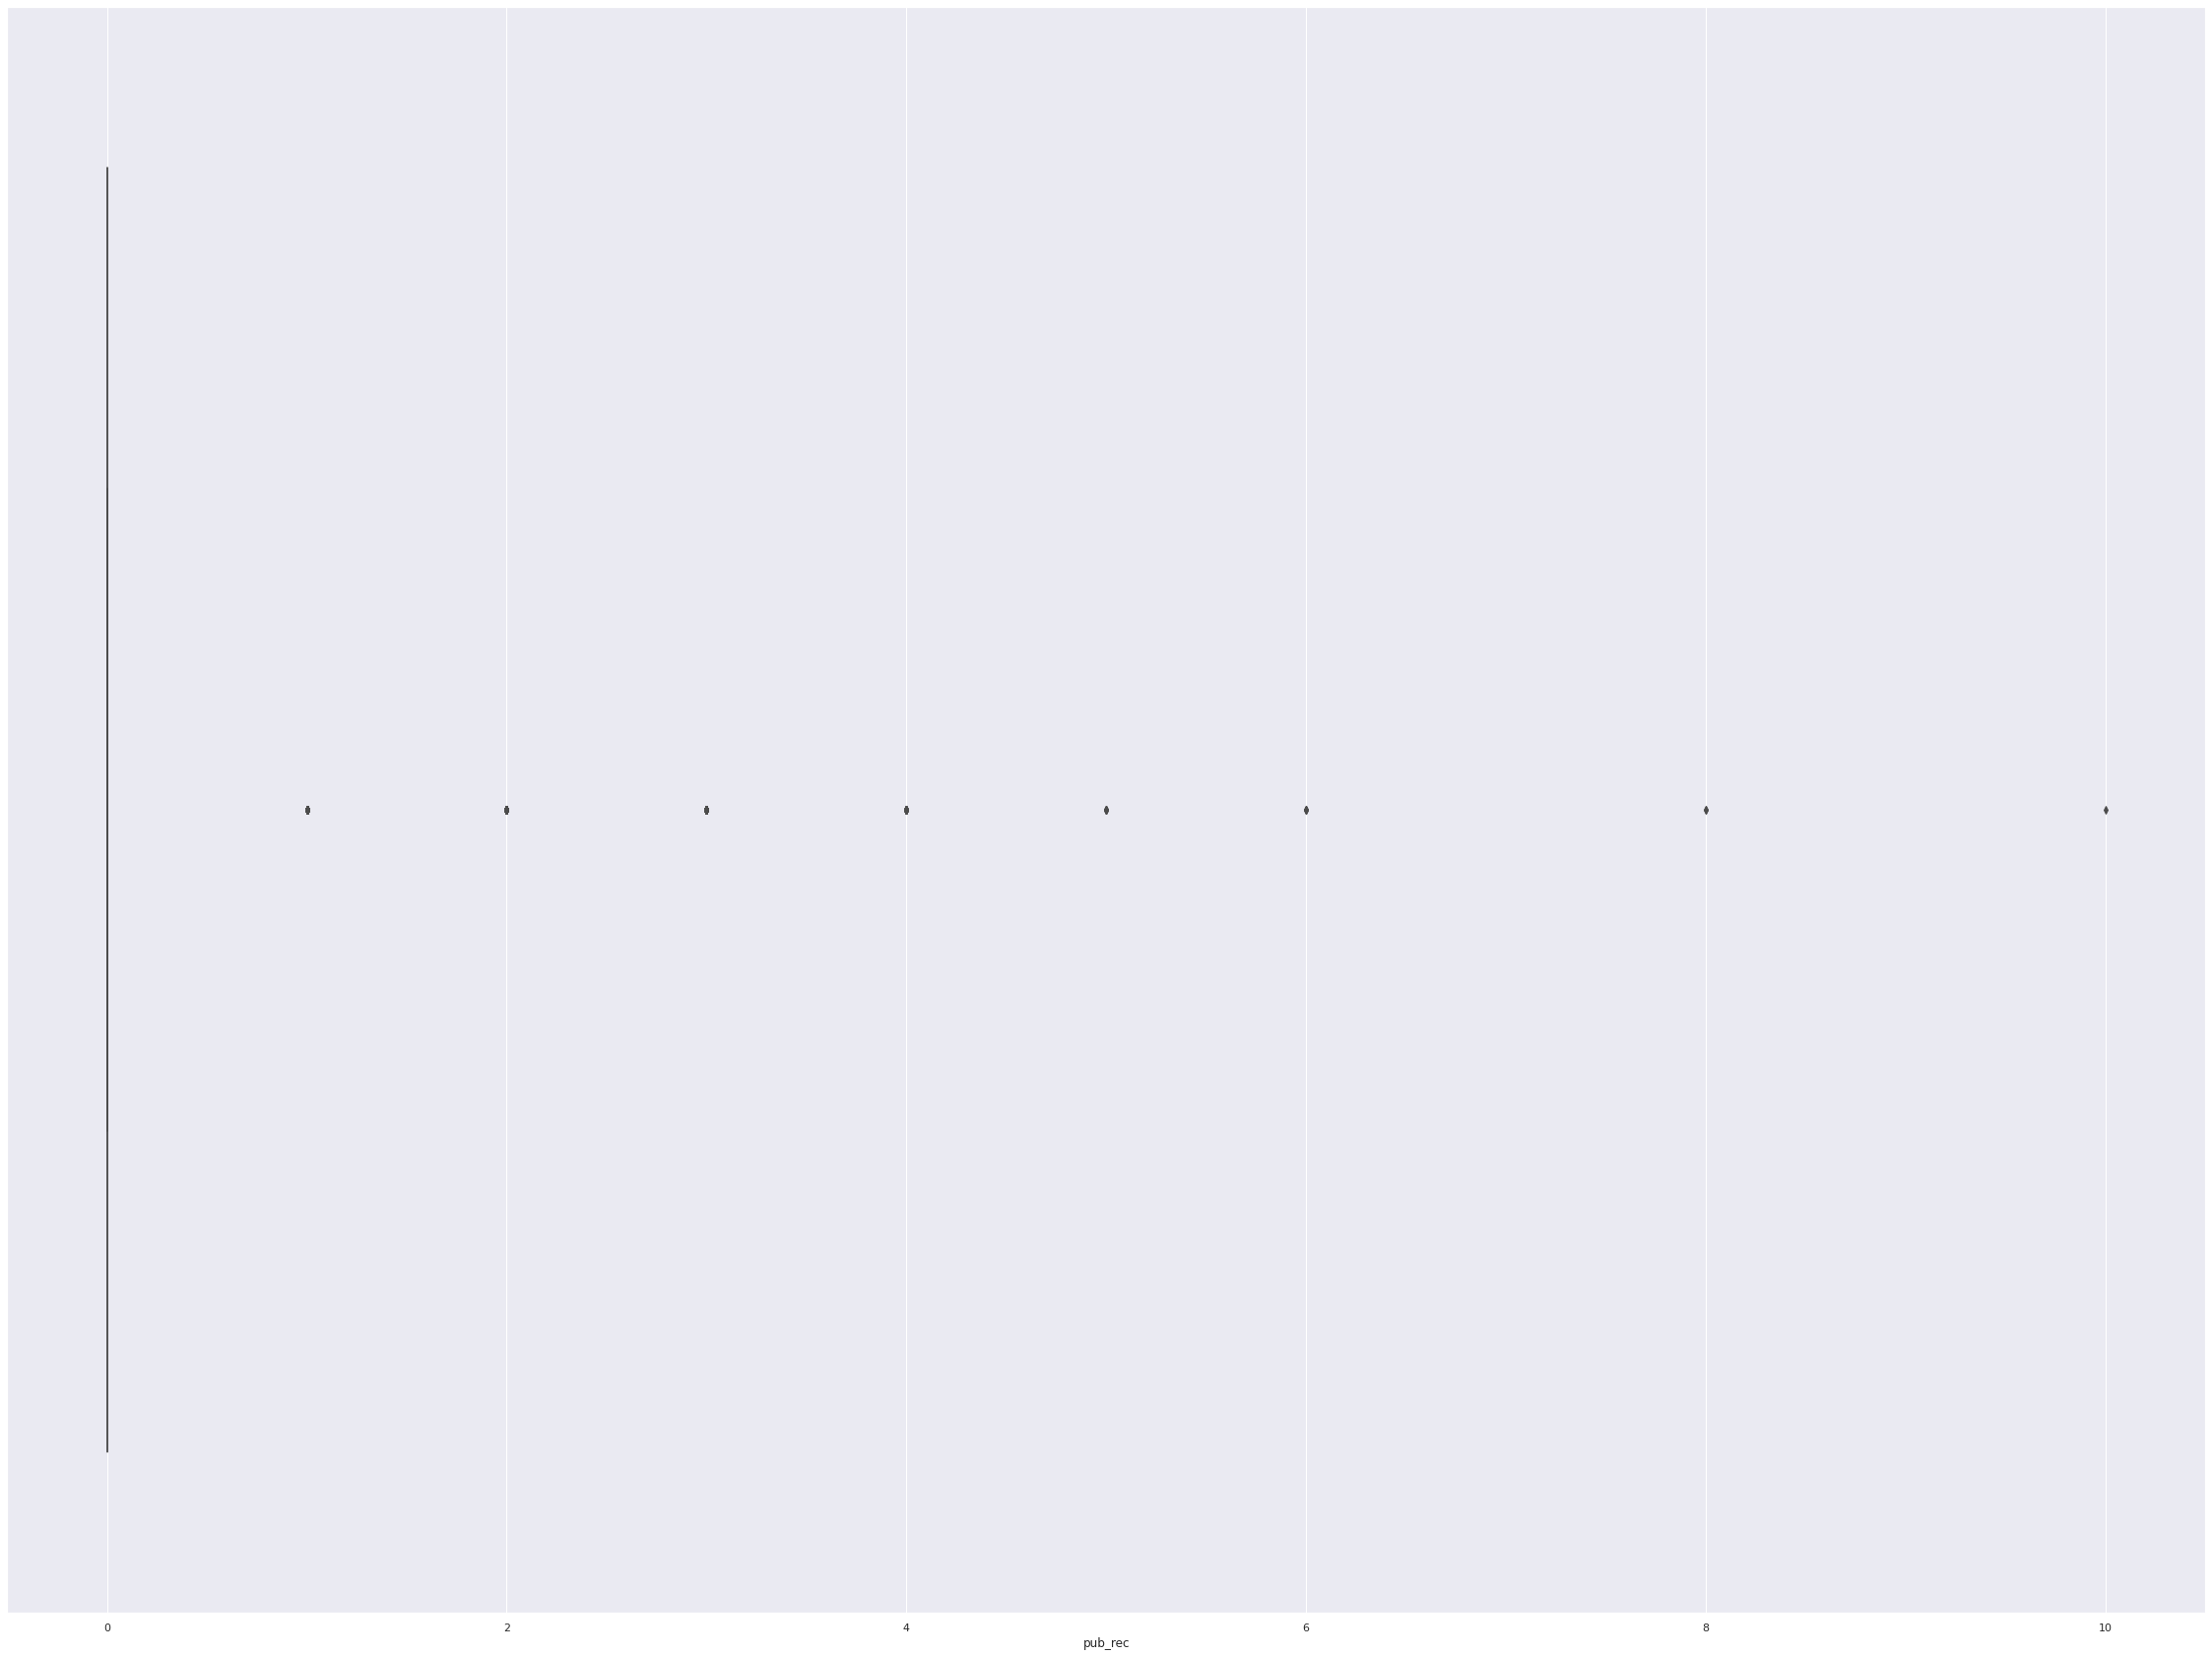

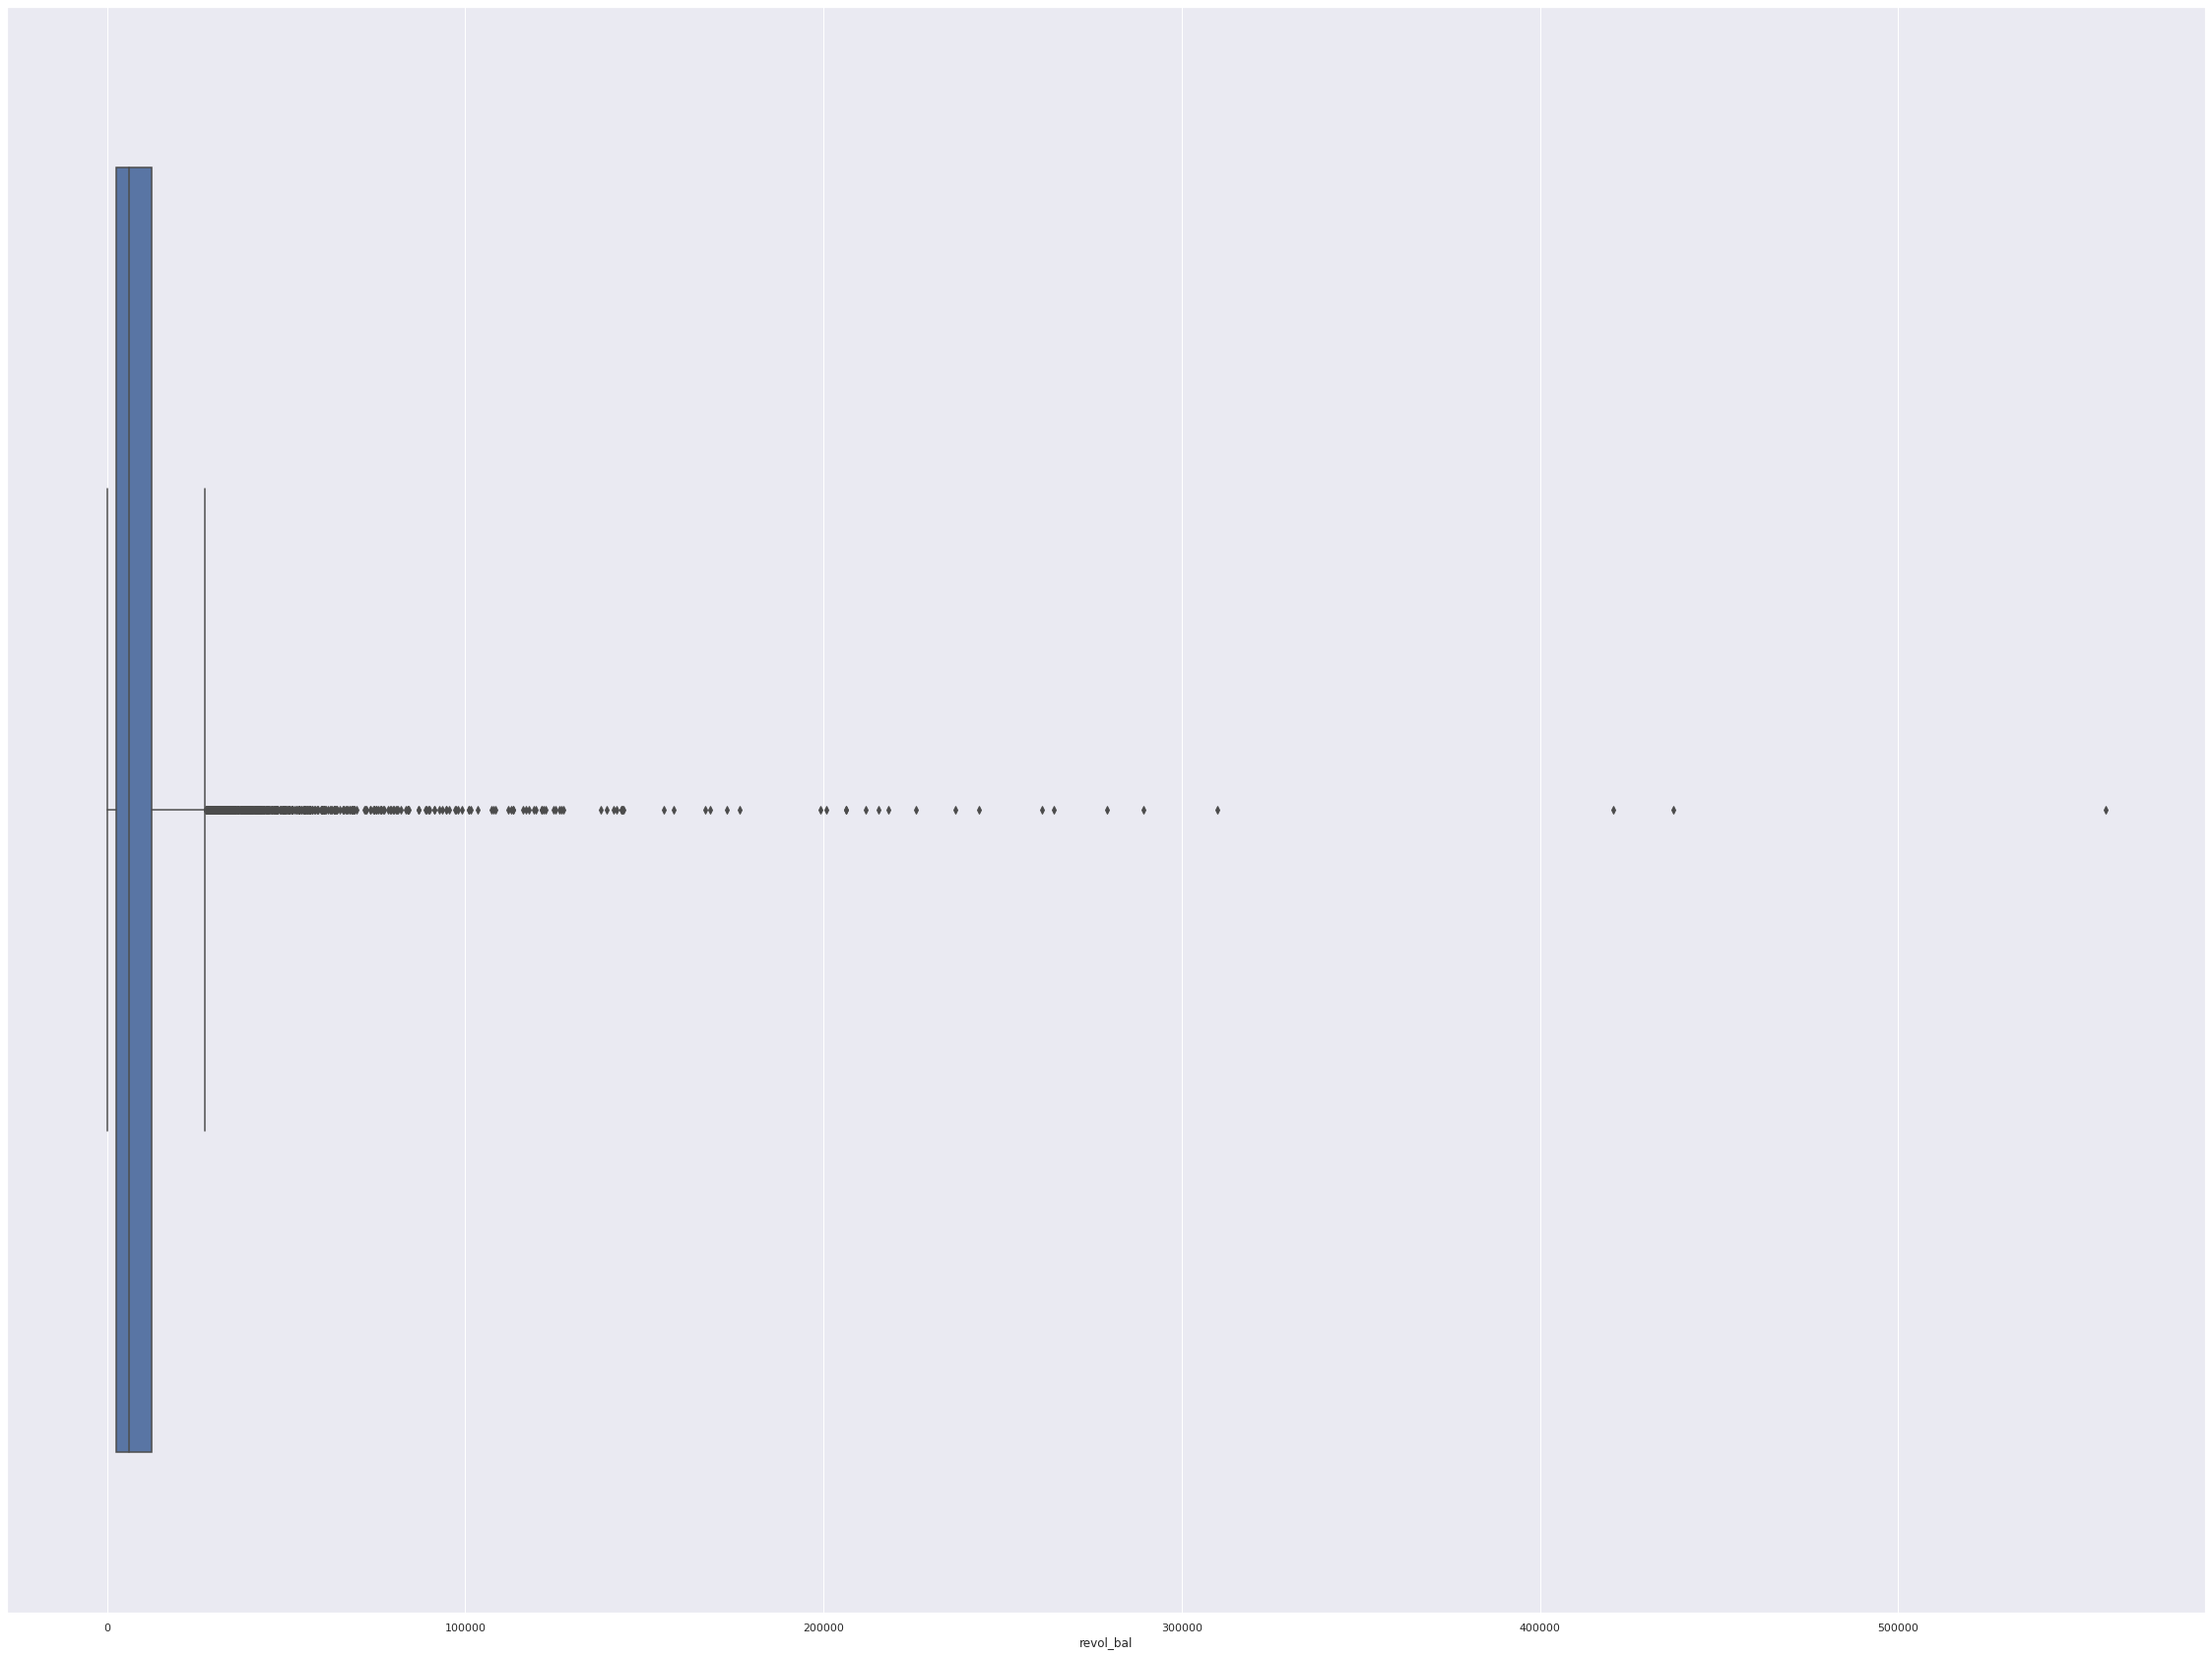

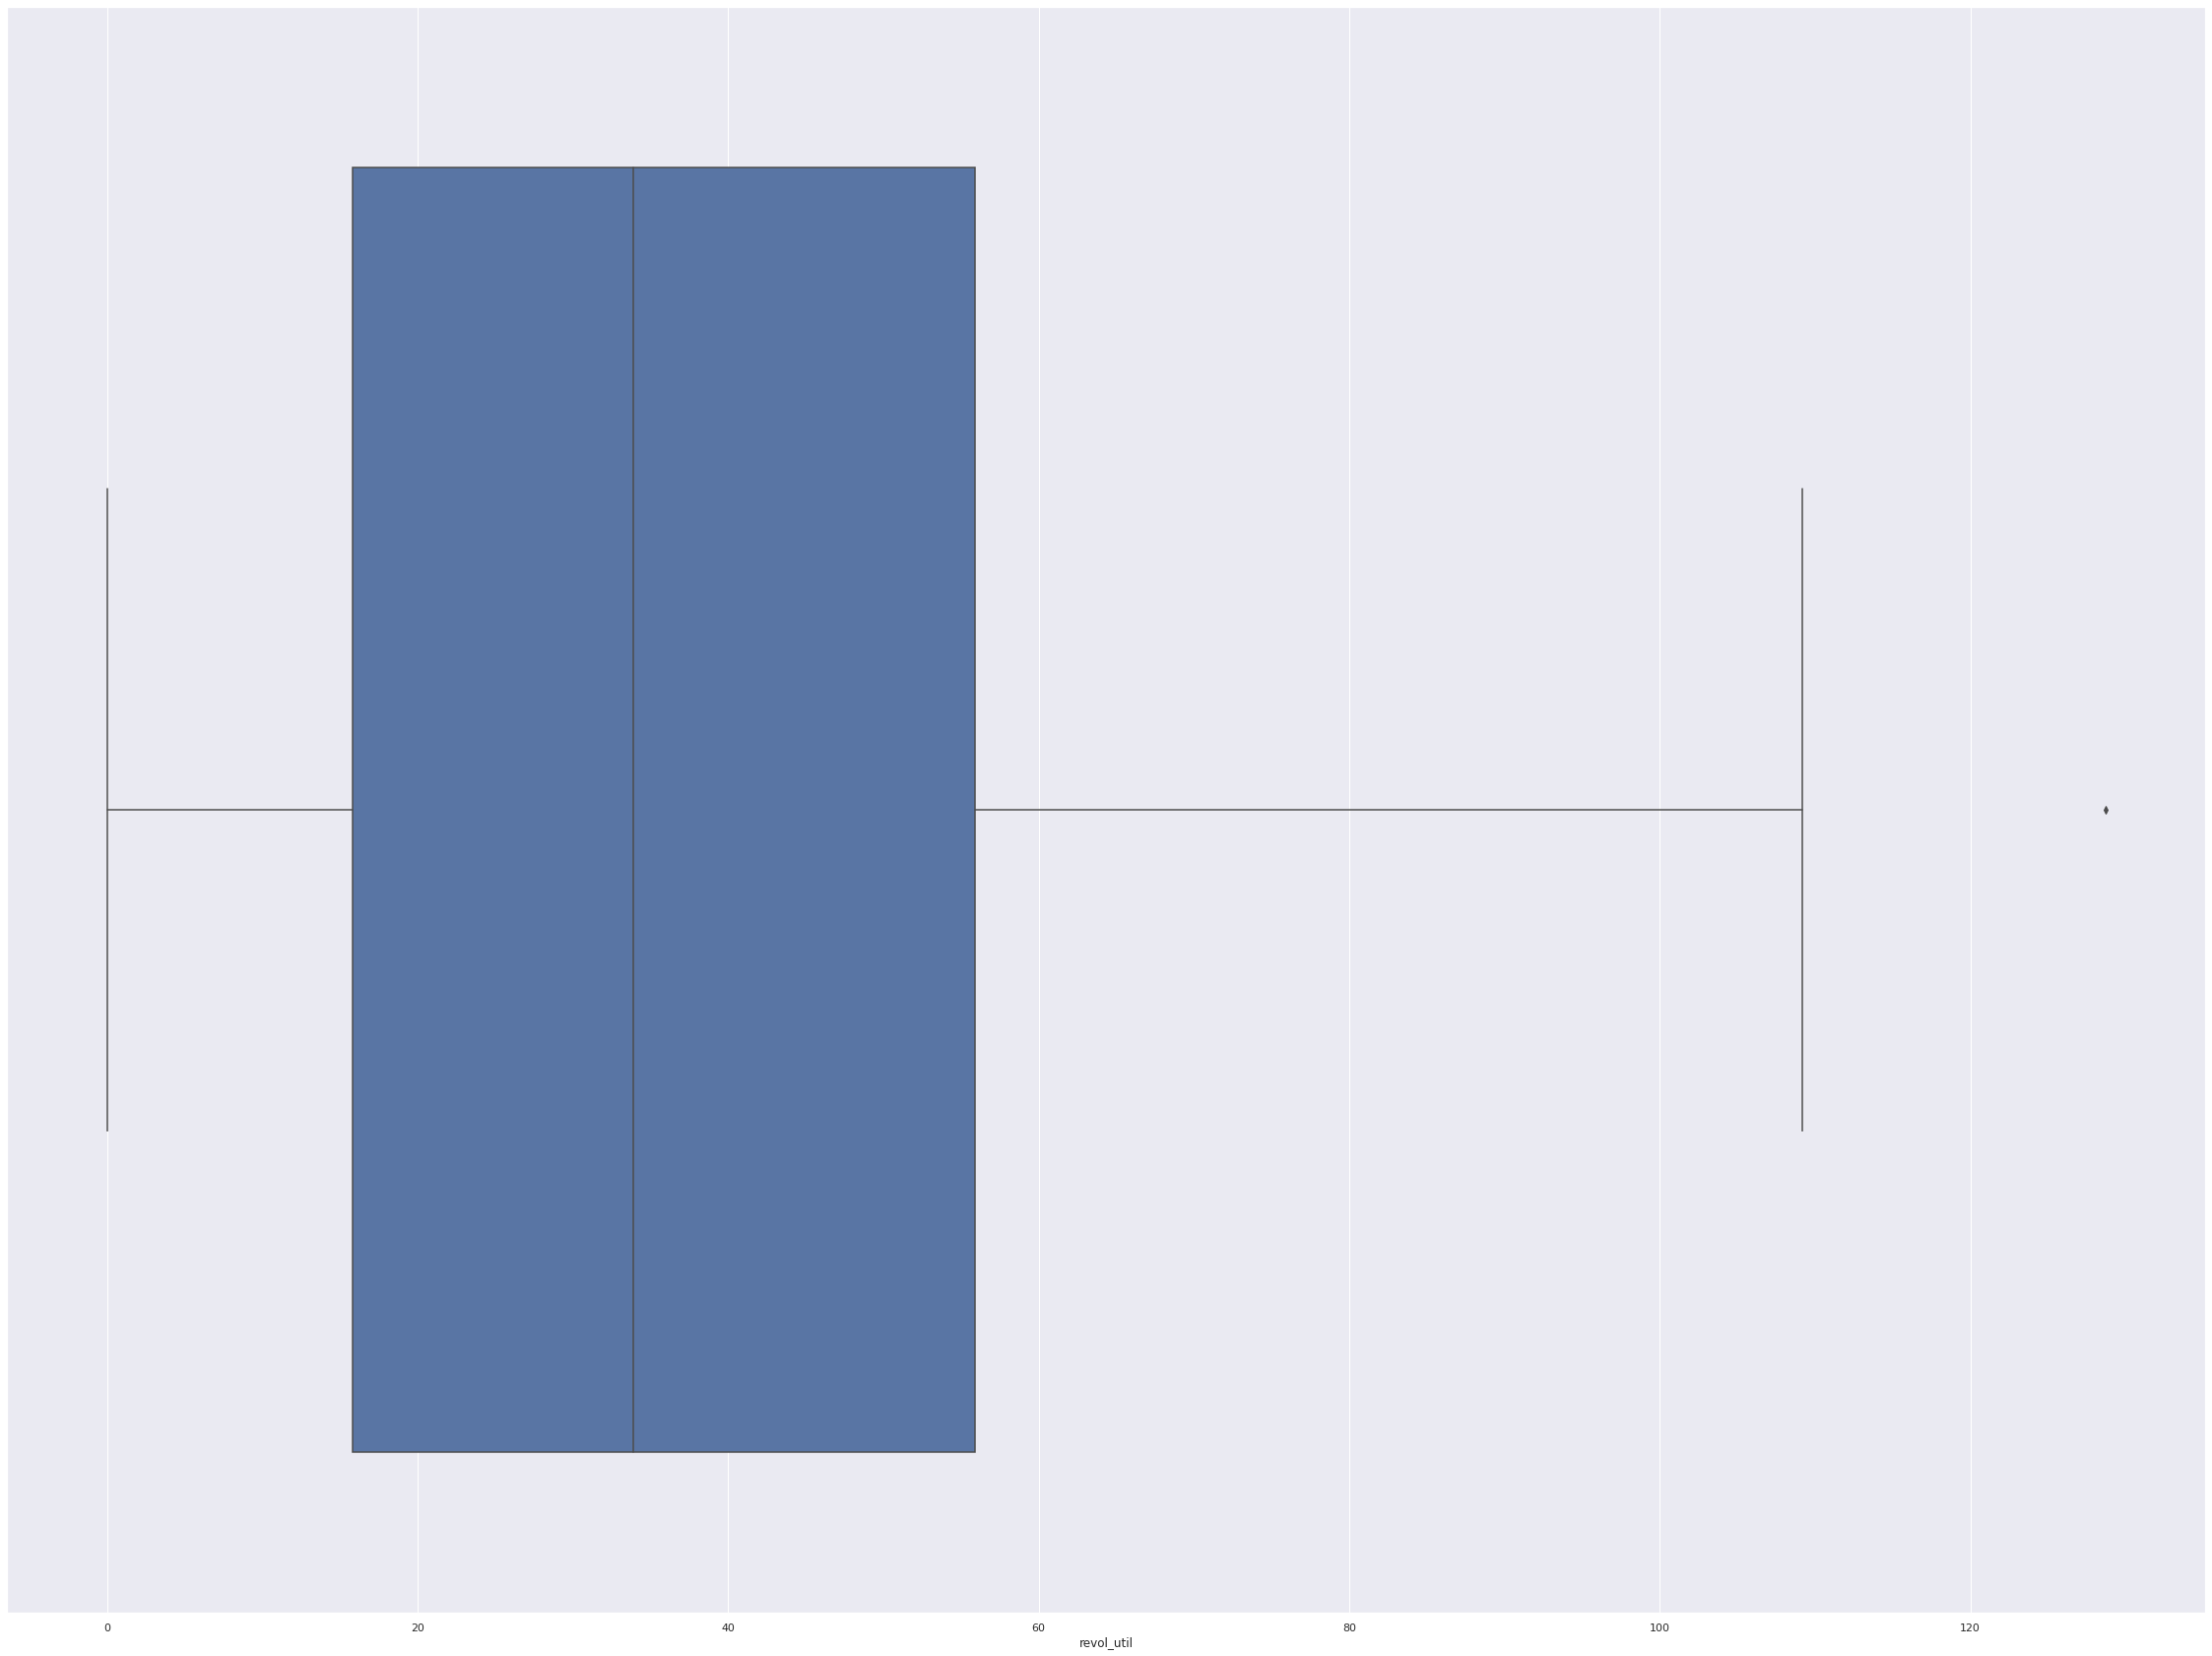

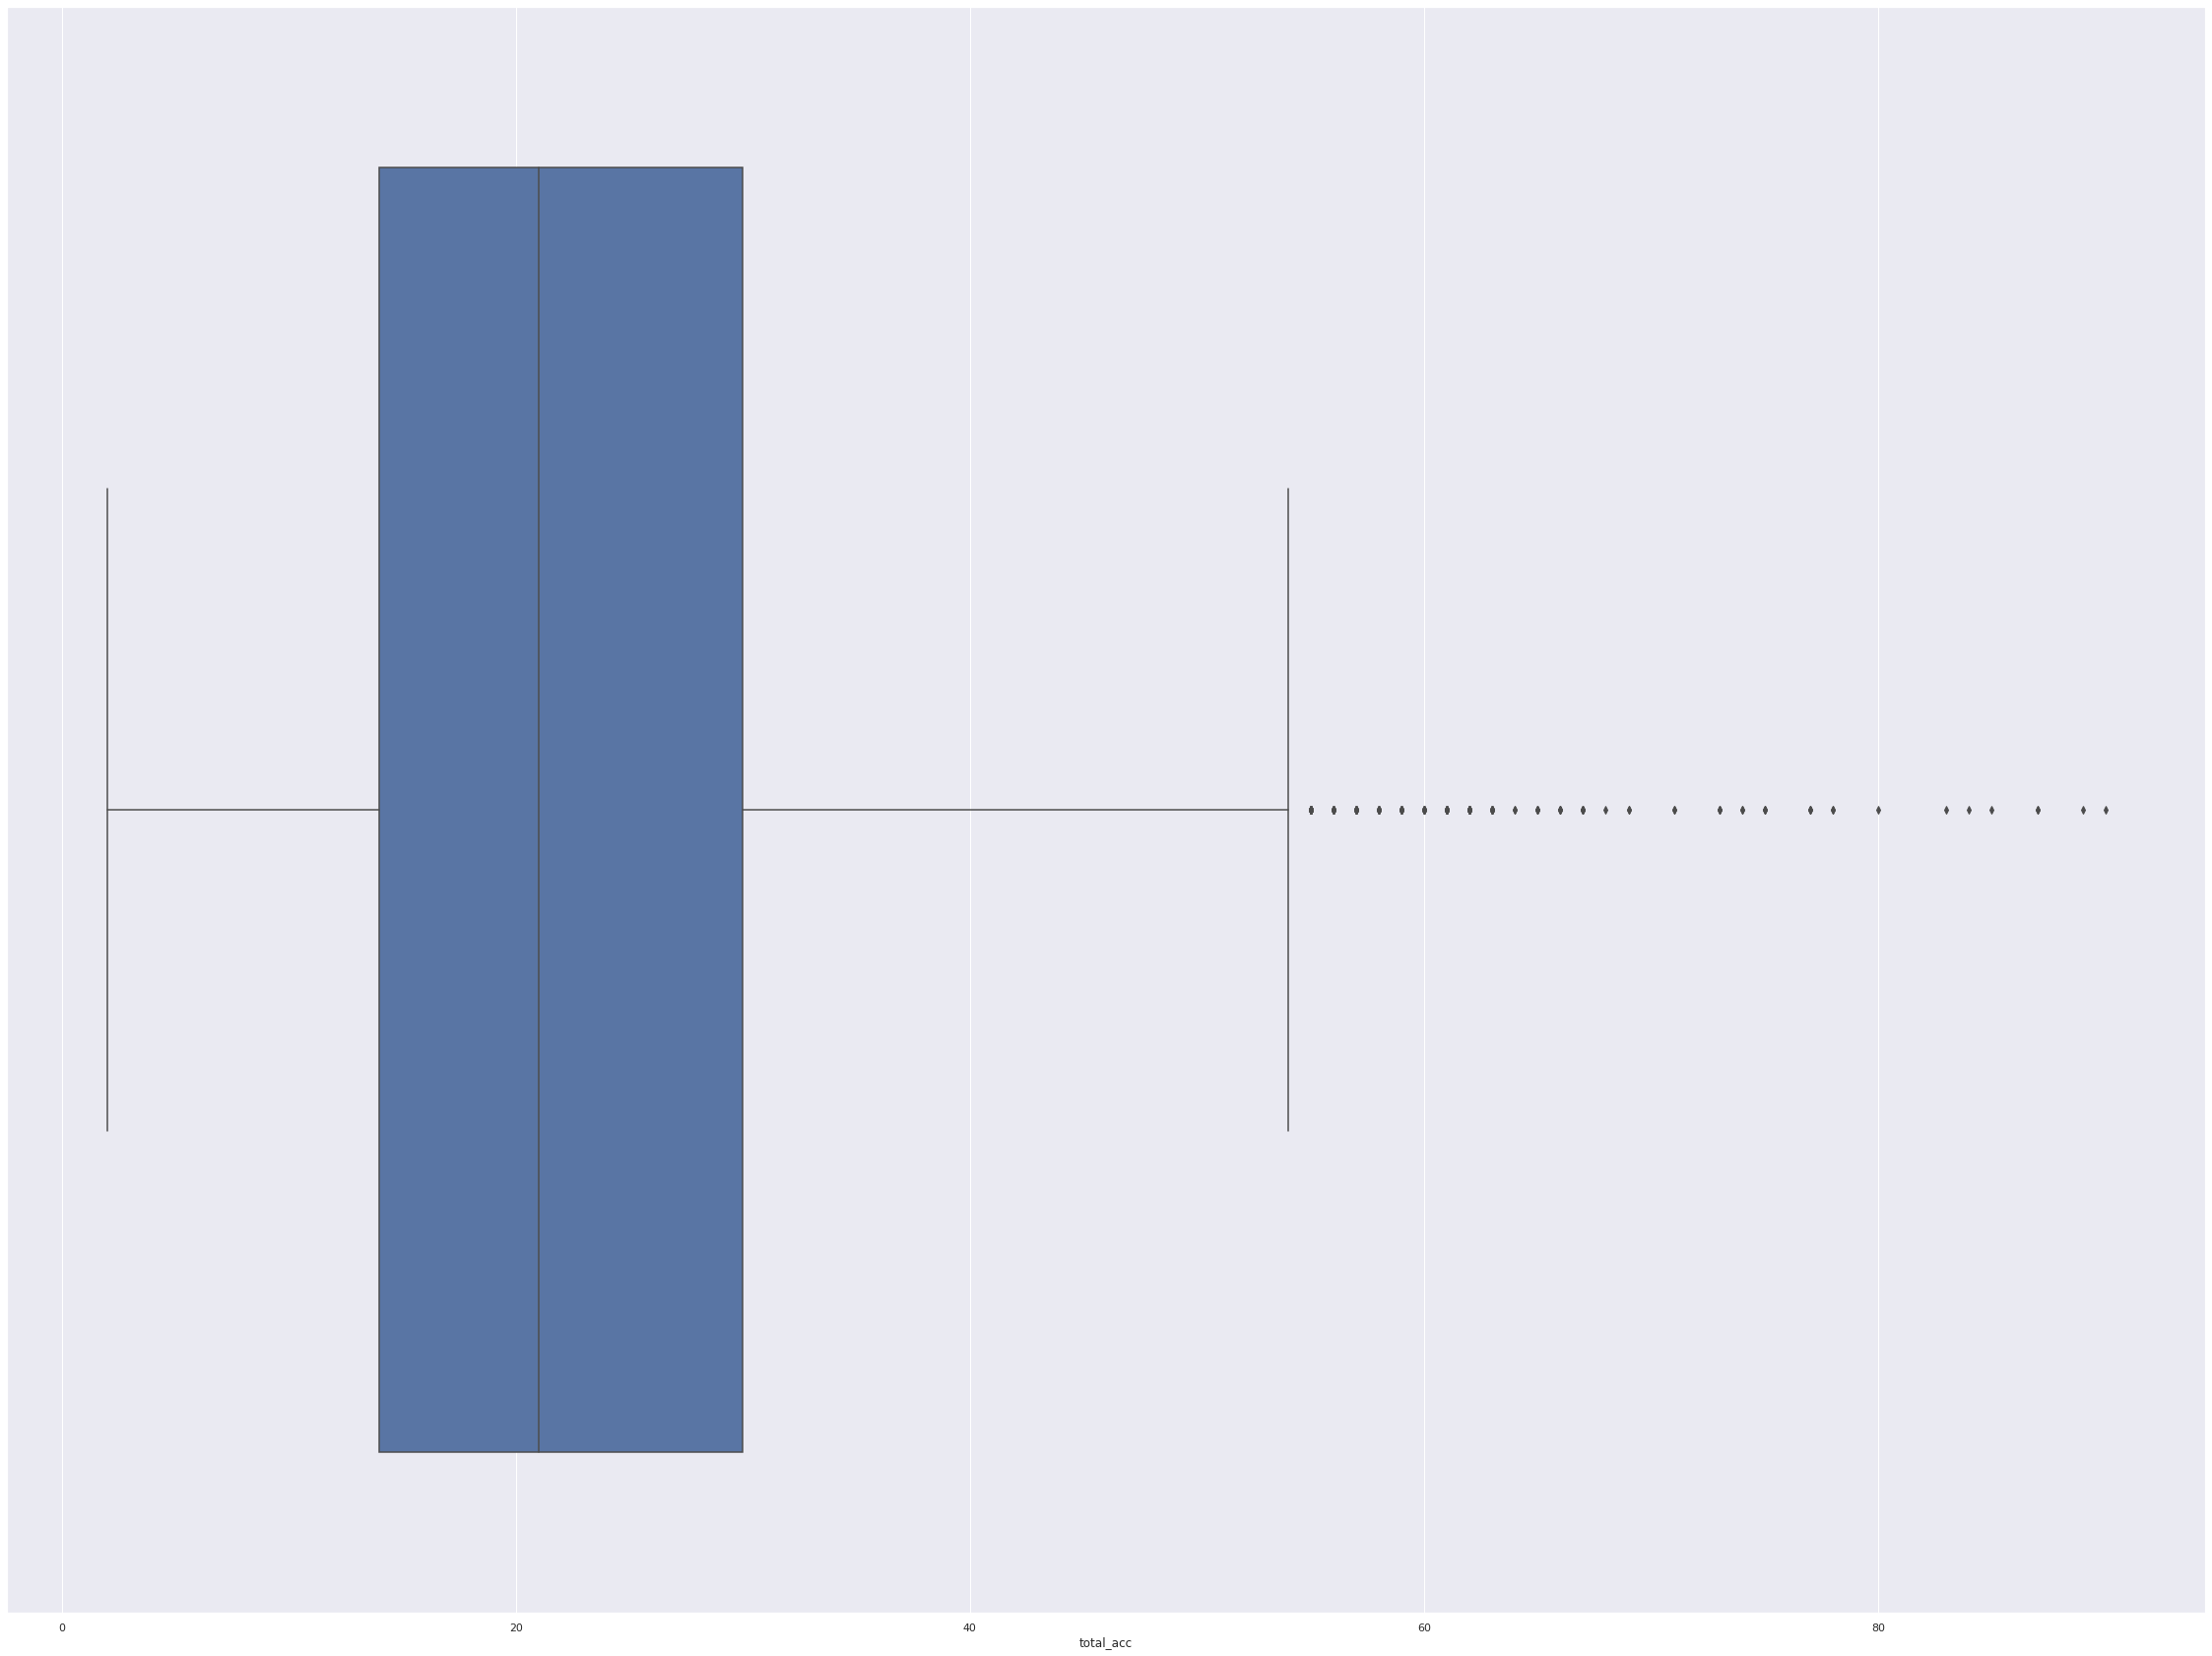

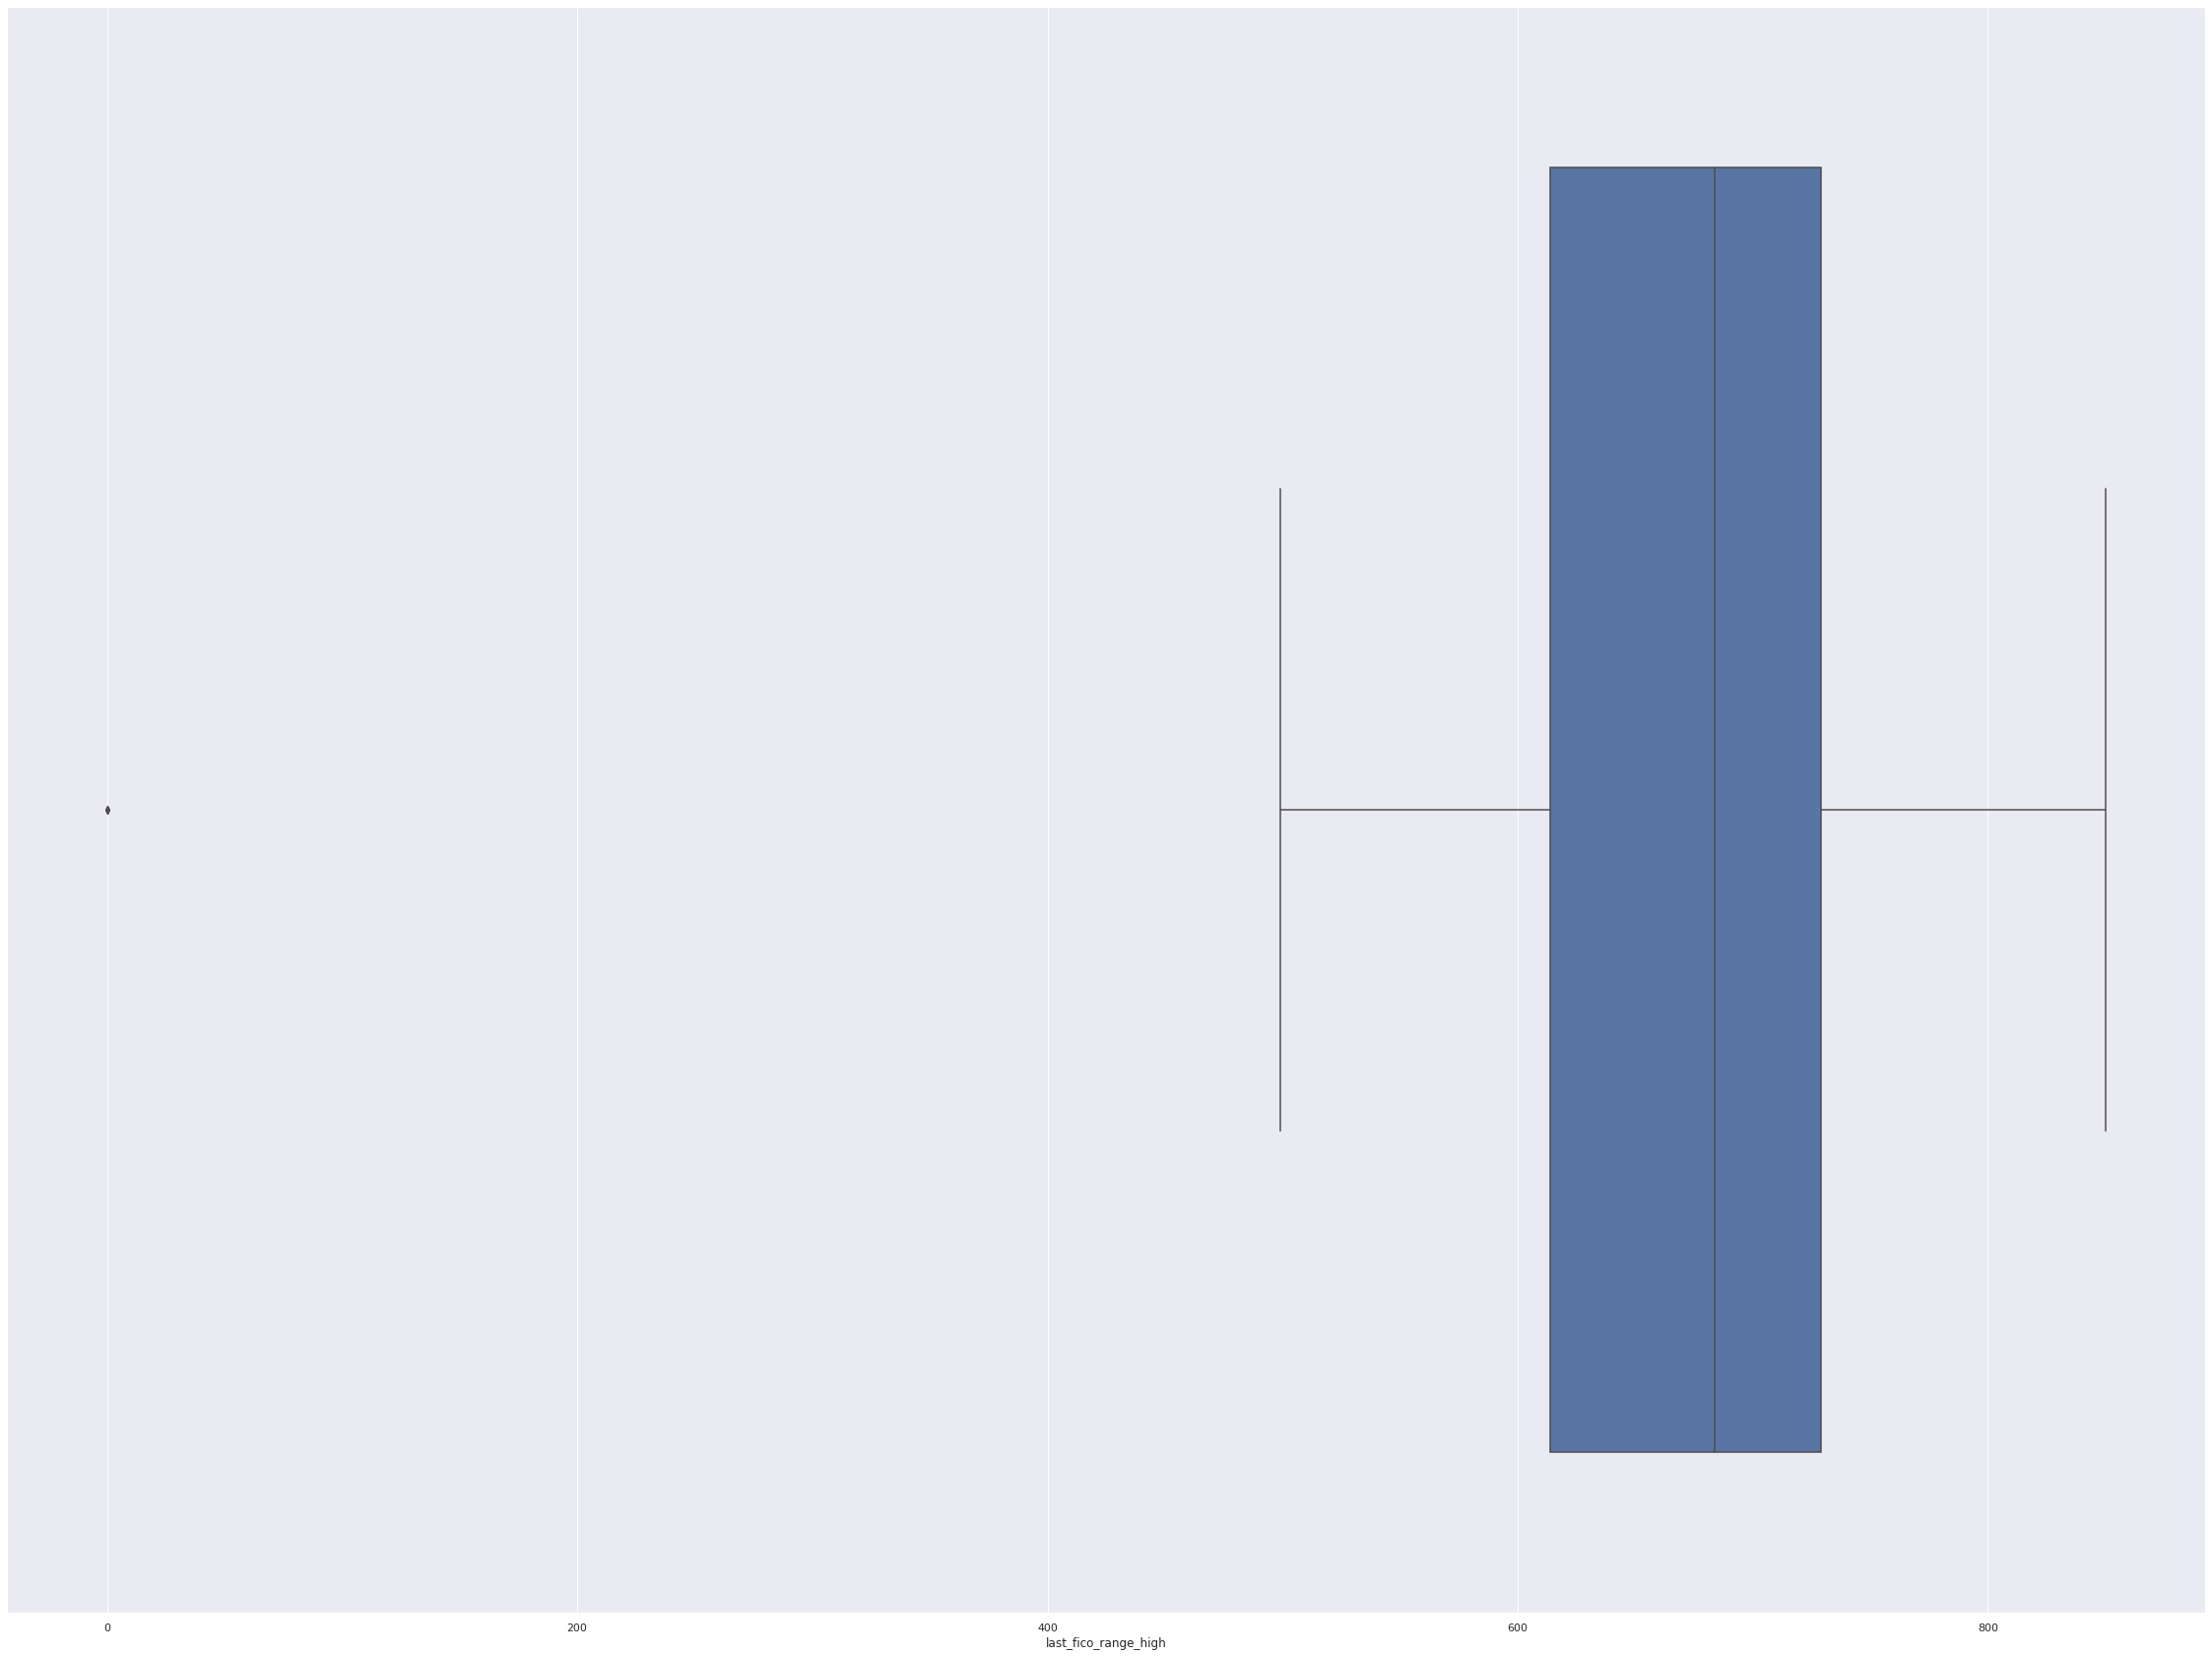

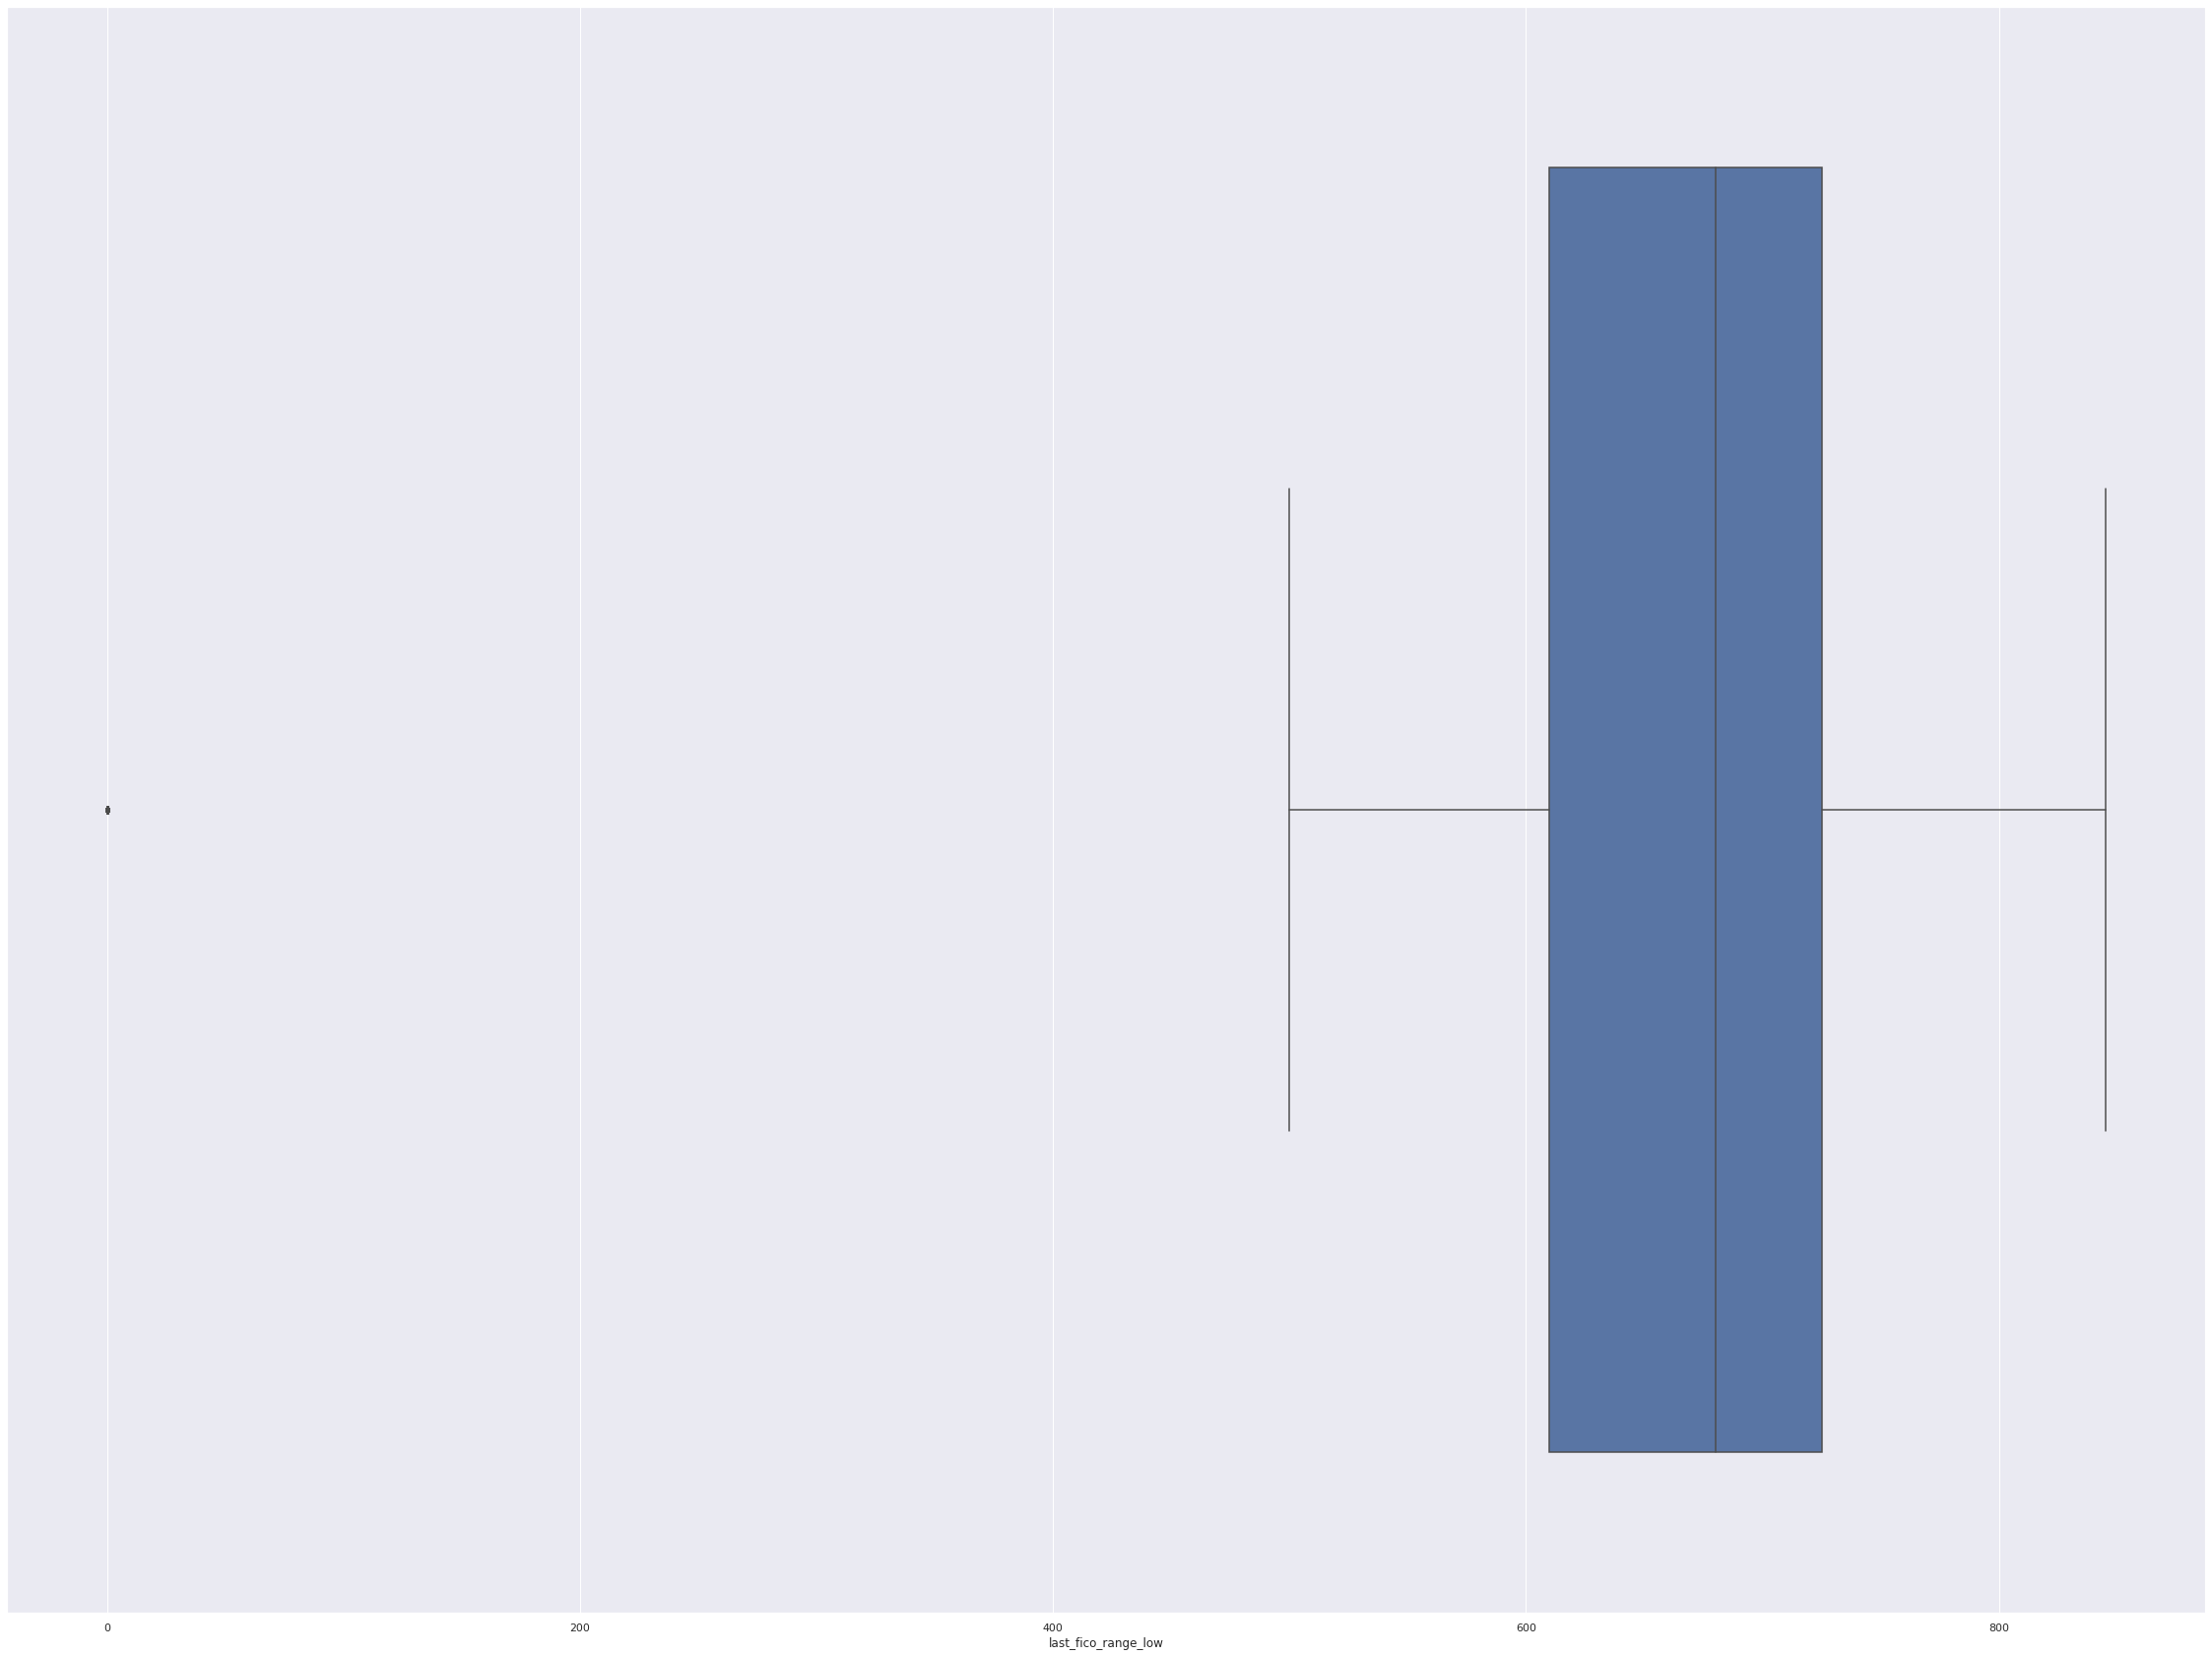

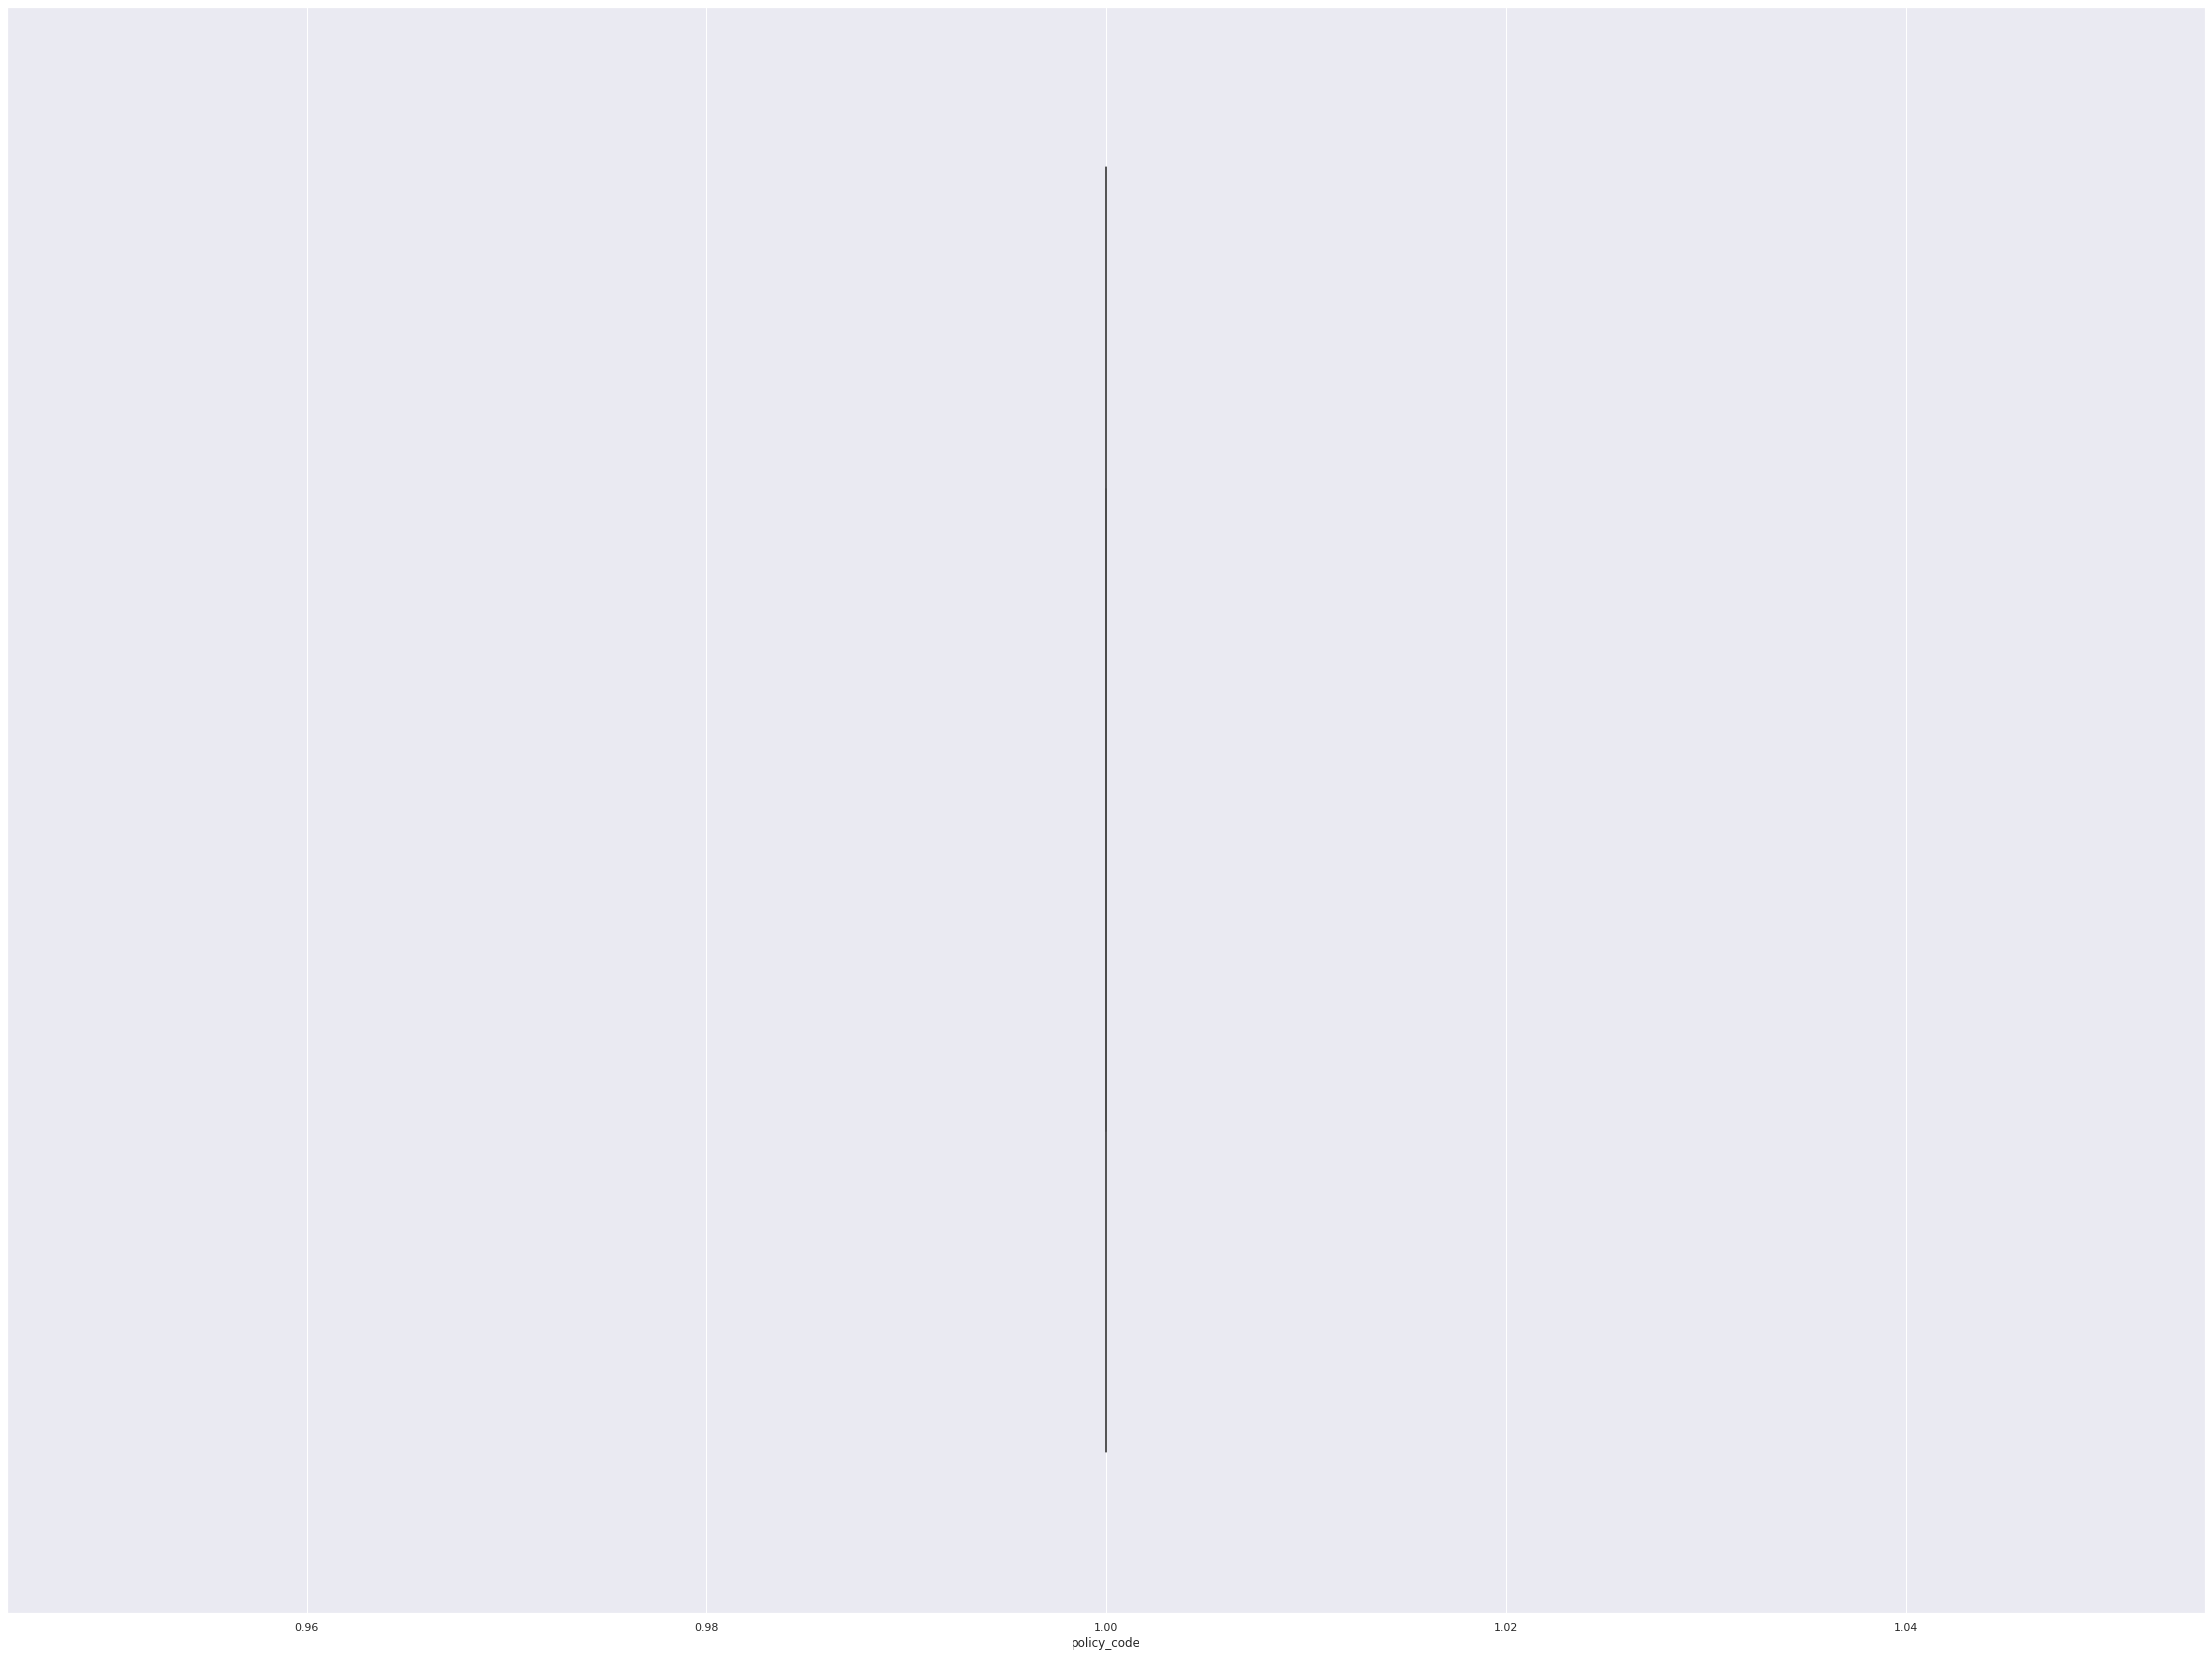

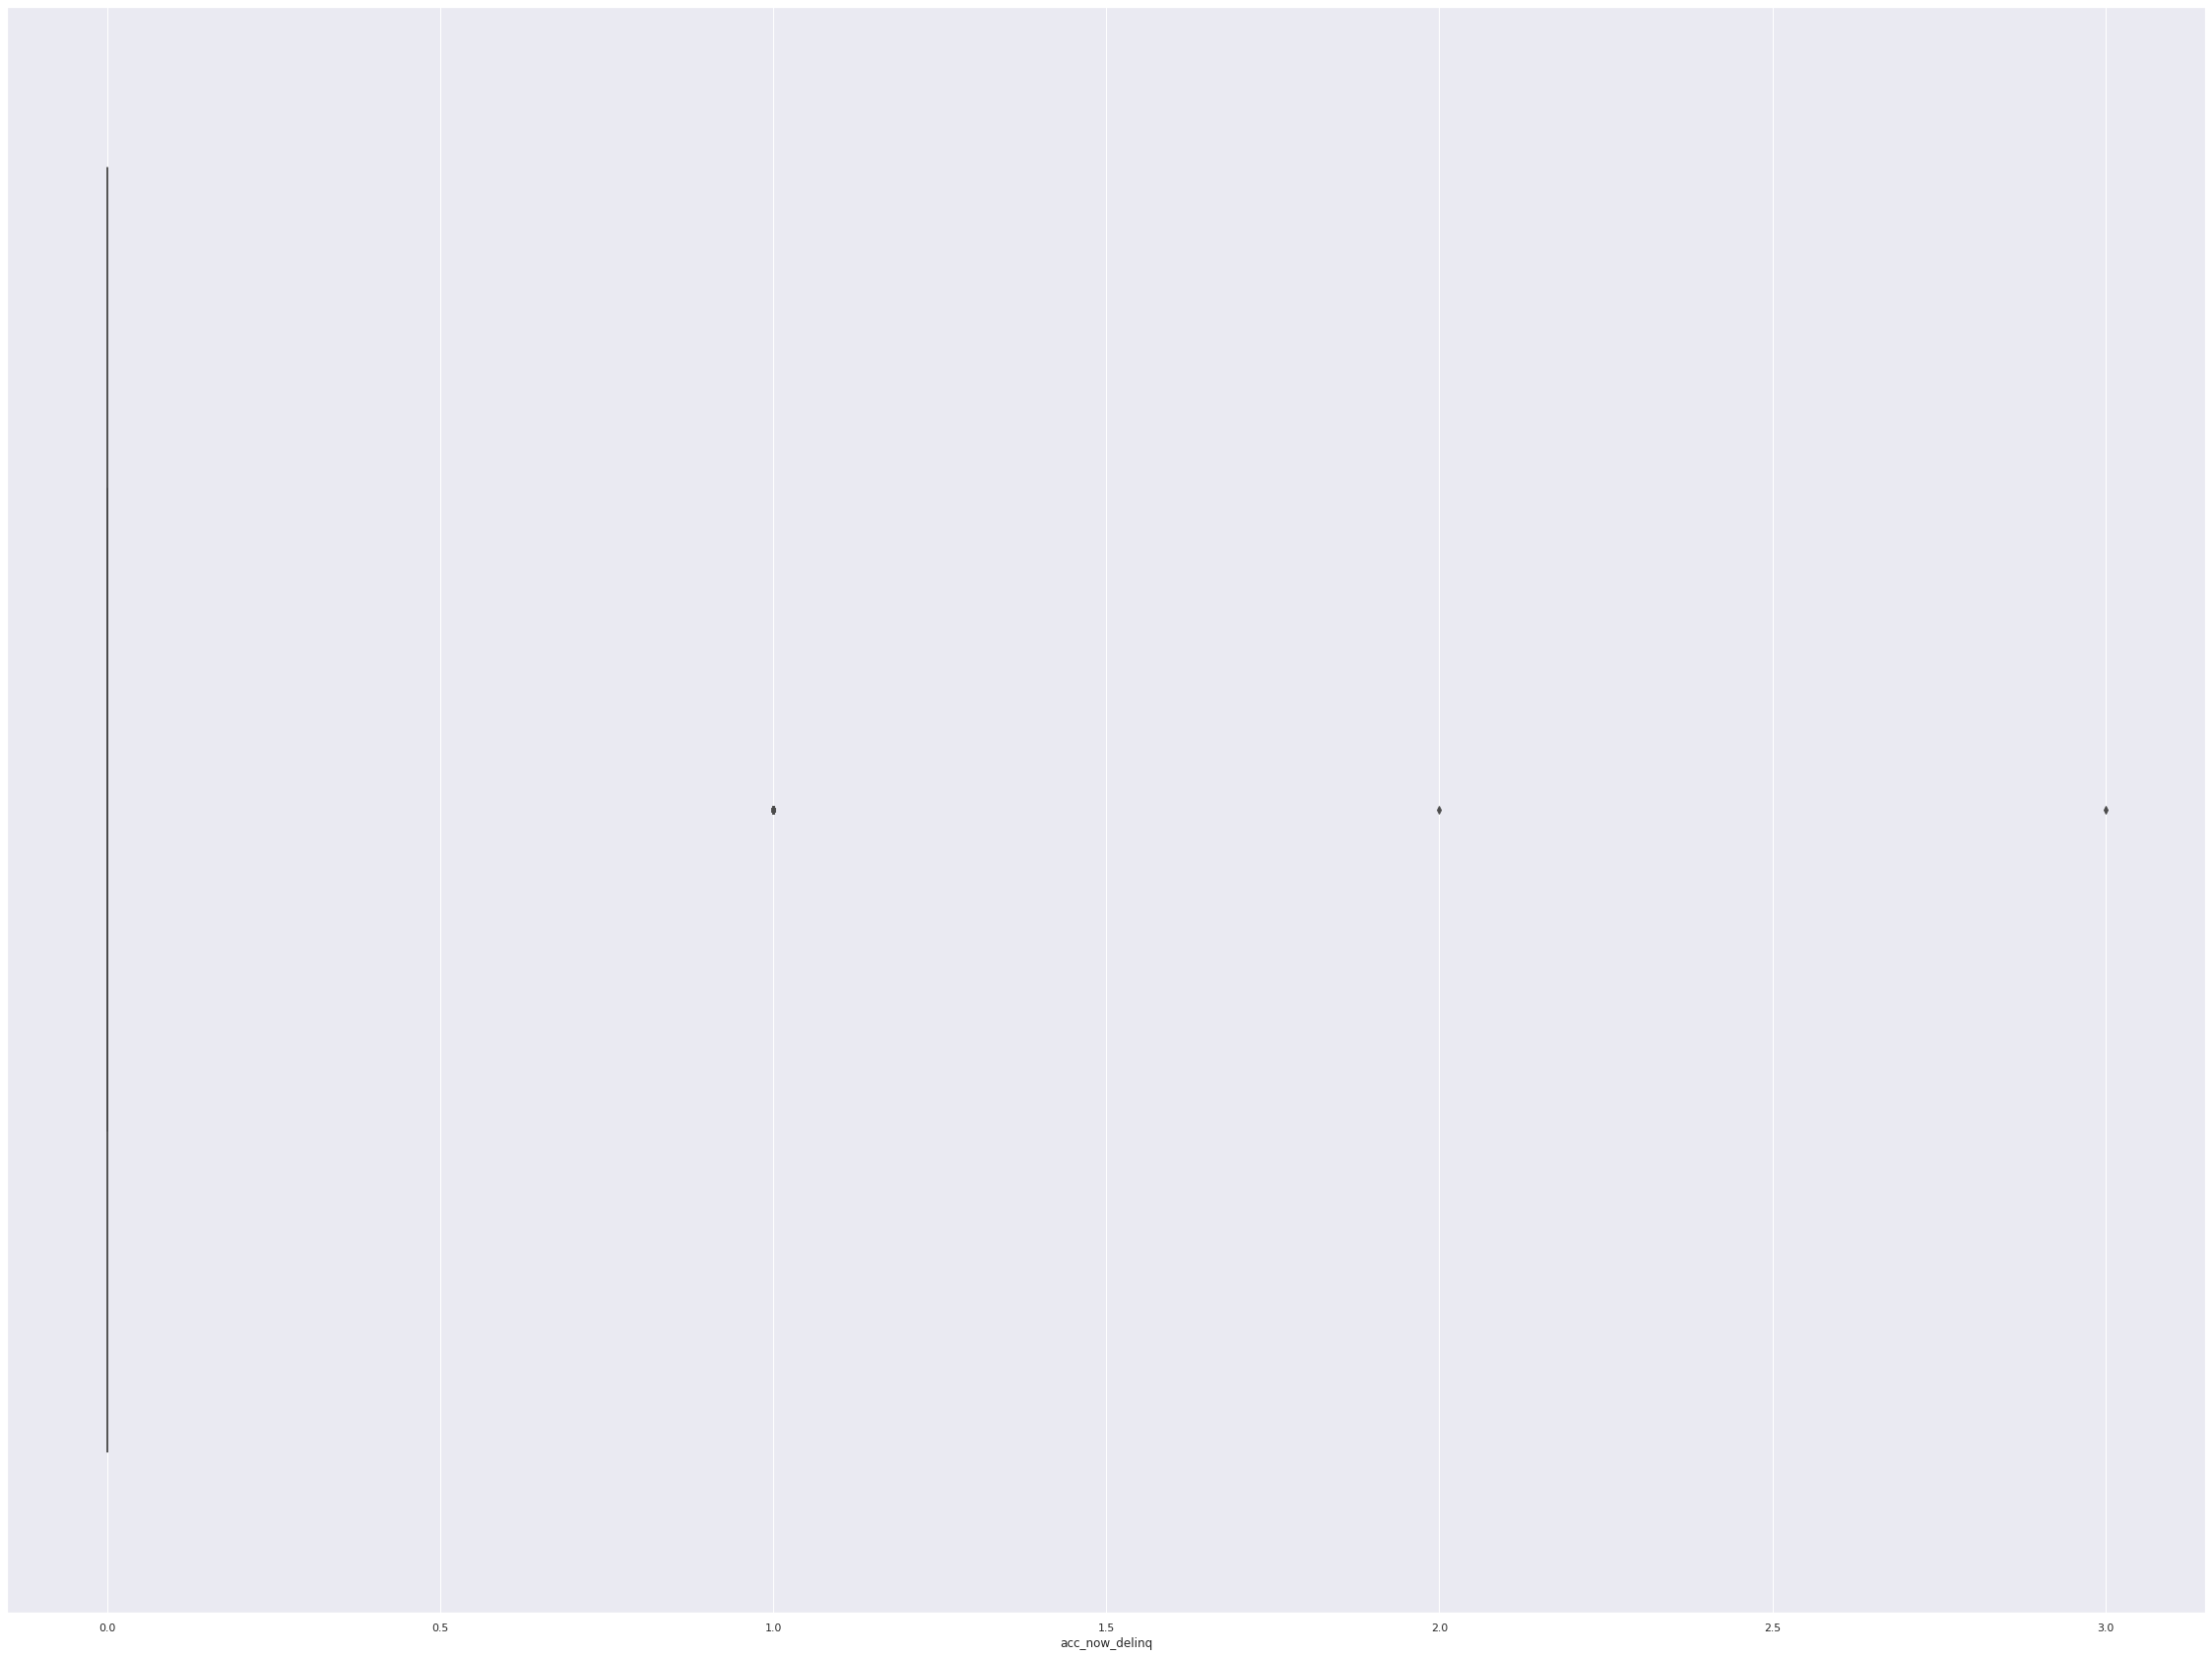

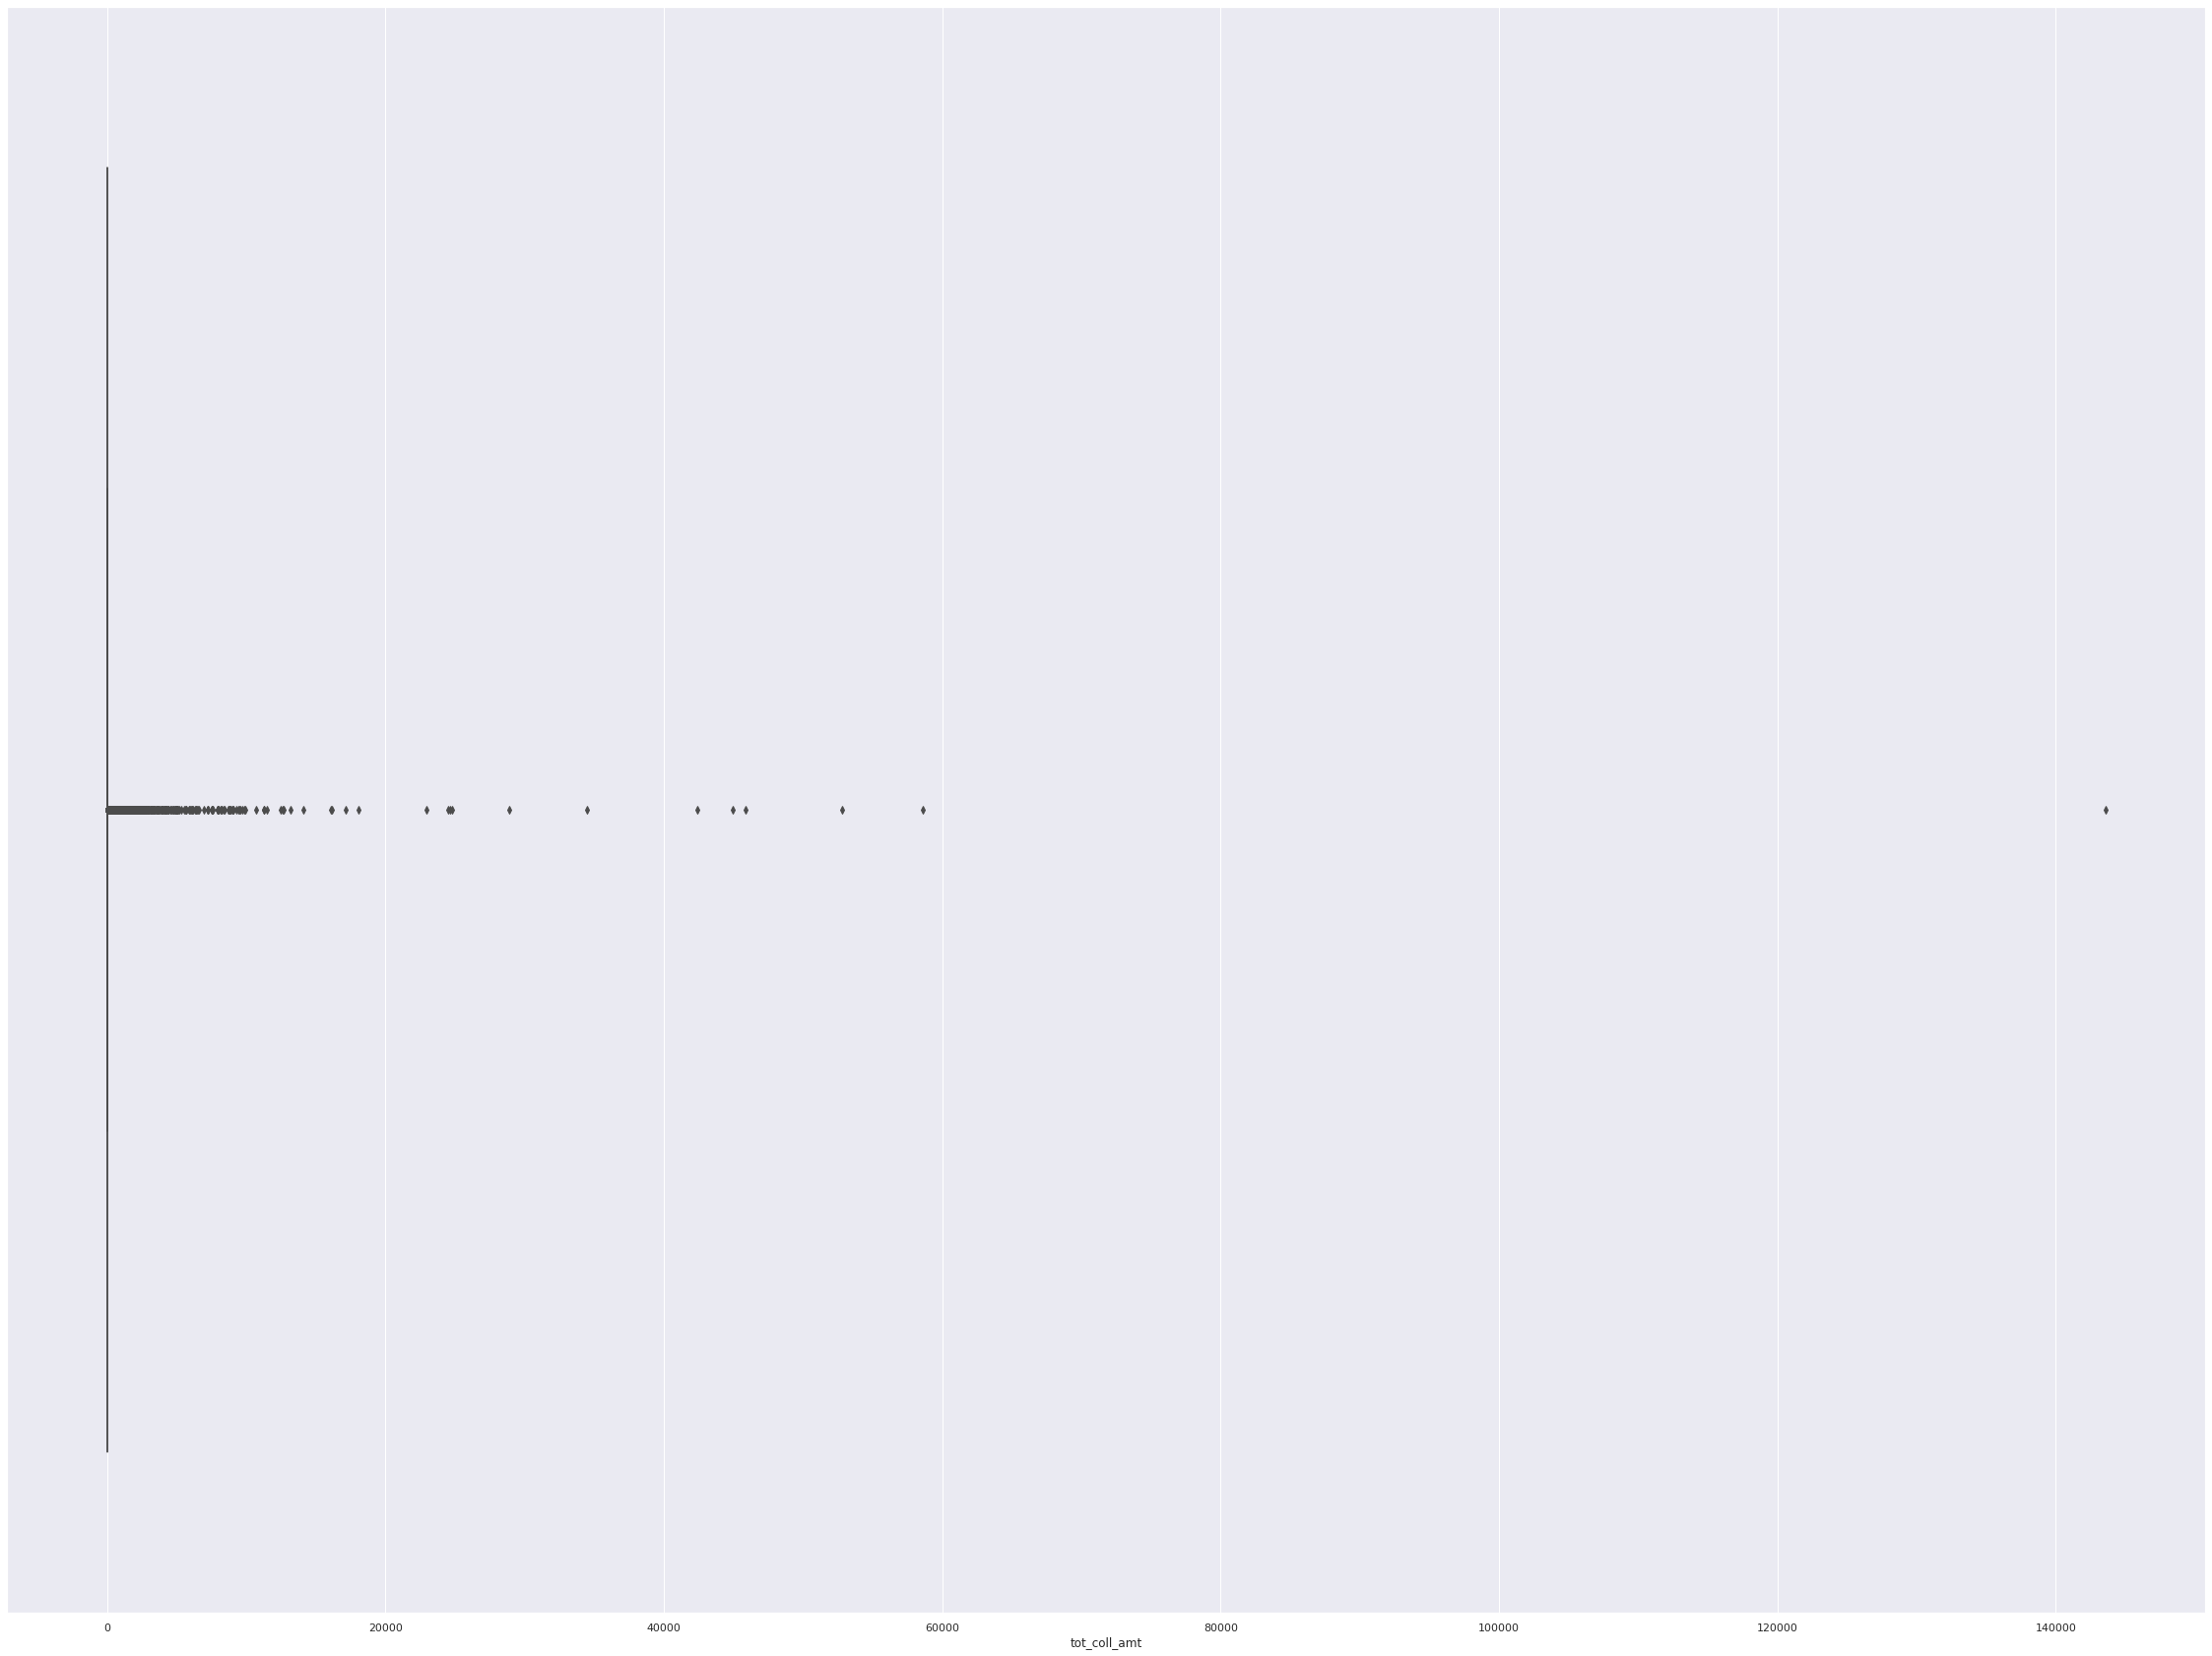

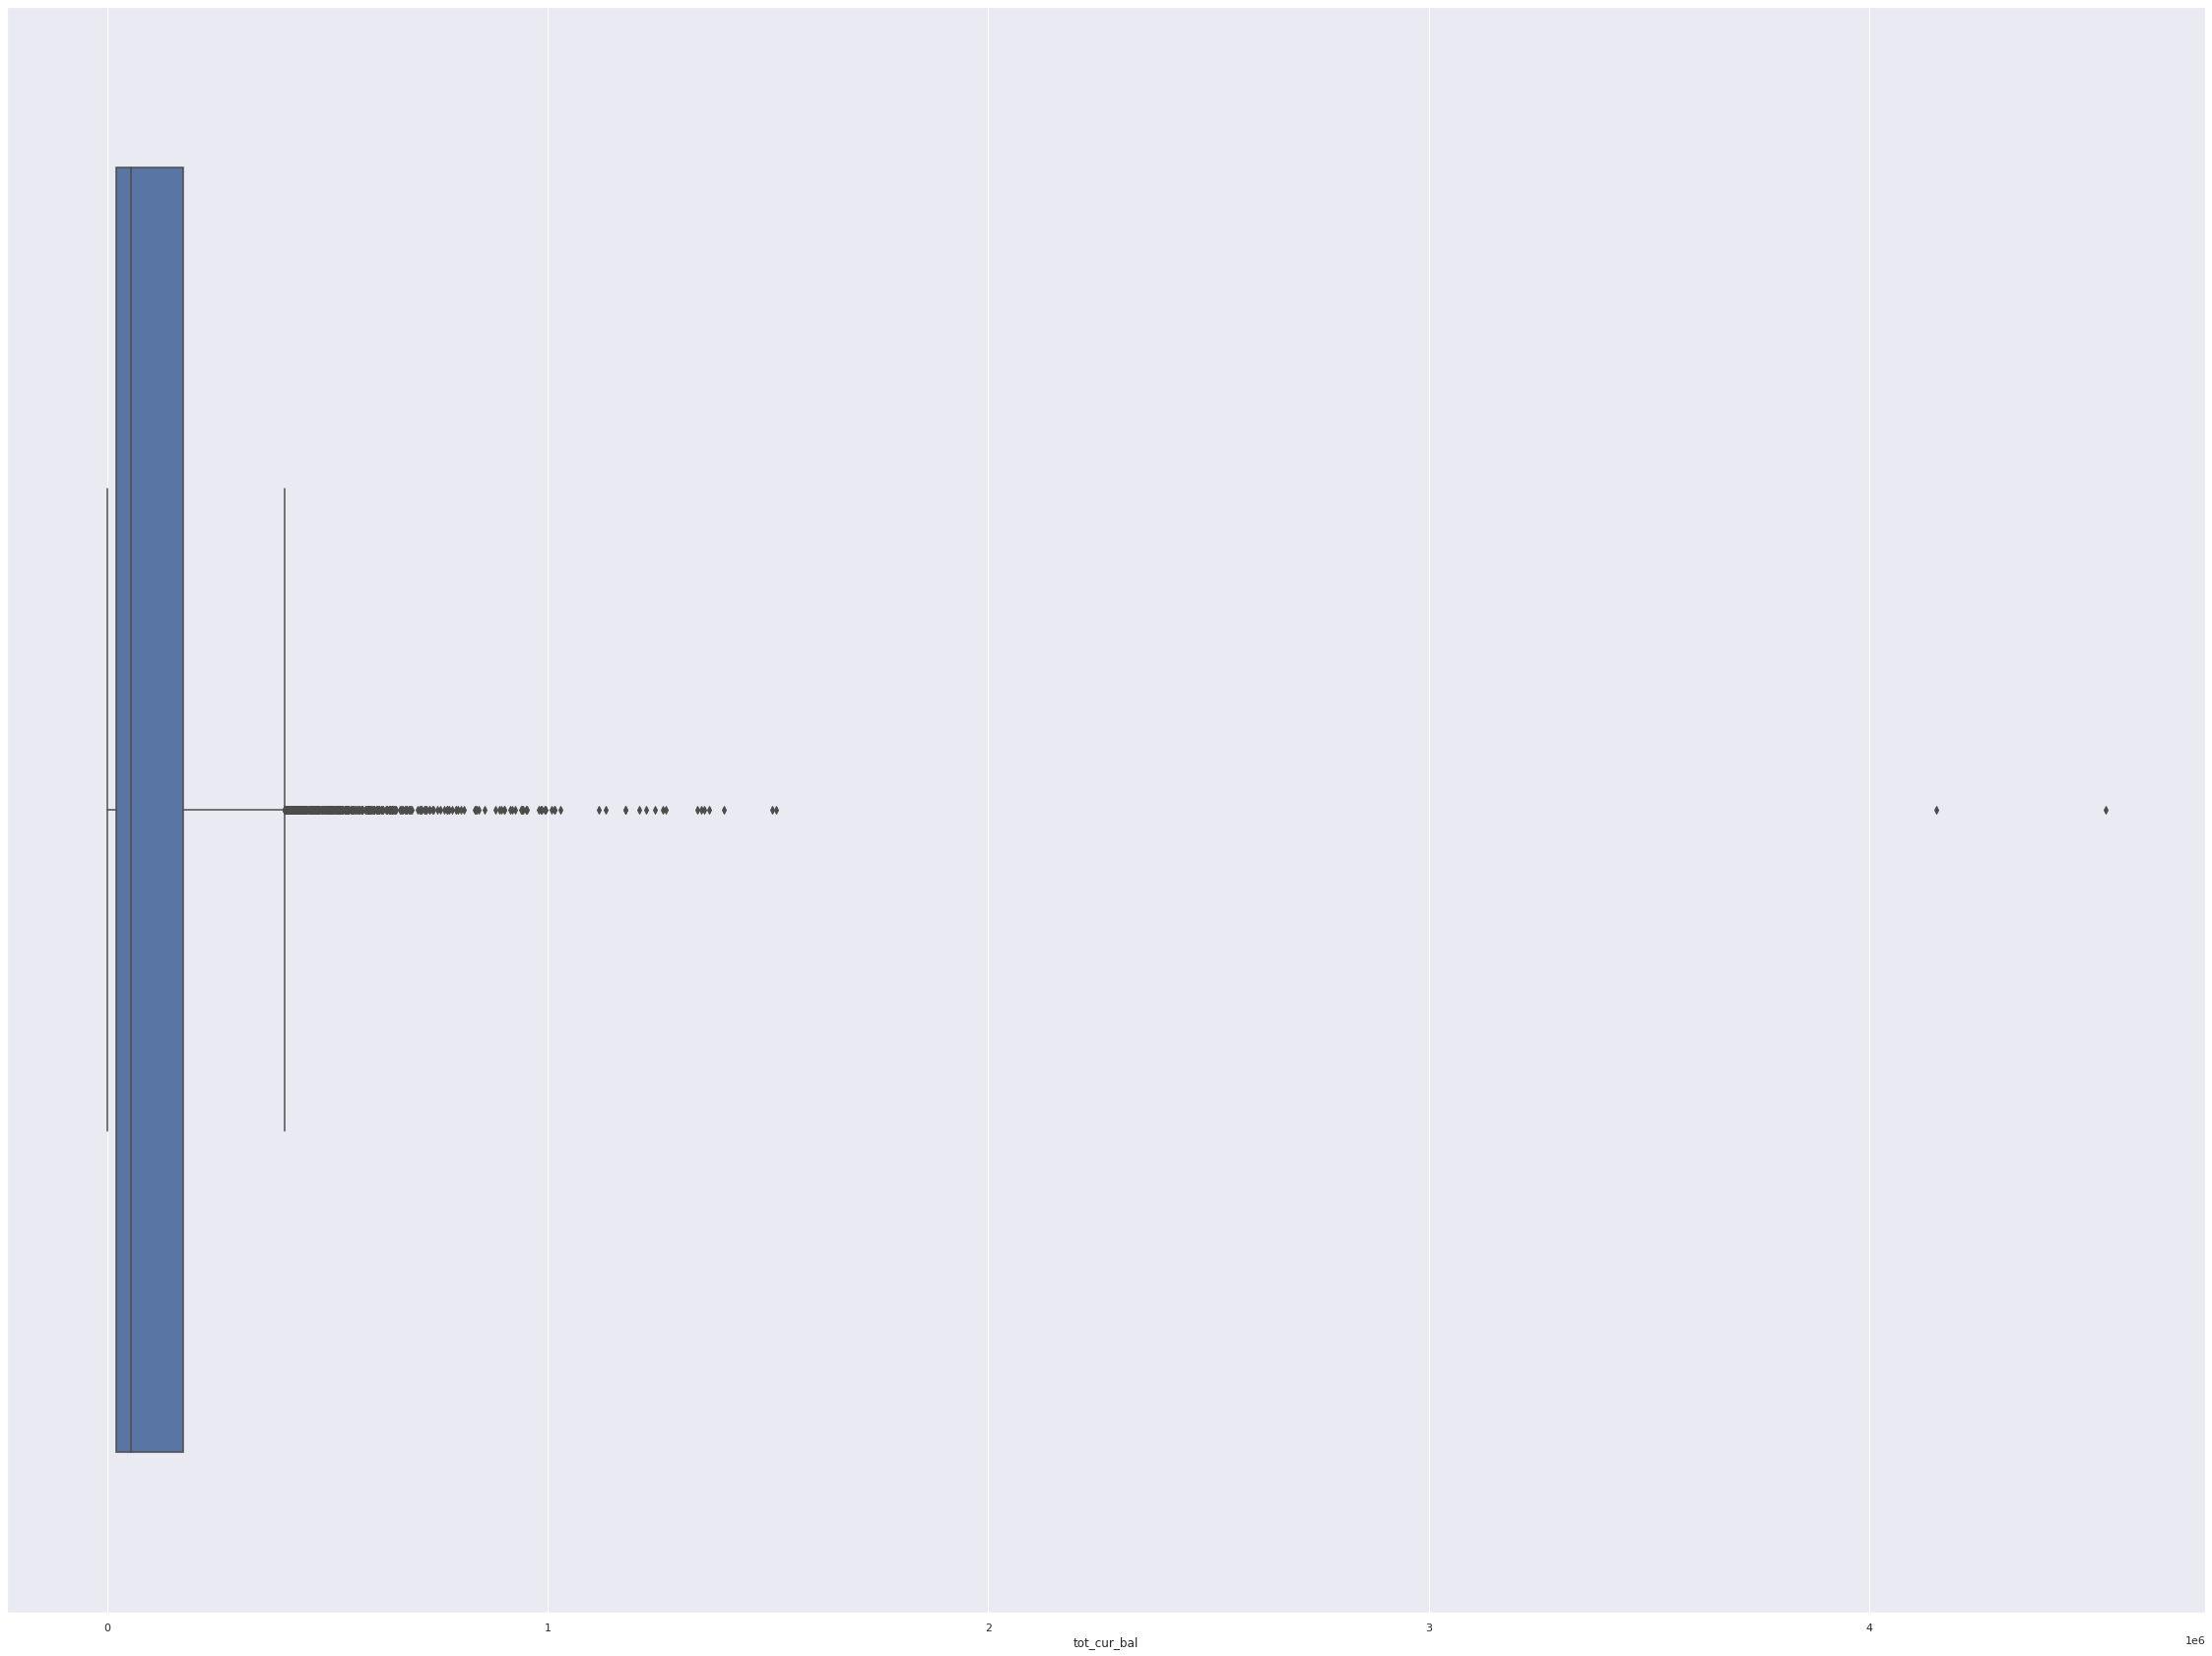

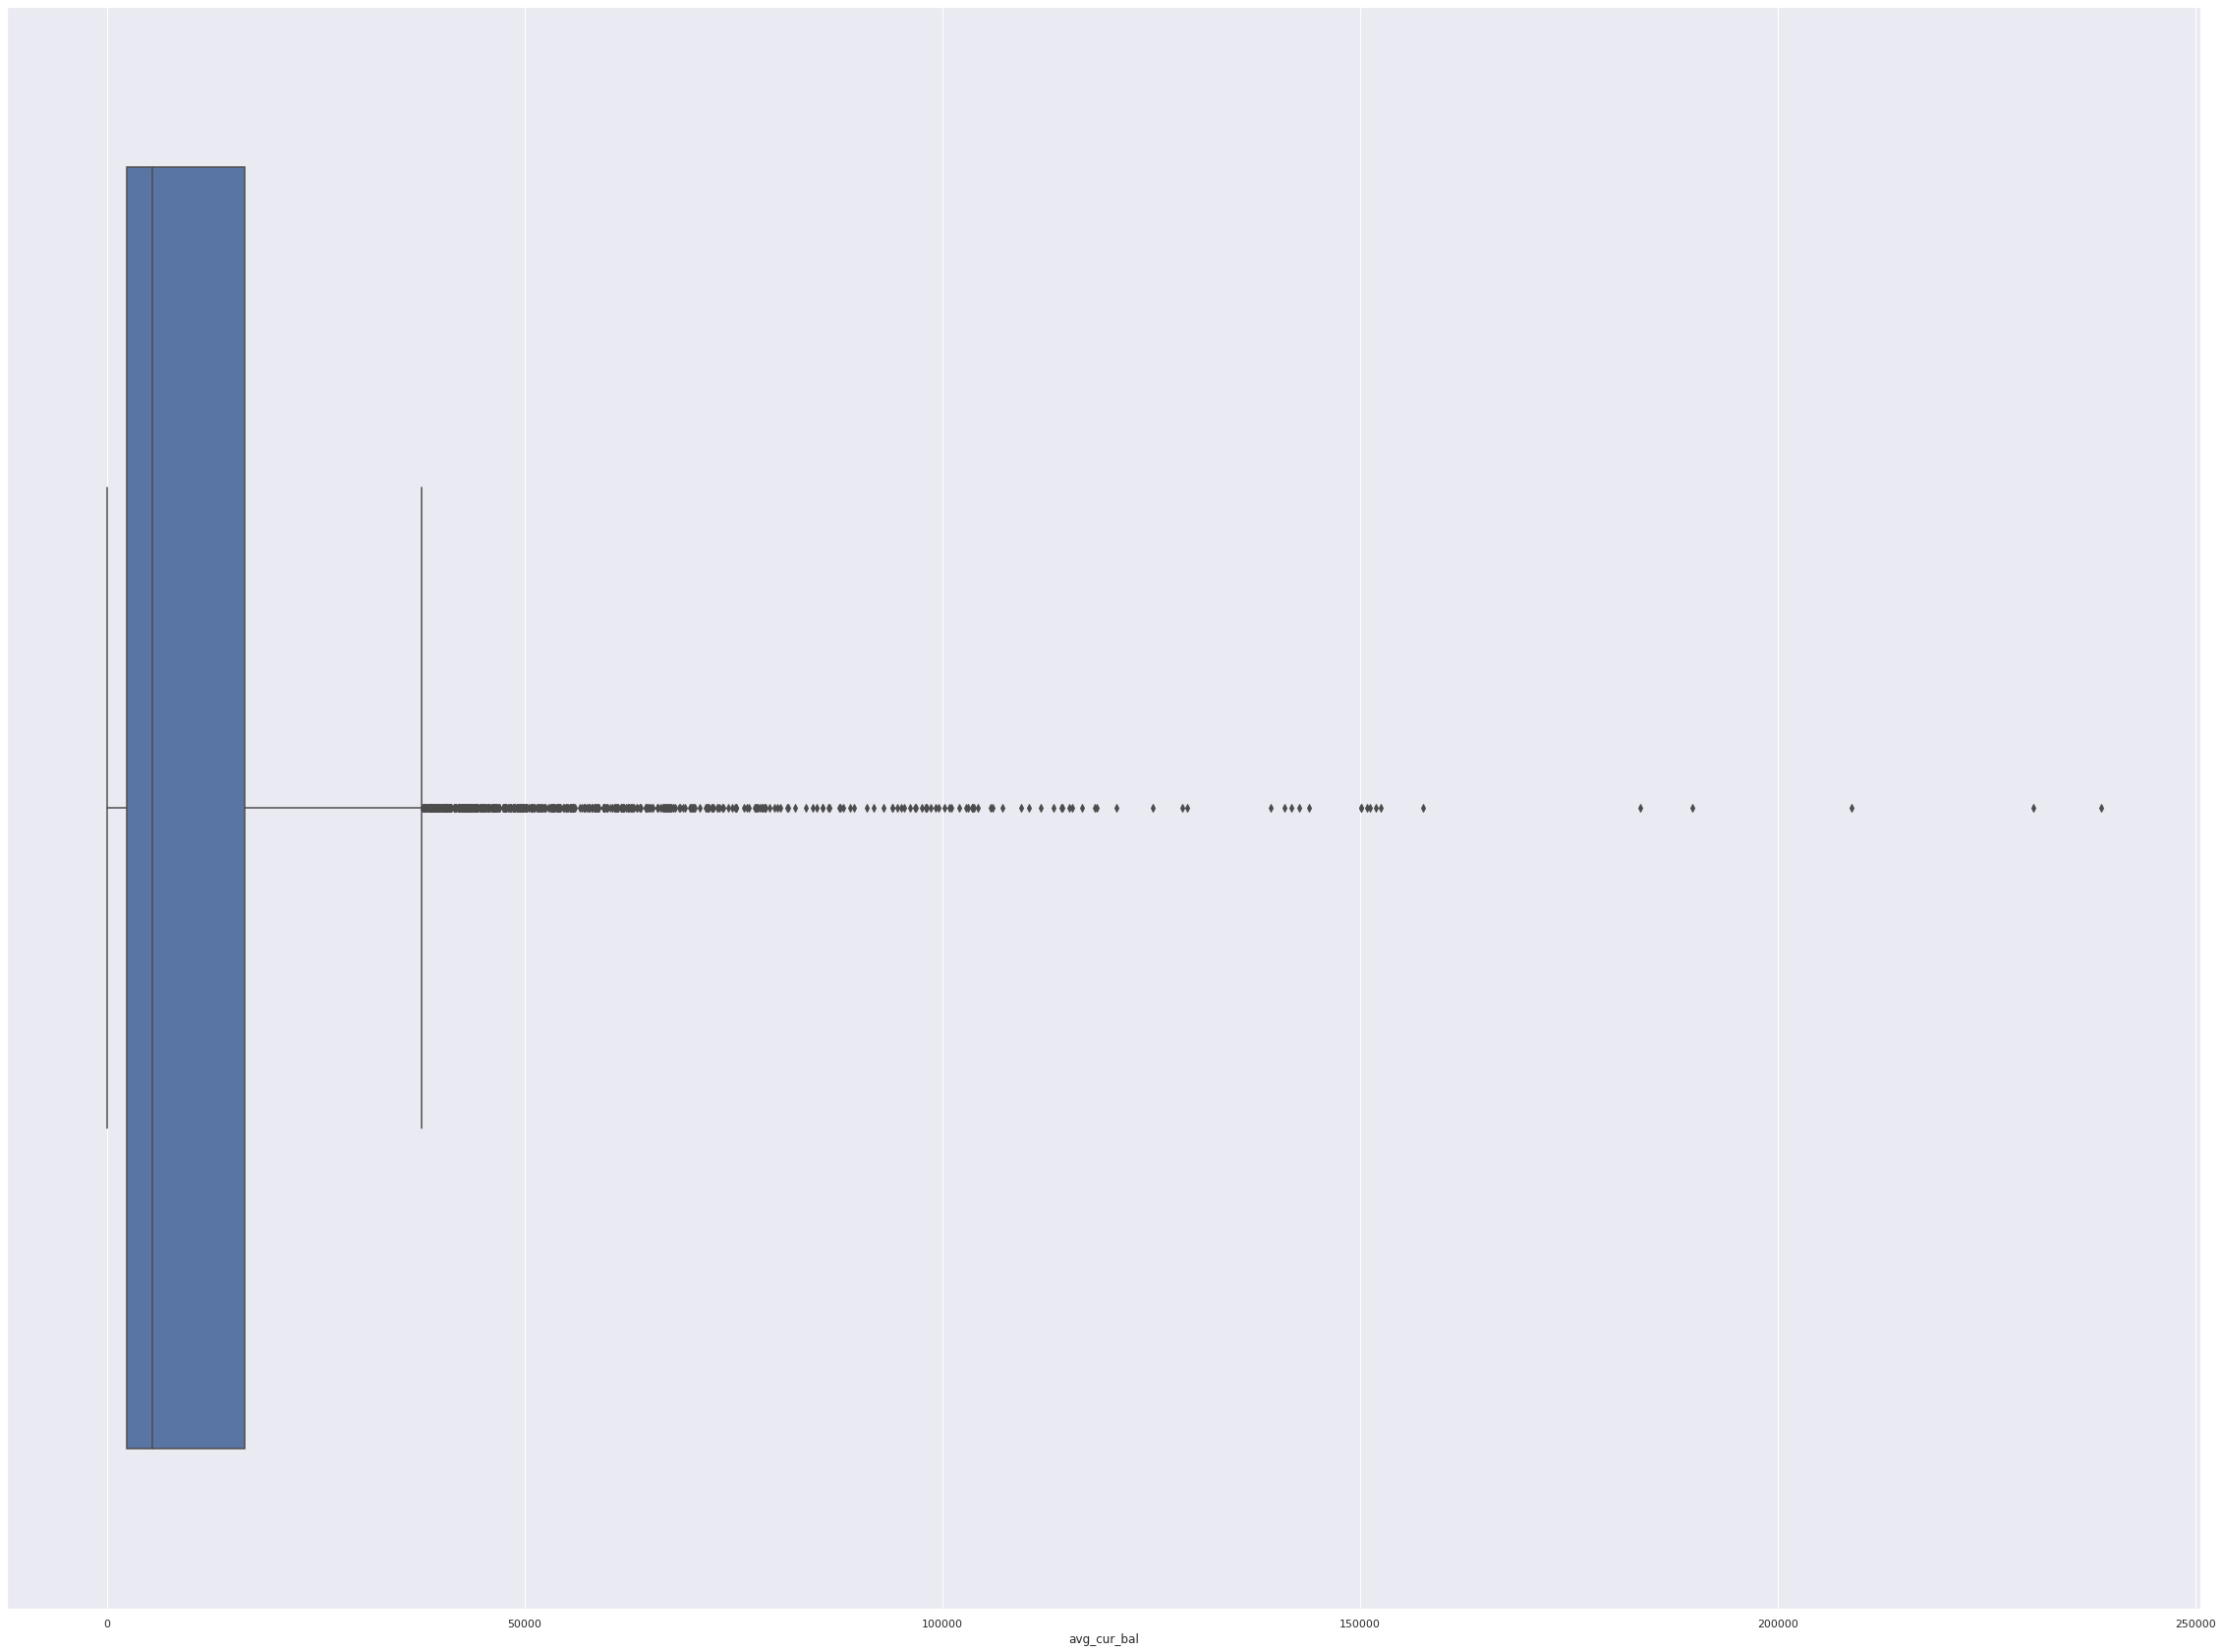

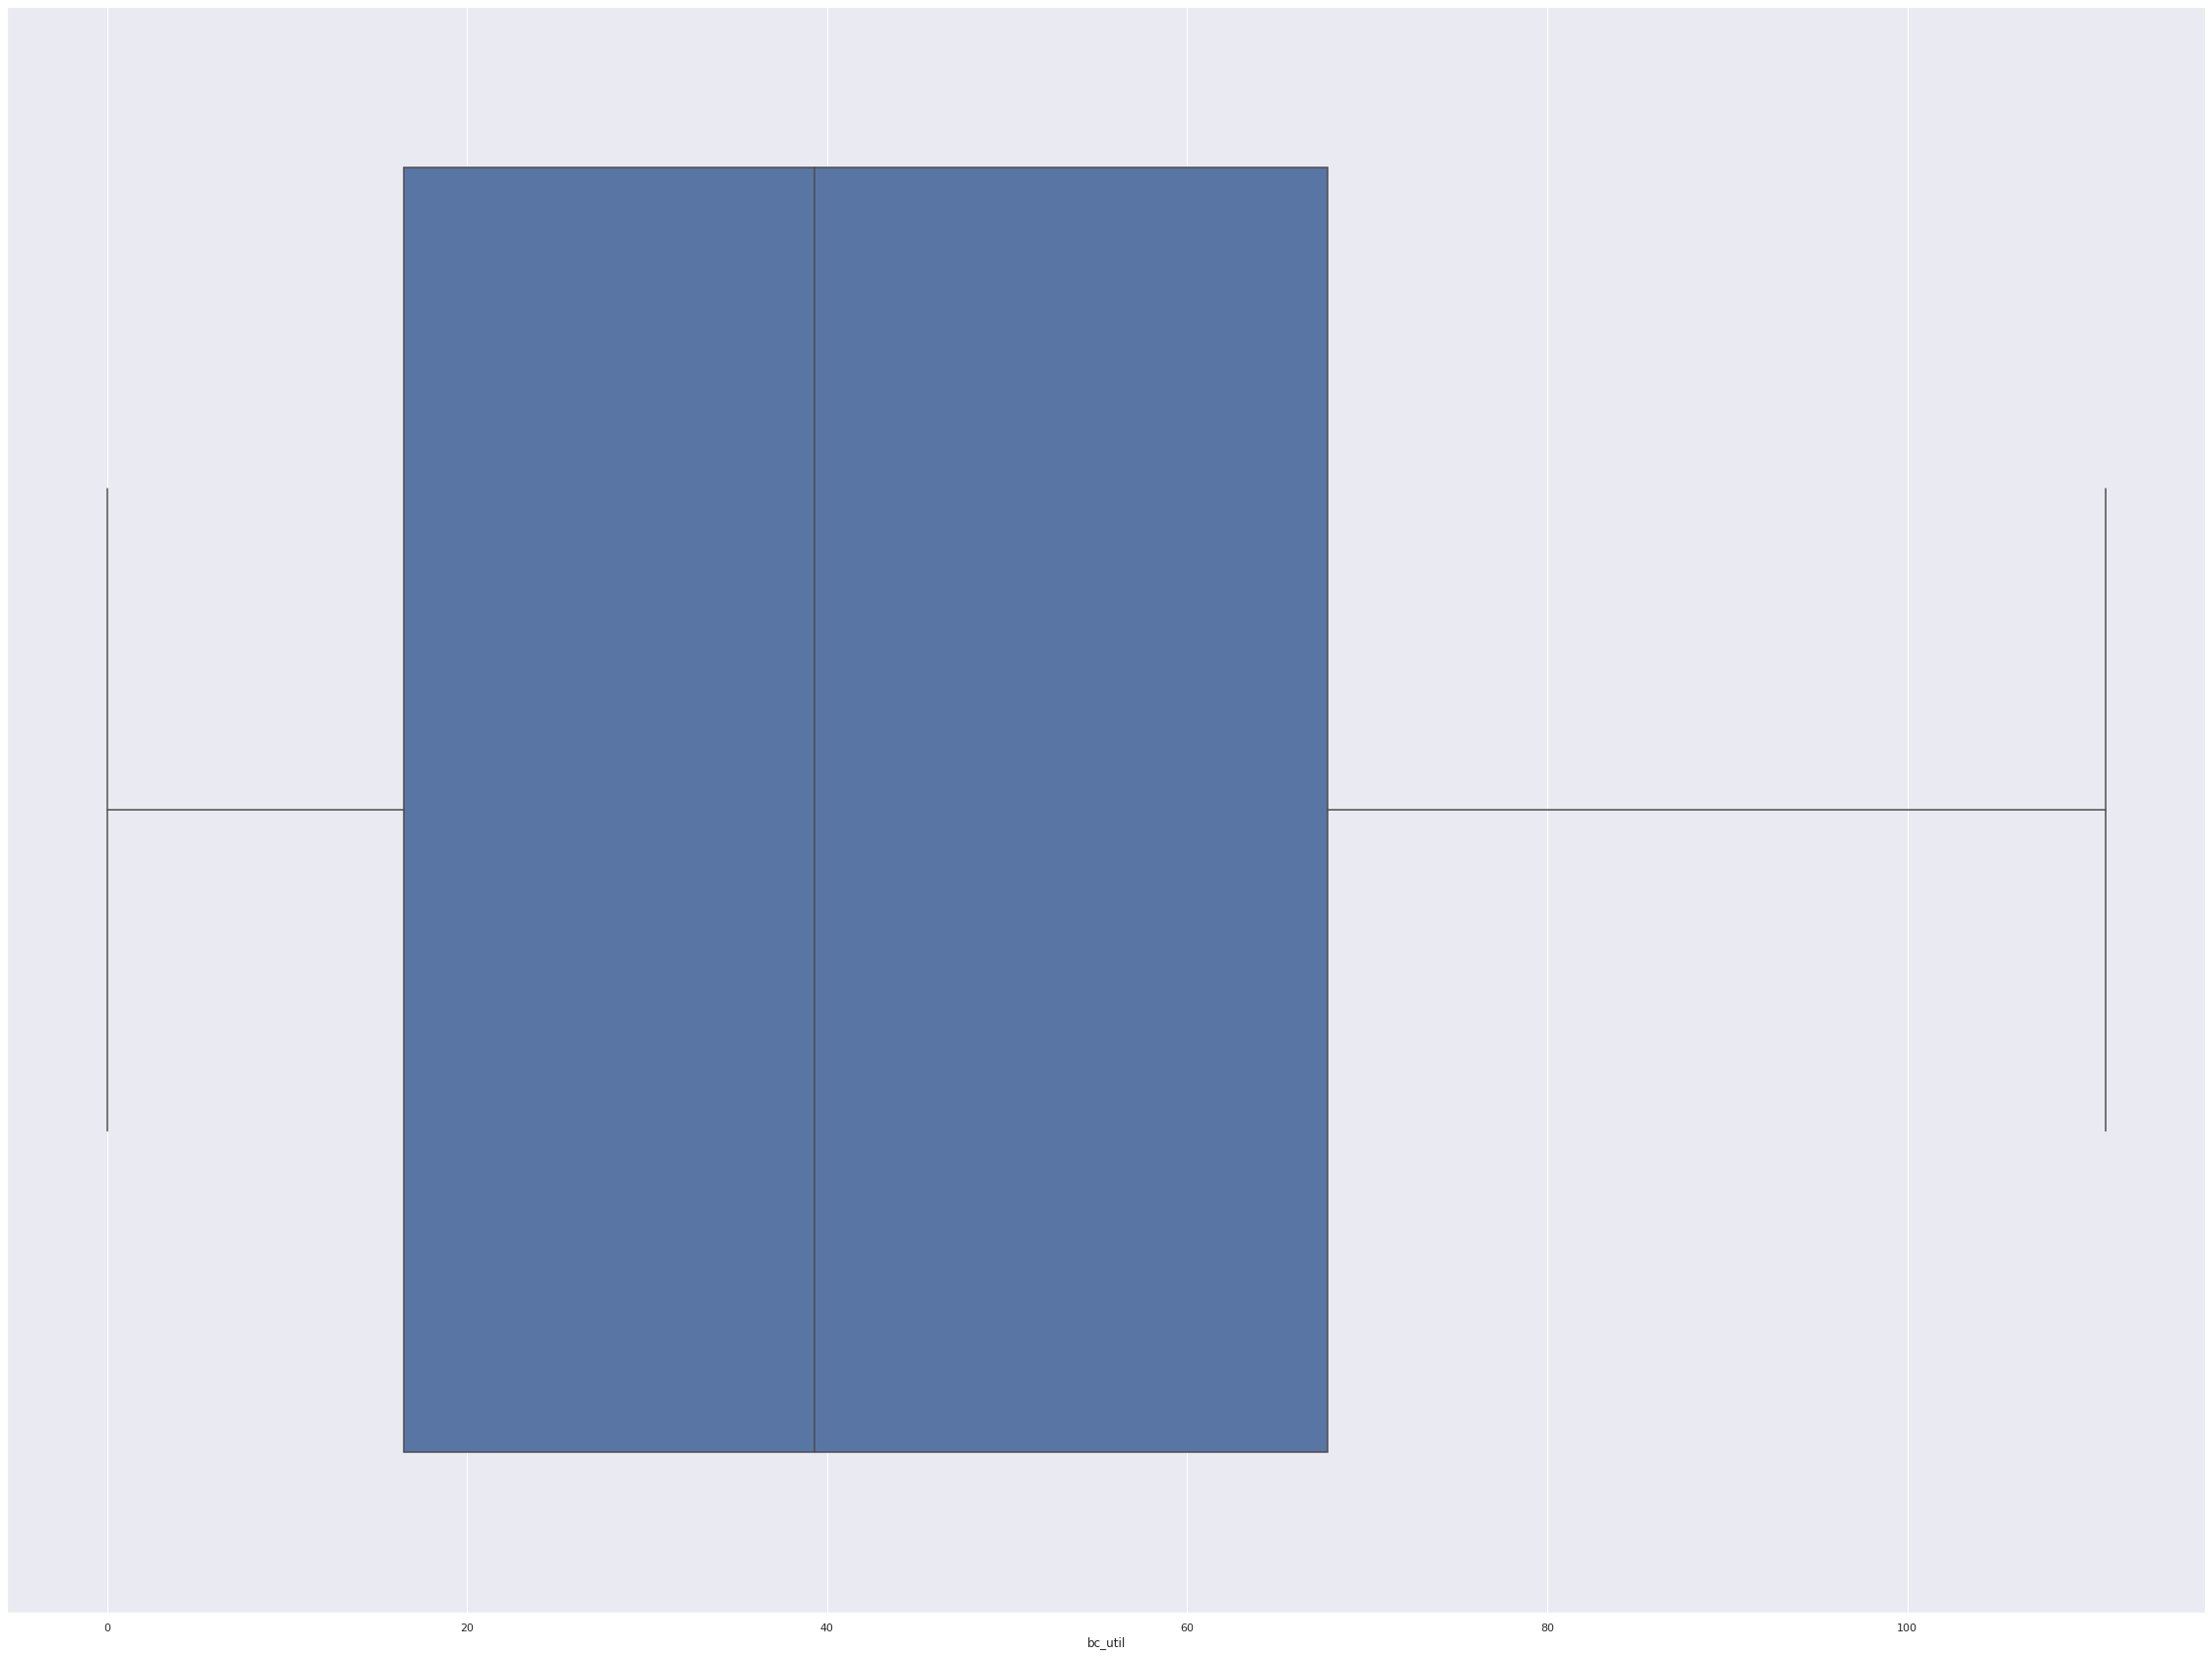

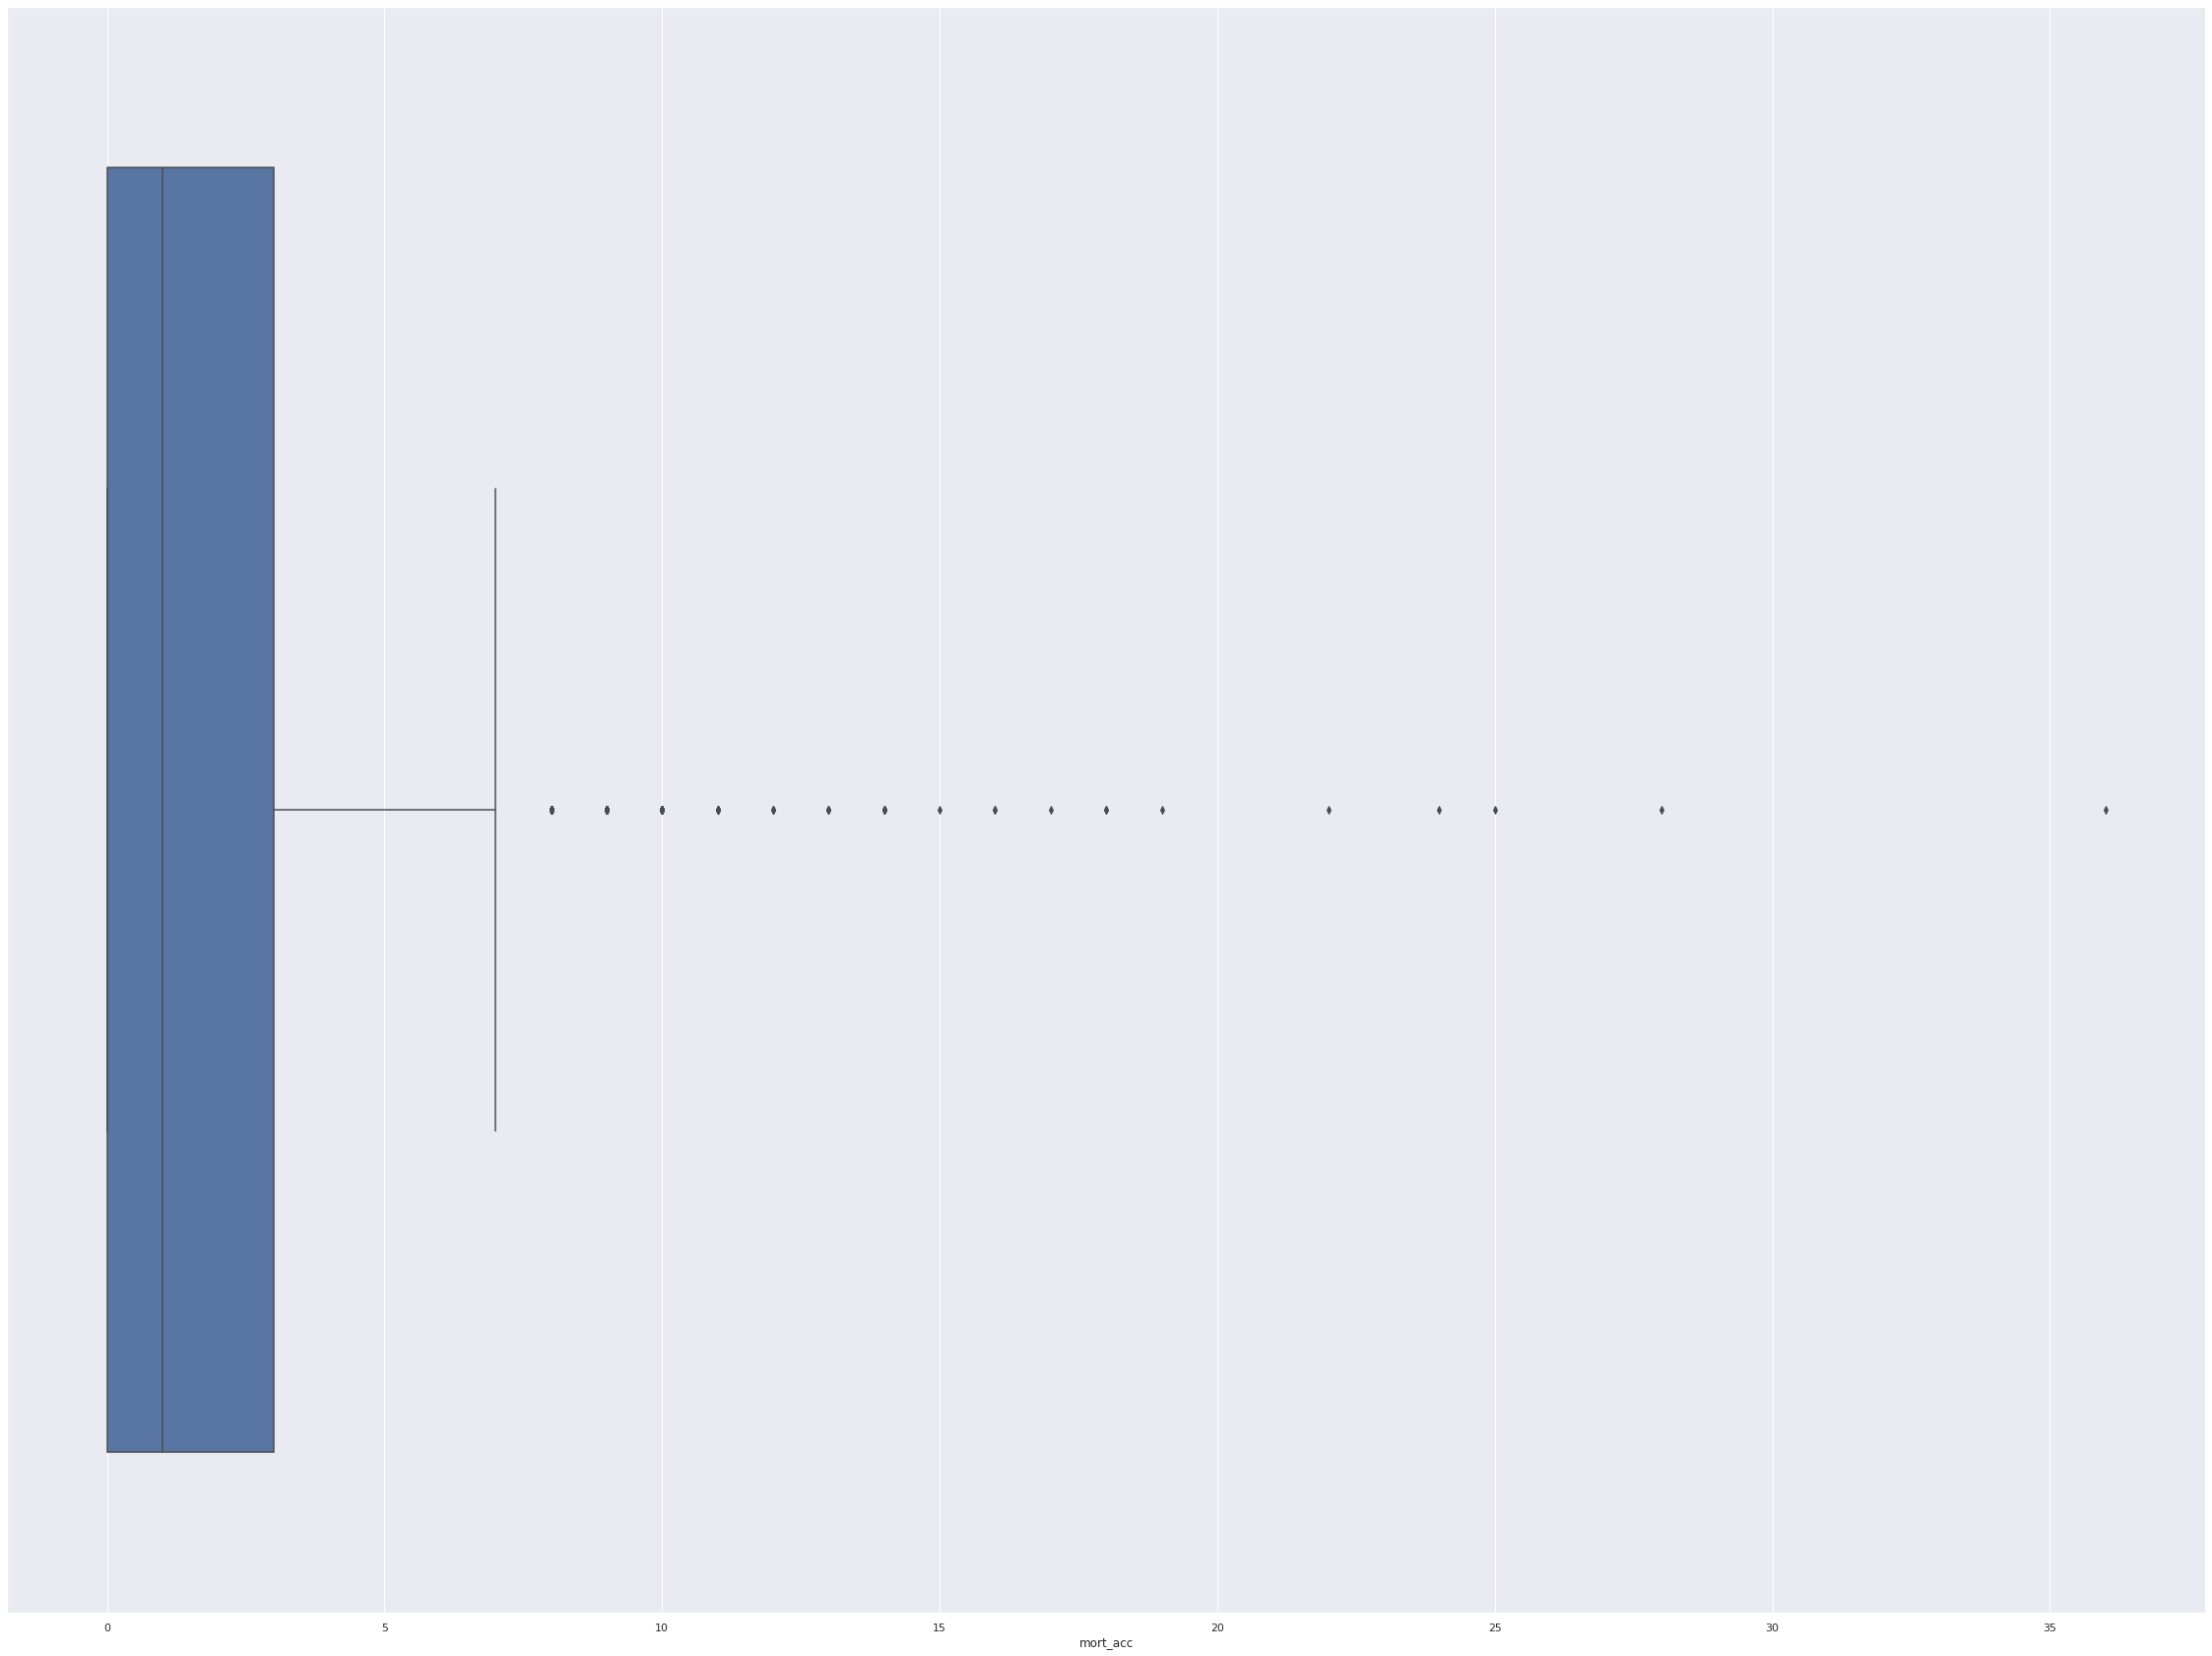

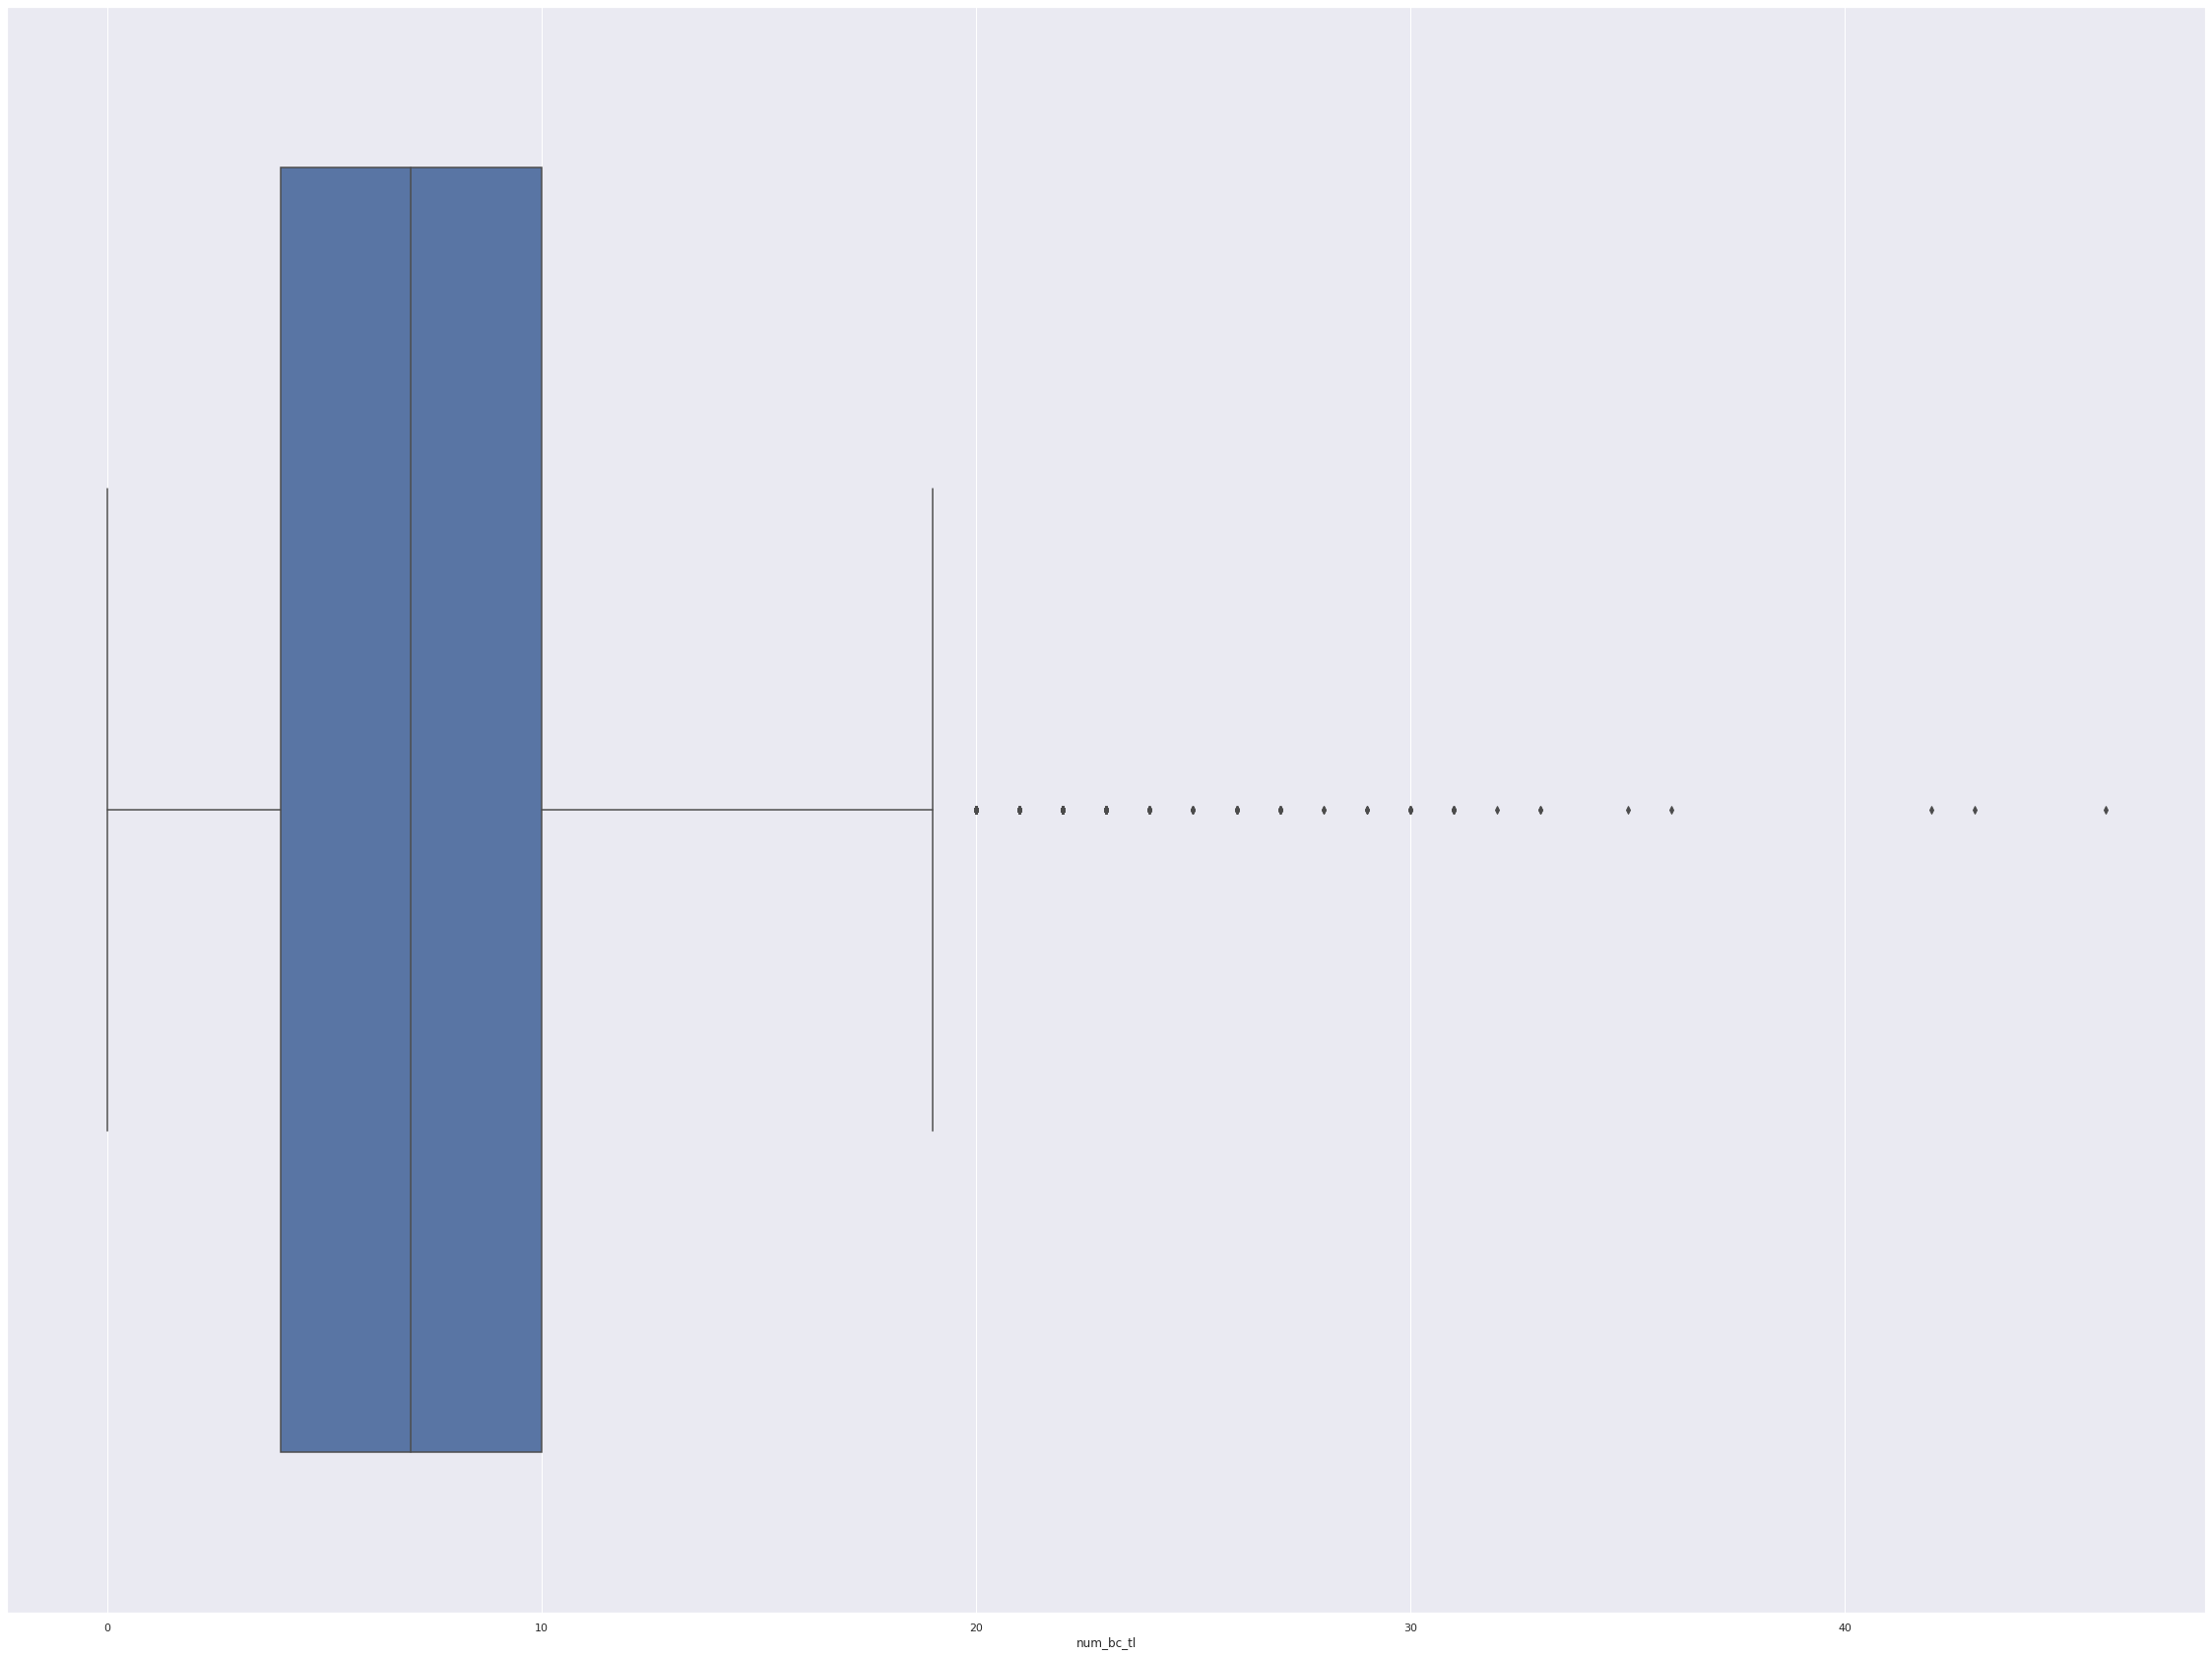

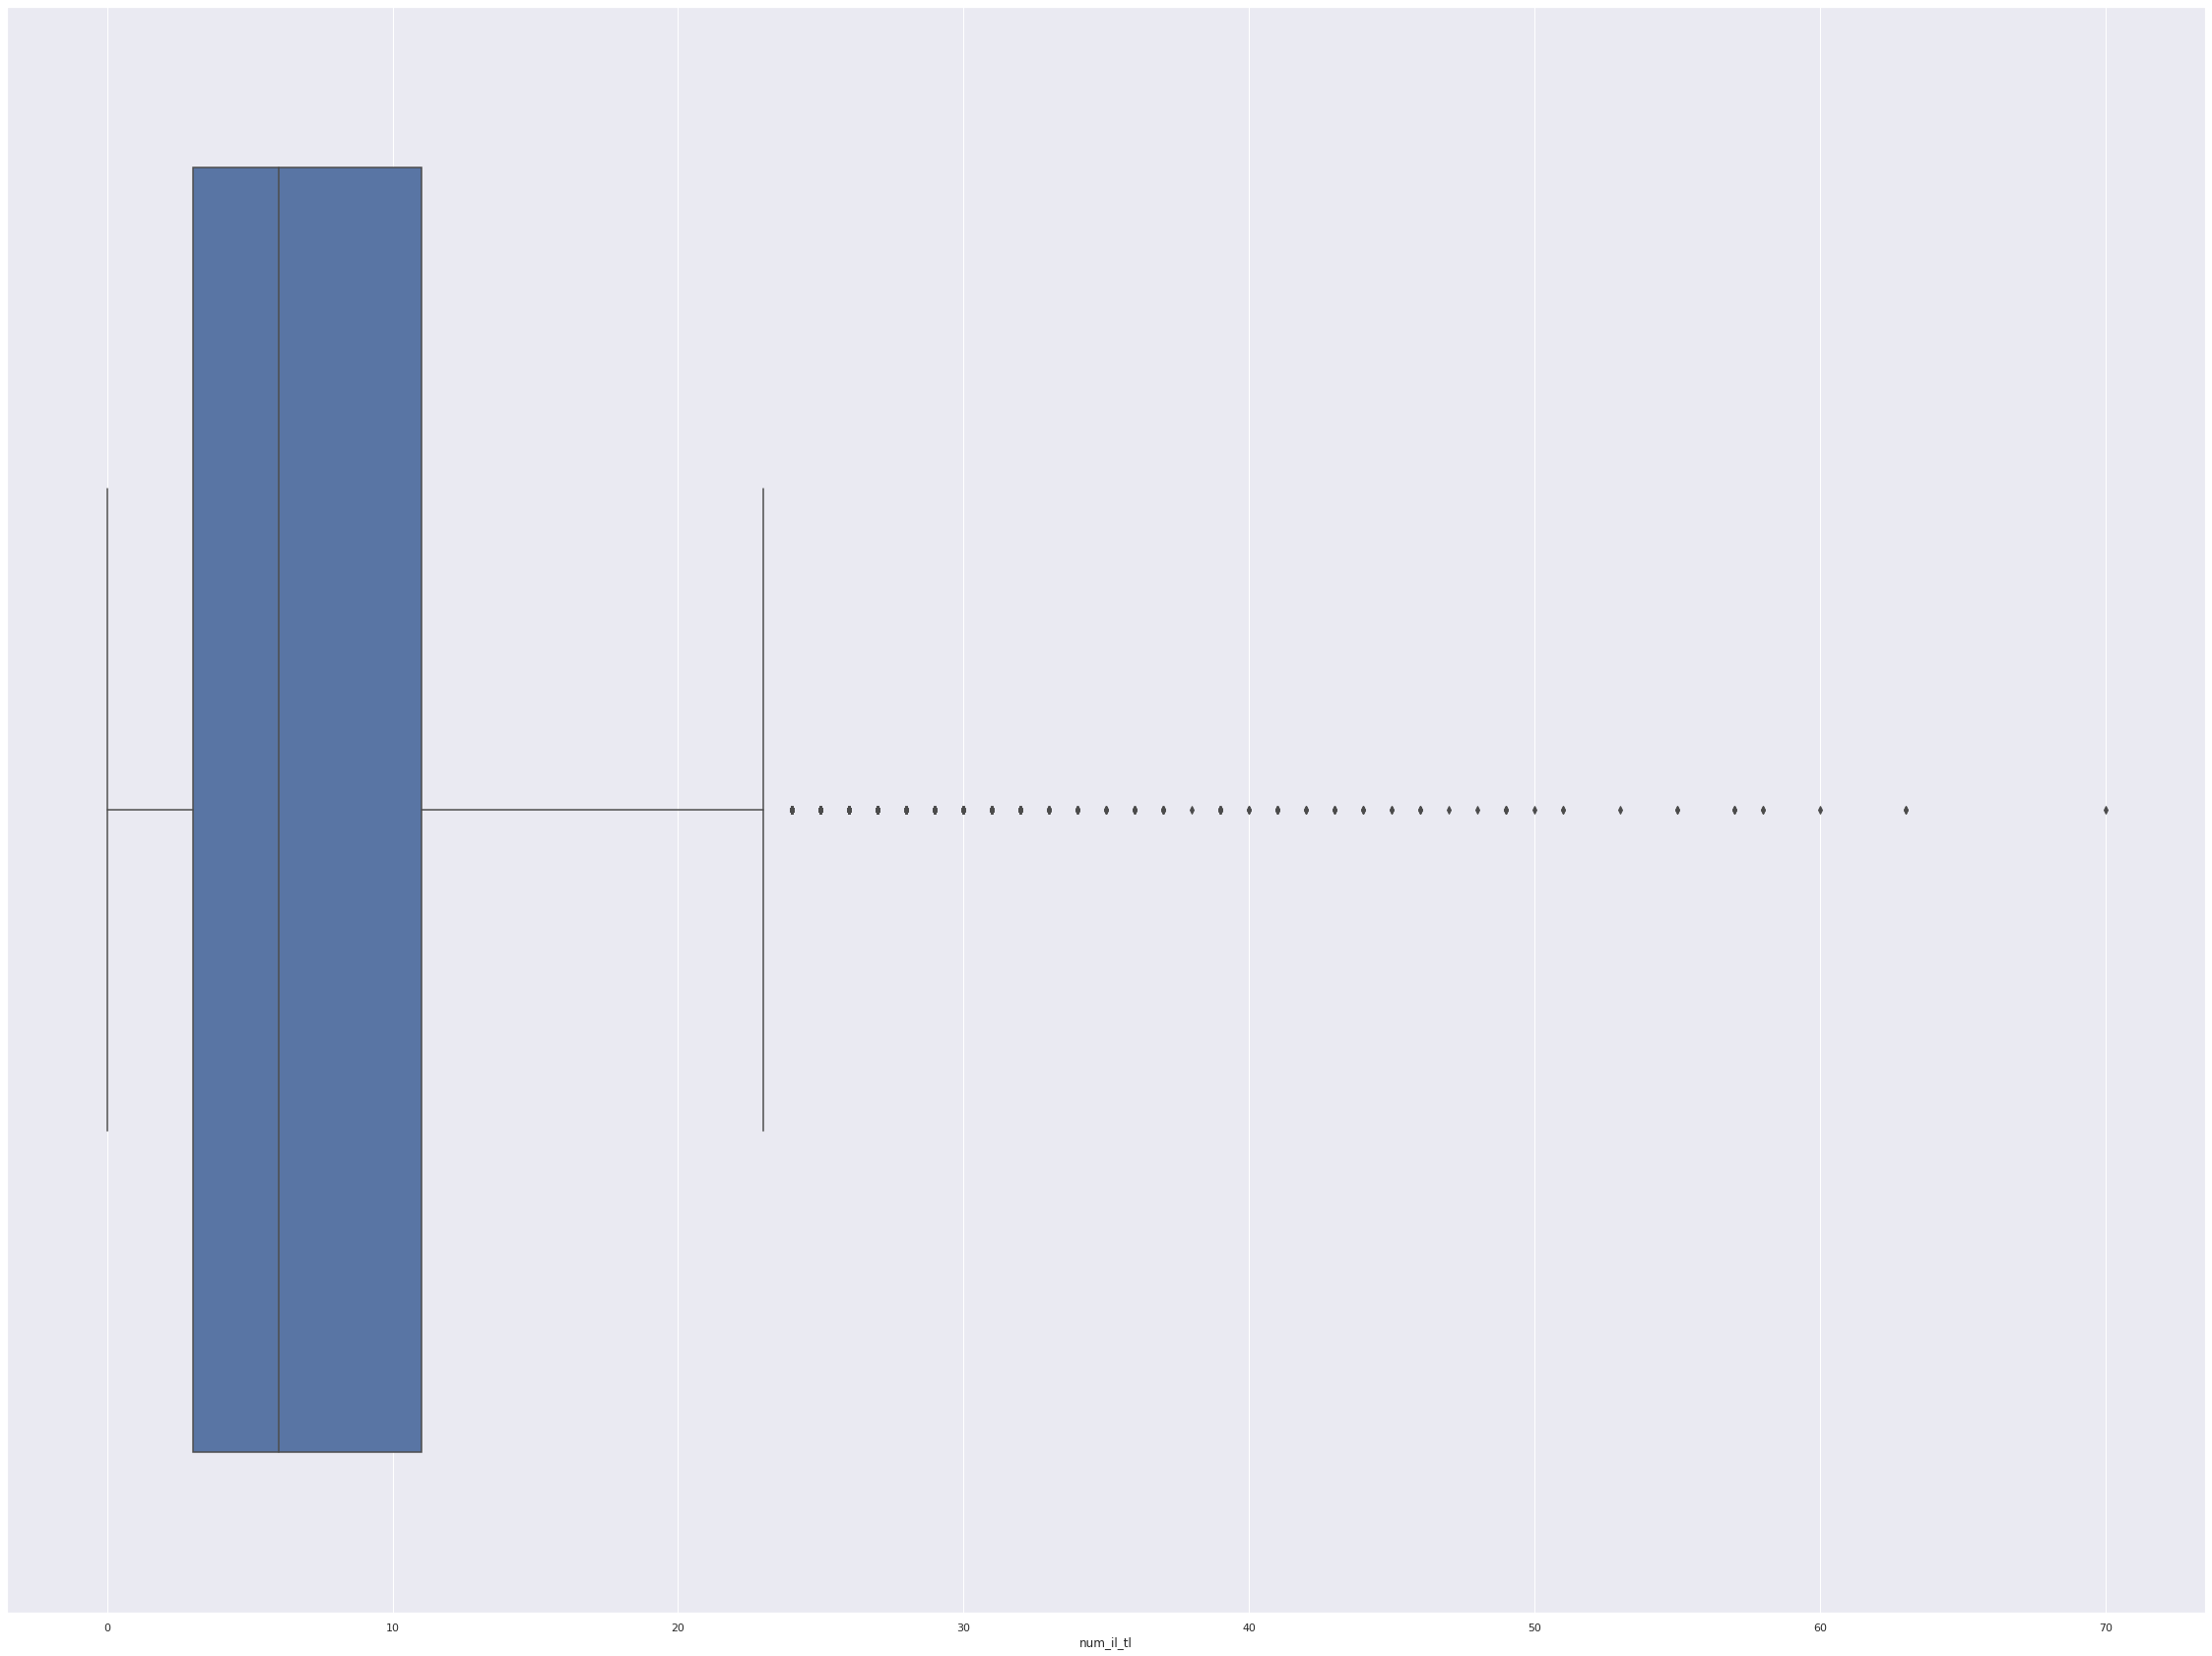

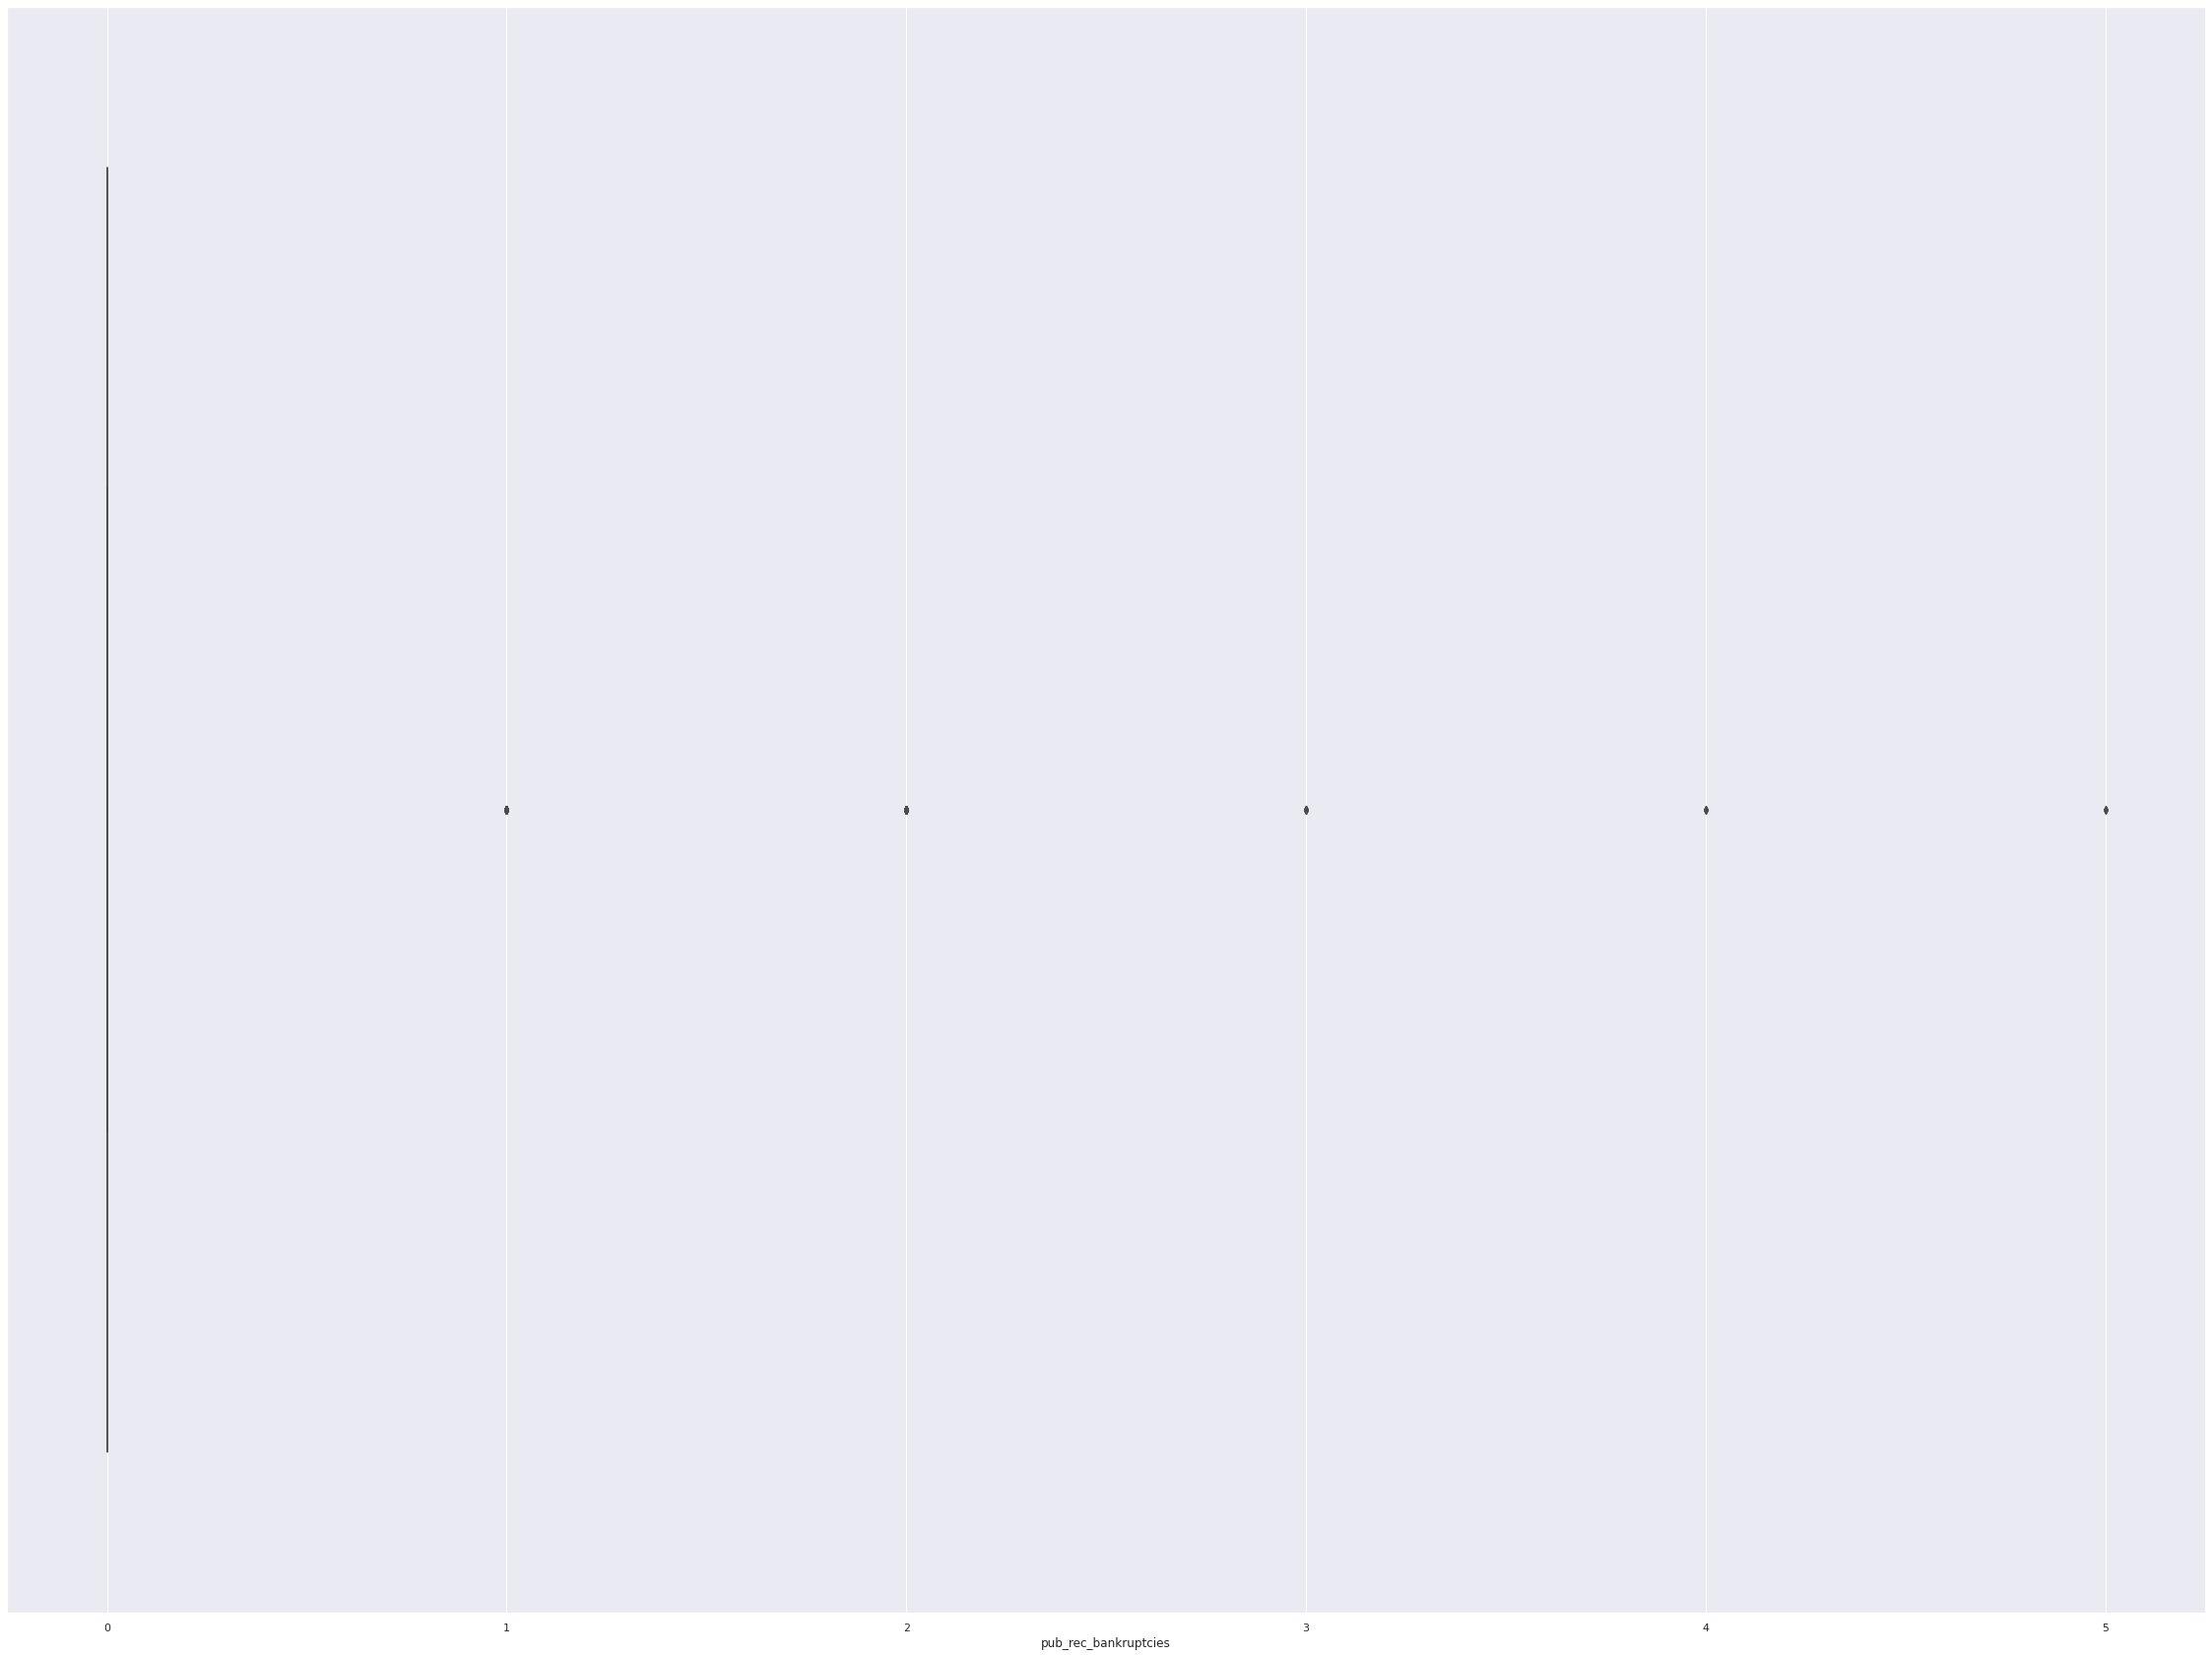

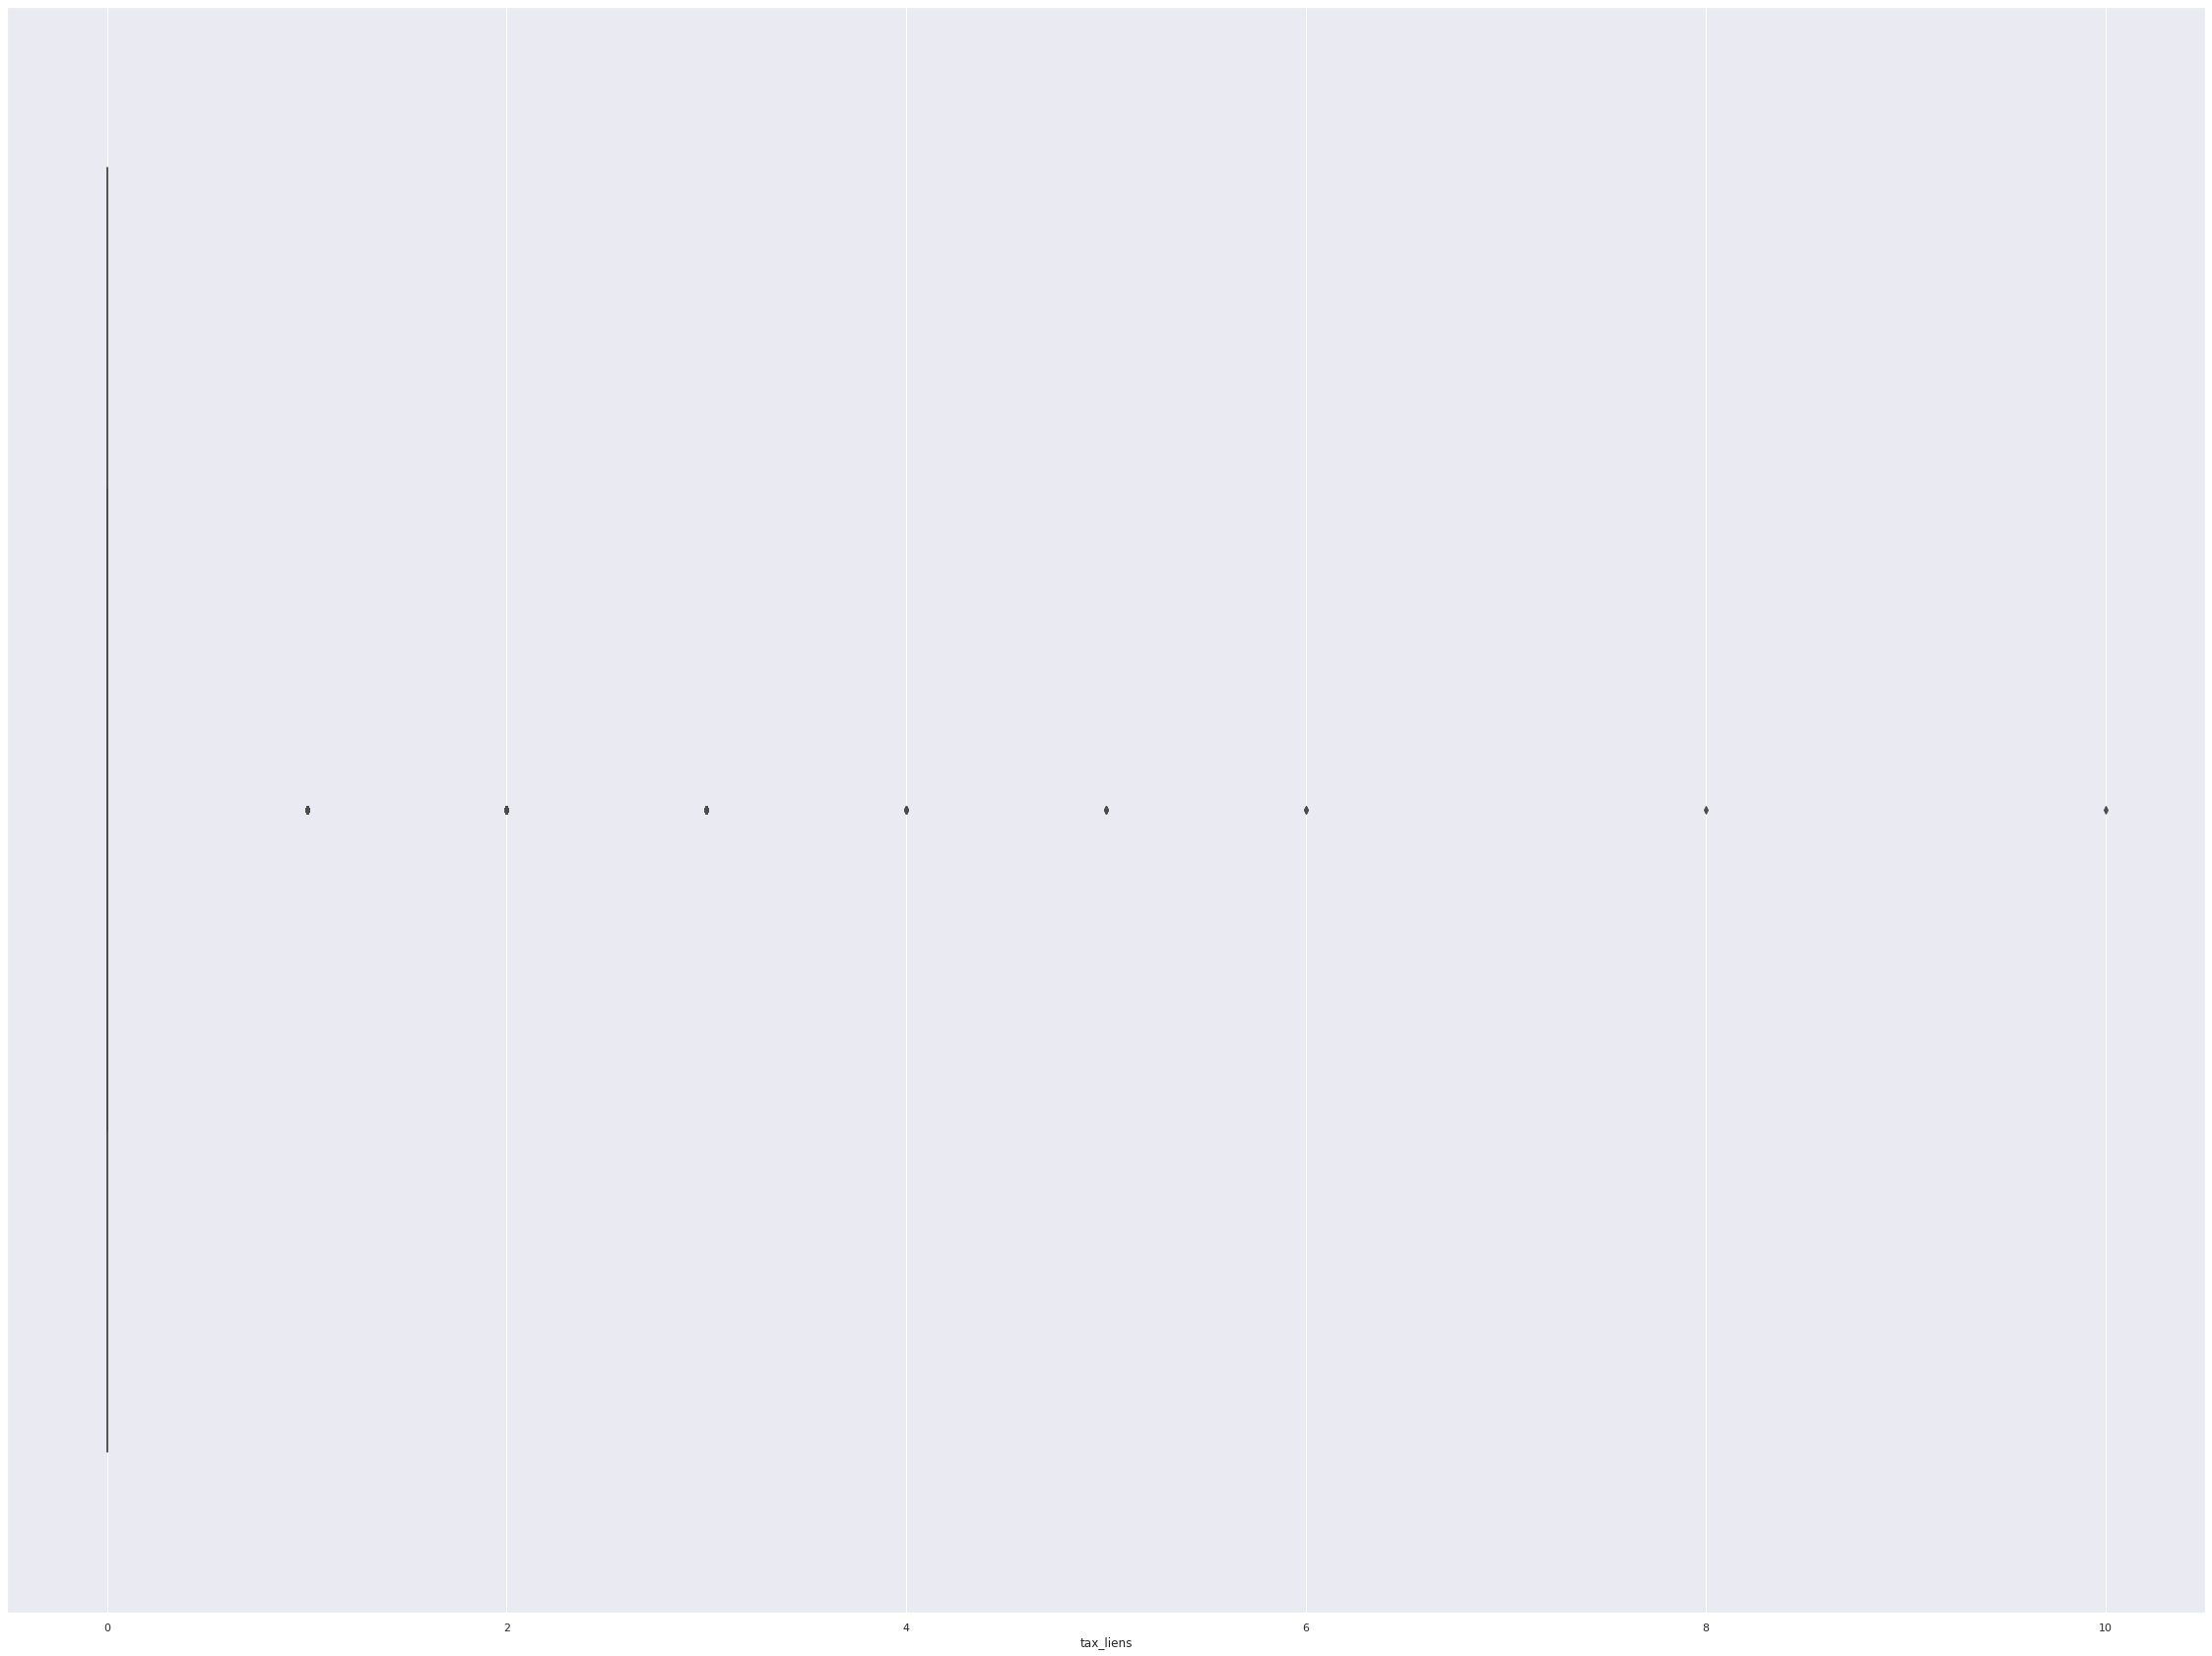

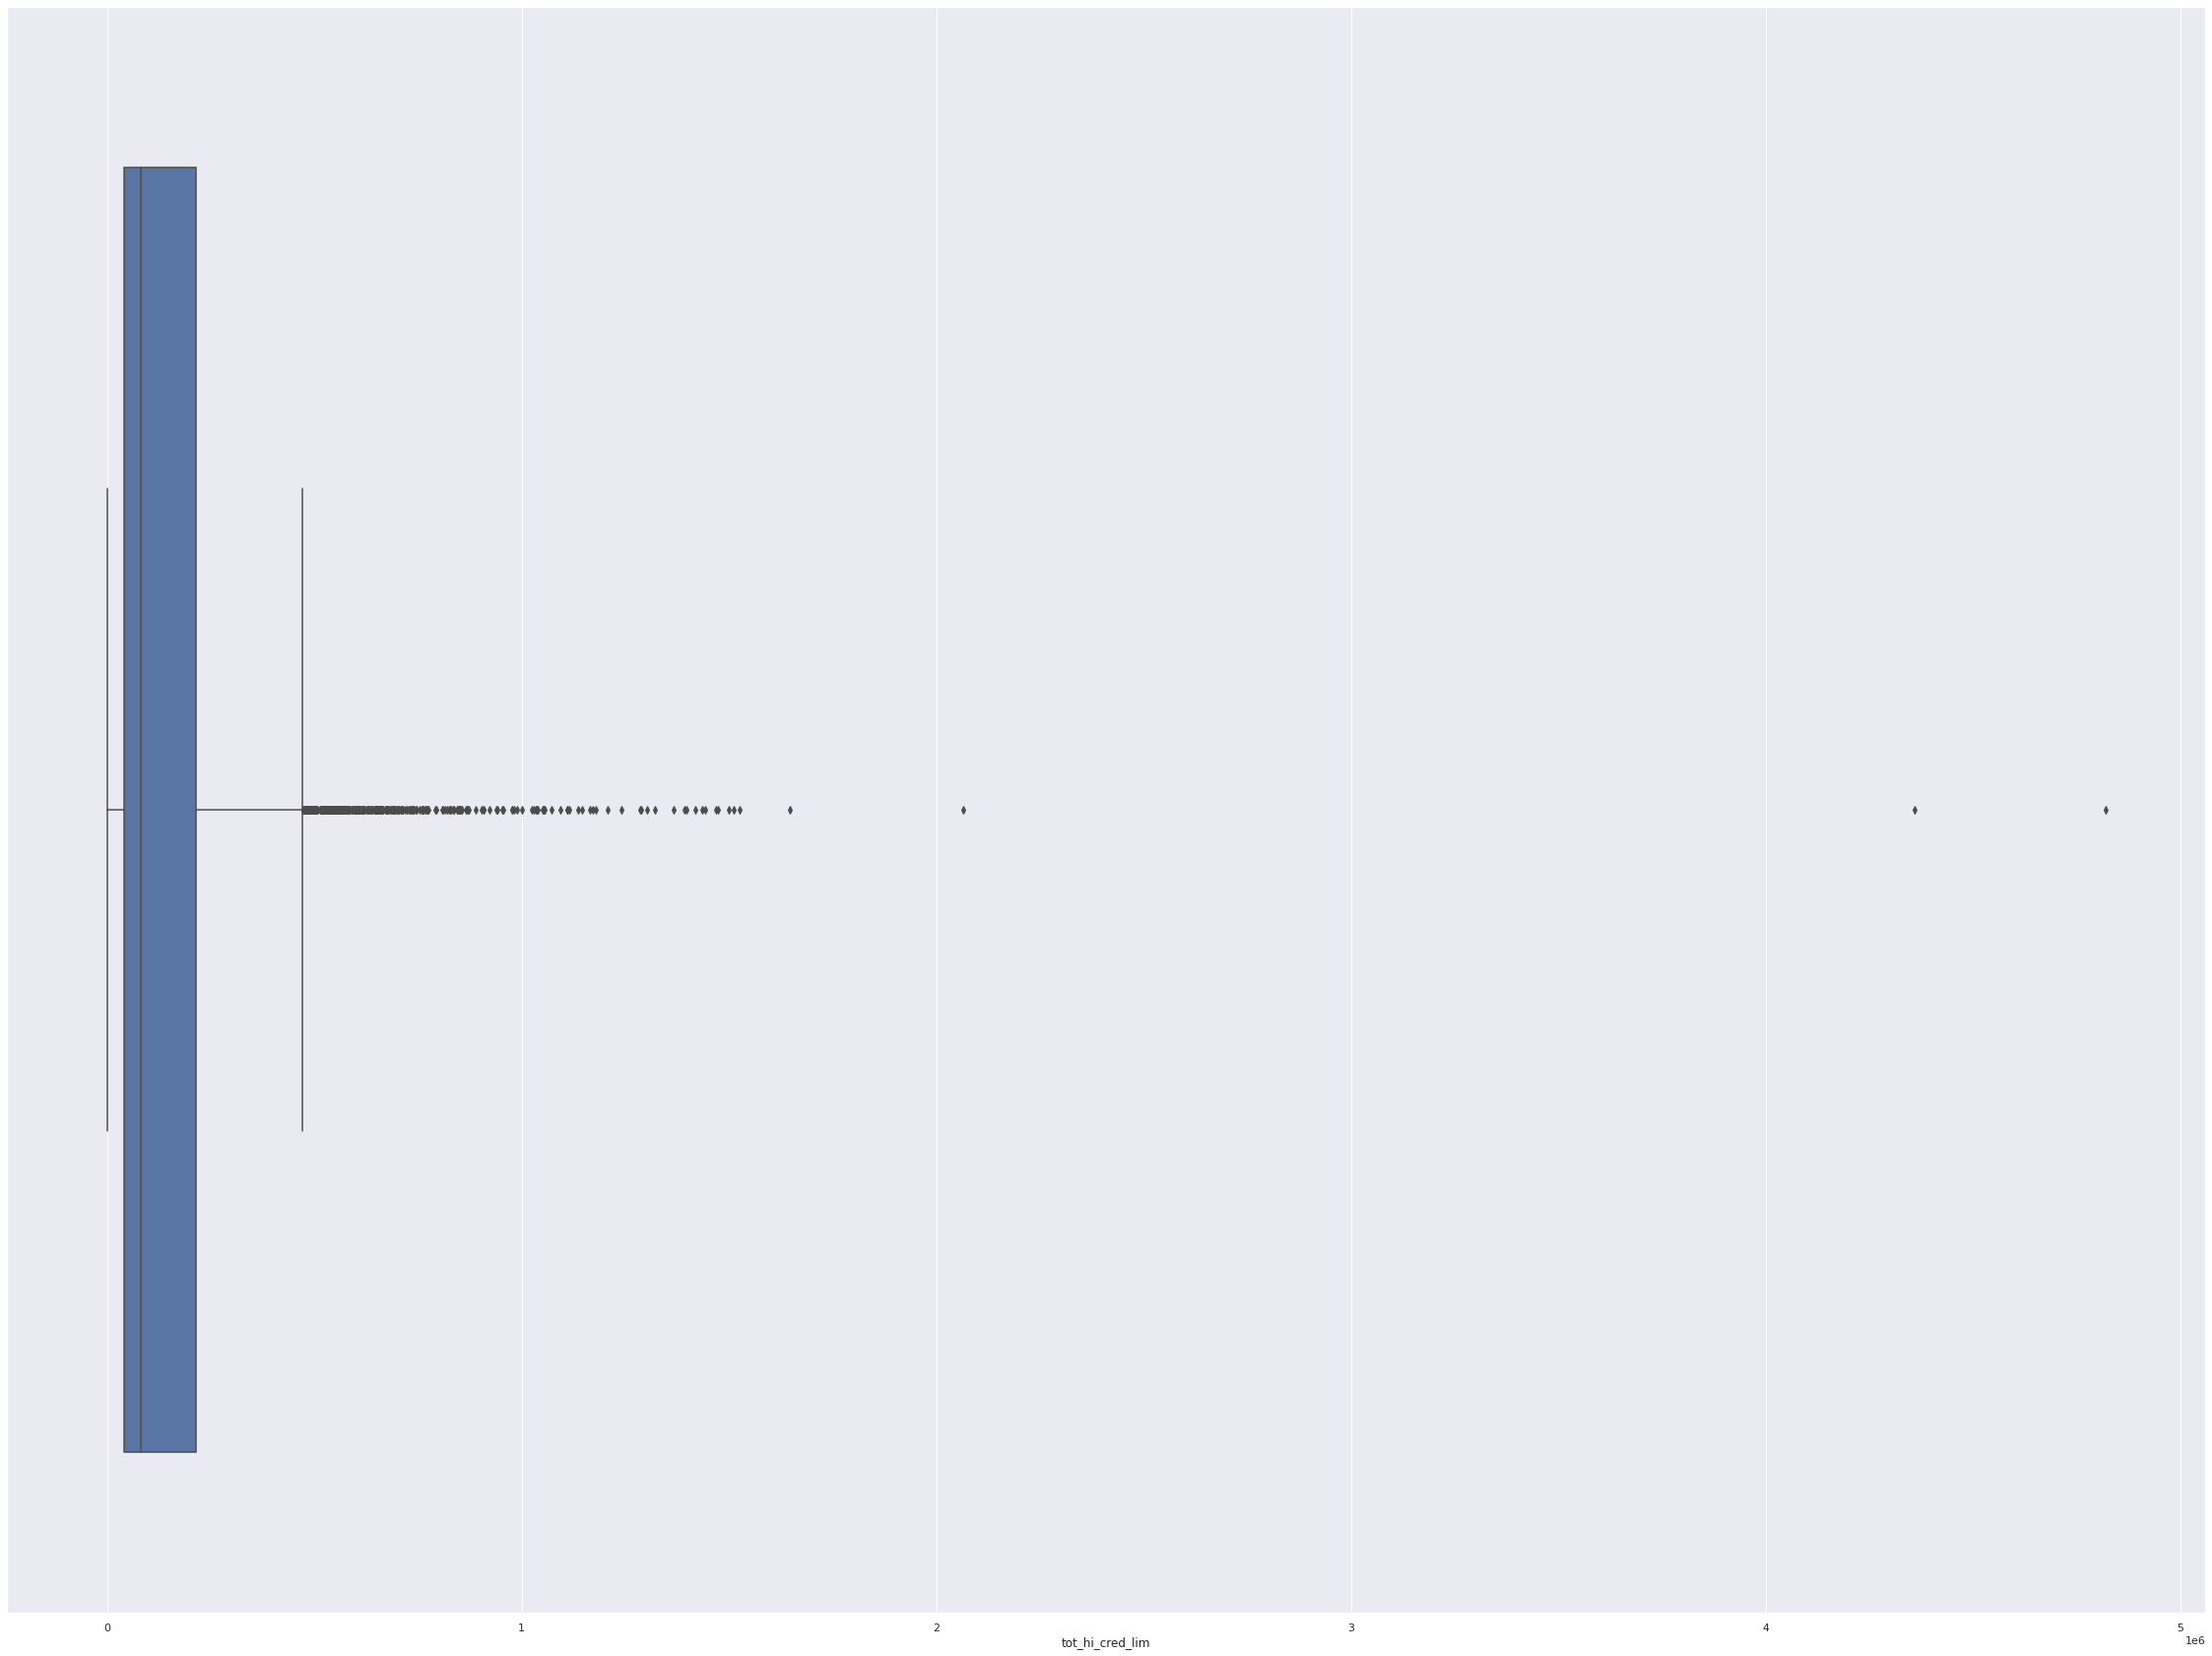

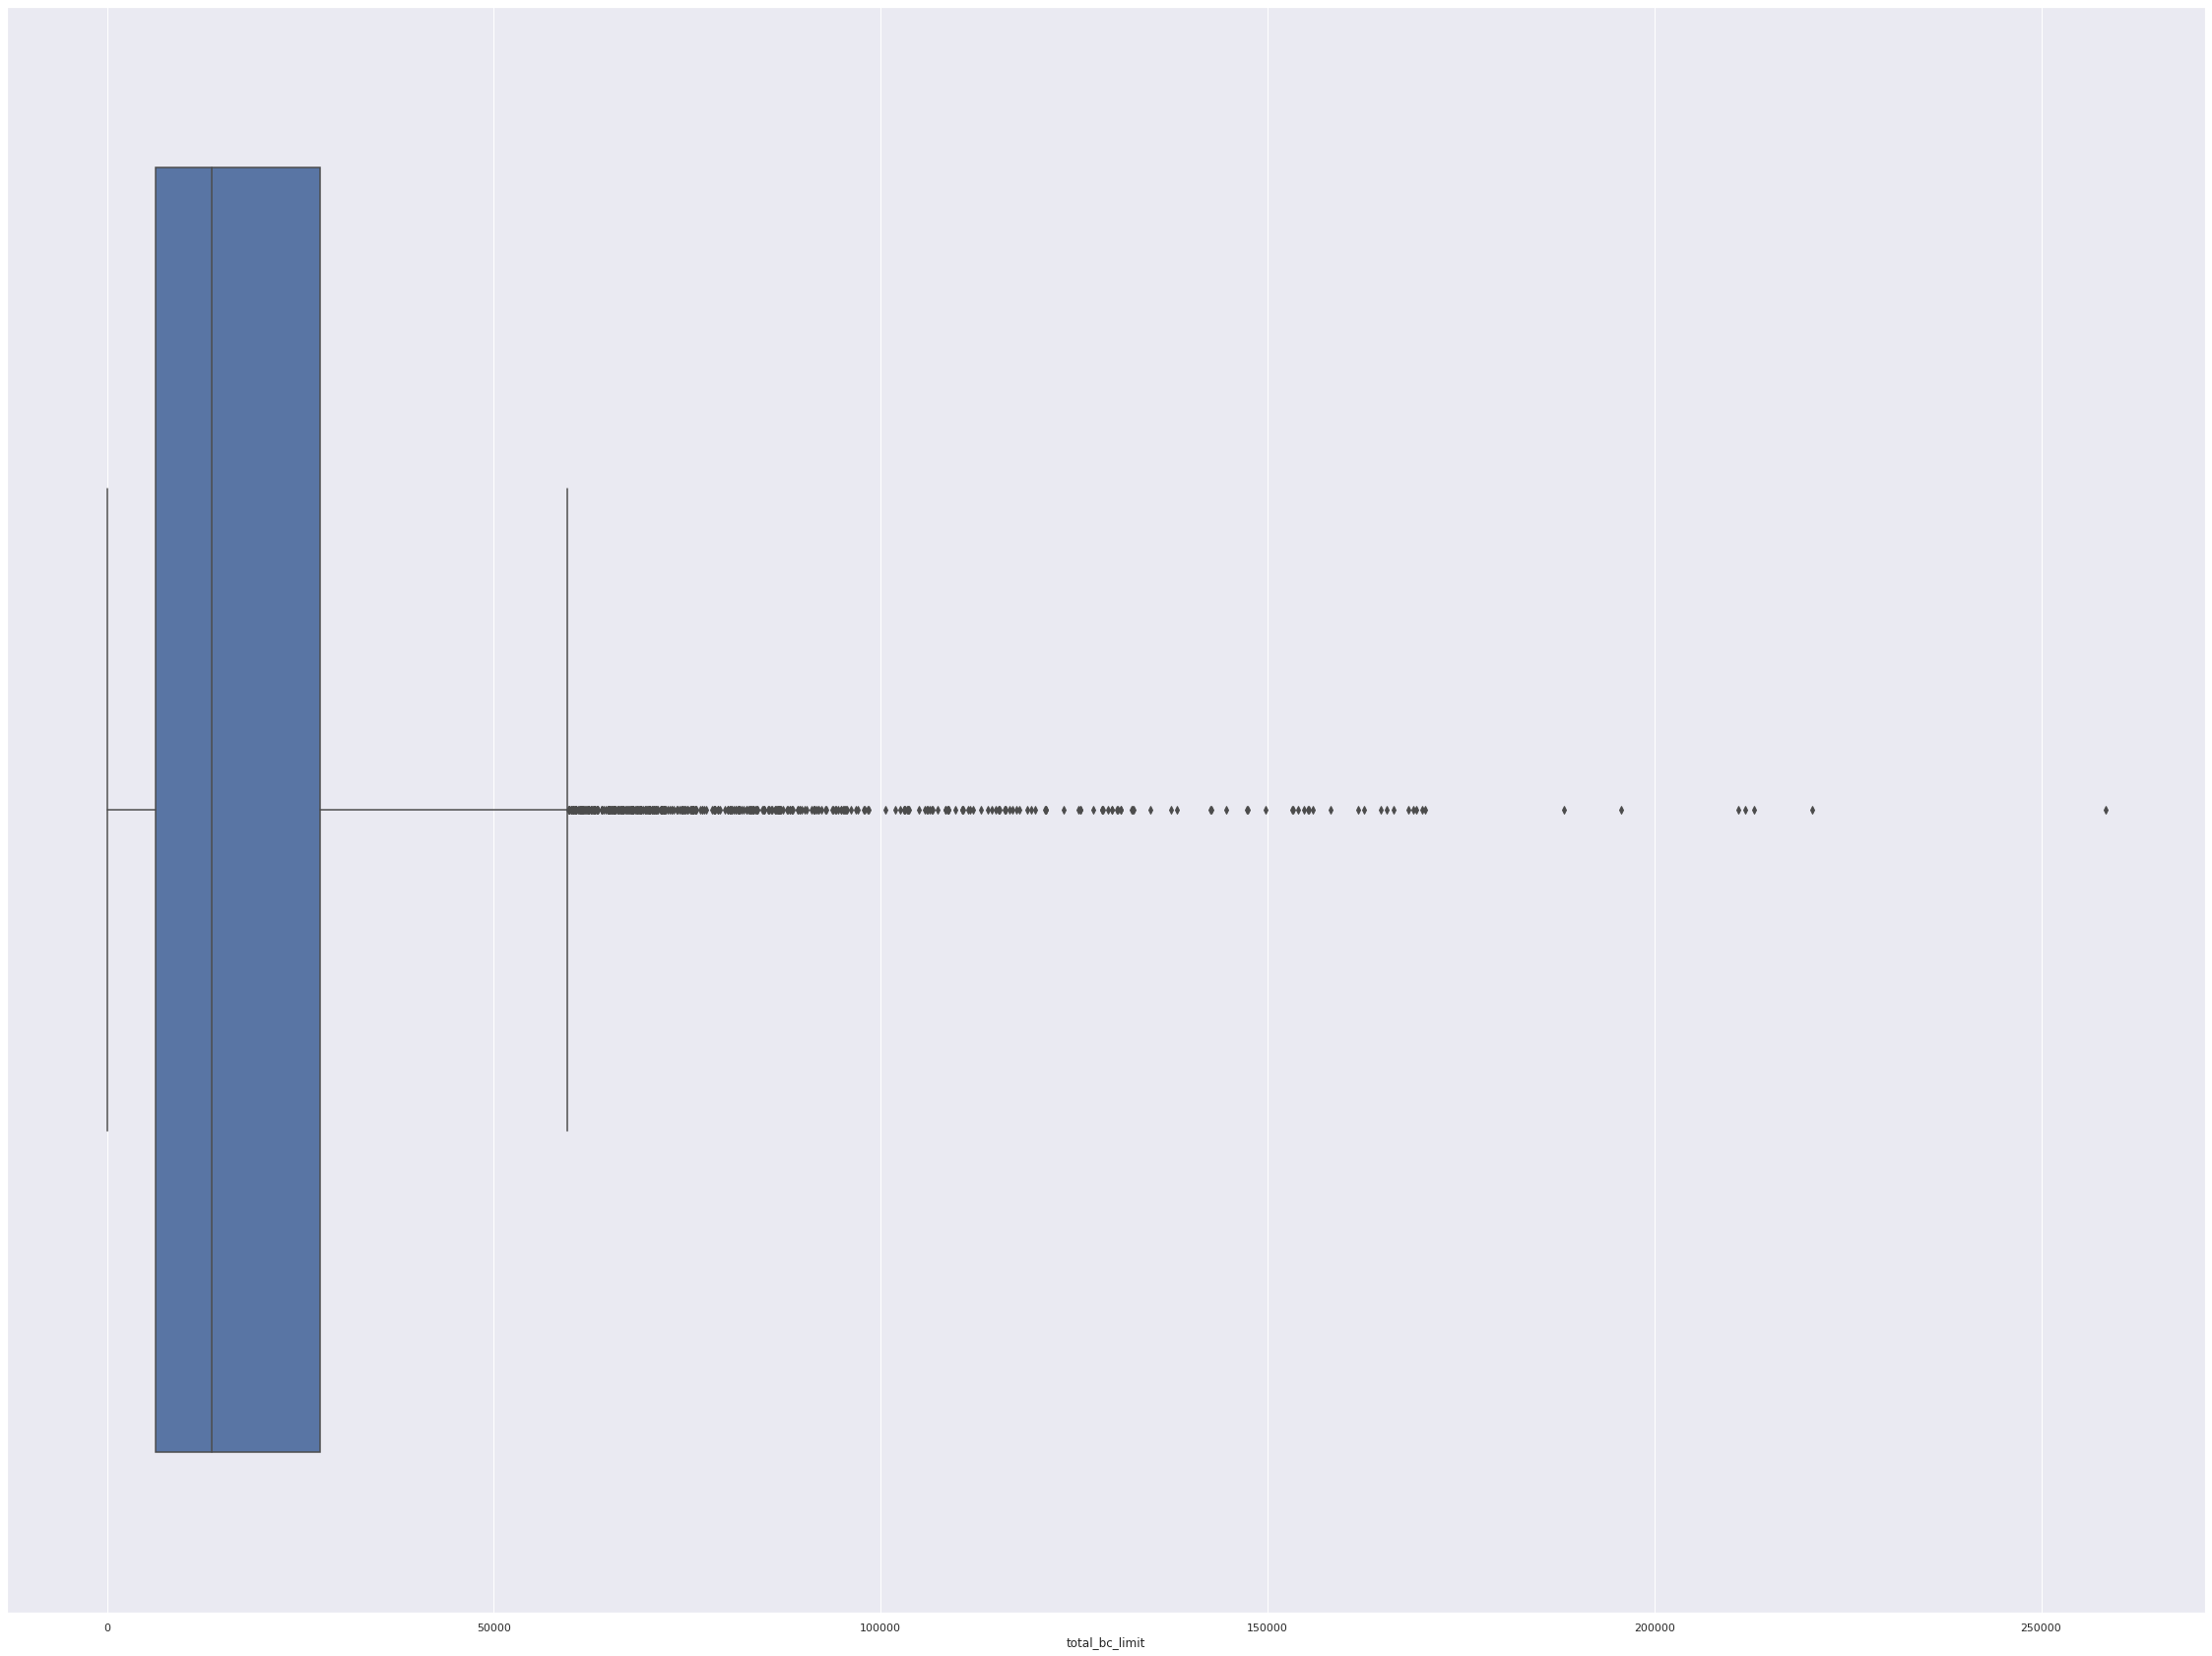

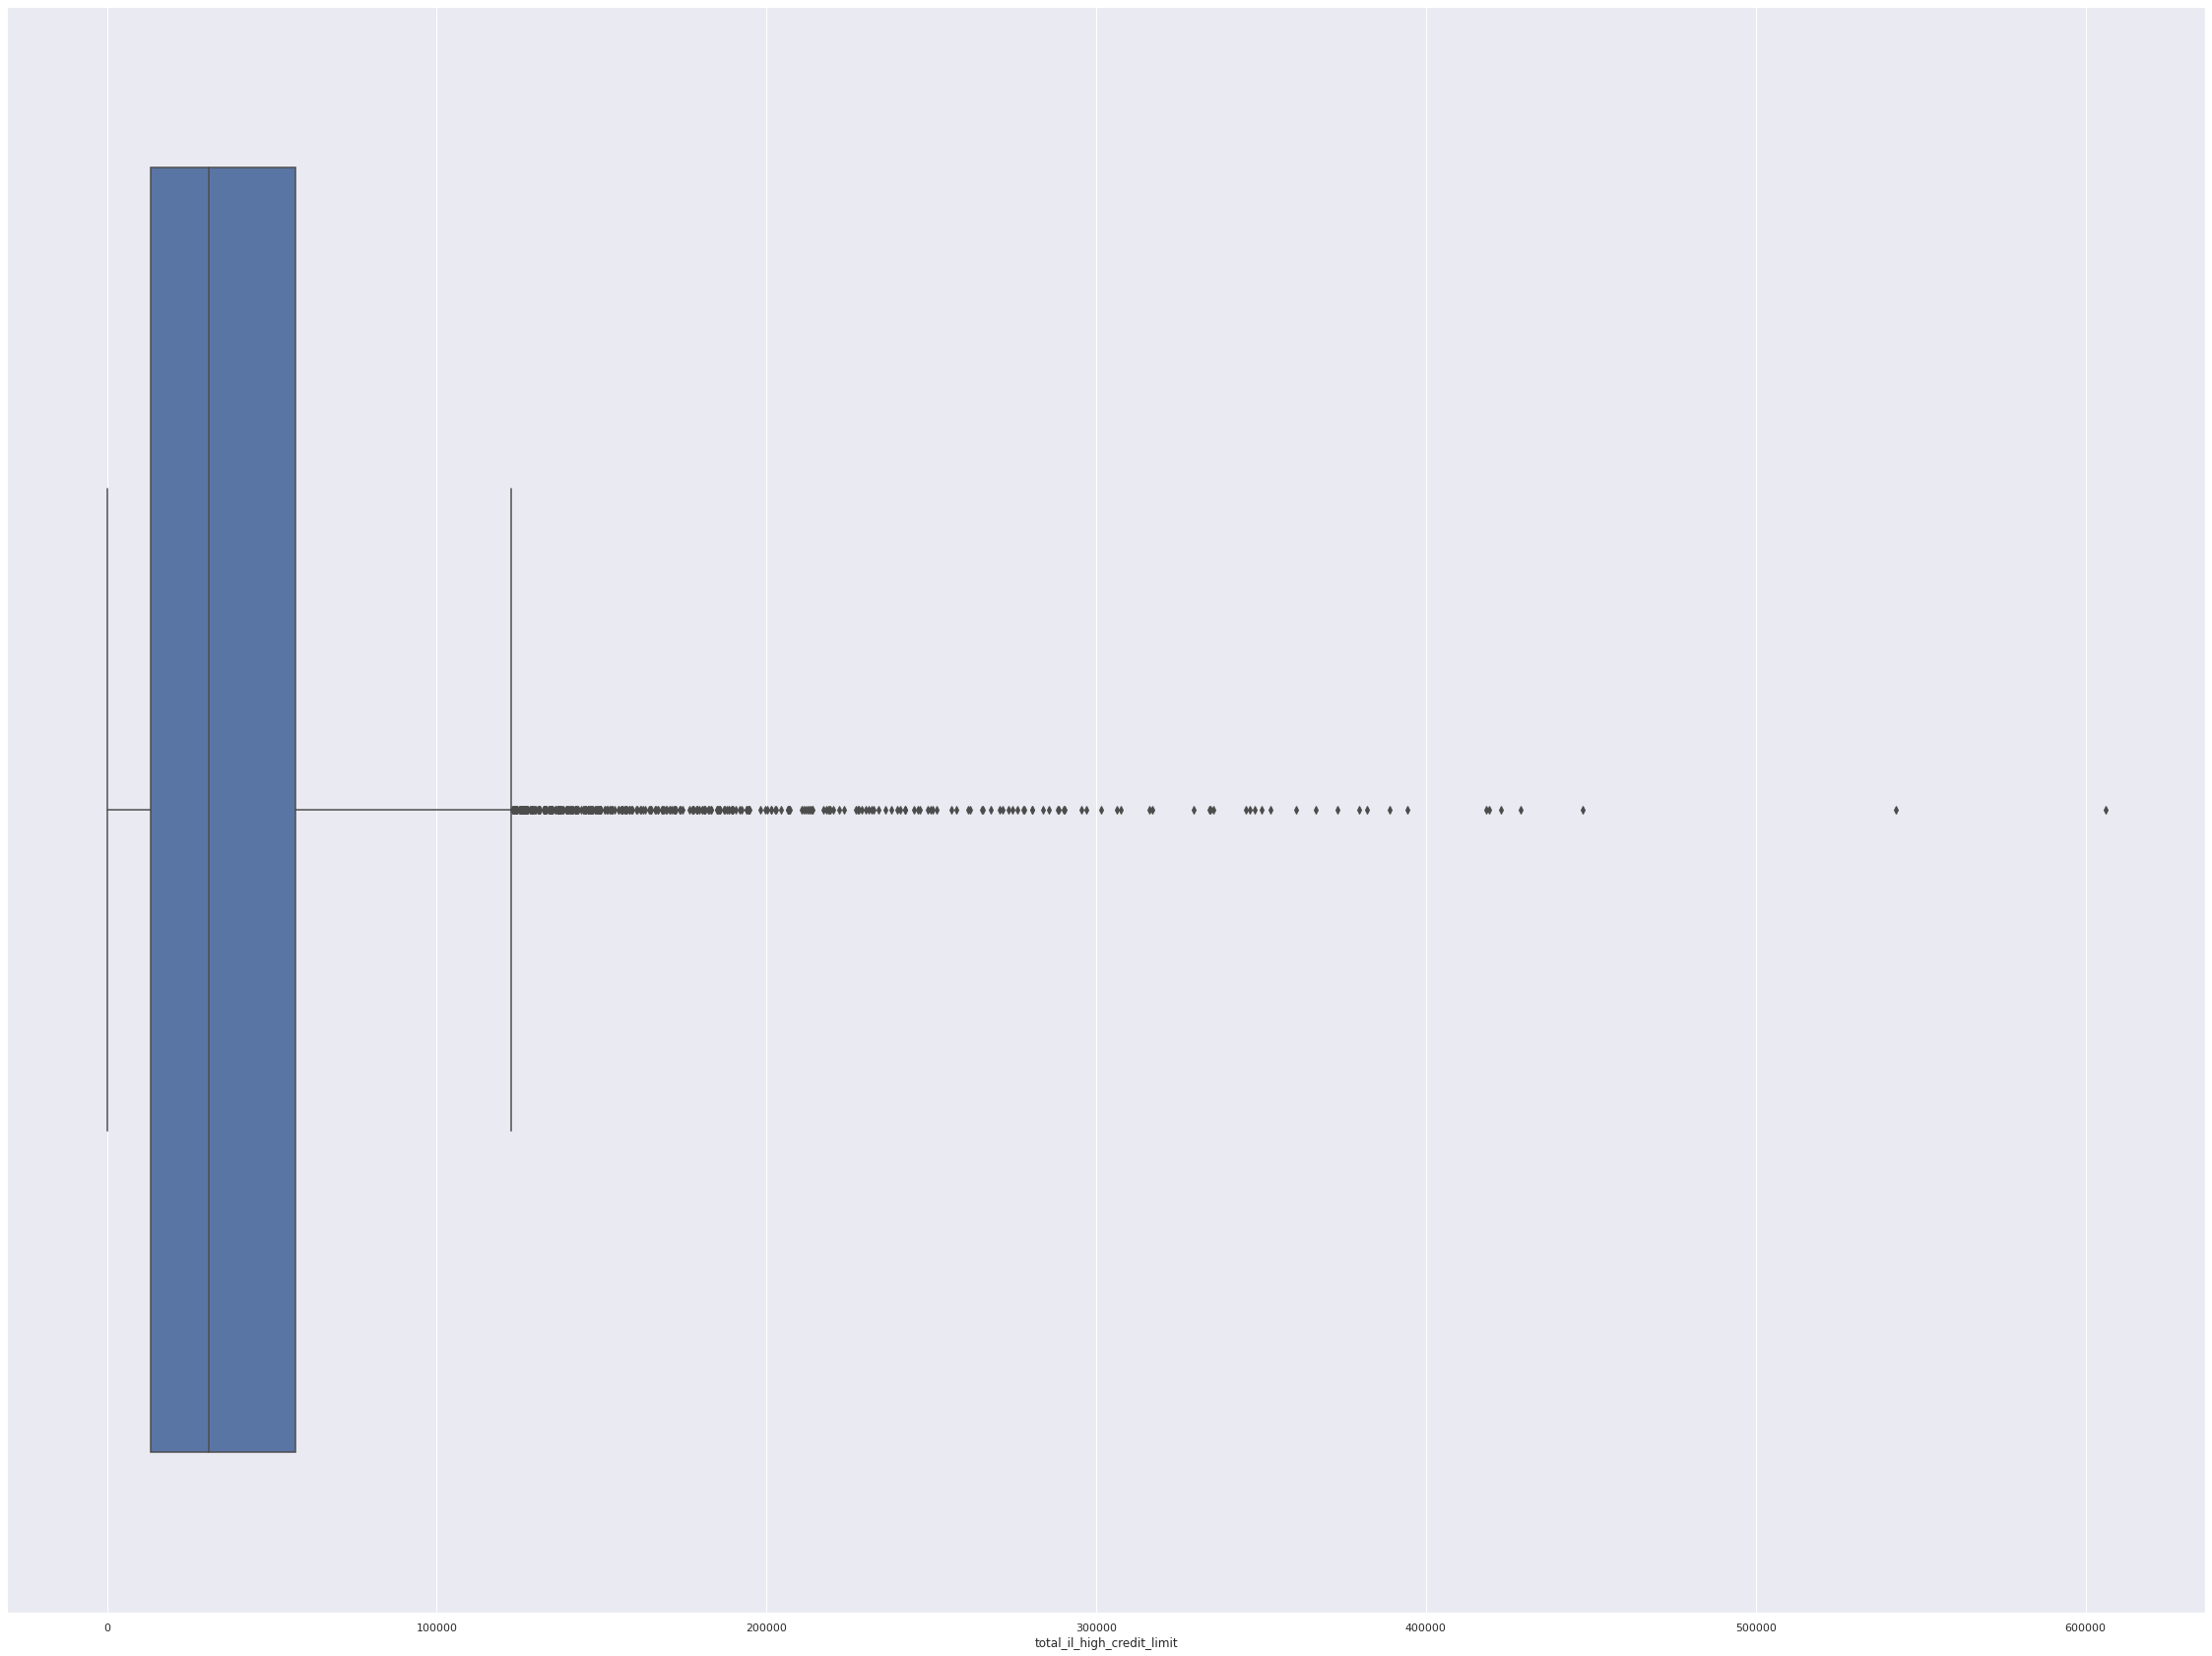

In [ ]:
for i in col:
    plt.figure()
    sns.boxplot(df[i])

In [ ]:
col_outliers = ['installment','annual_inc','dti','fico_range_low','fico_range_high','open_acc','revol_bal','revol_util','total_acc','last_fico_range_high','last_fico_range_low','tot_cur_bal','avg_cur_bal','num_bc_tl','num_il_tl','tot_hi_cred_lim','total_bc_limit','total_il_high_credit_limit','mort_acc']

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
for i in col_outliers:
  df[i] = remove_outlier_IQR(df[i])

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
percent_missing

id                             0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    2.054039
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.823821
emp_length                     5.927764
home_ownership                 0.000000
annual_inc                     5.348773
verification_status            0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.771988
zip_code                       0.000000
addr_state                     0.000000
dti                            0.523849
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
fico_range_low                 1.282051


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

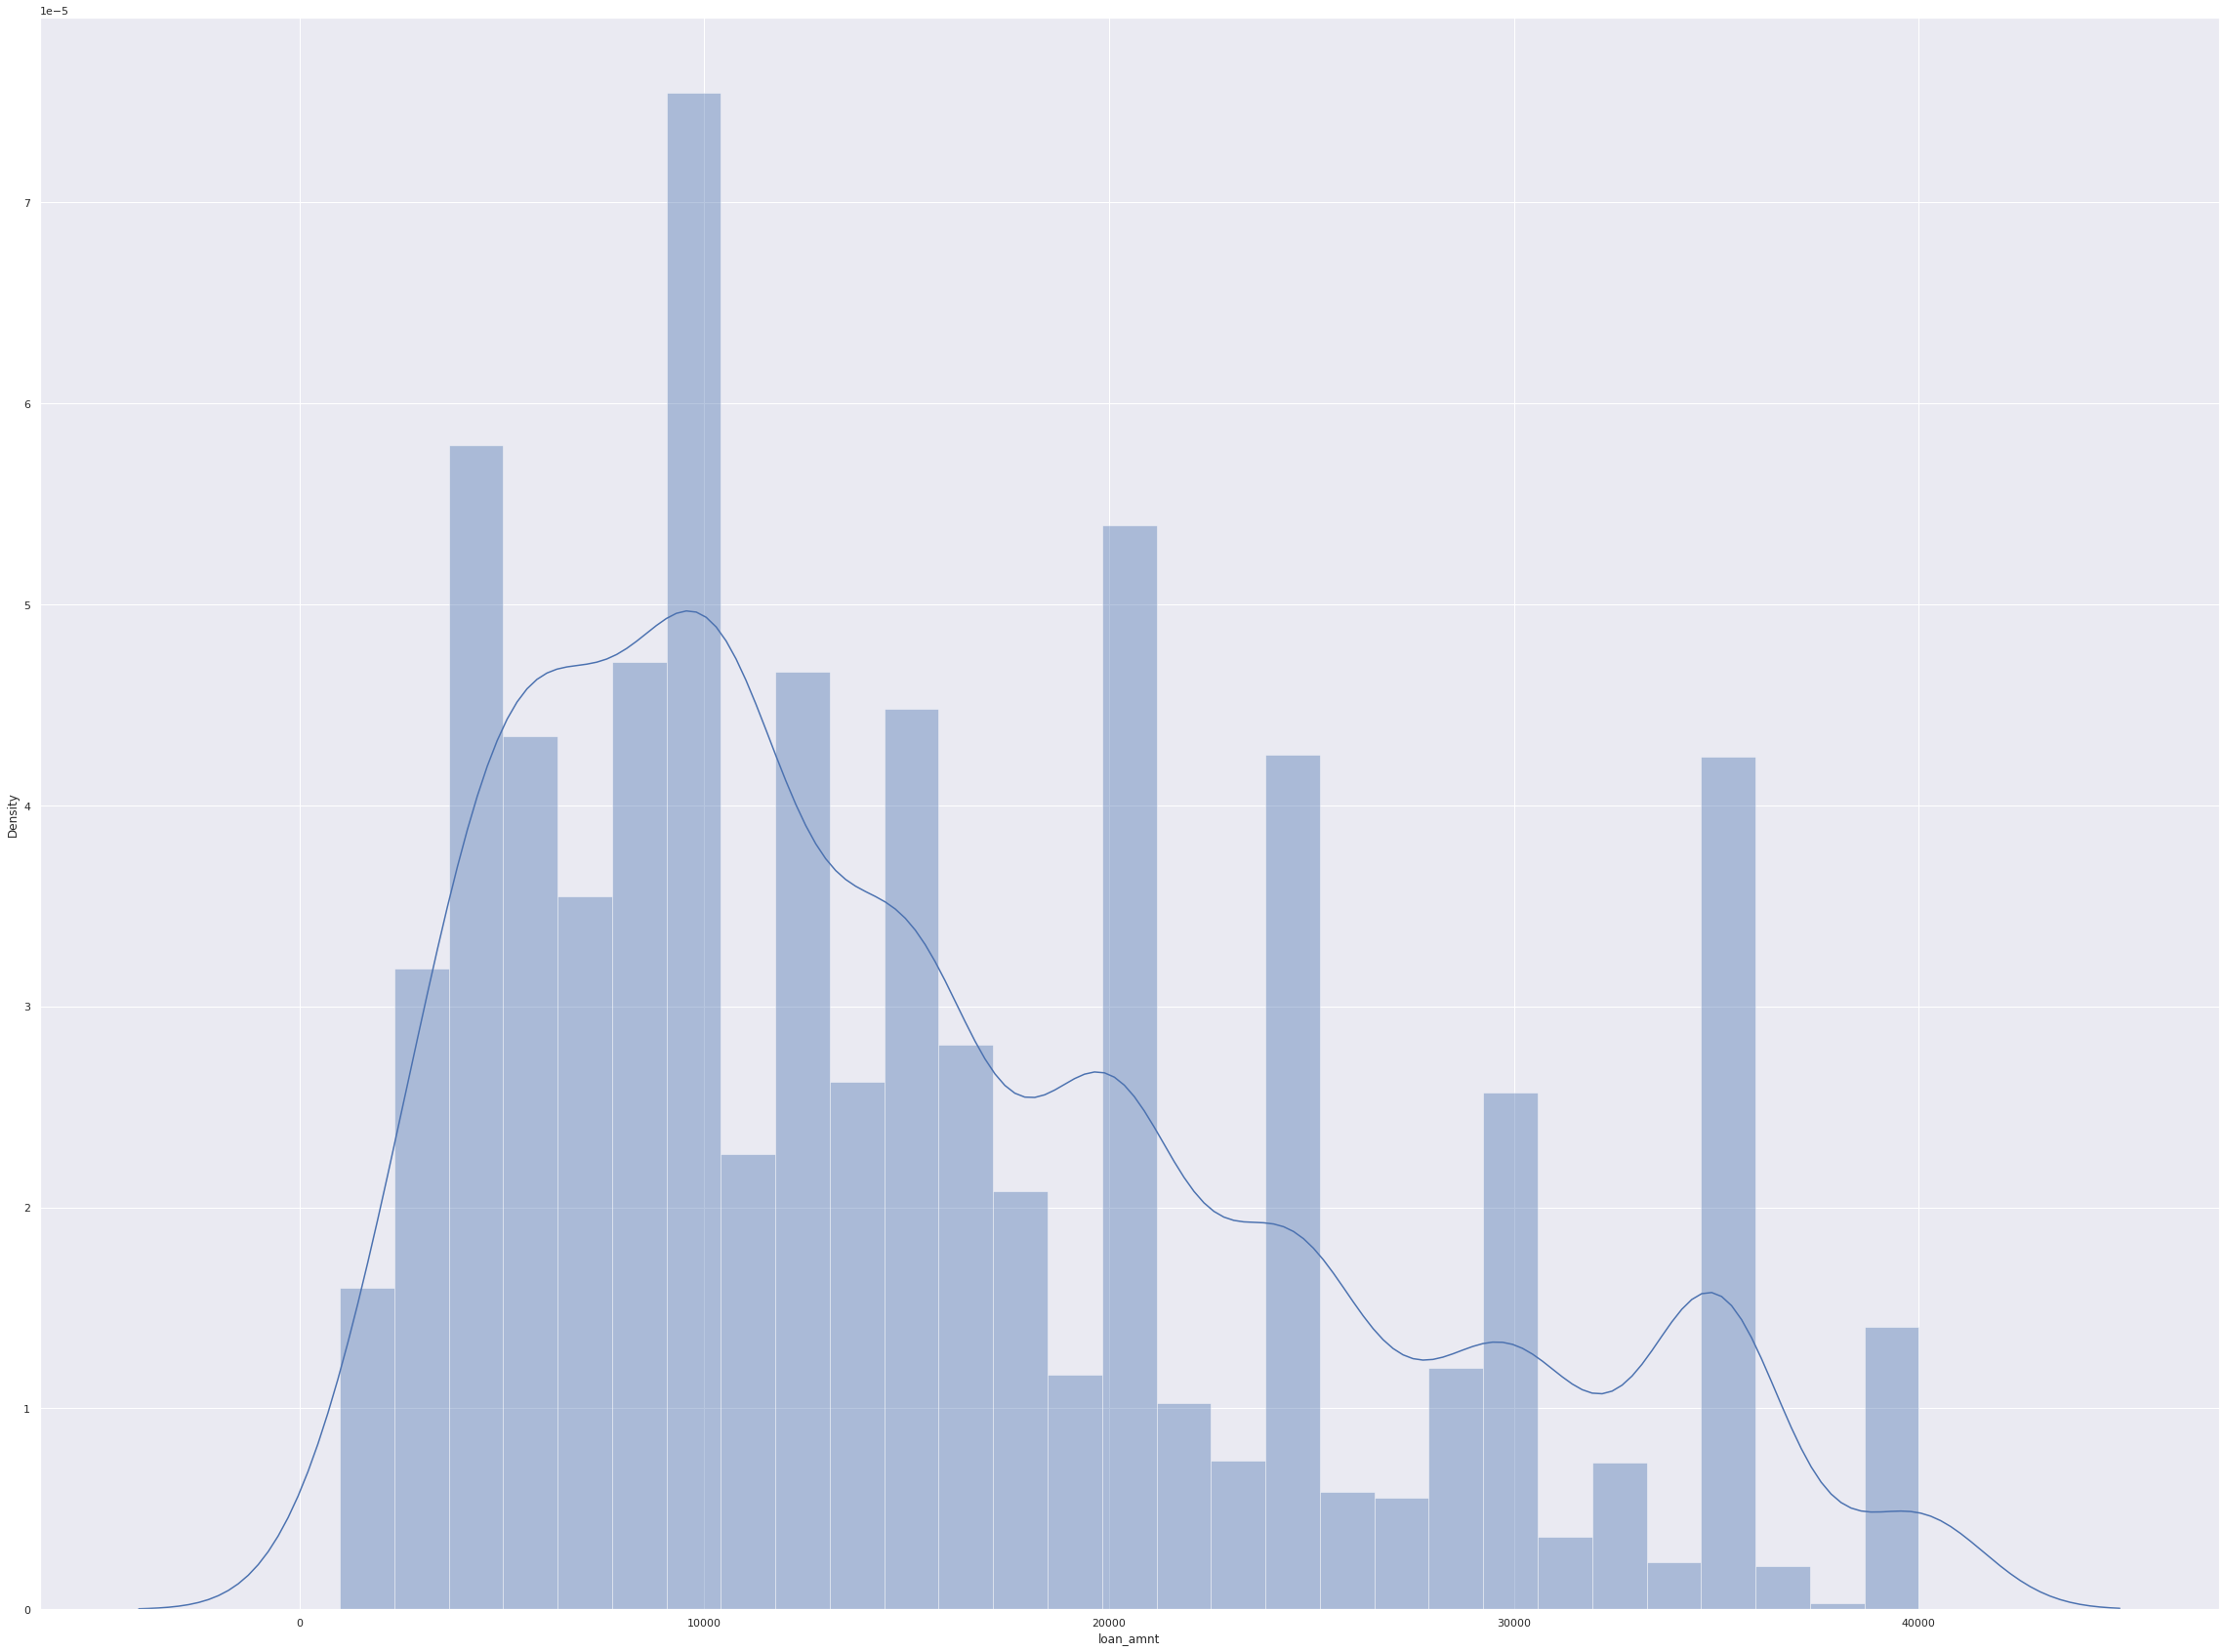

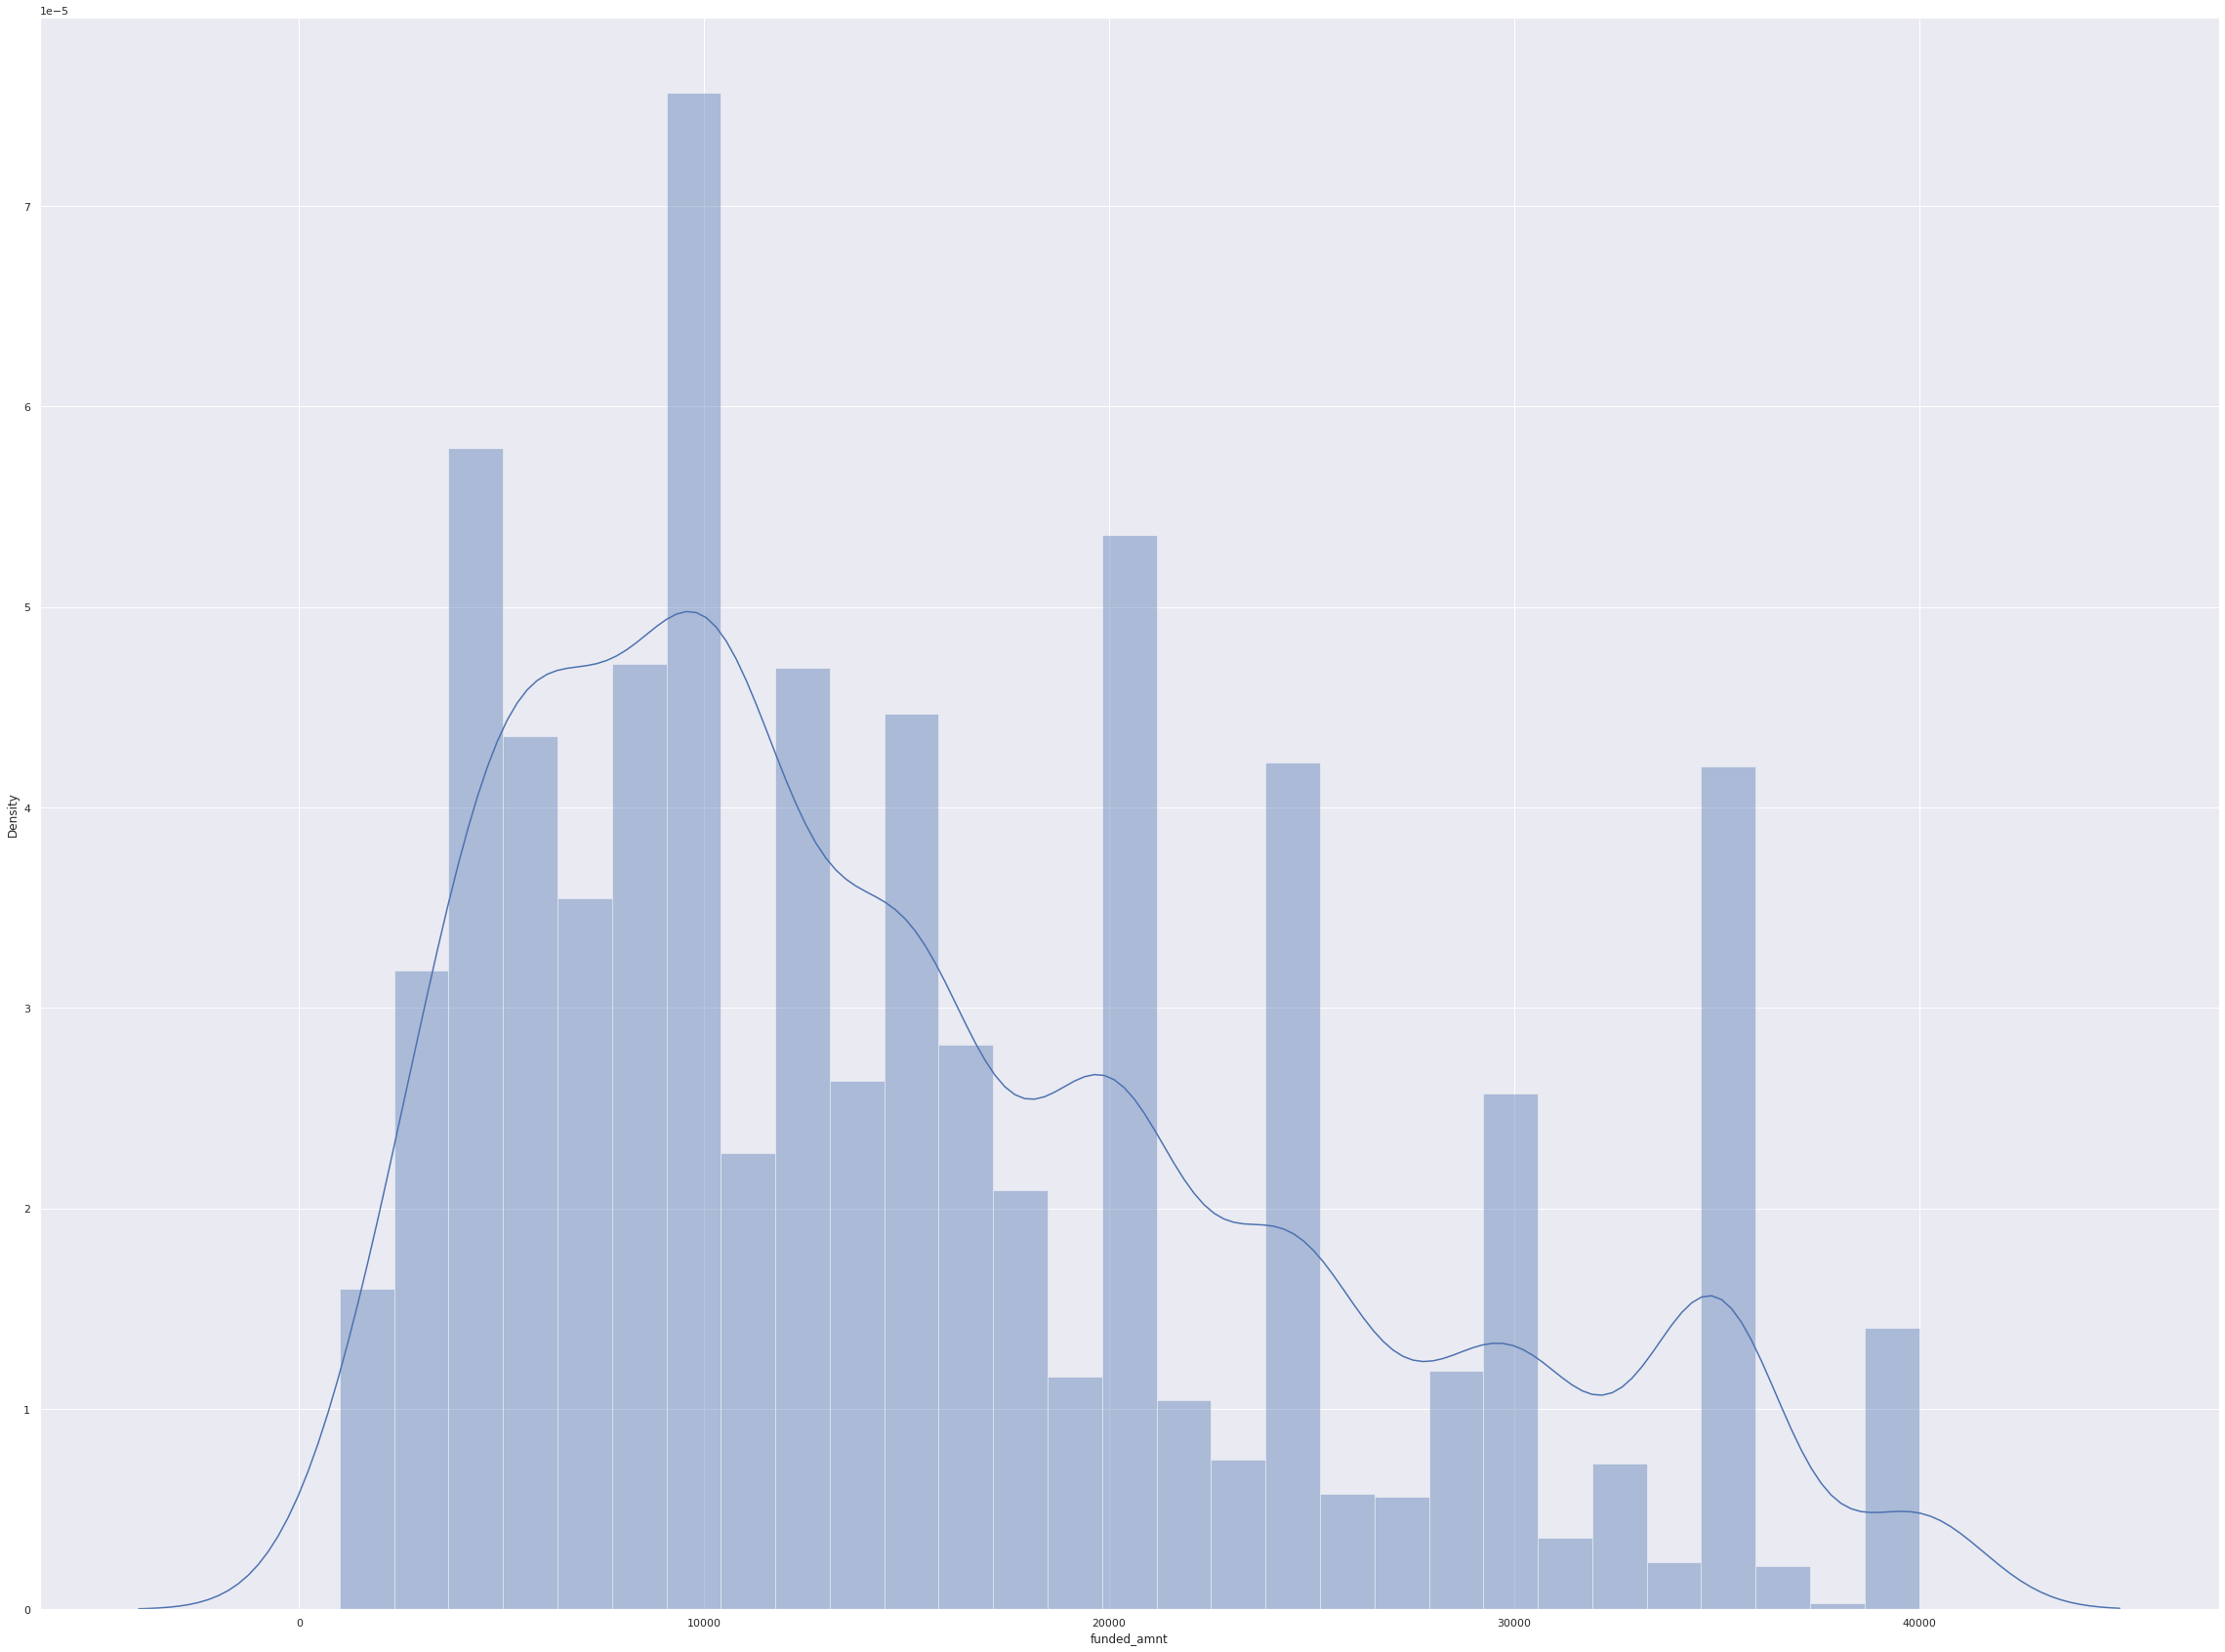

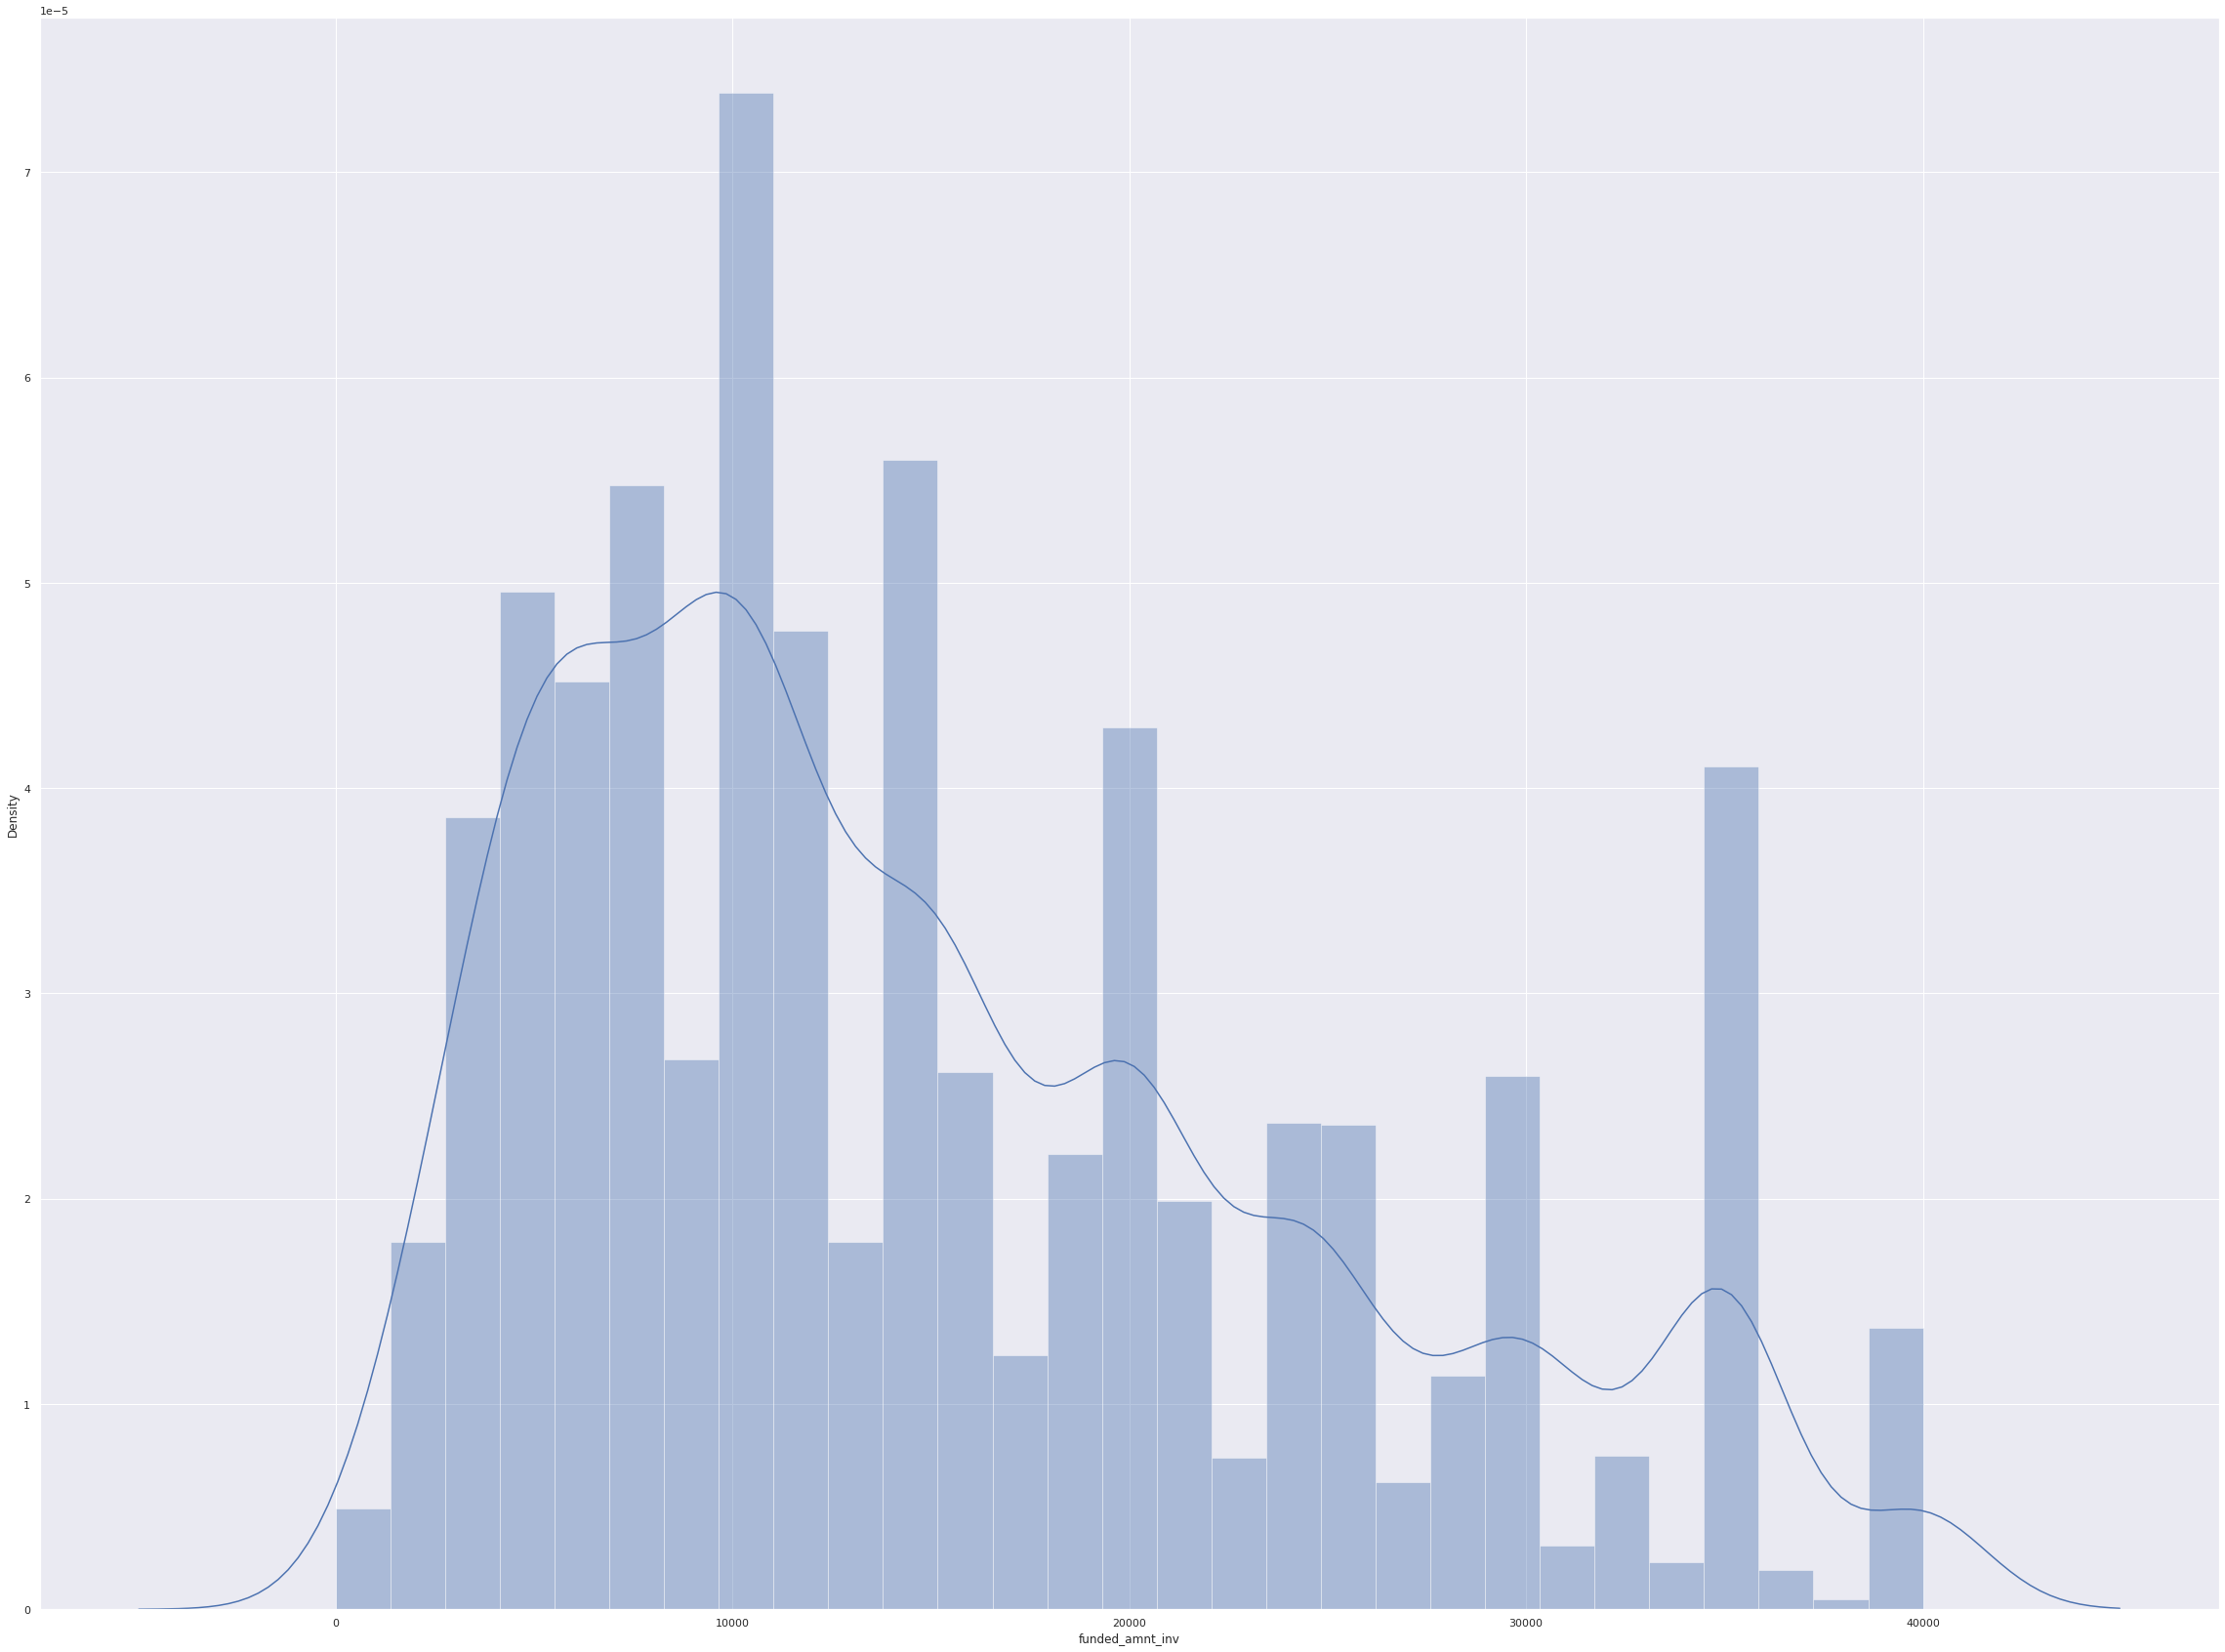

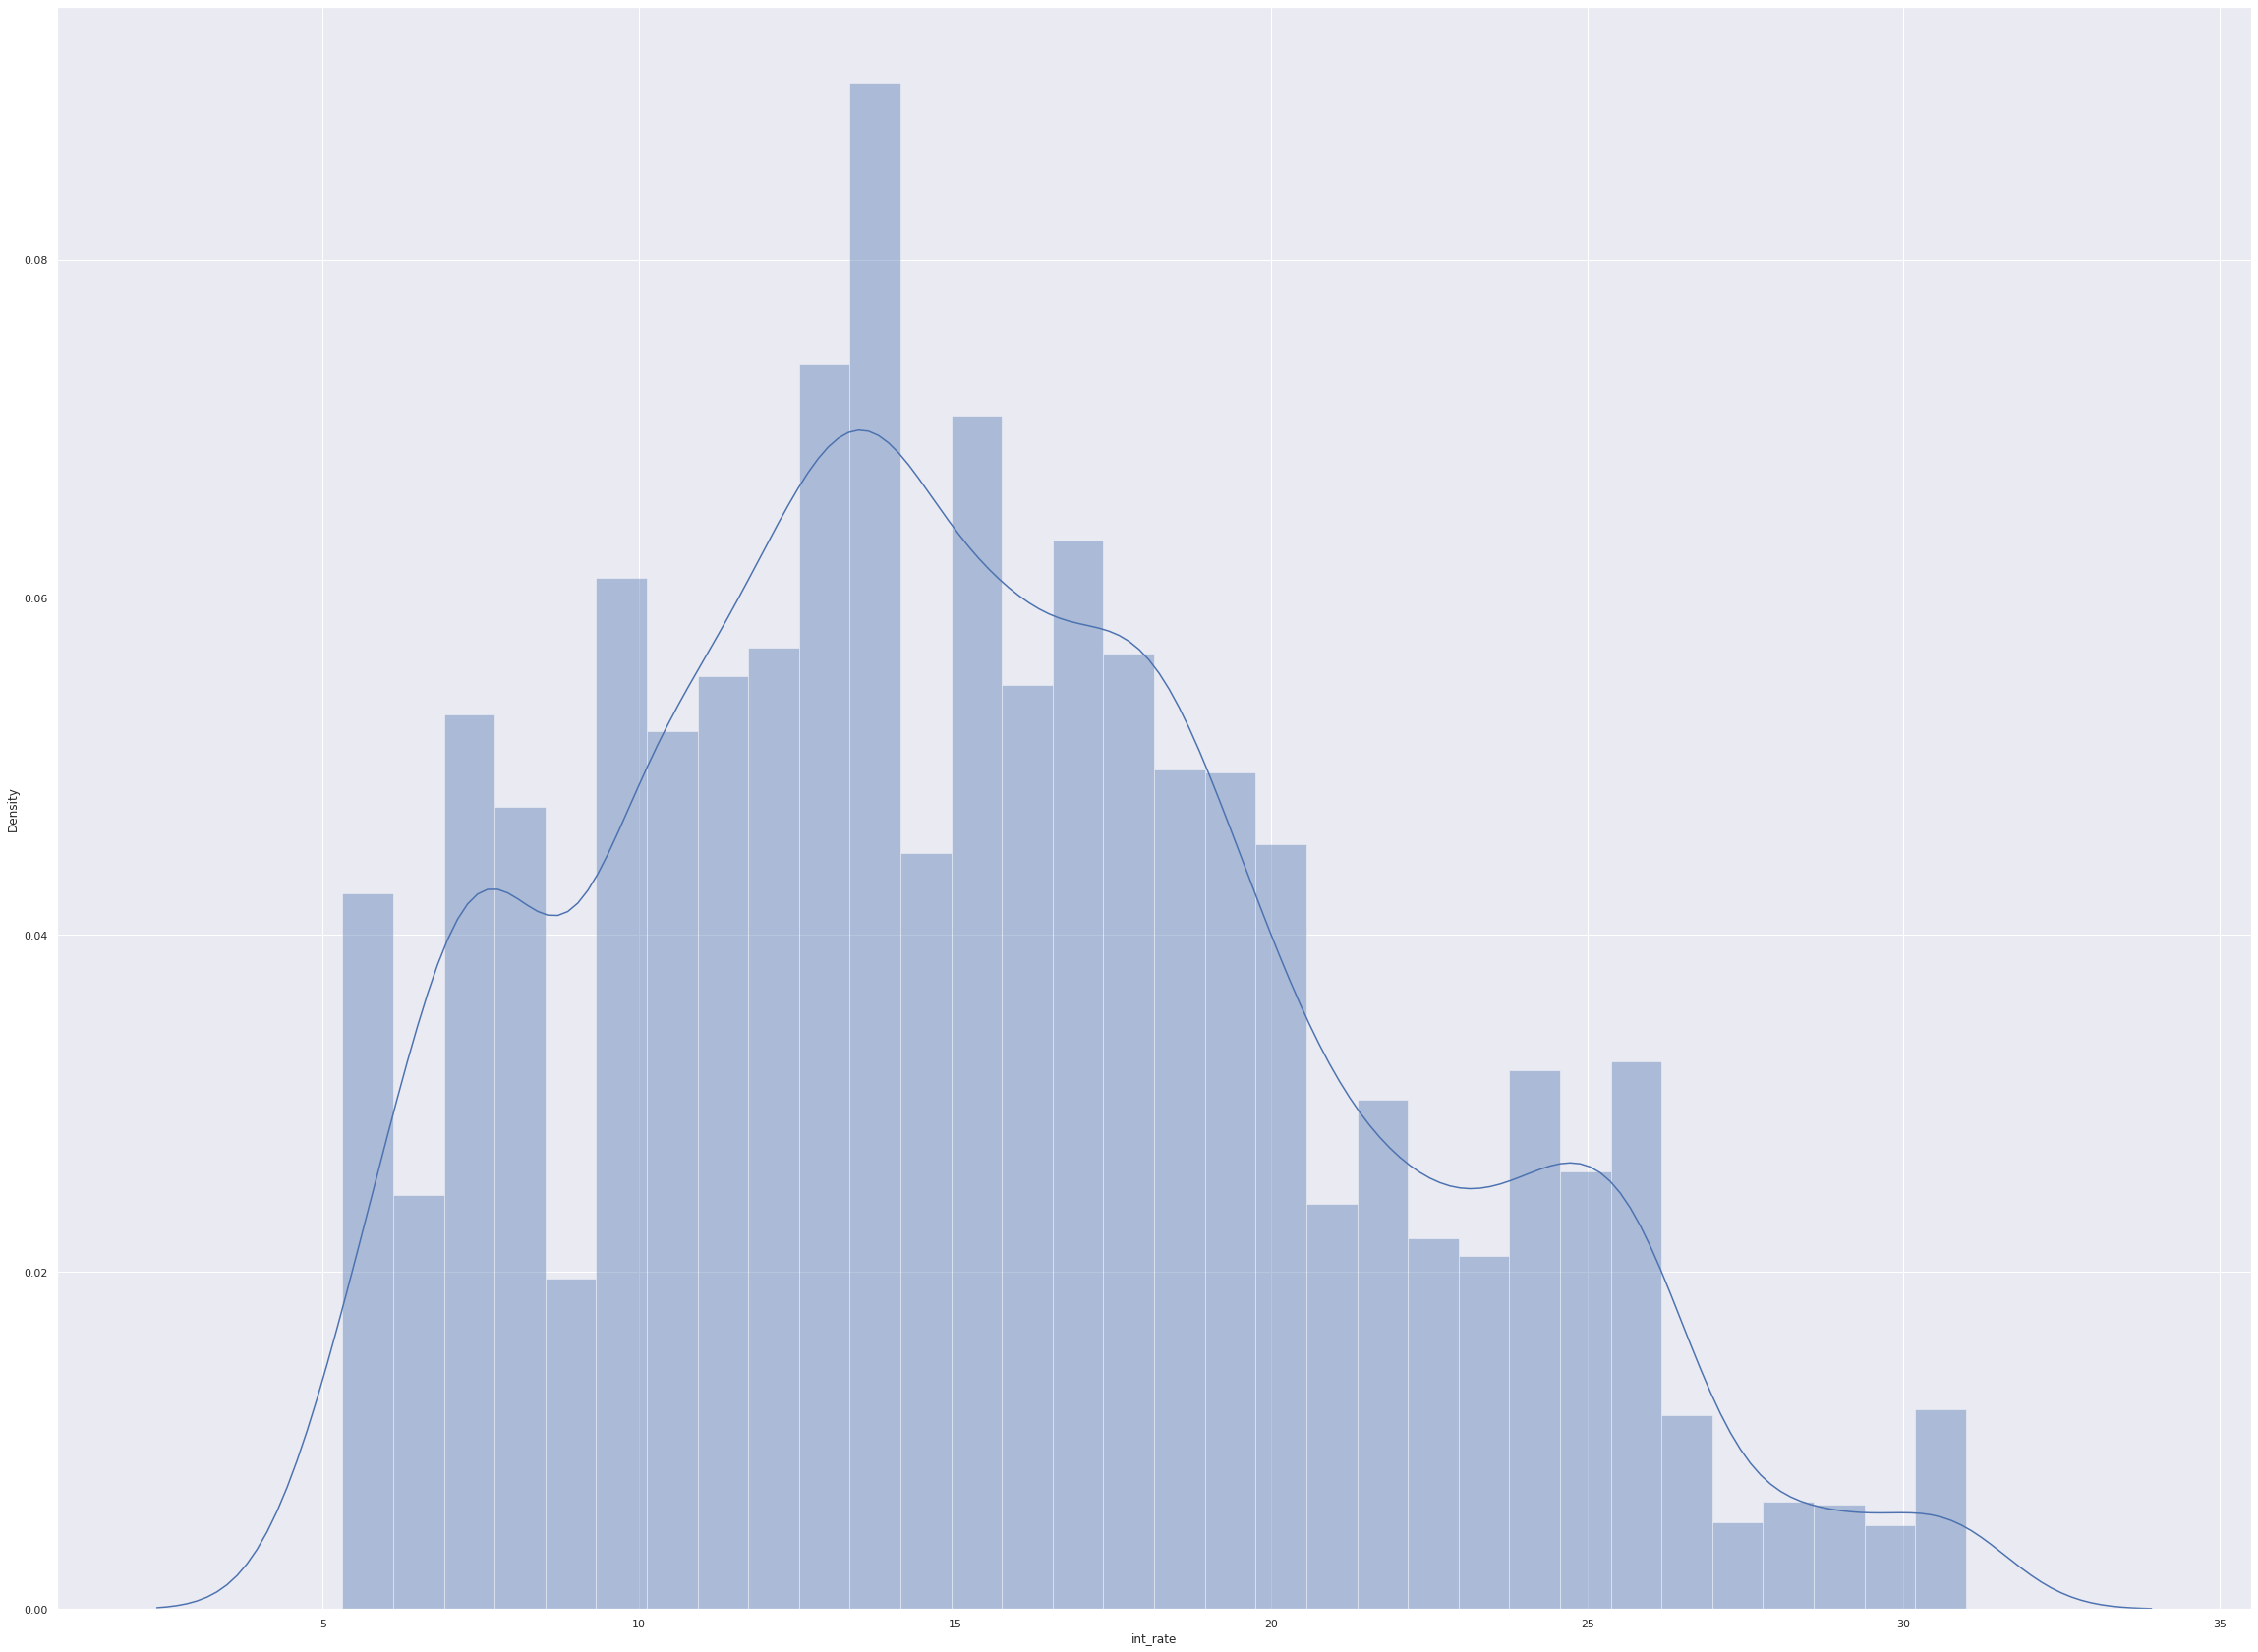

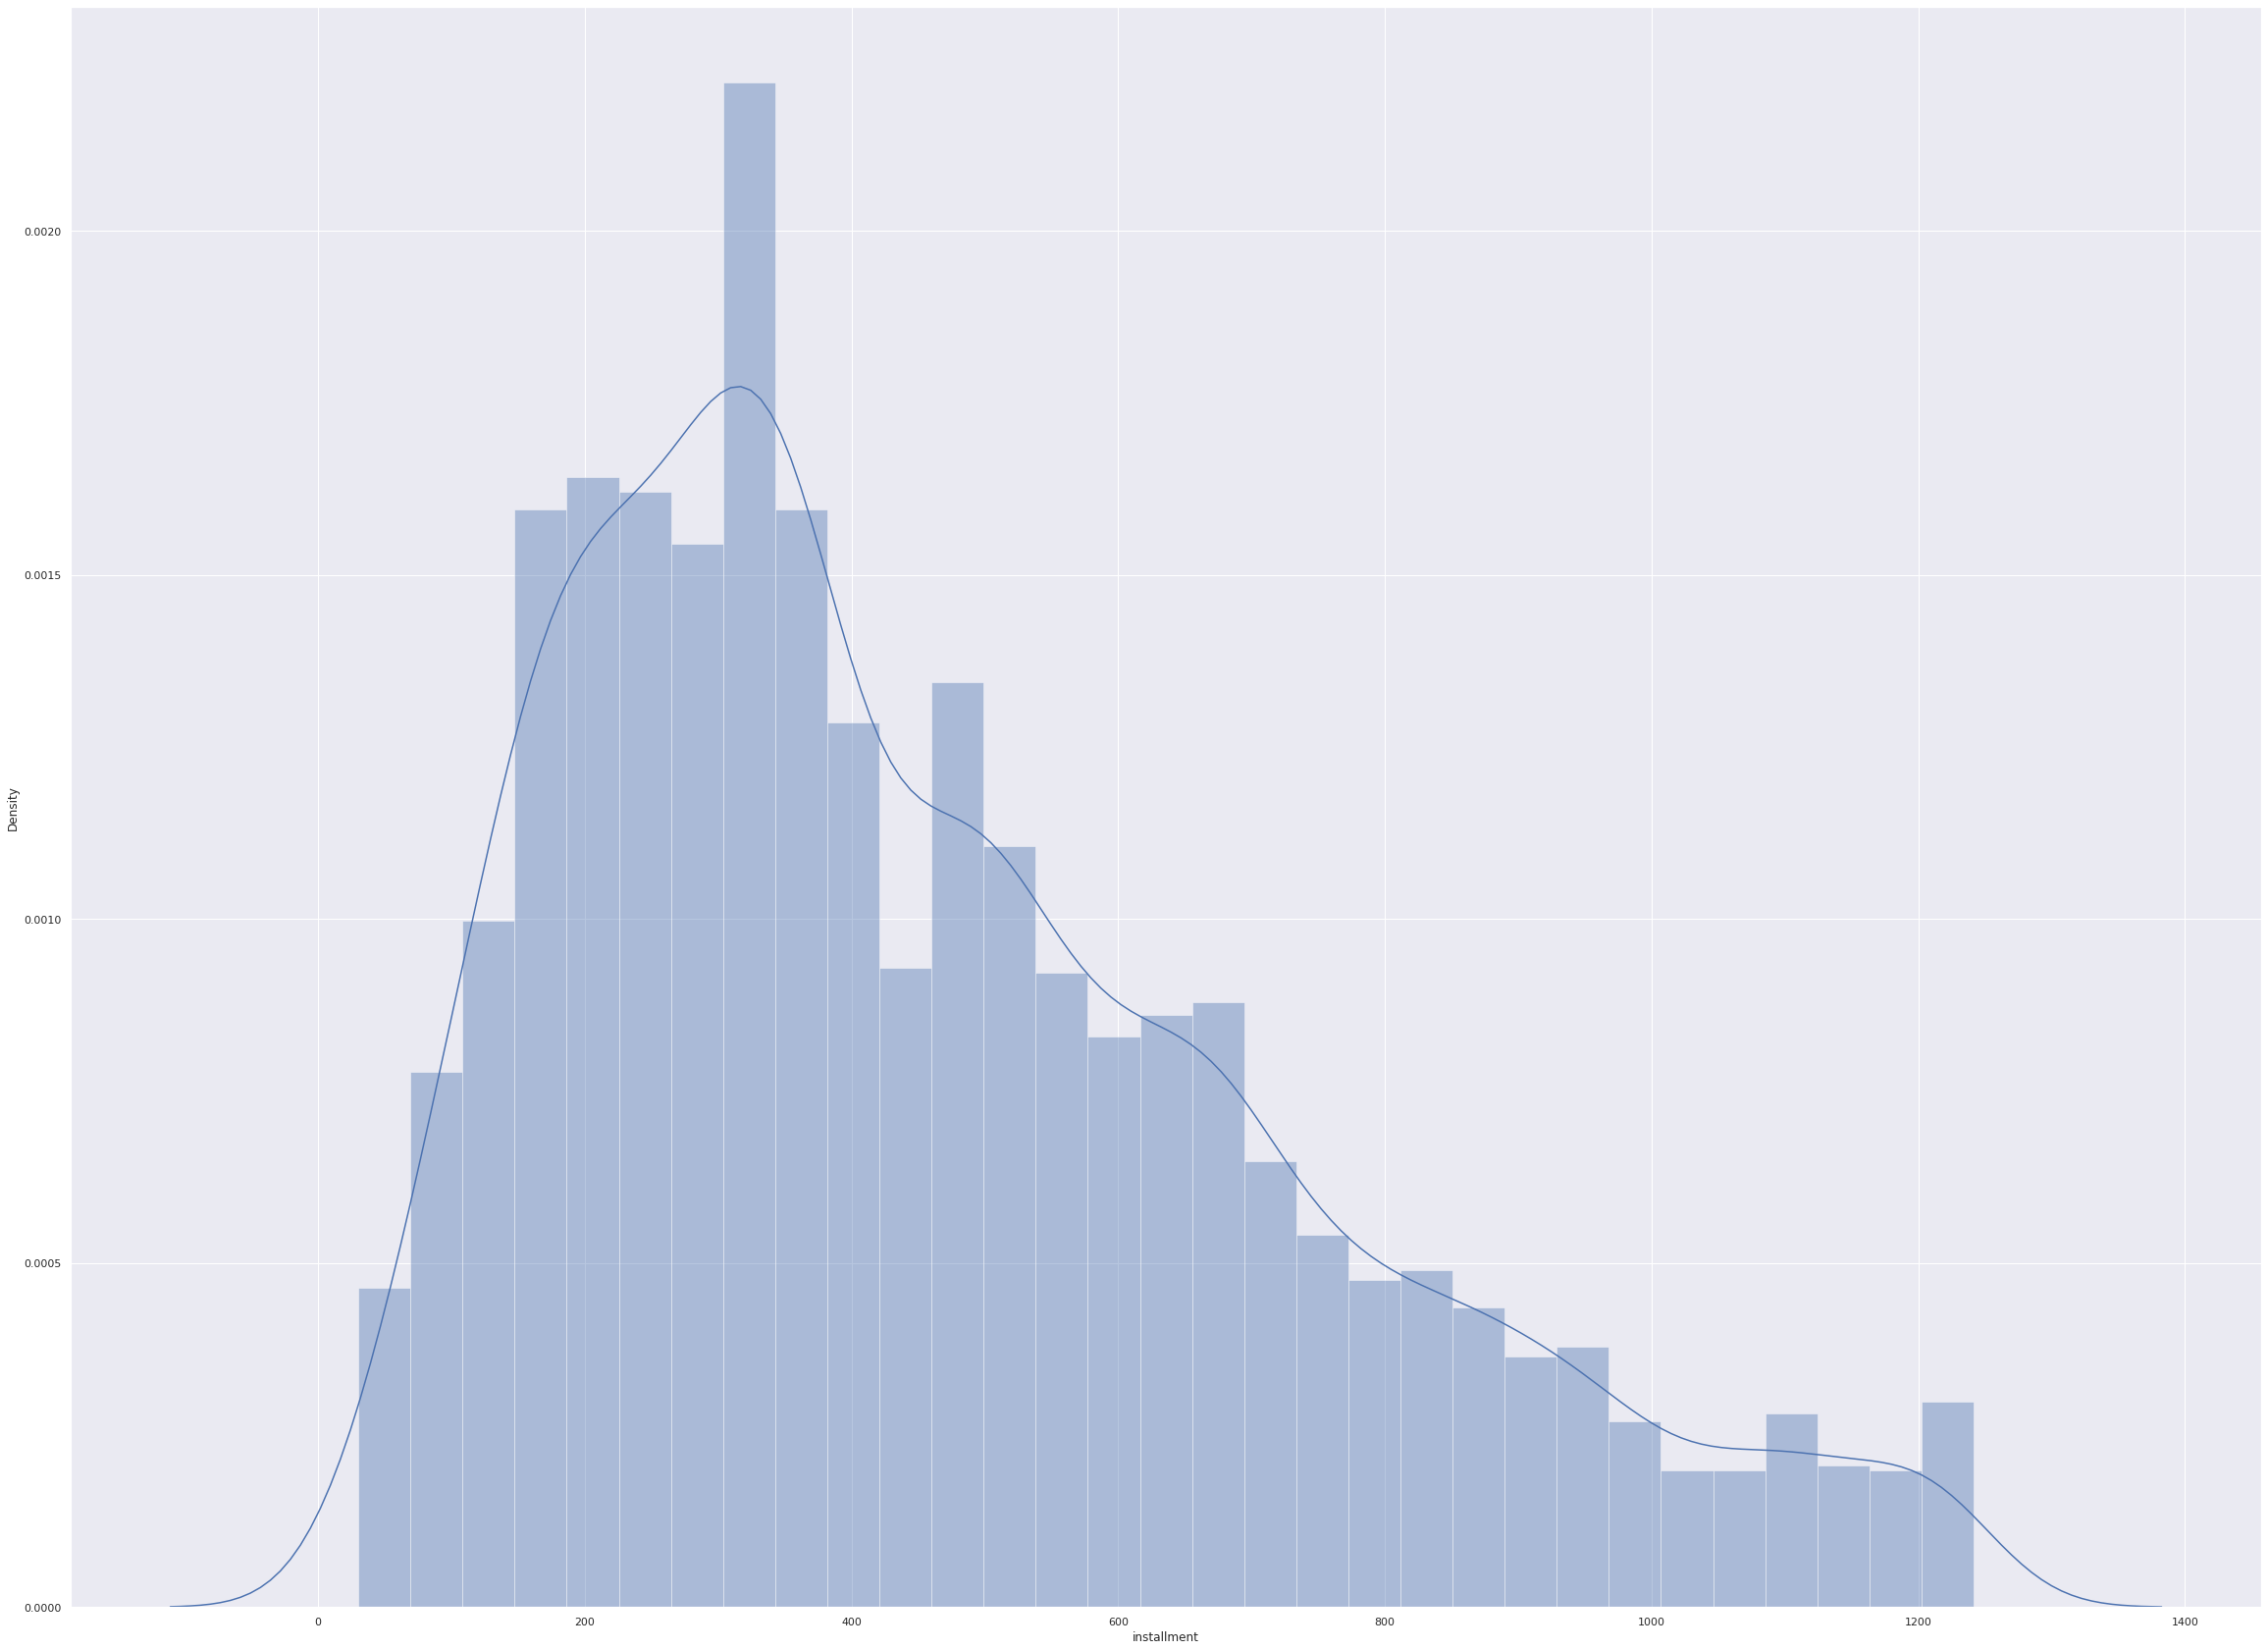

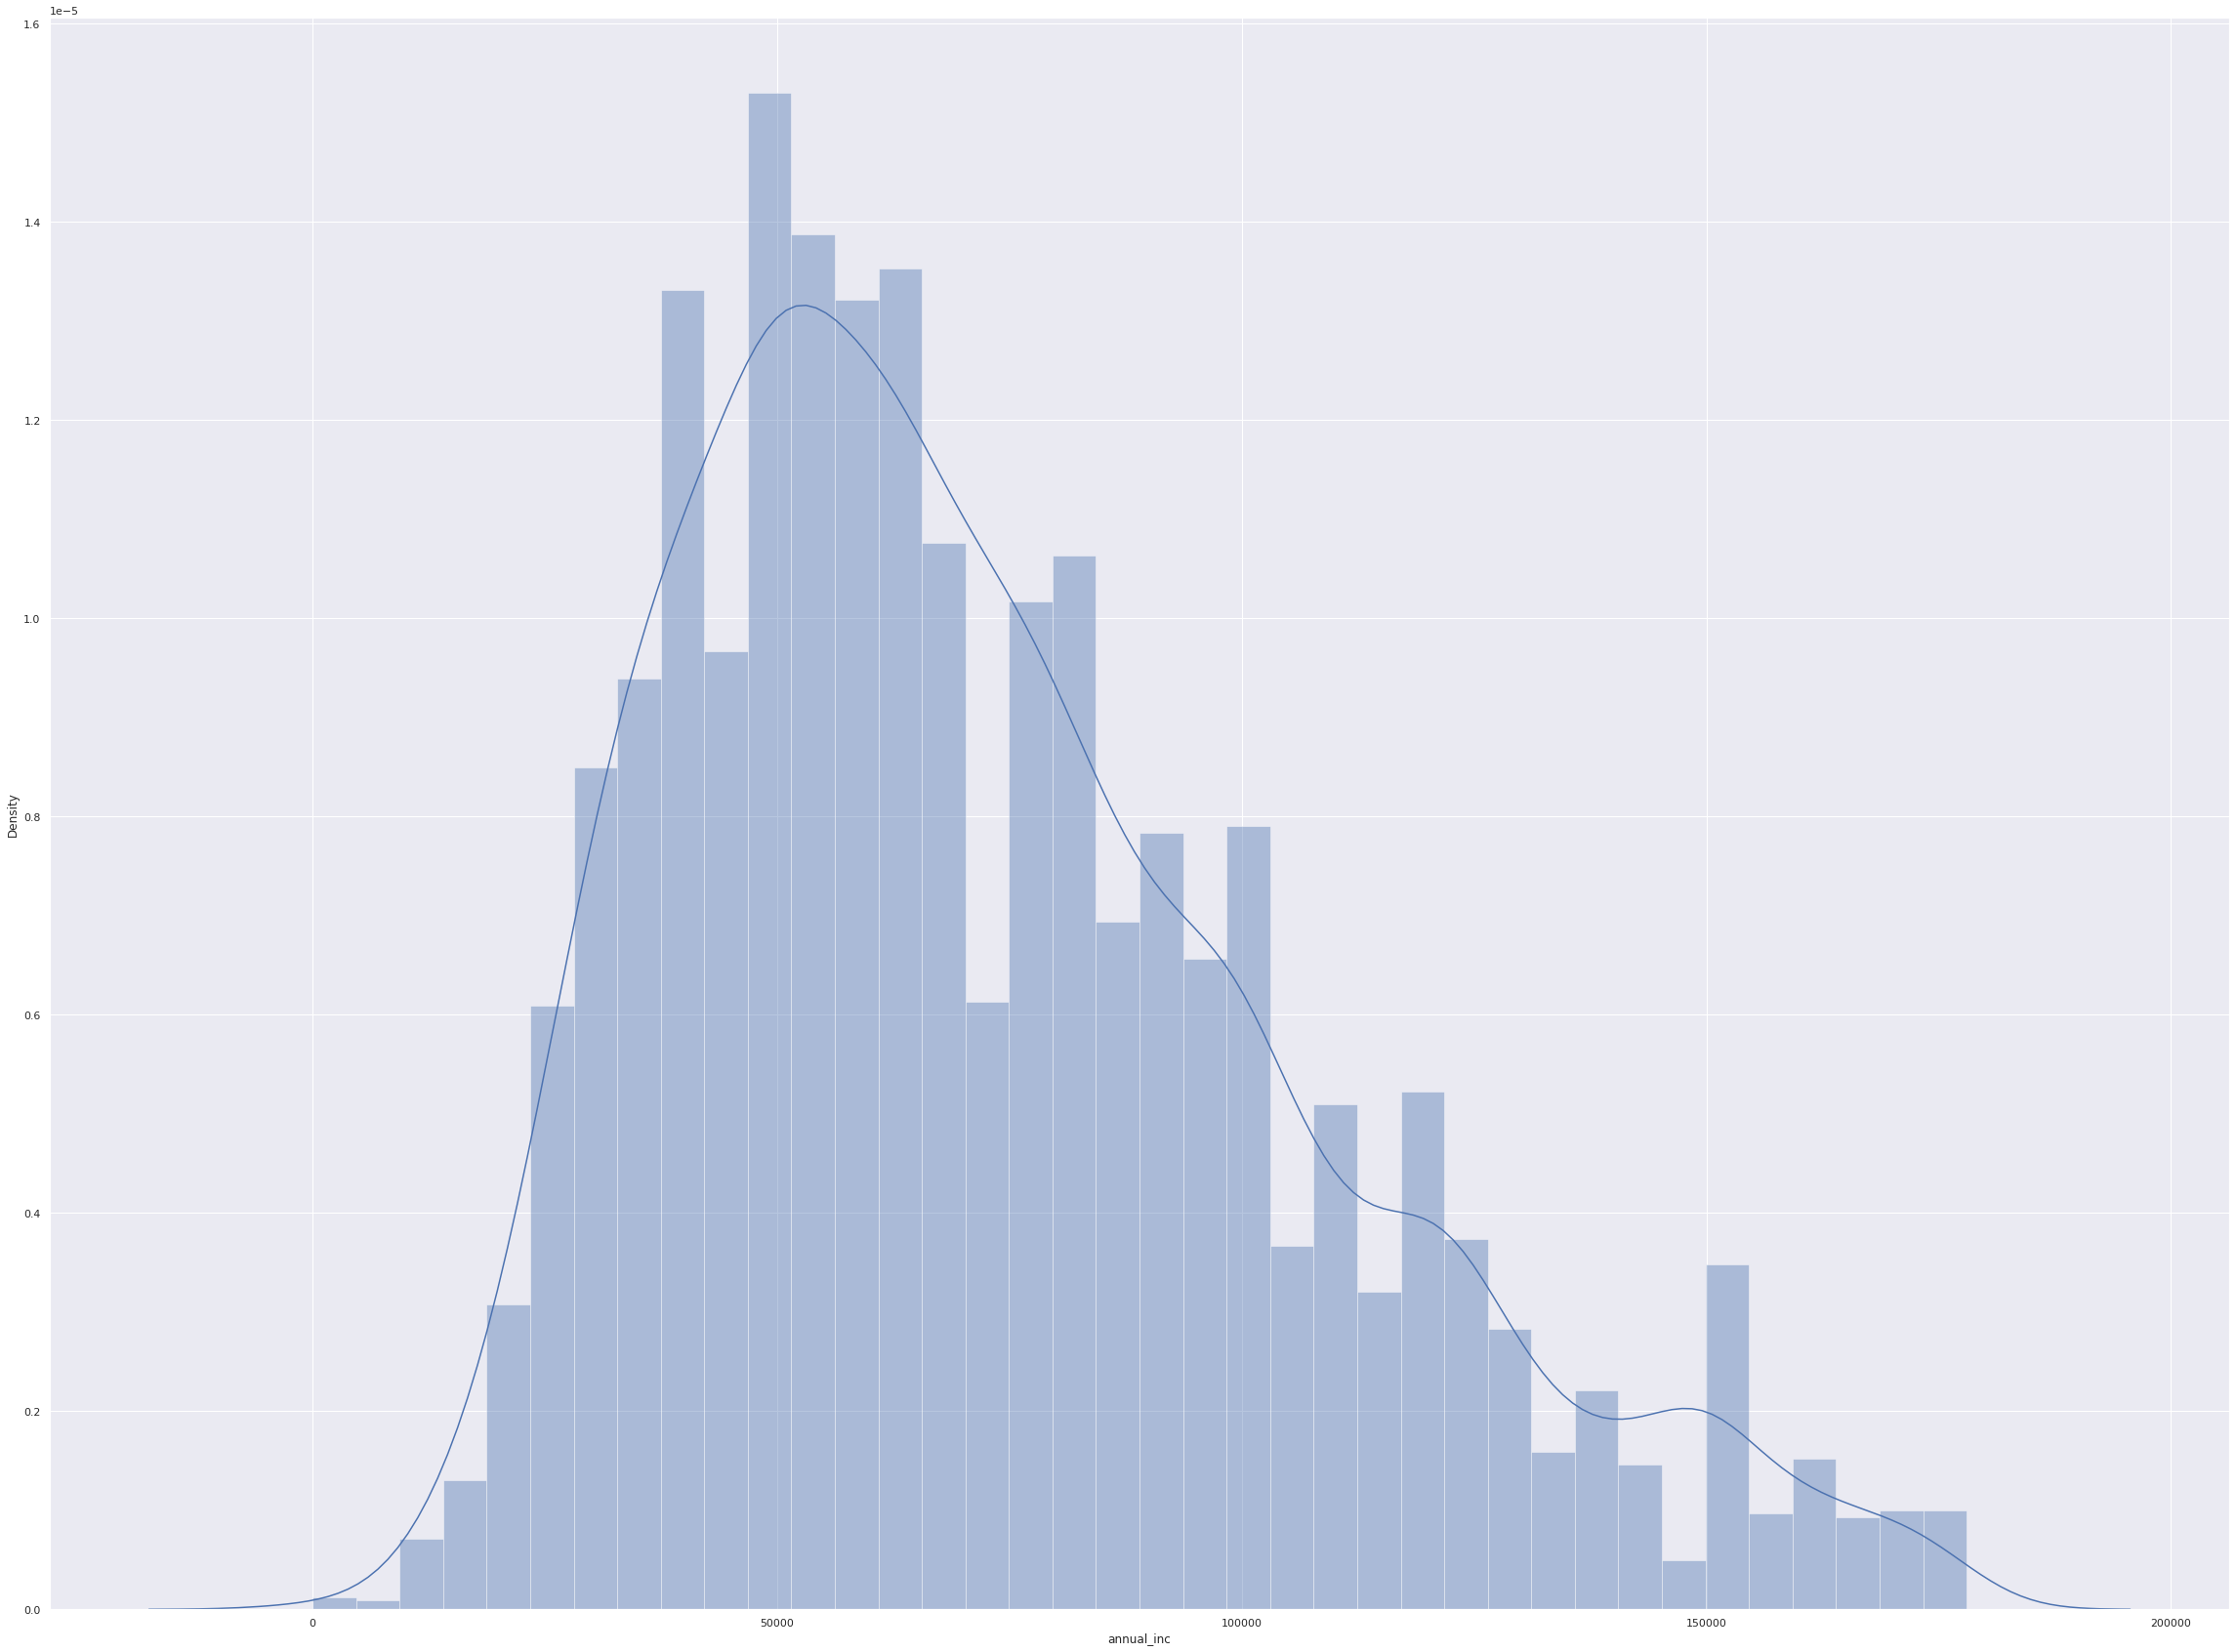

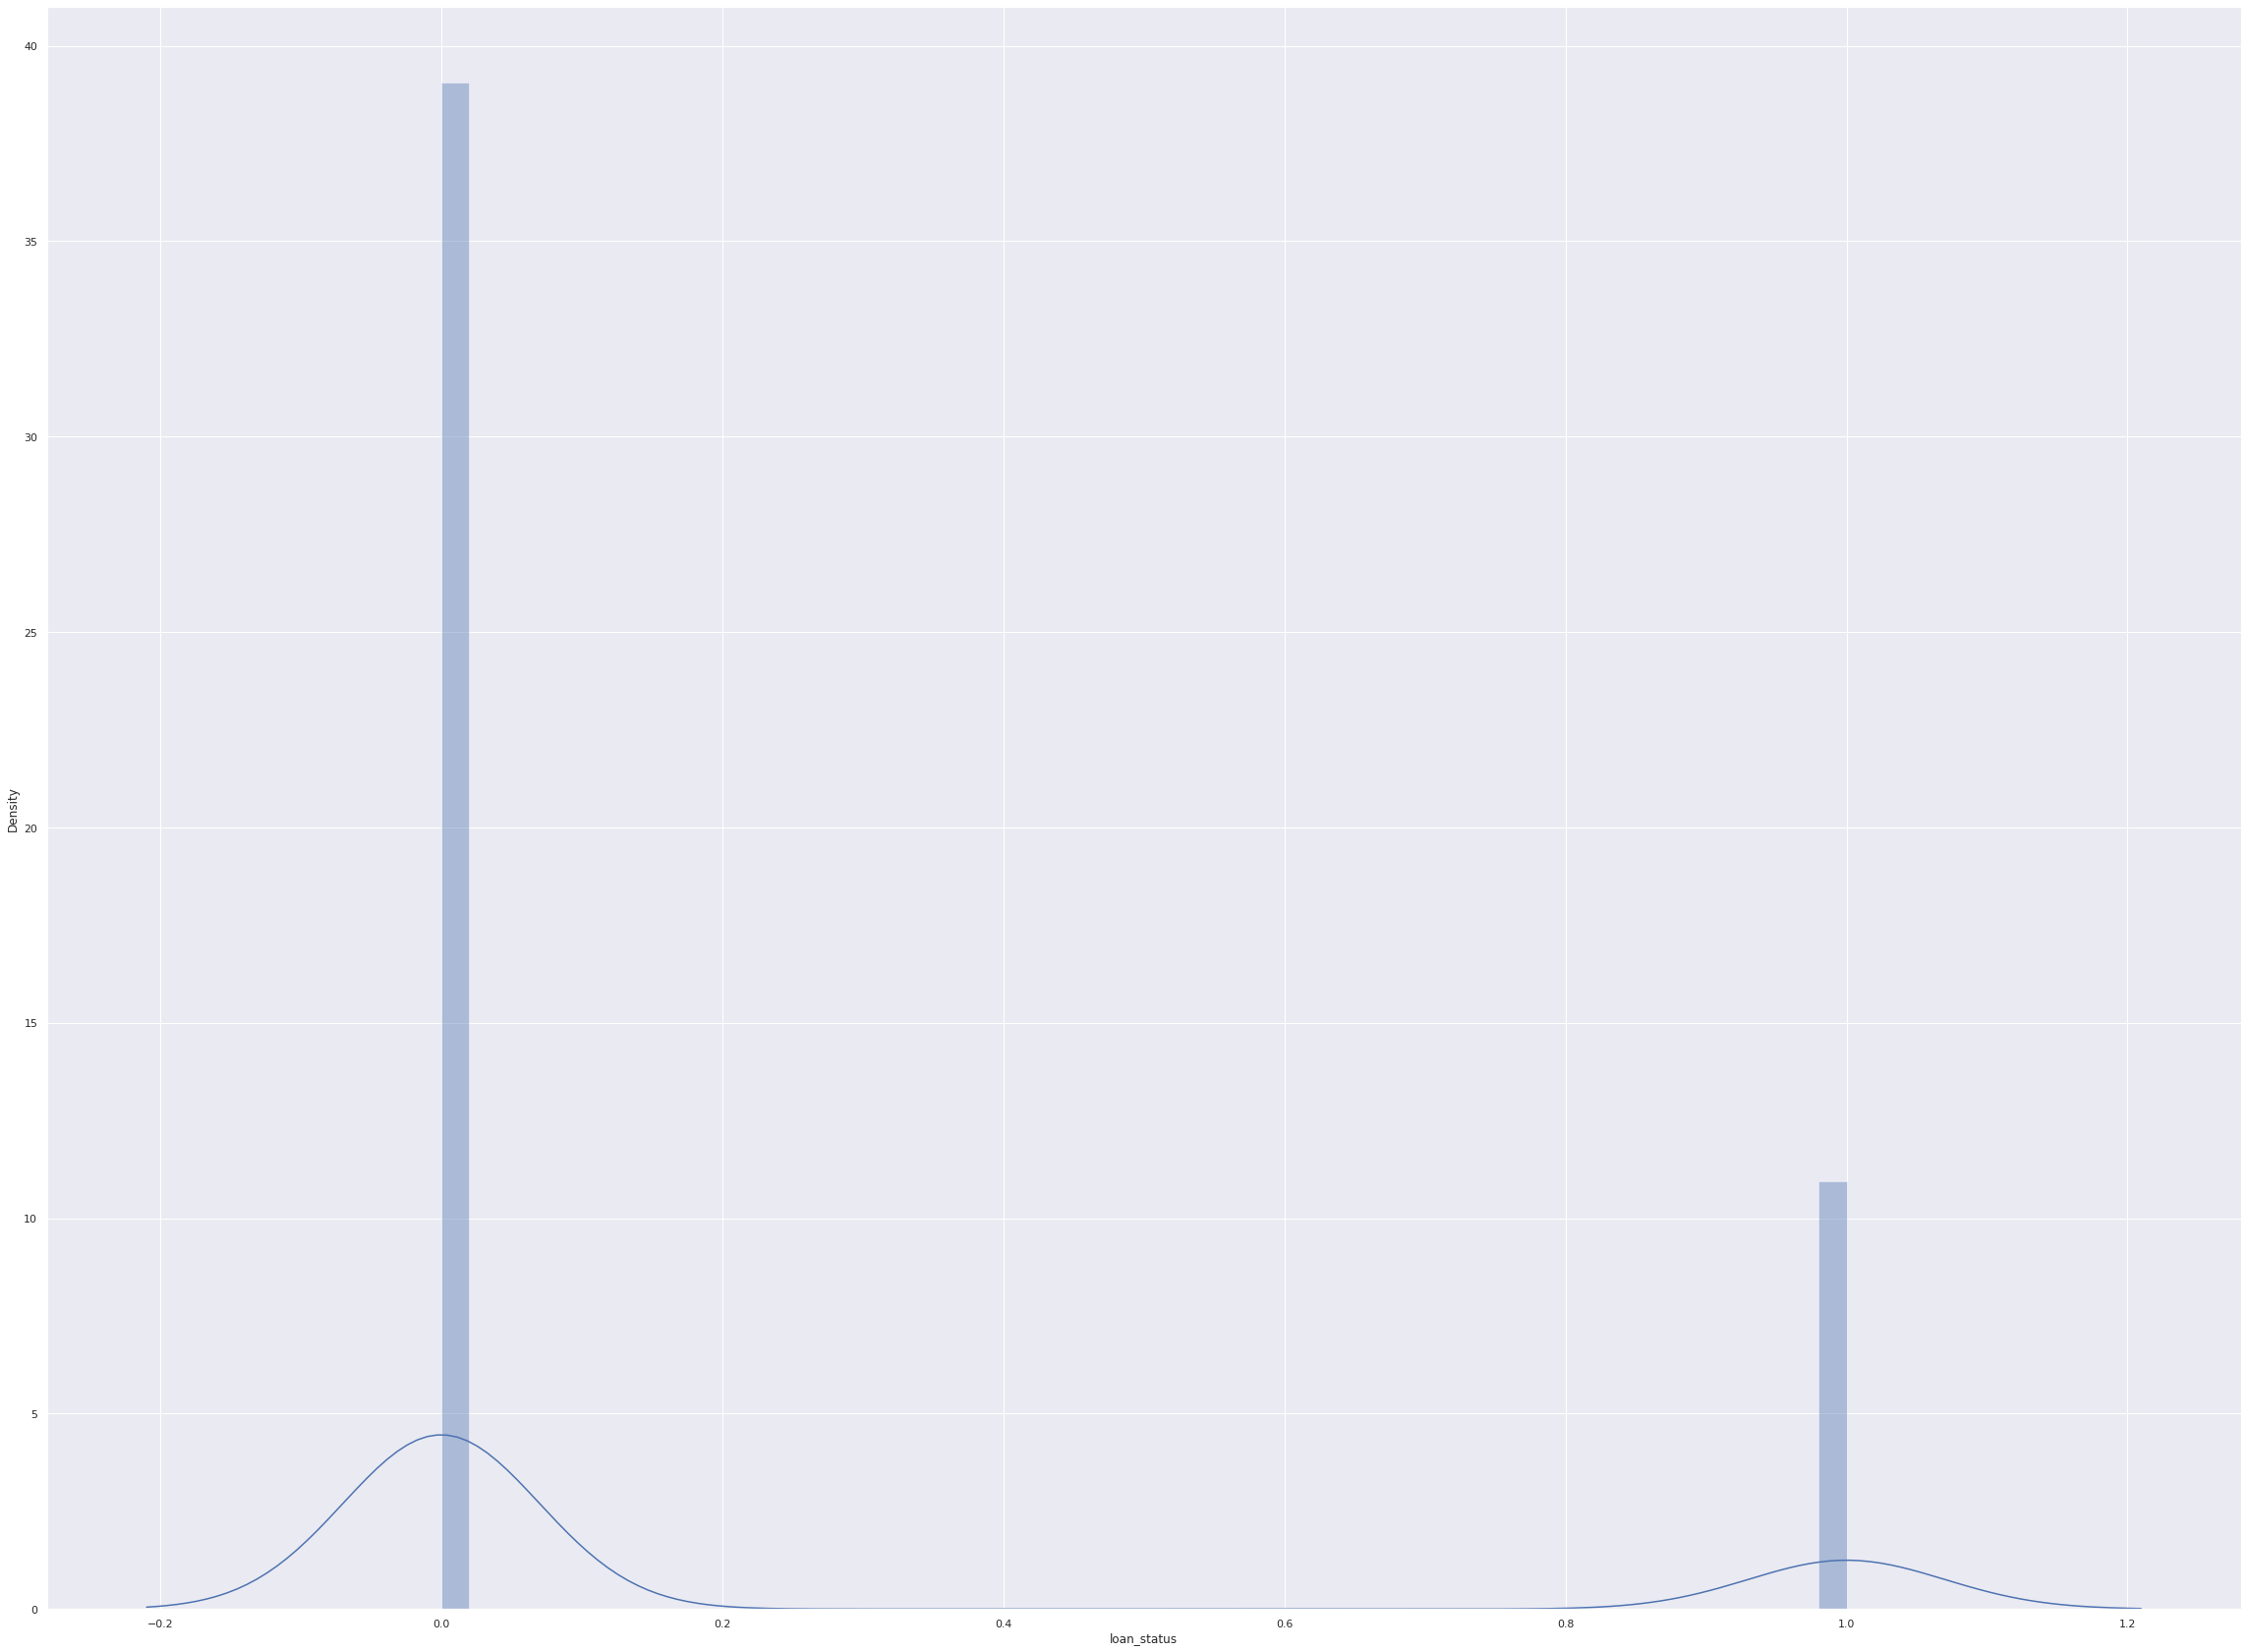

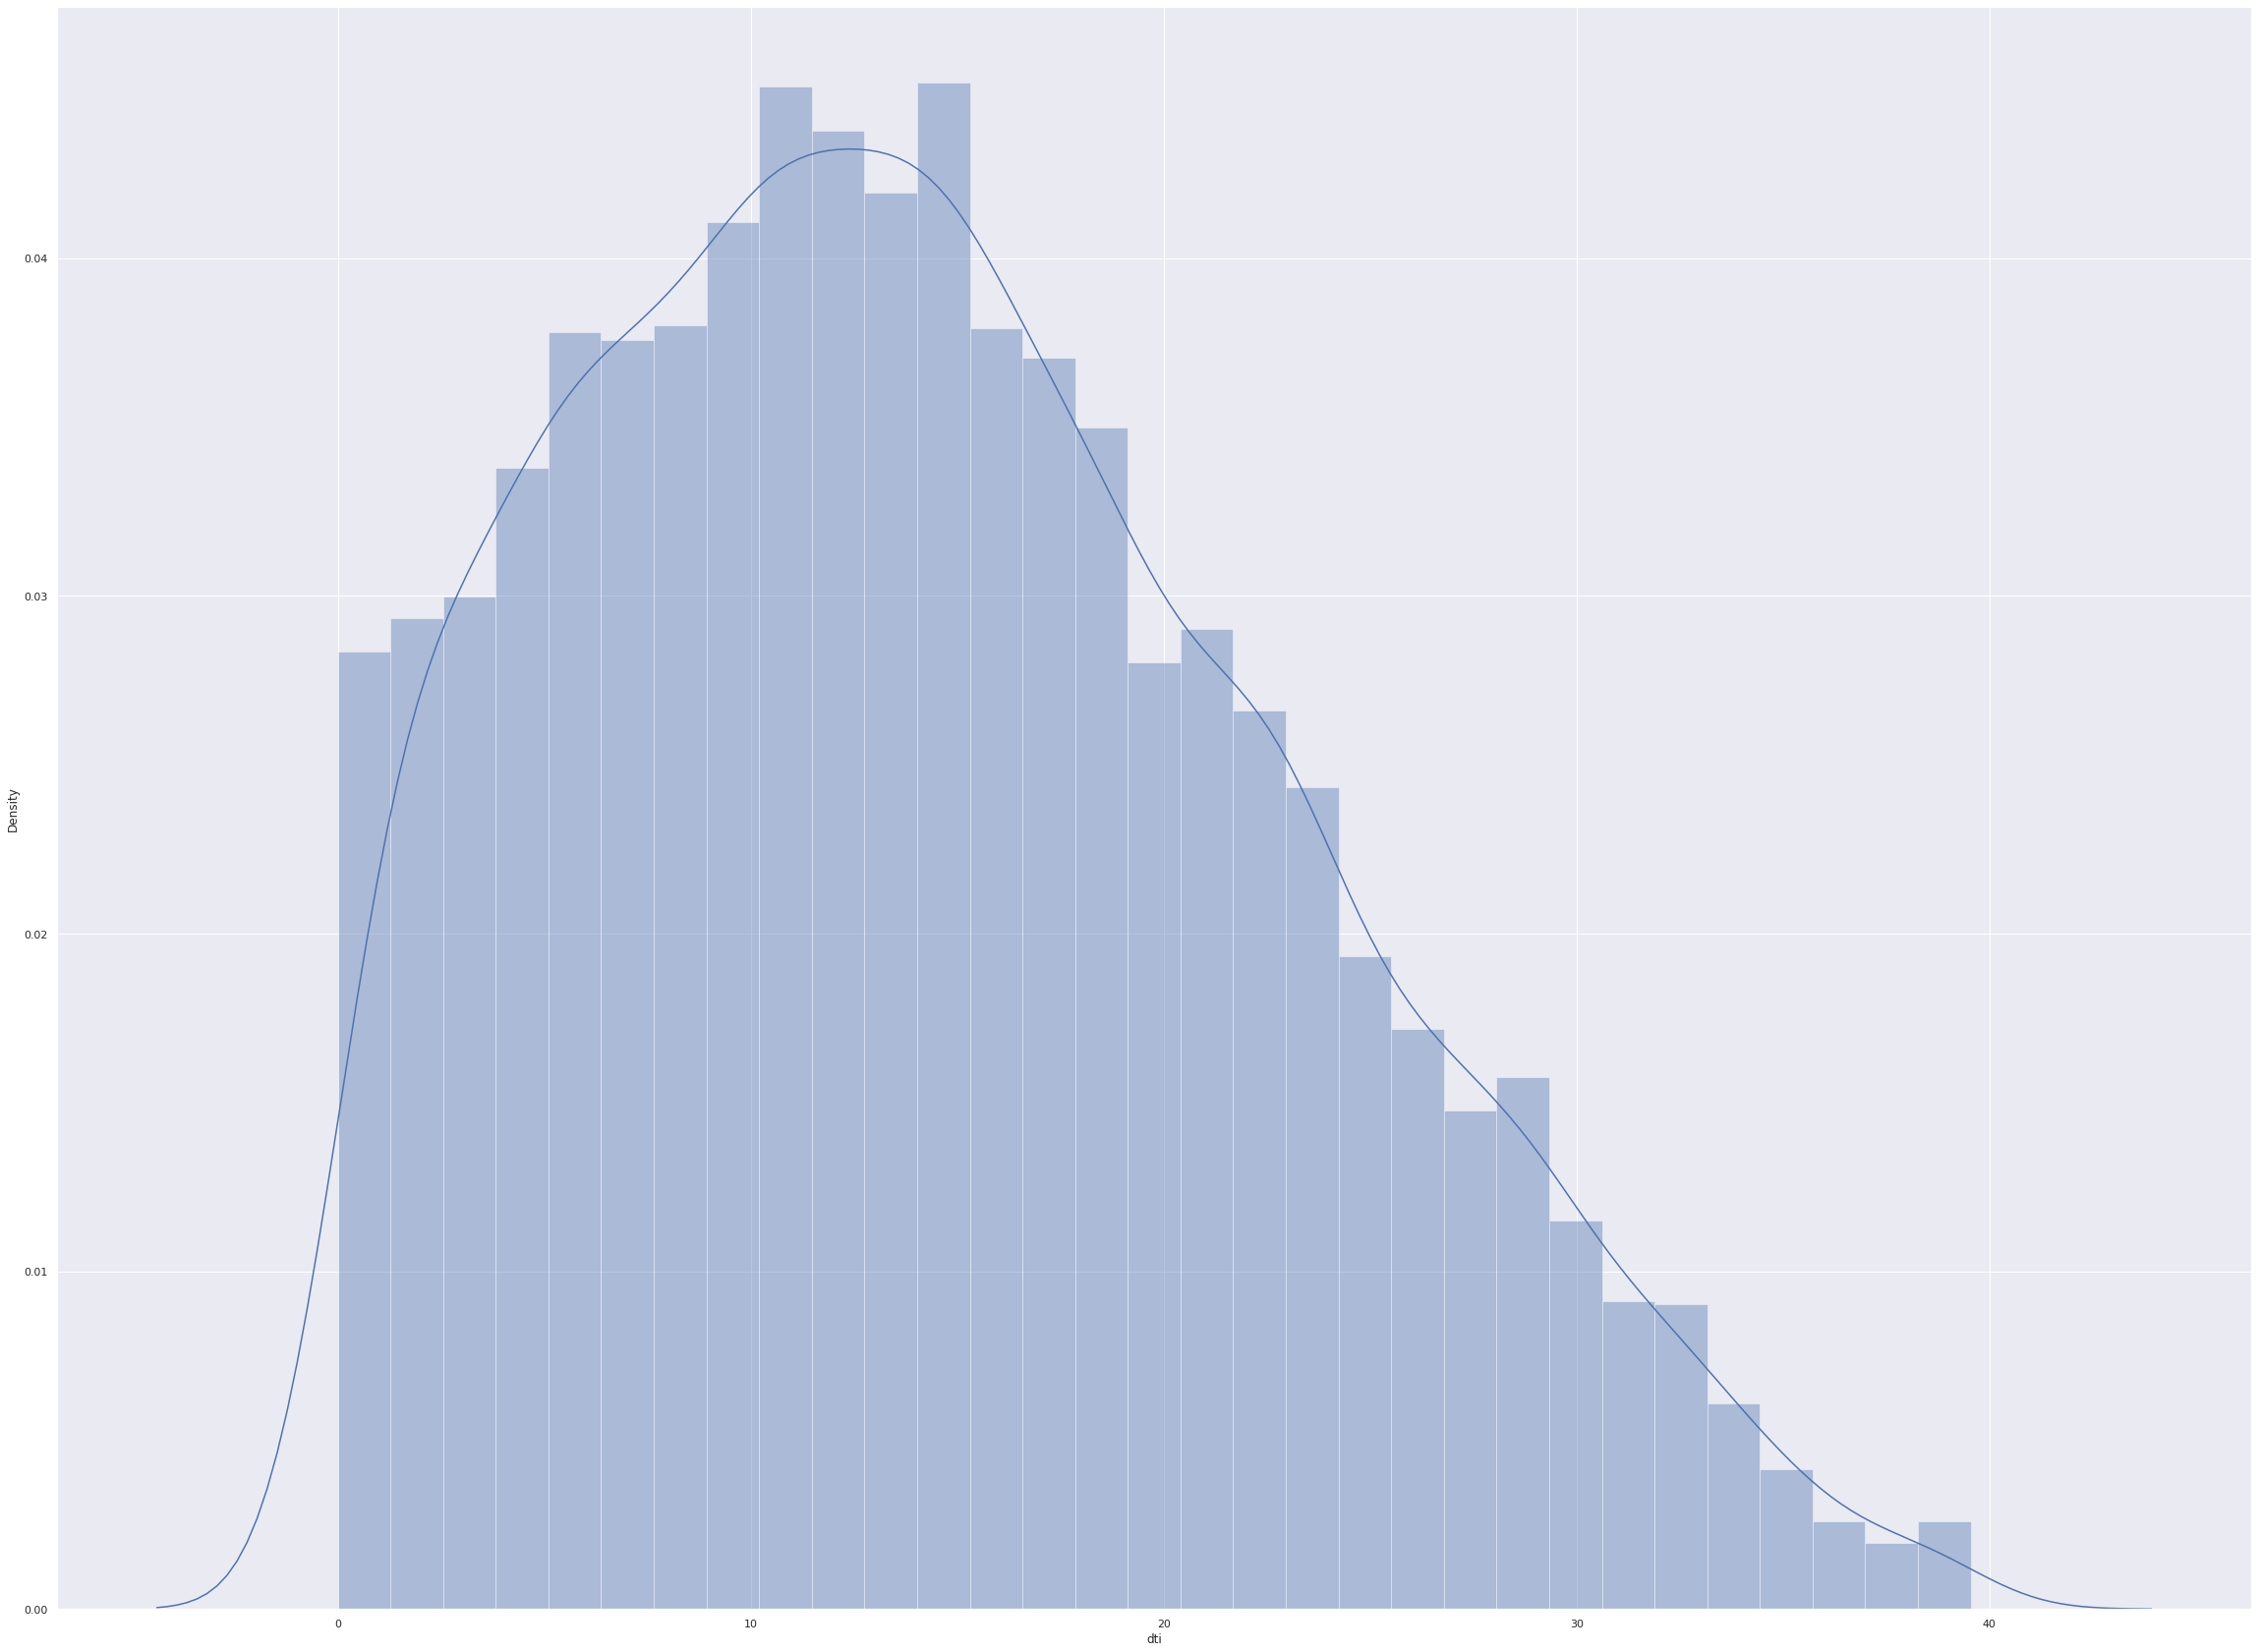

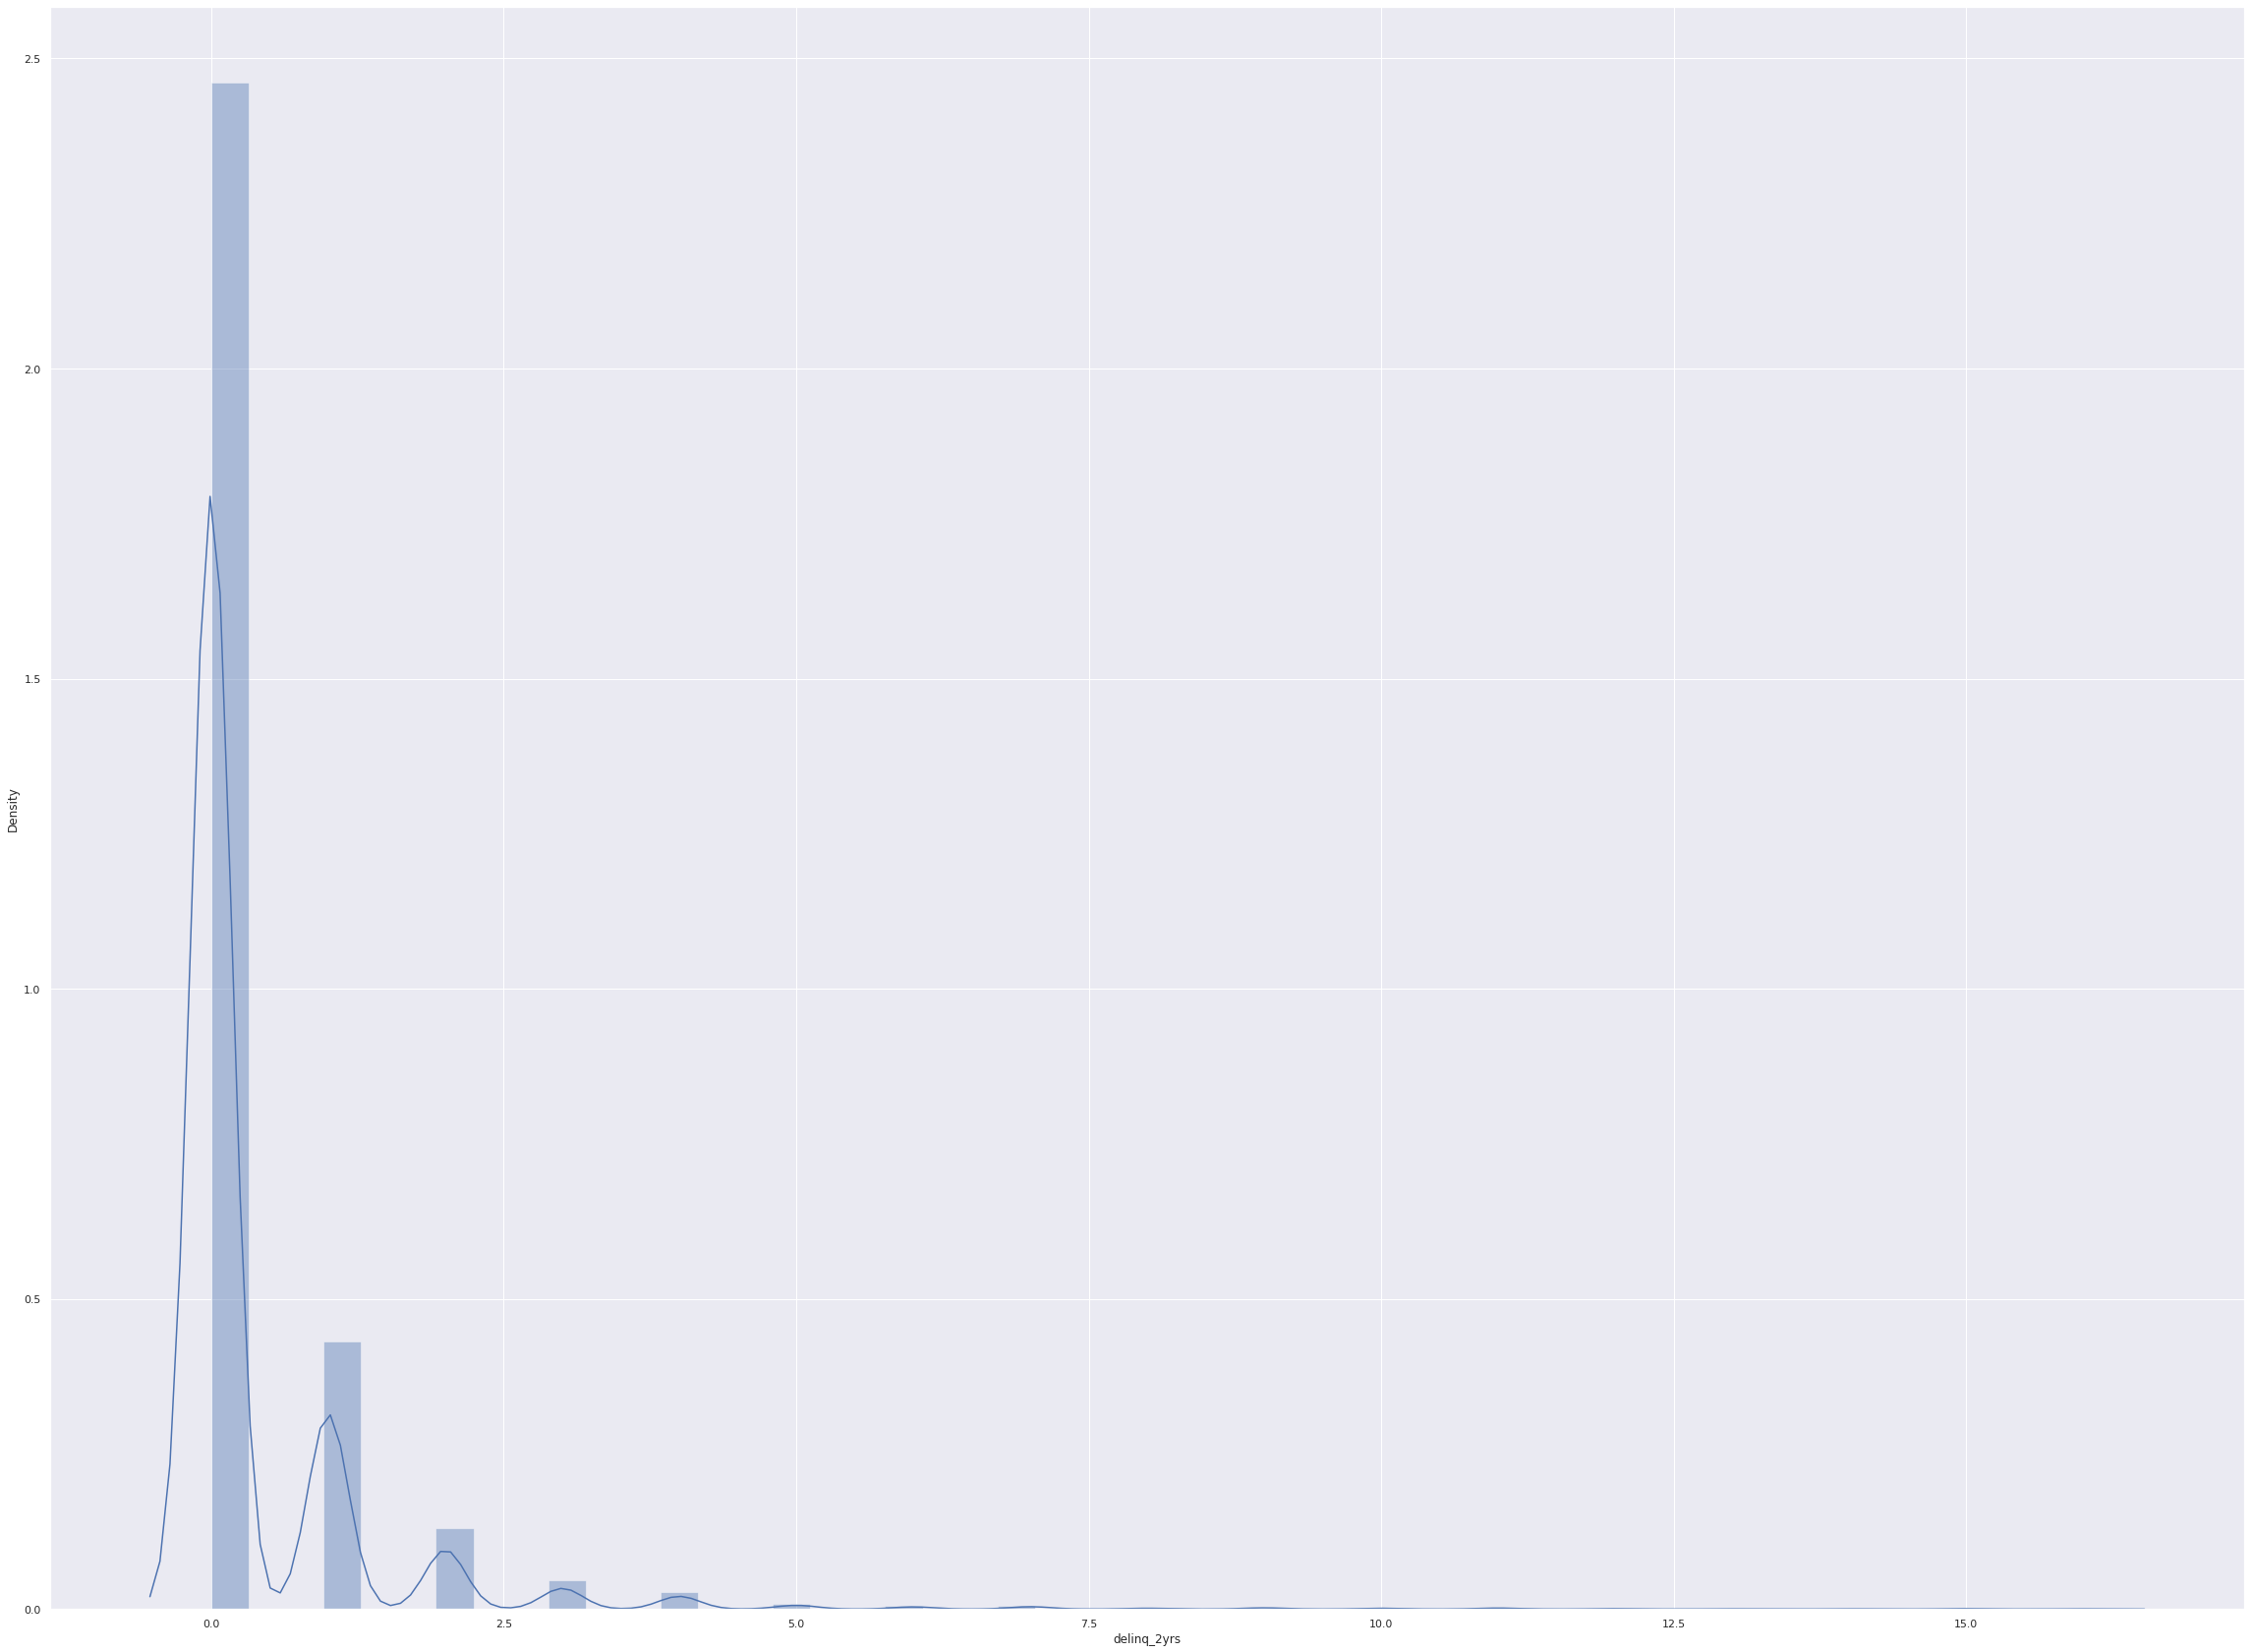

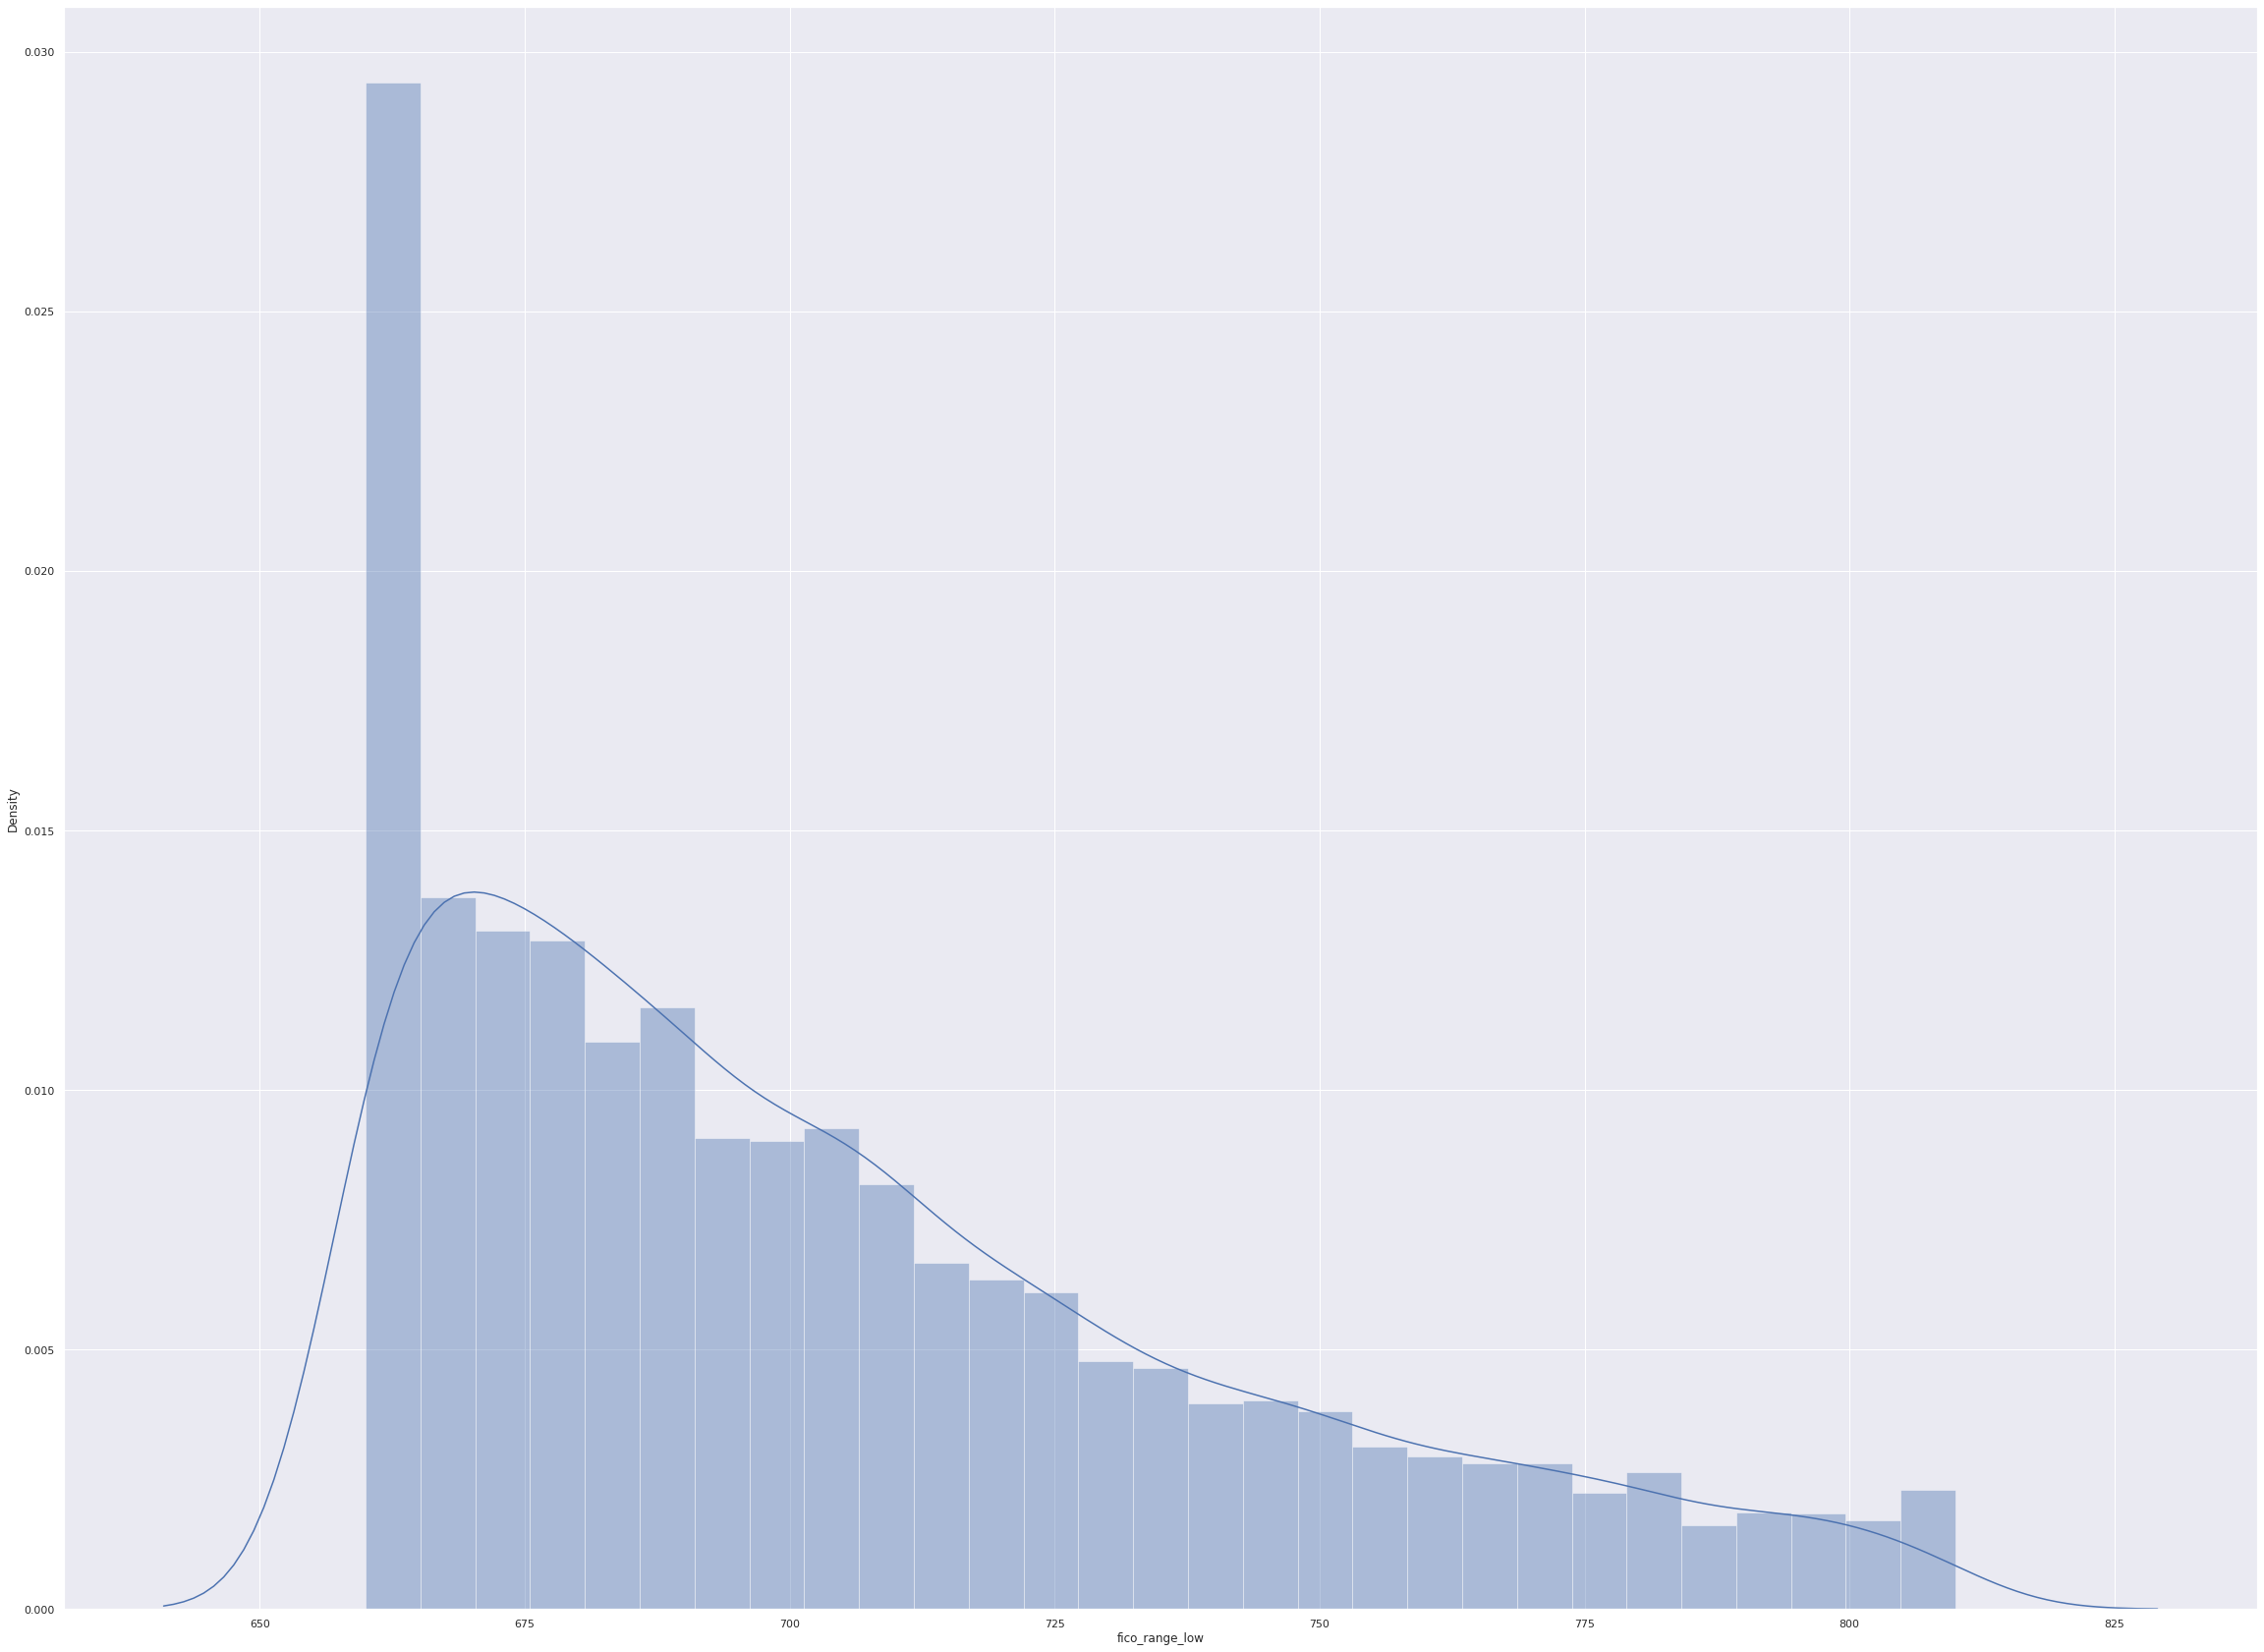

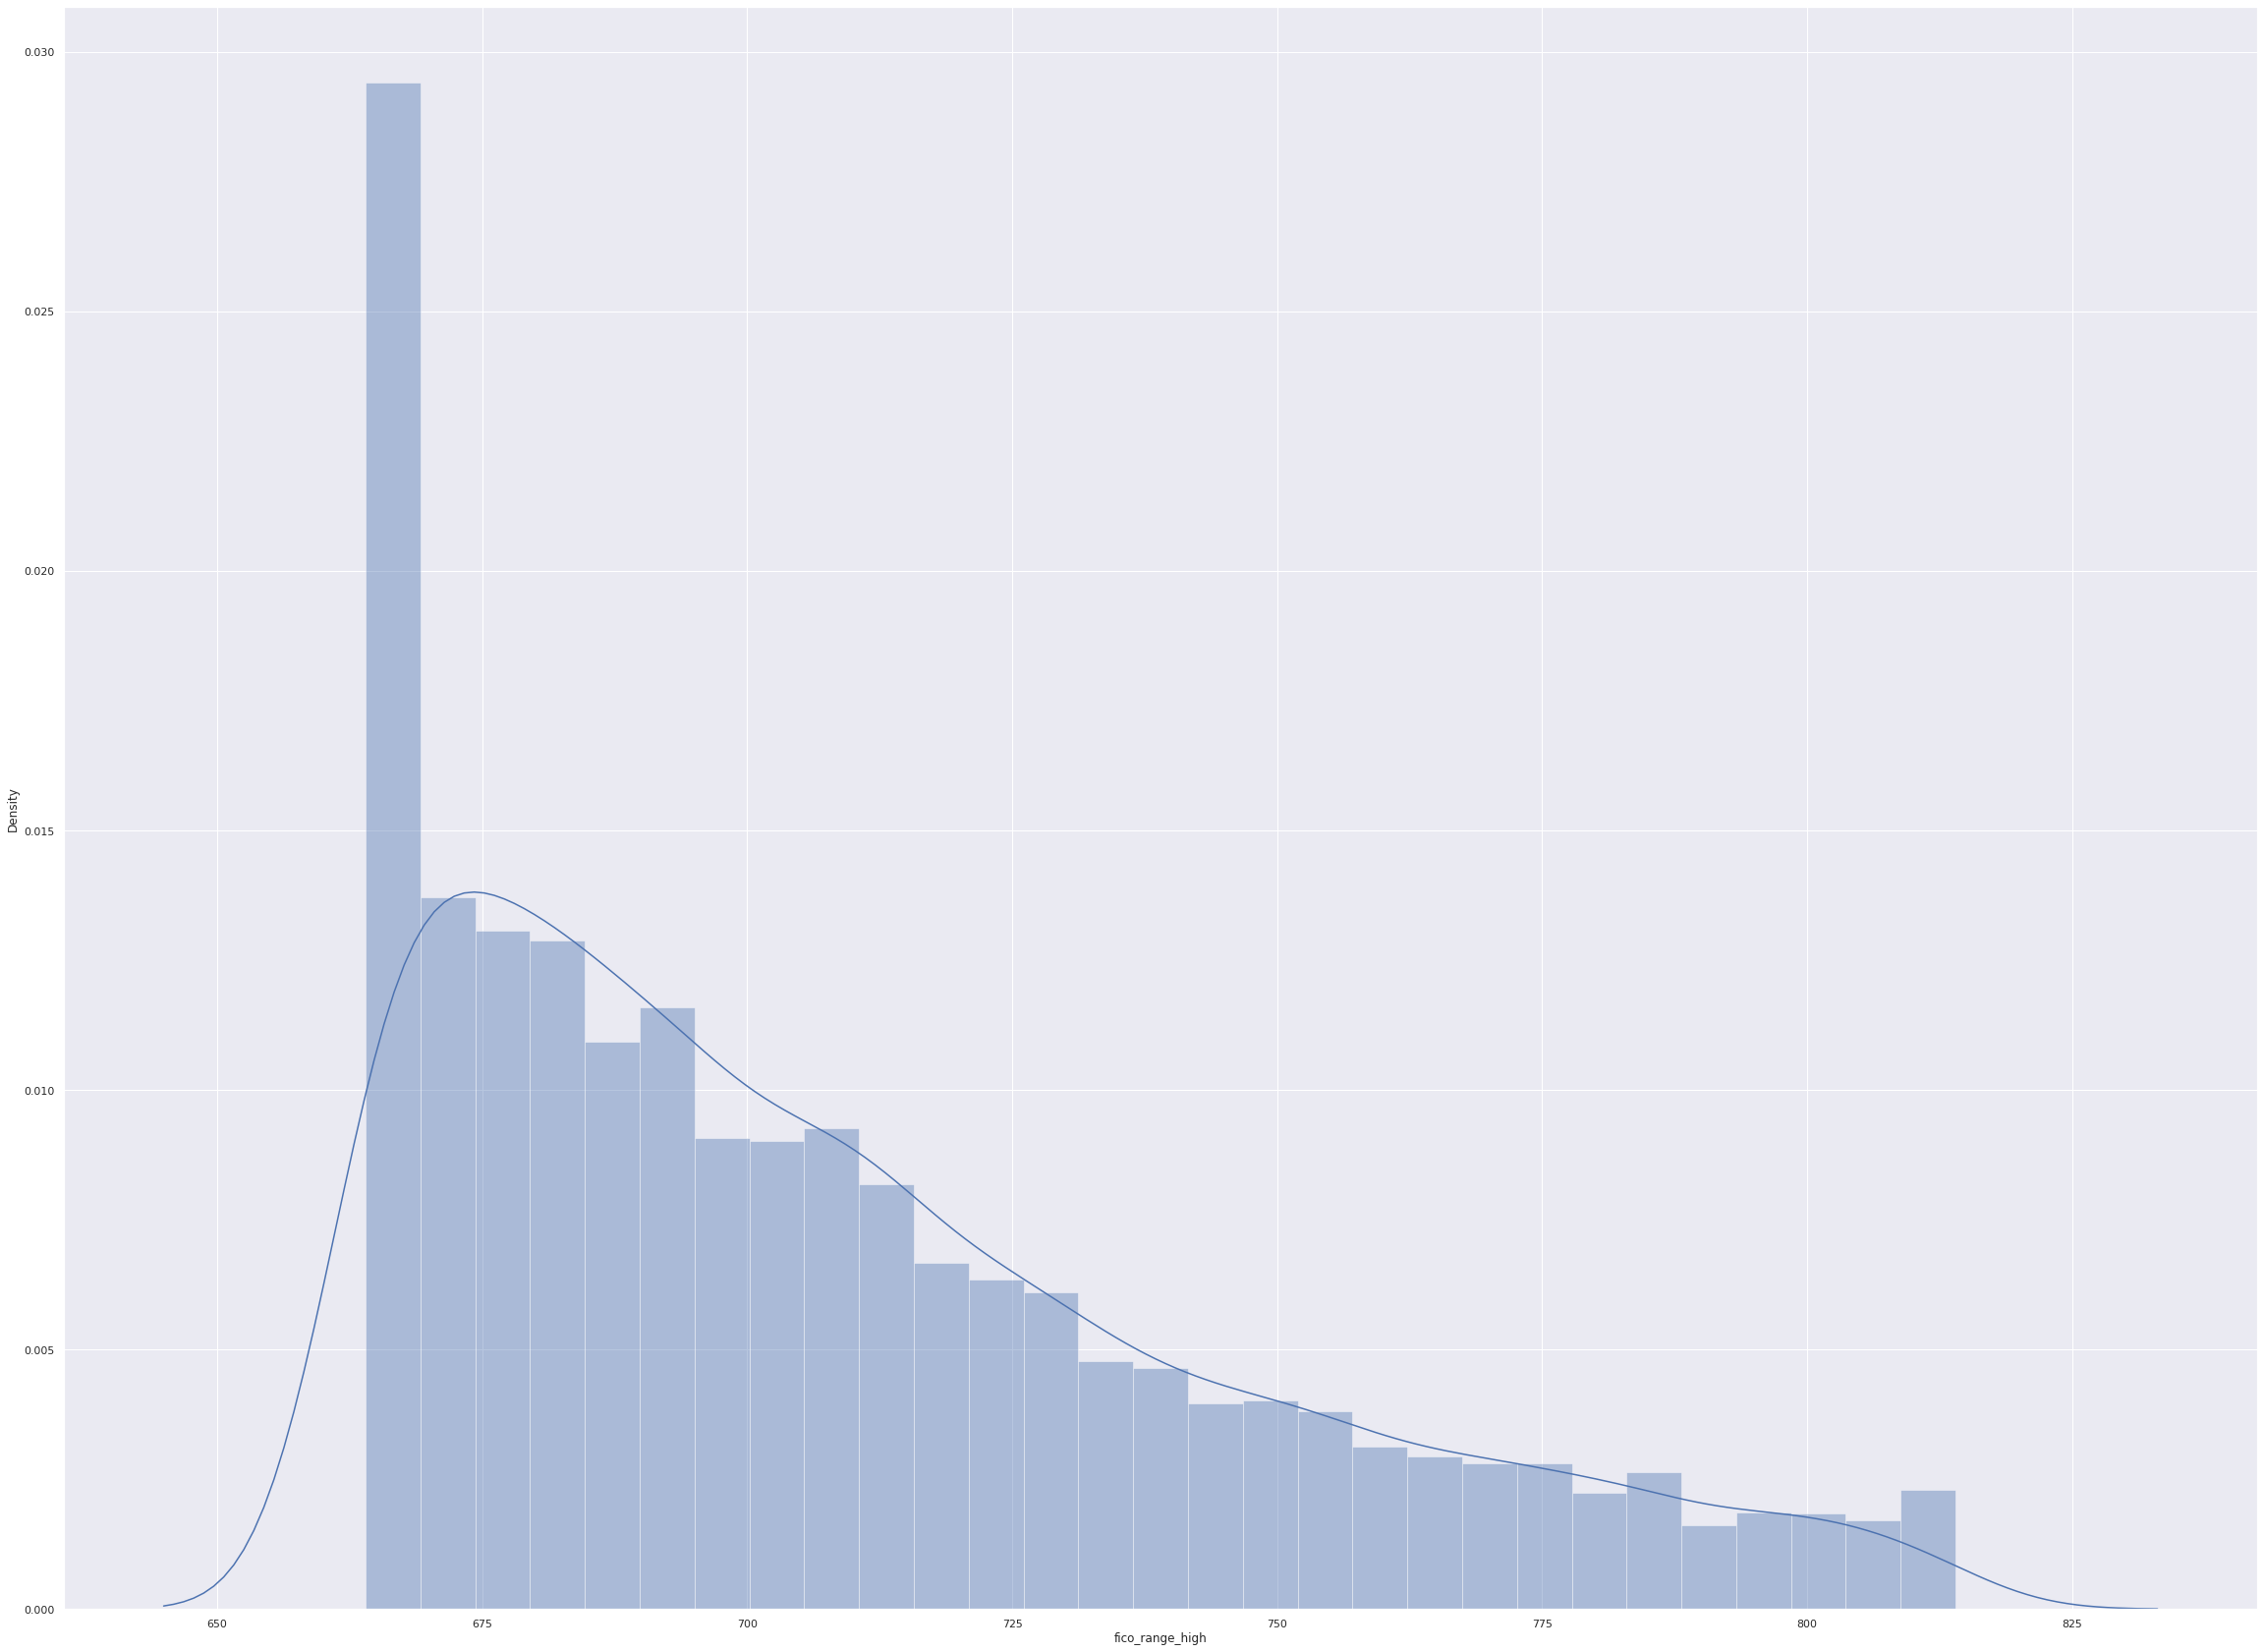

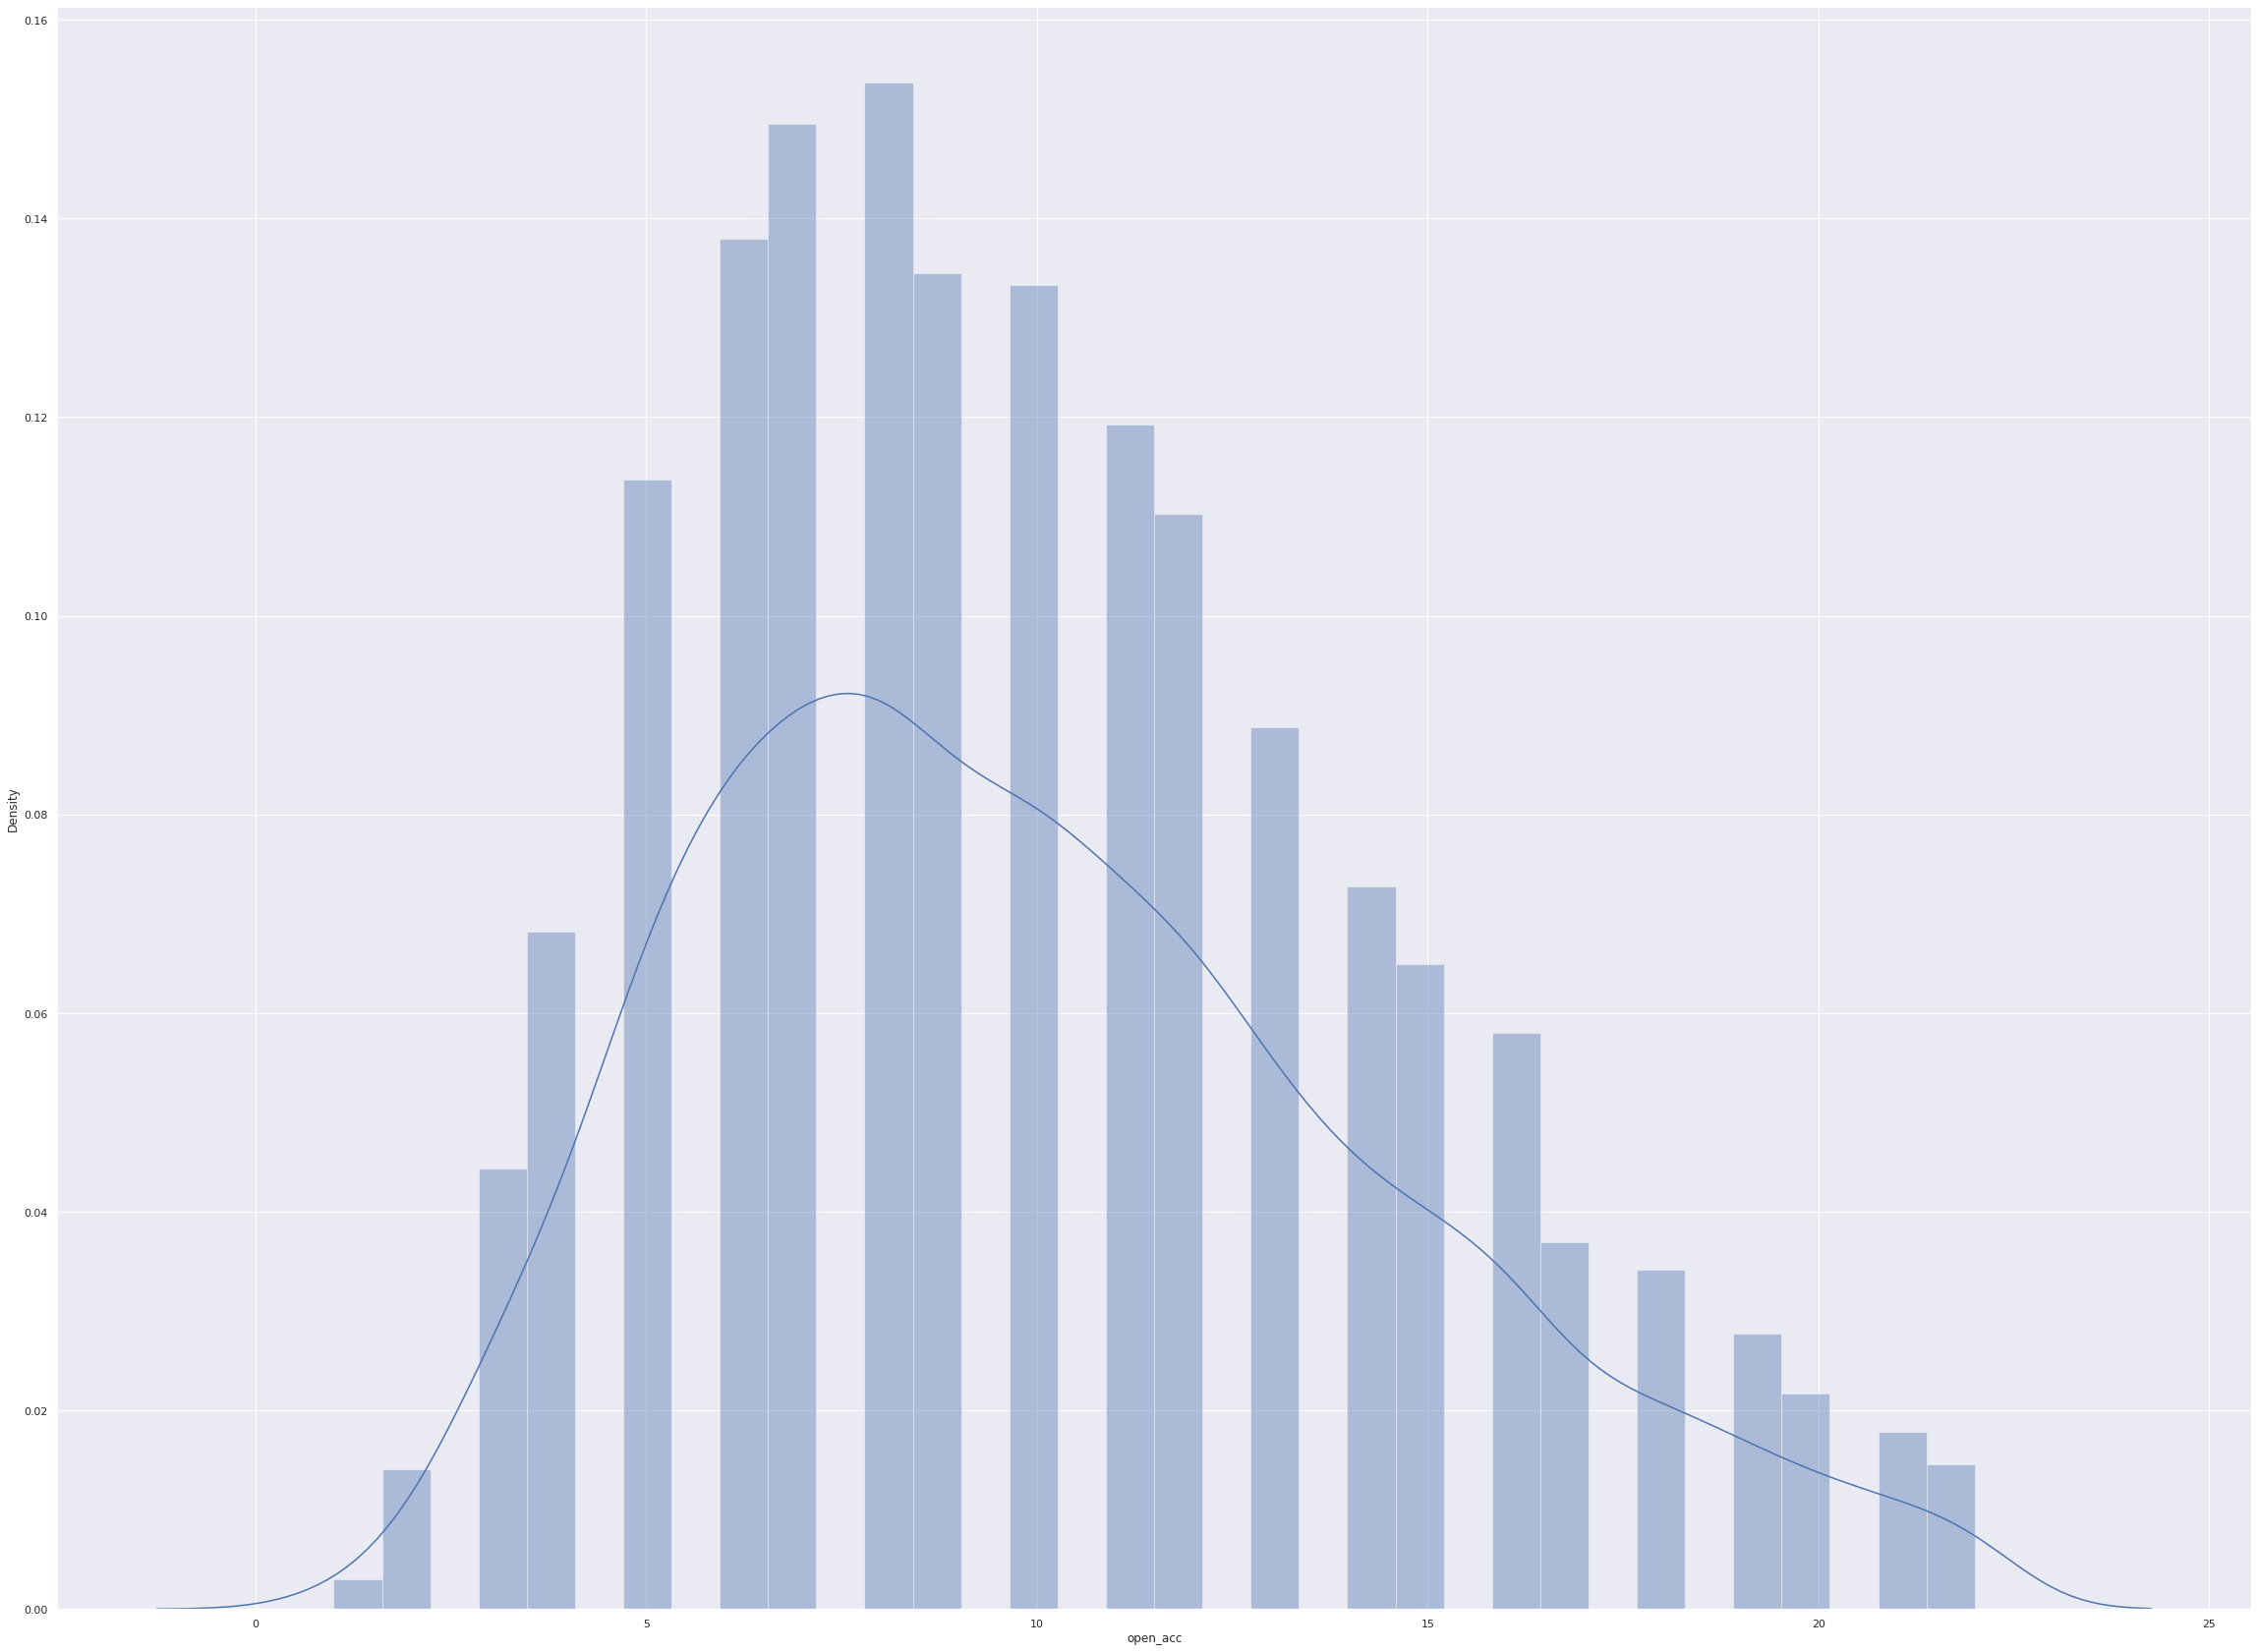

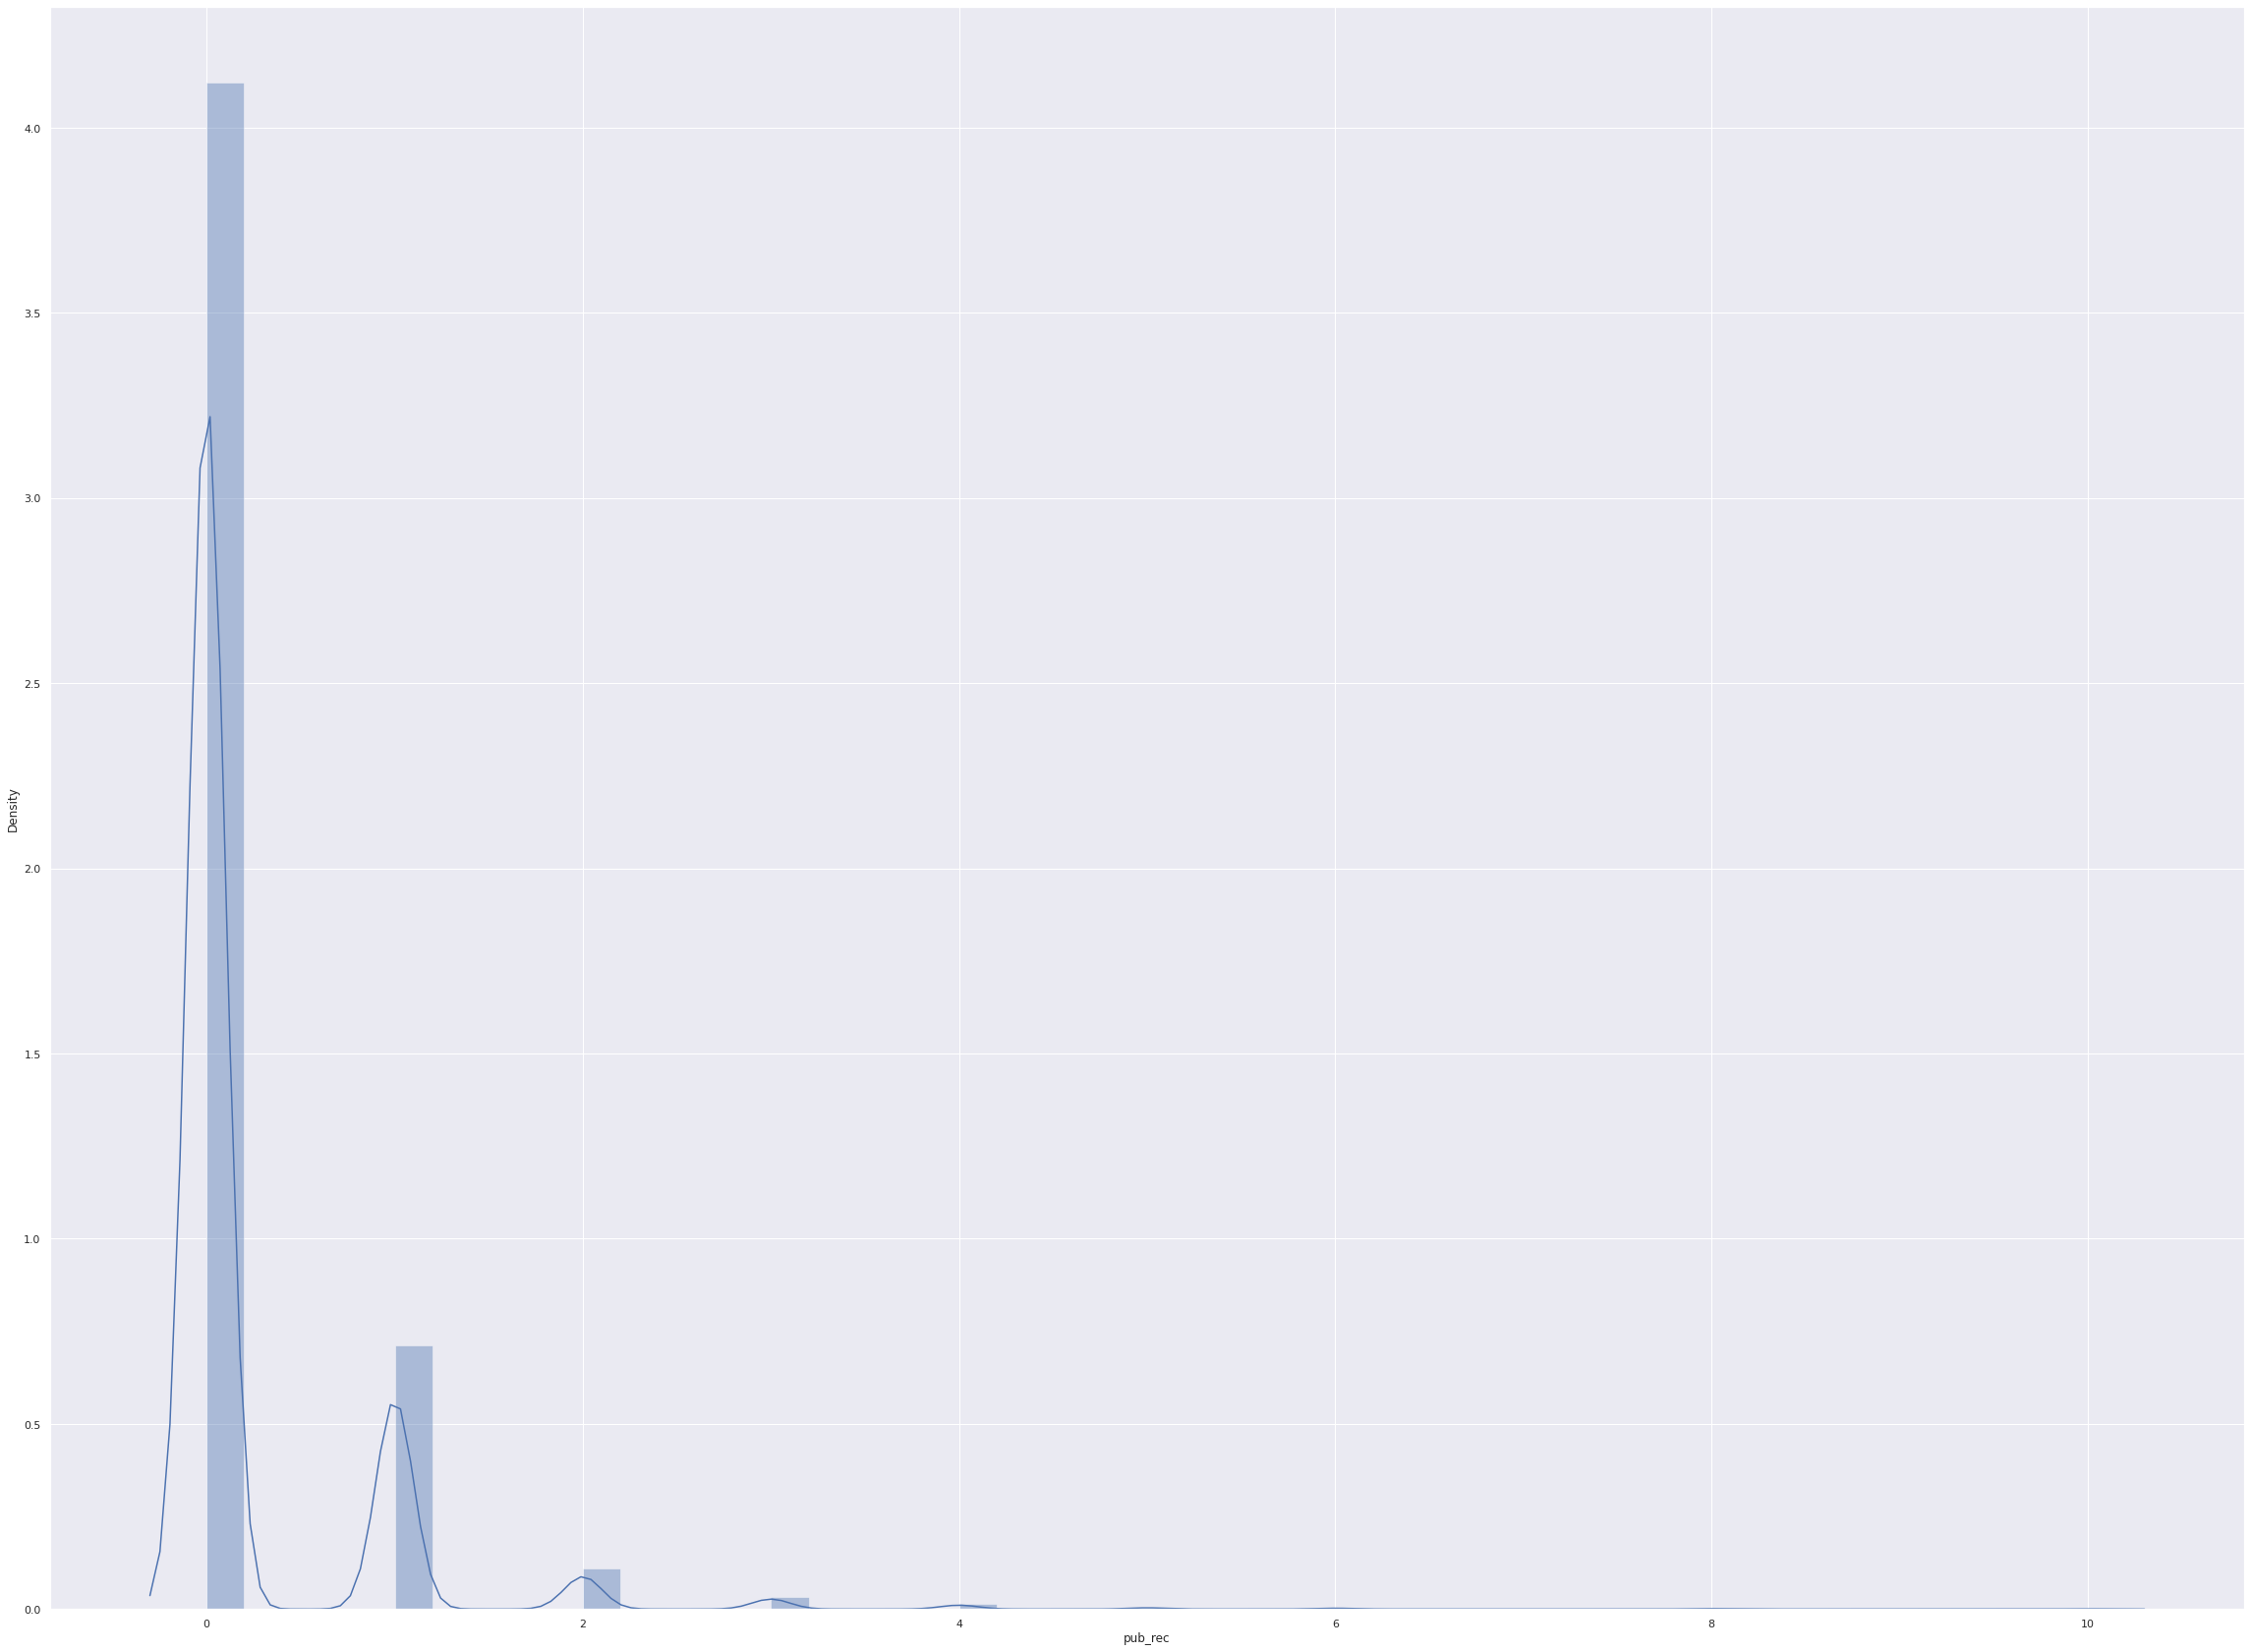

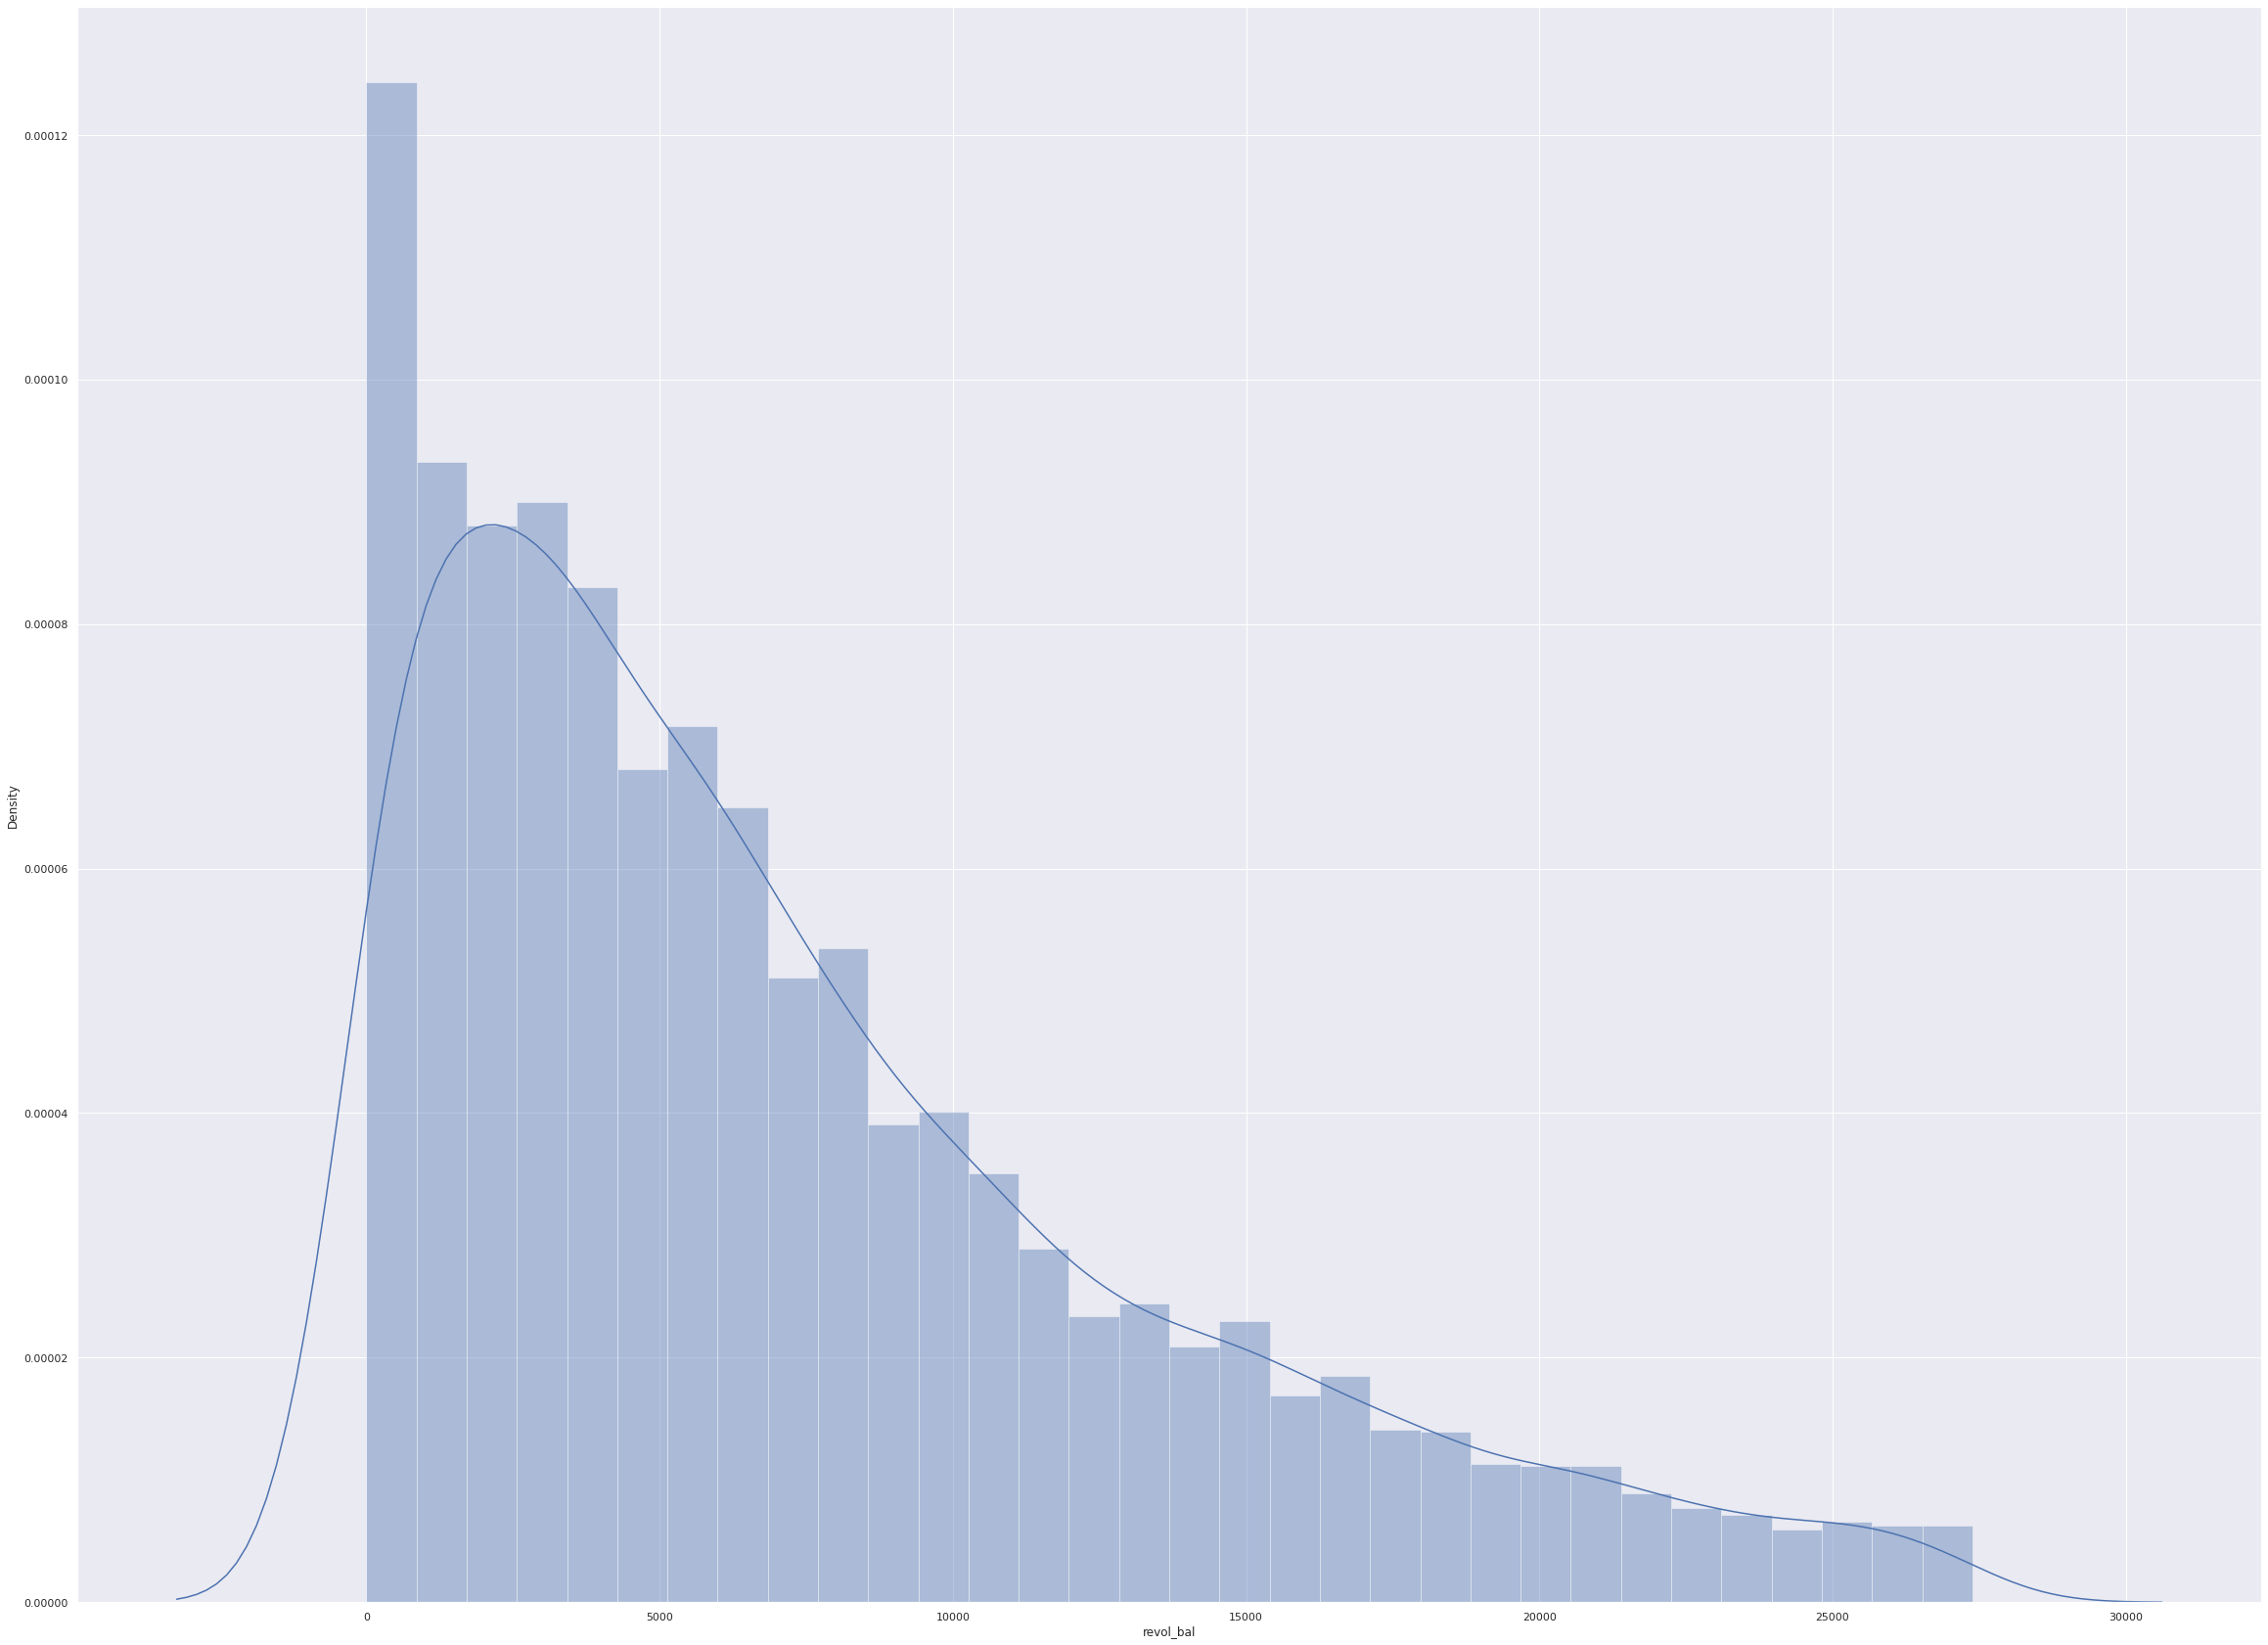

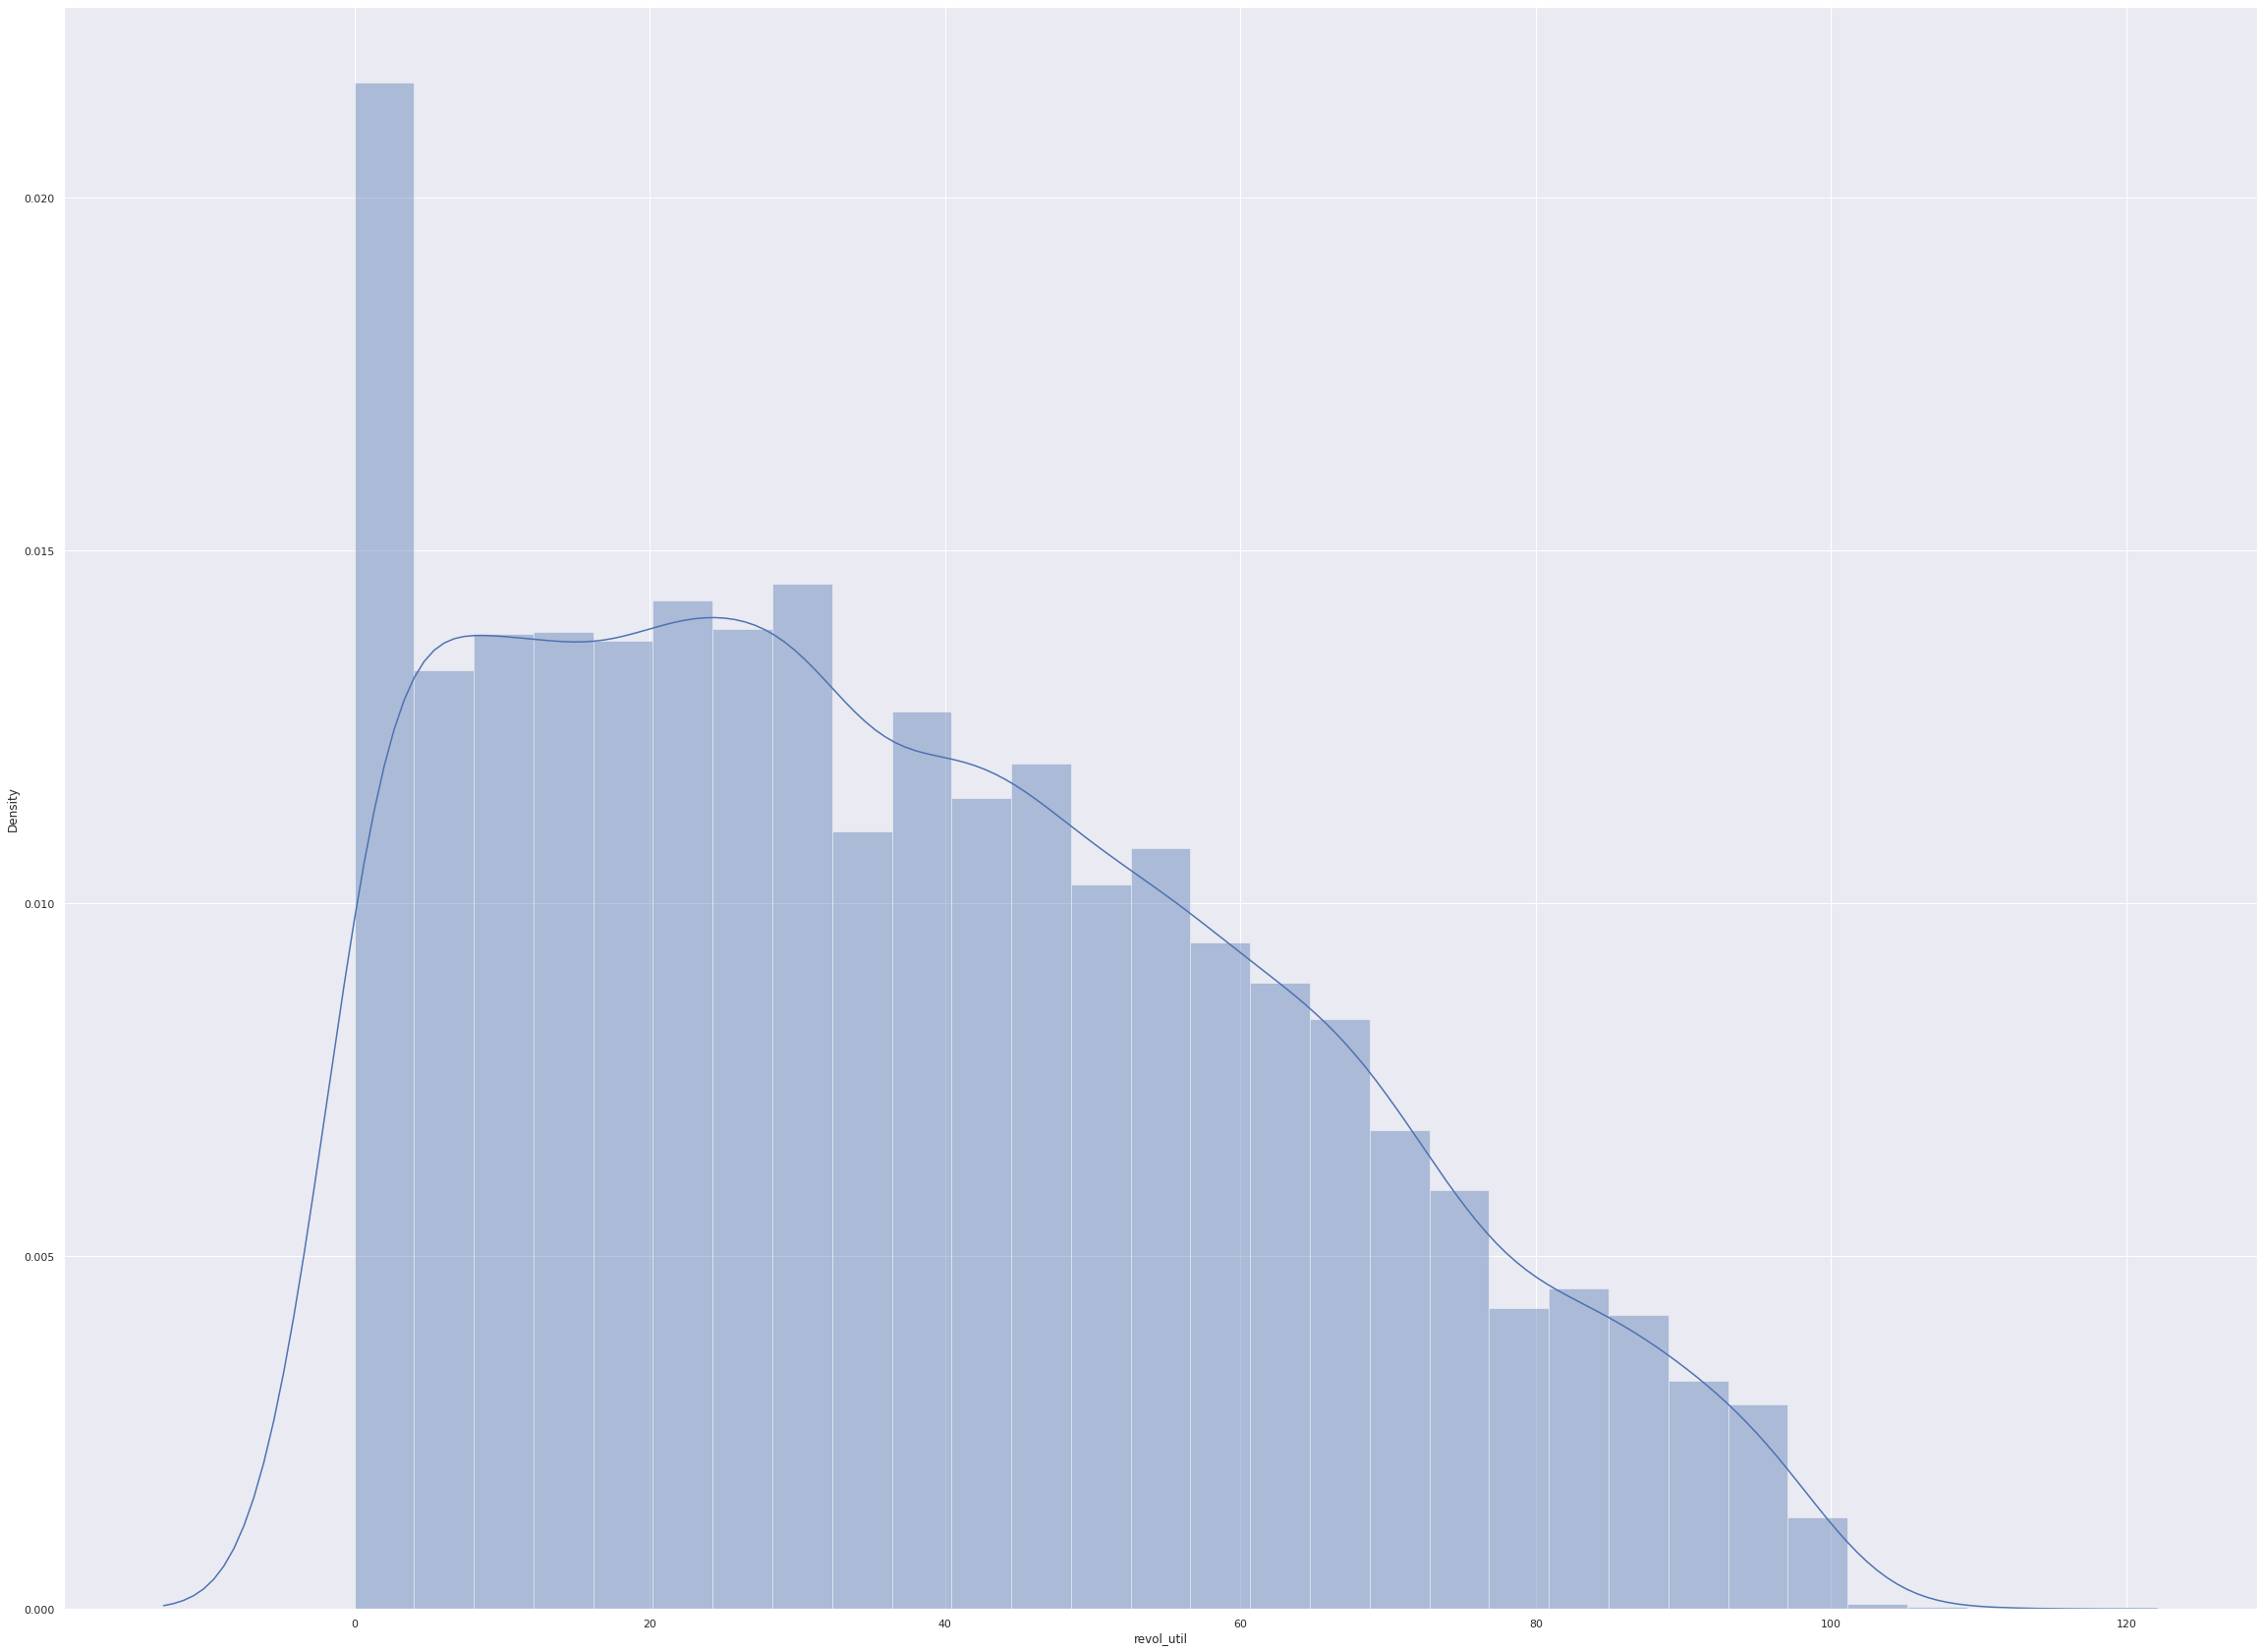

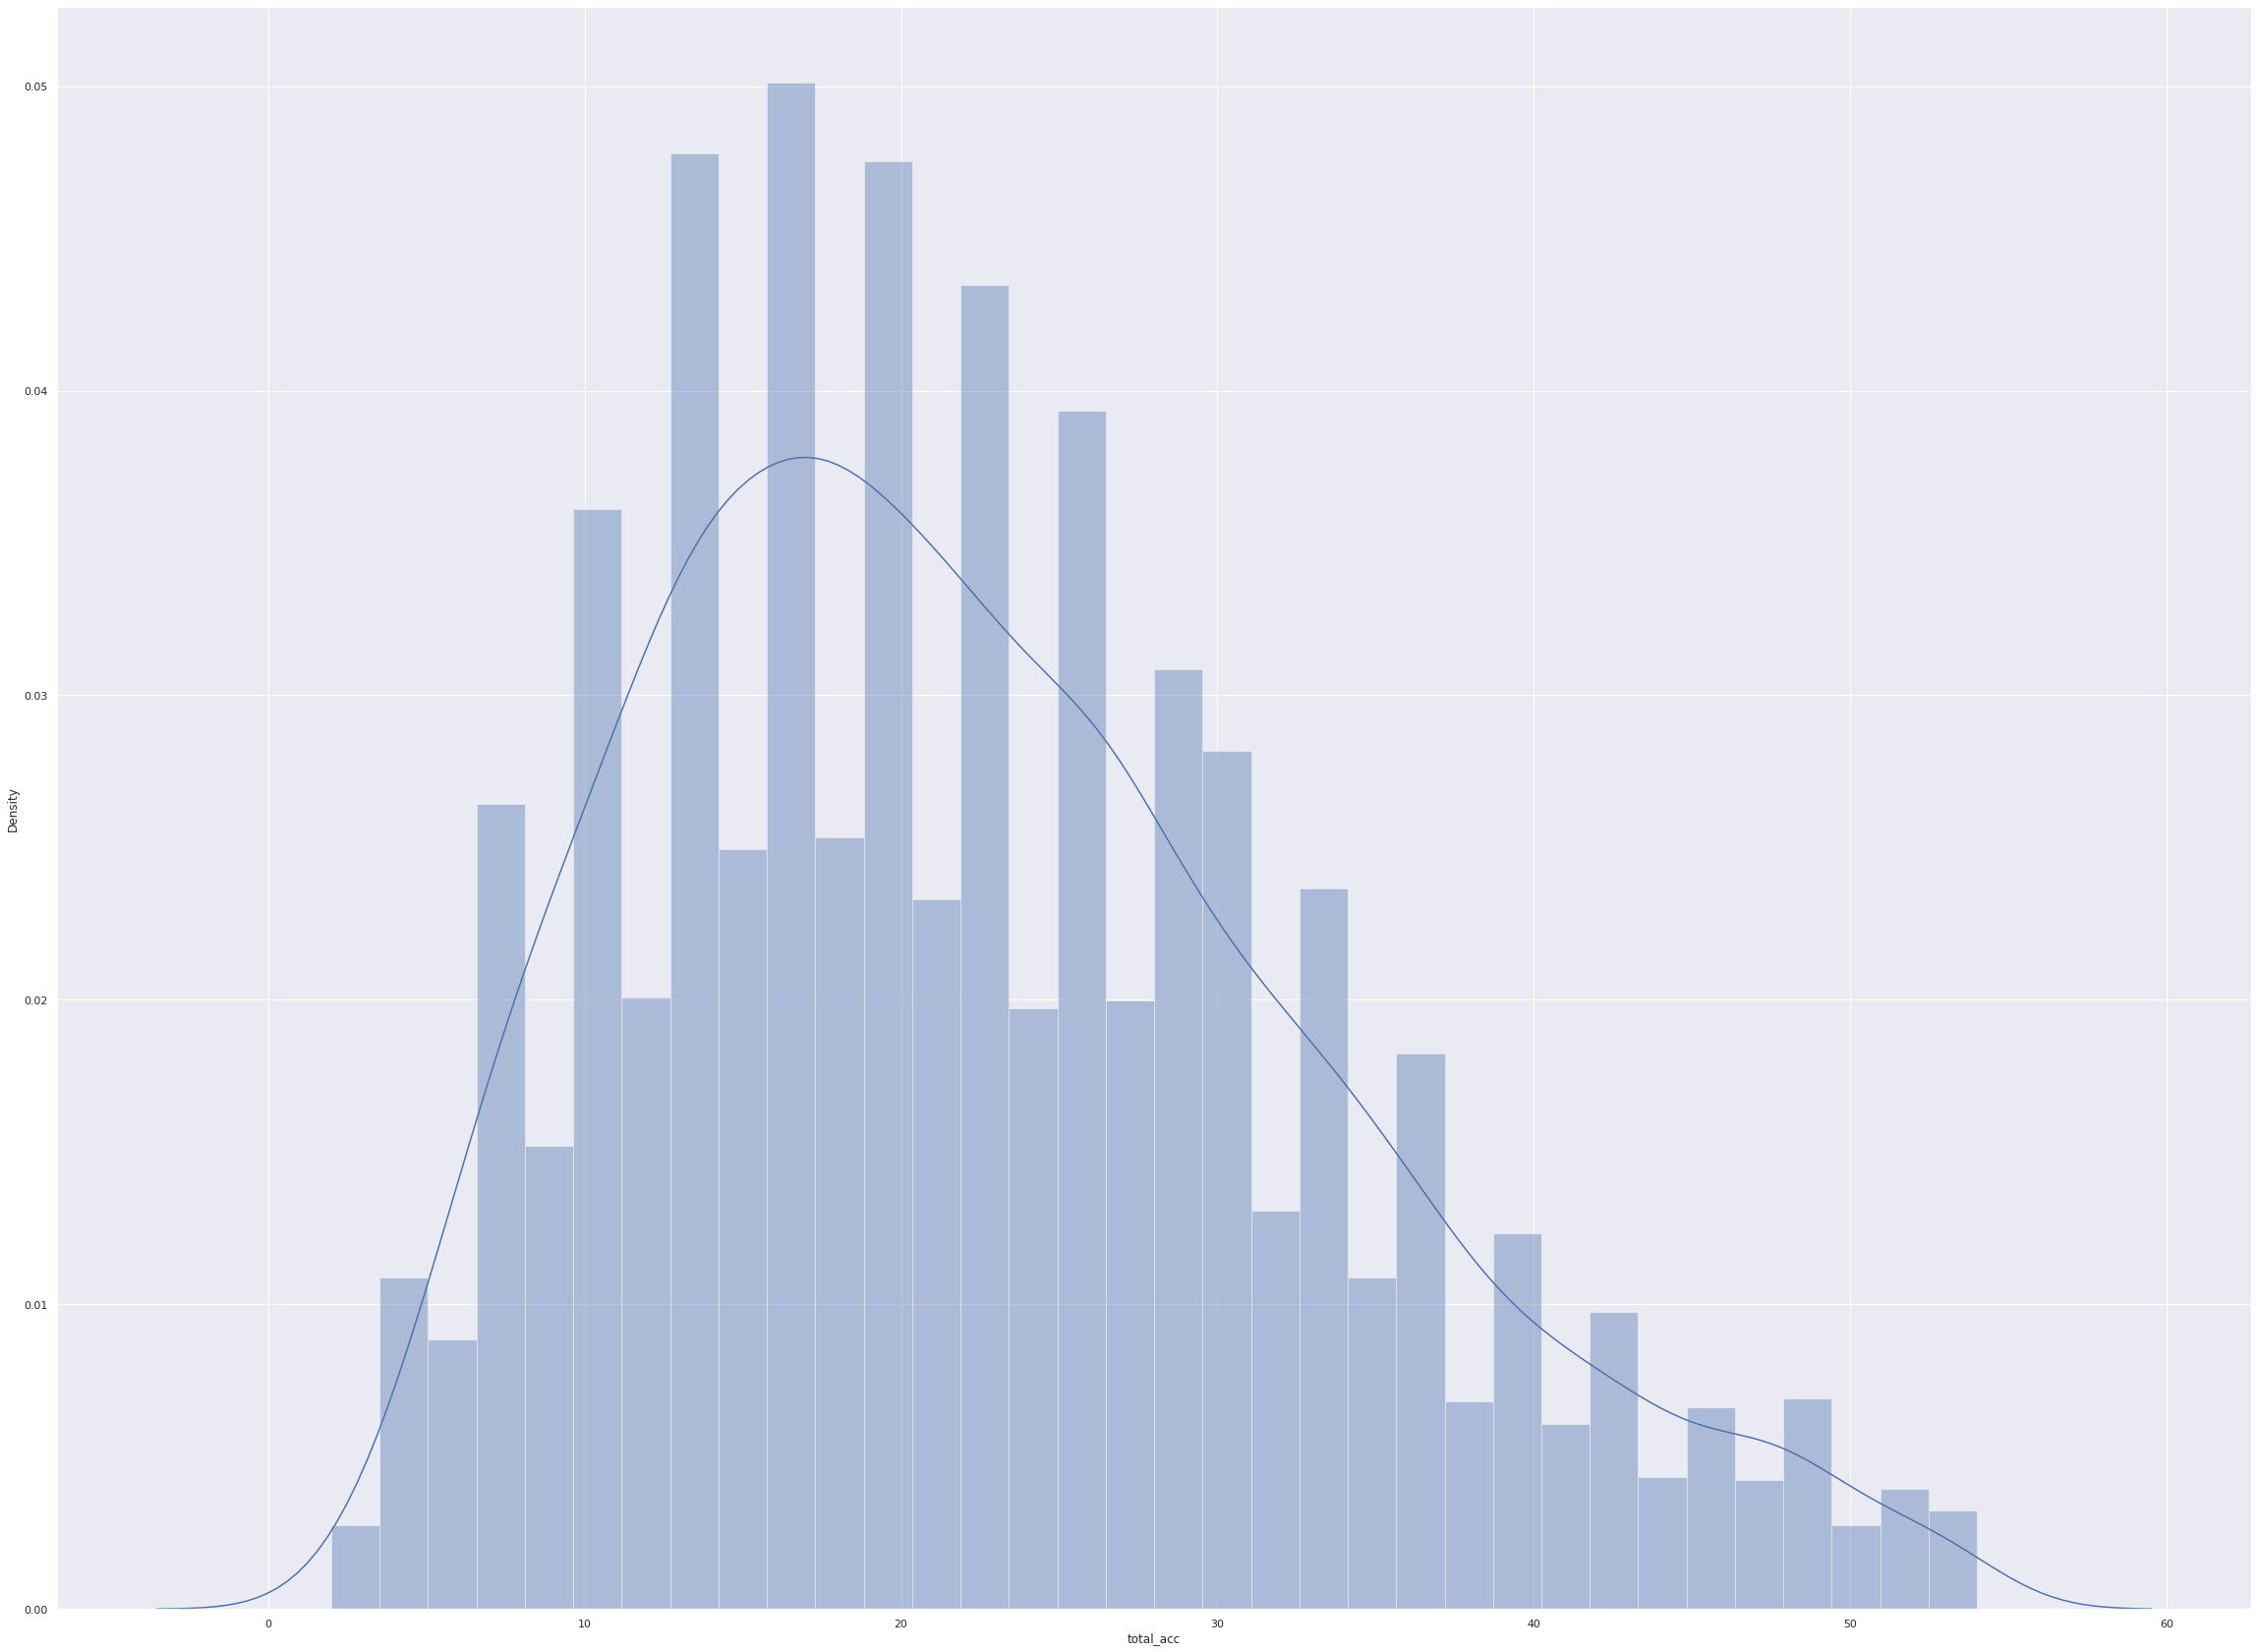

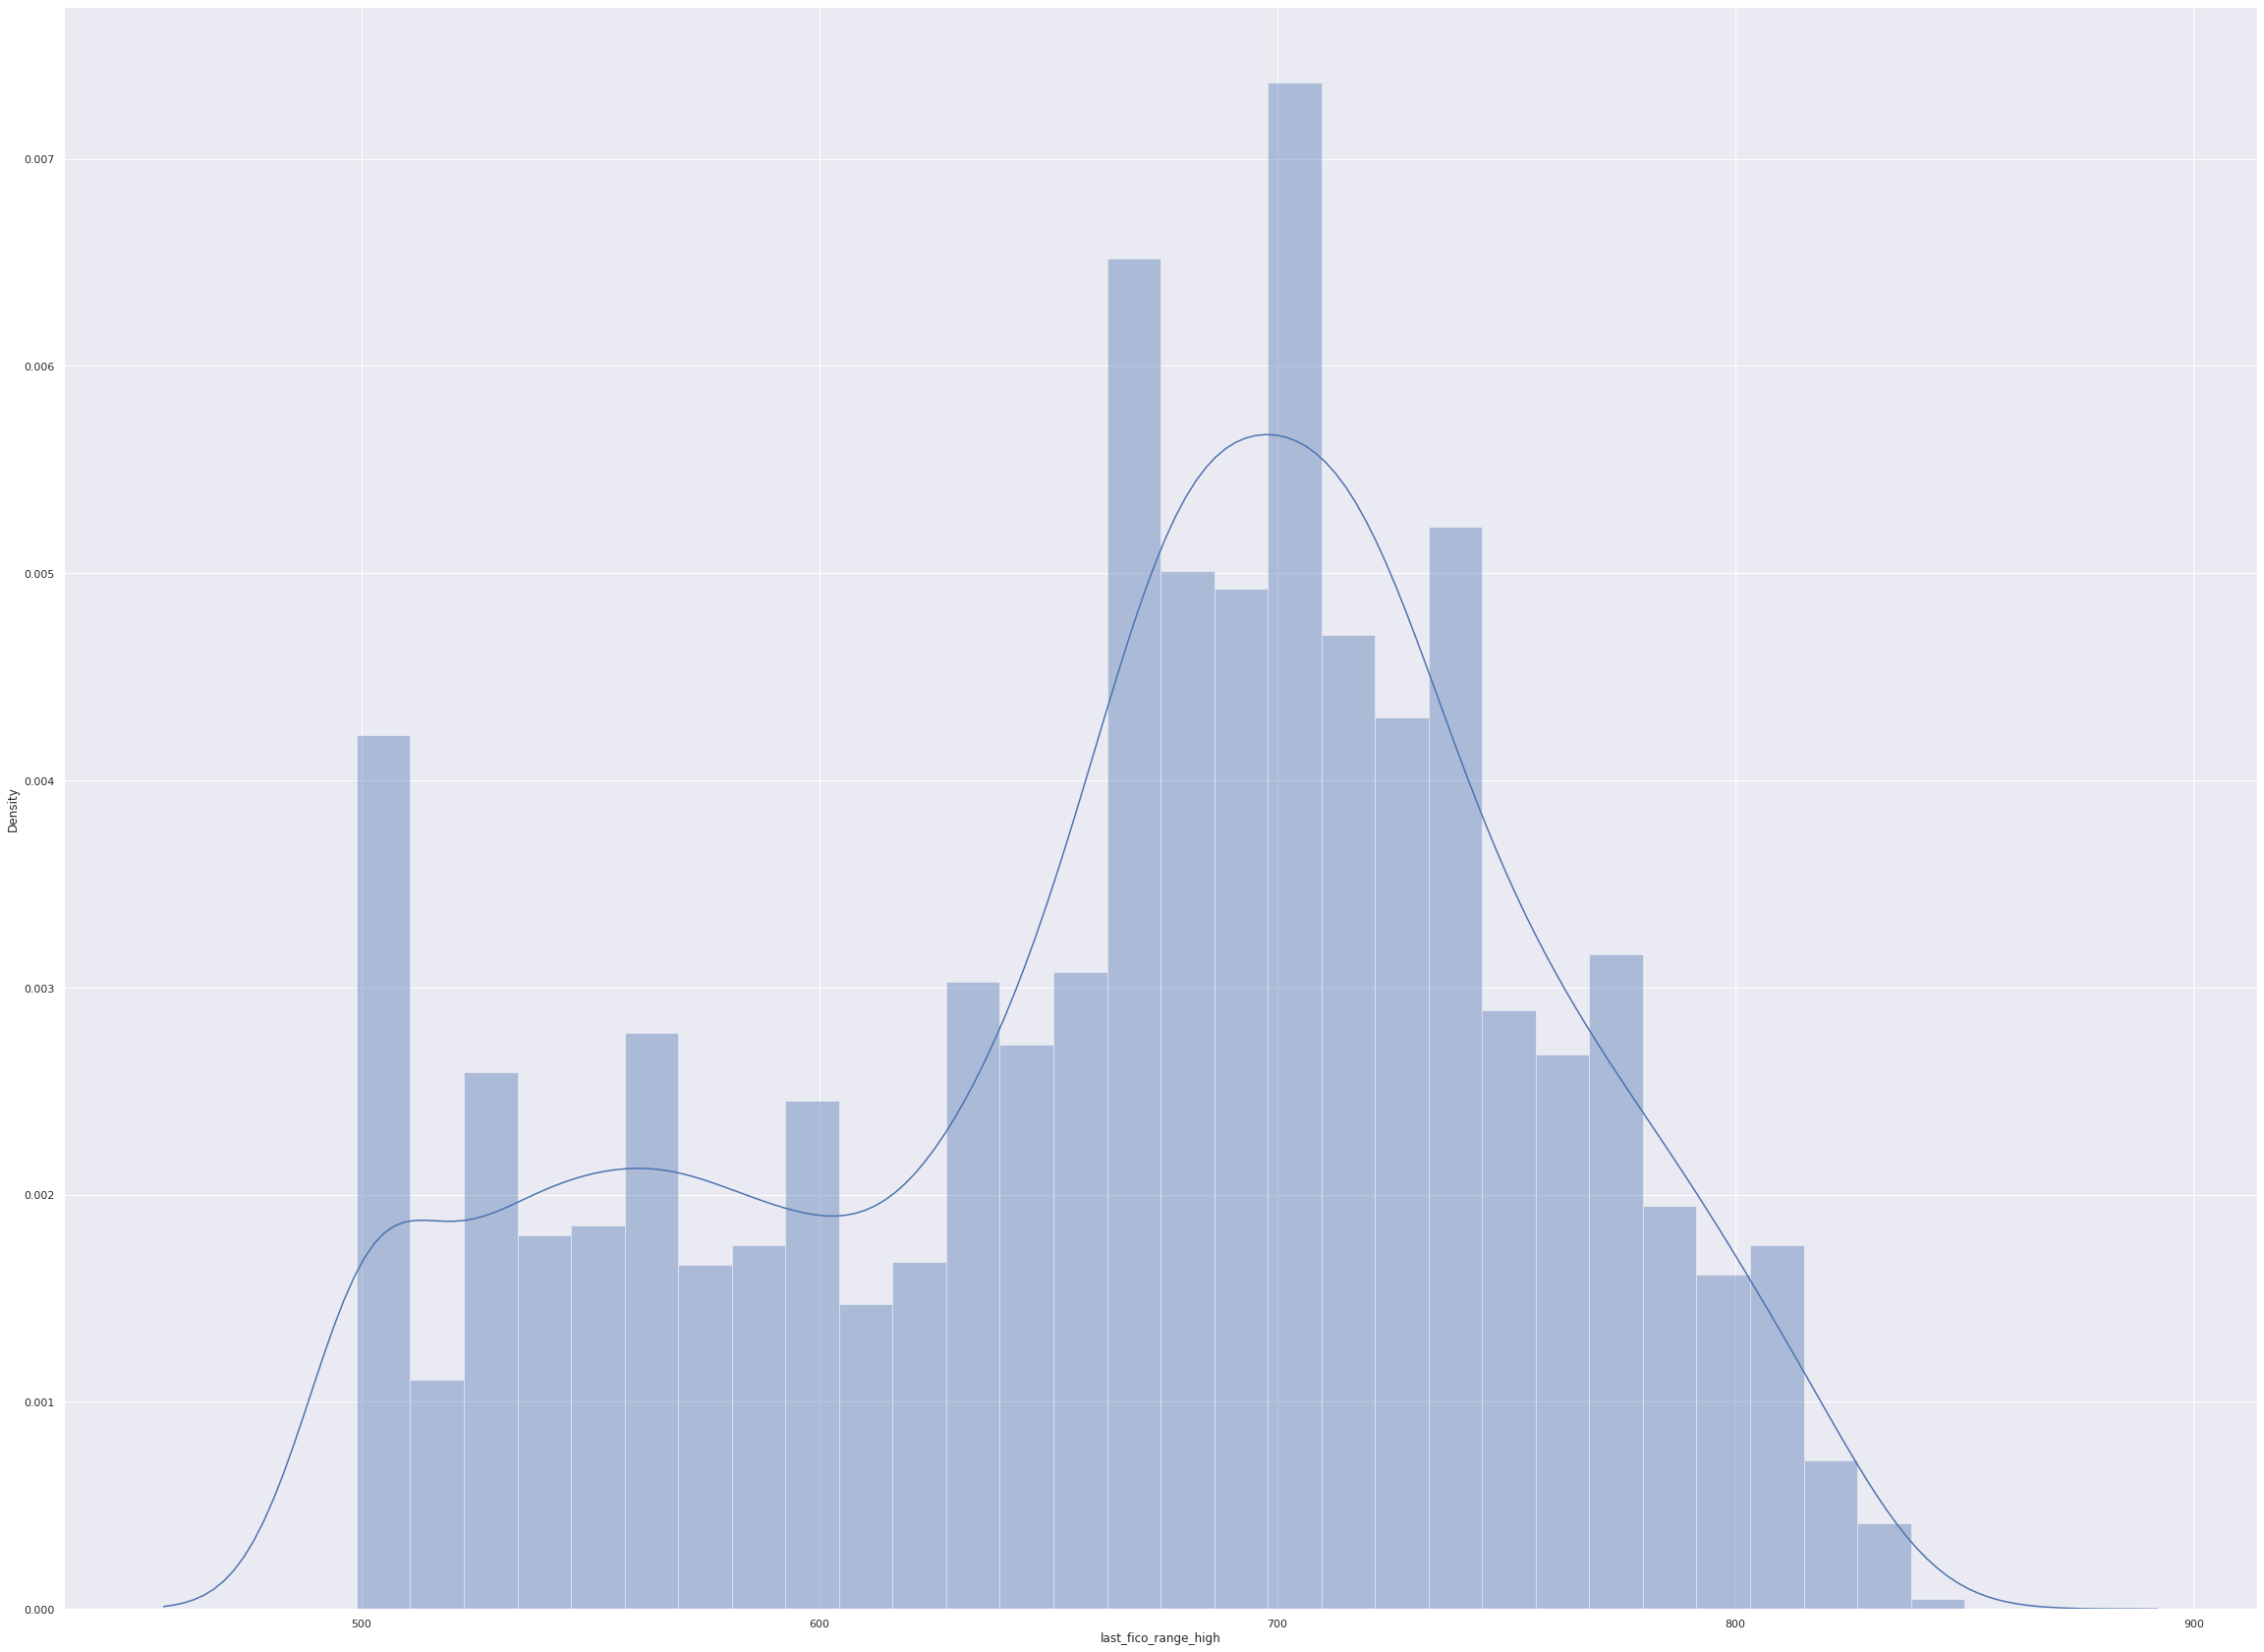

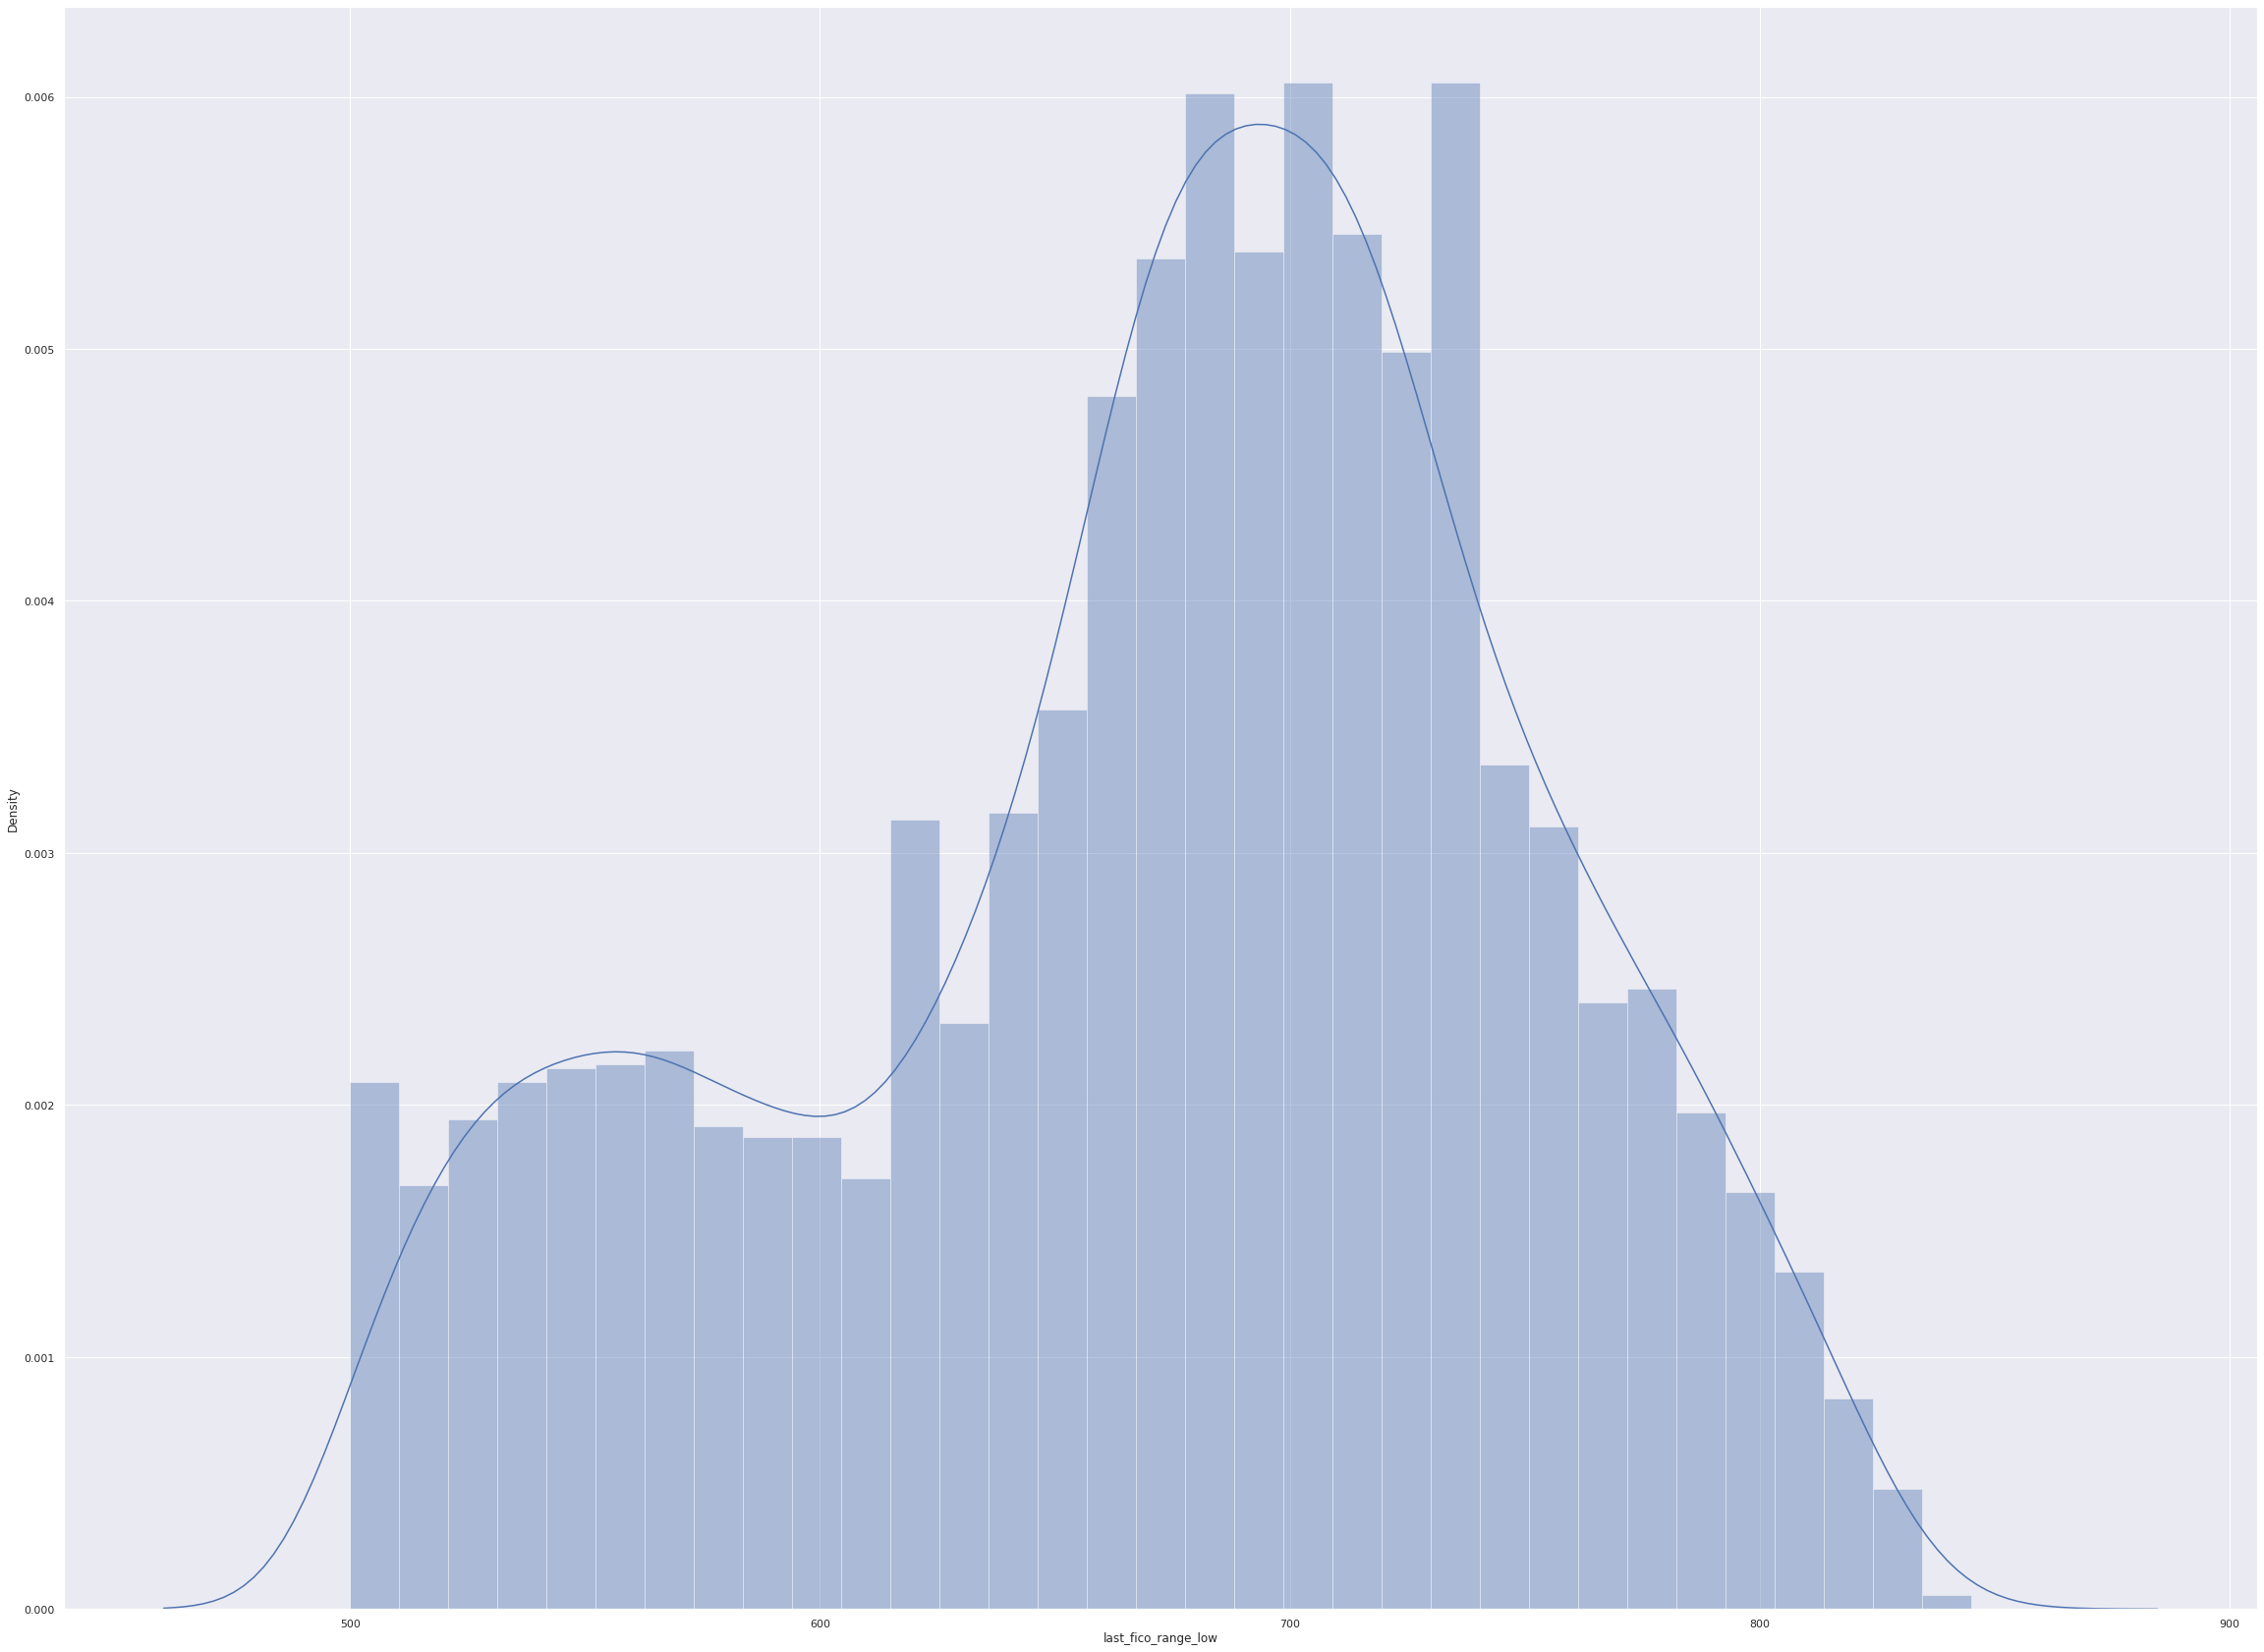

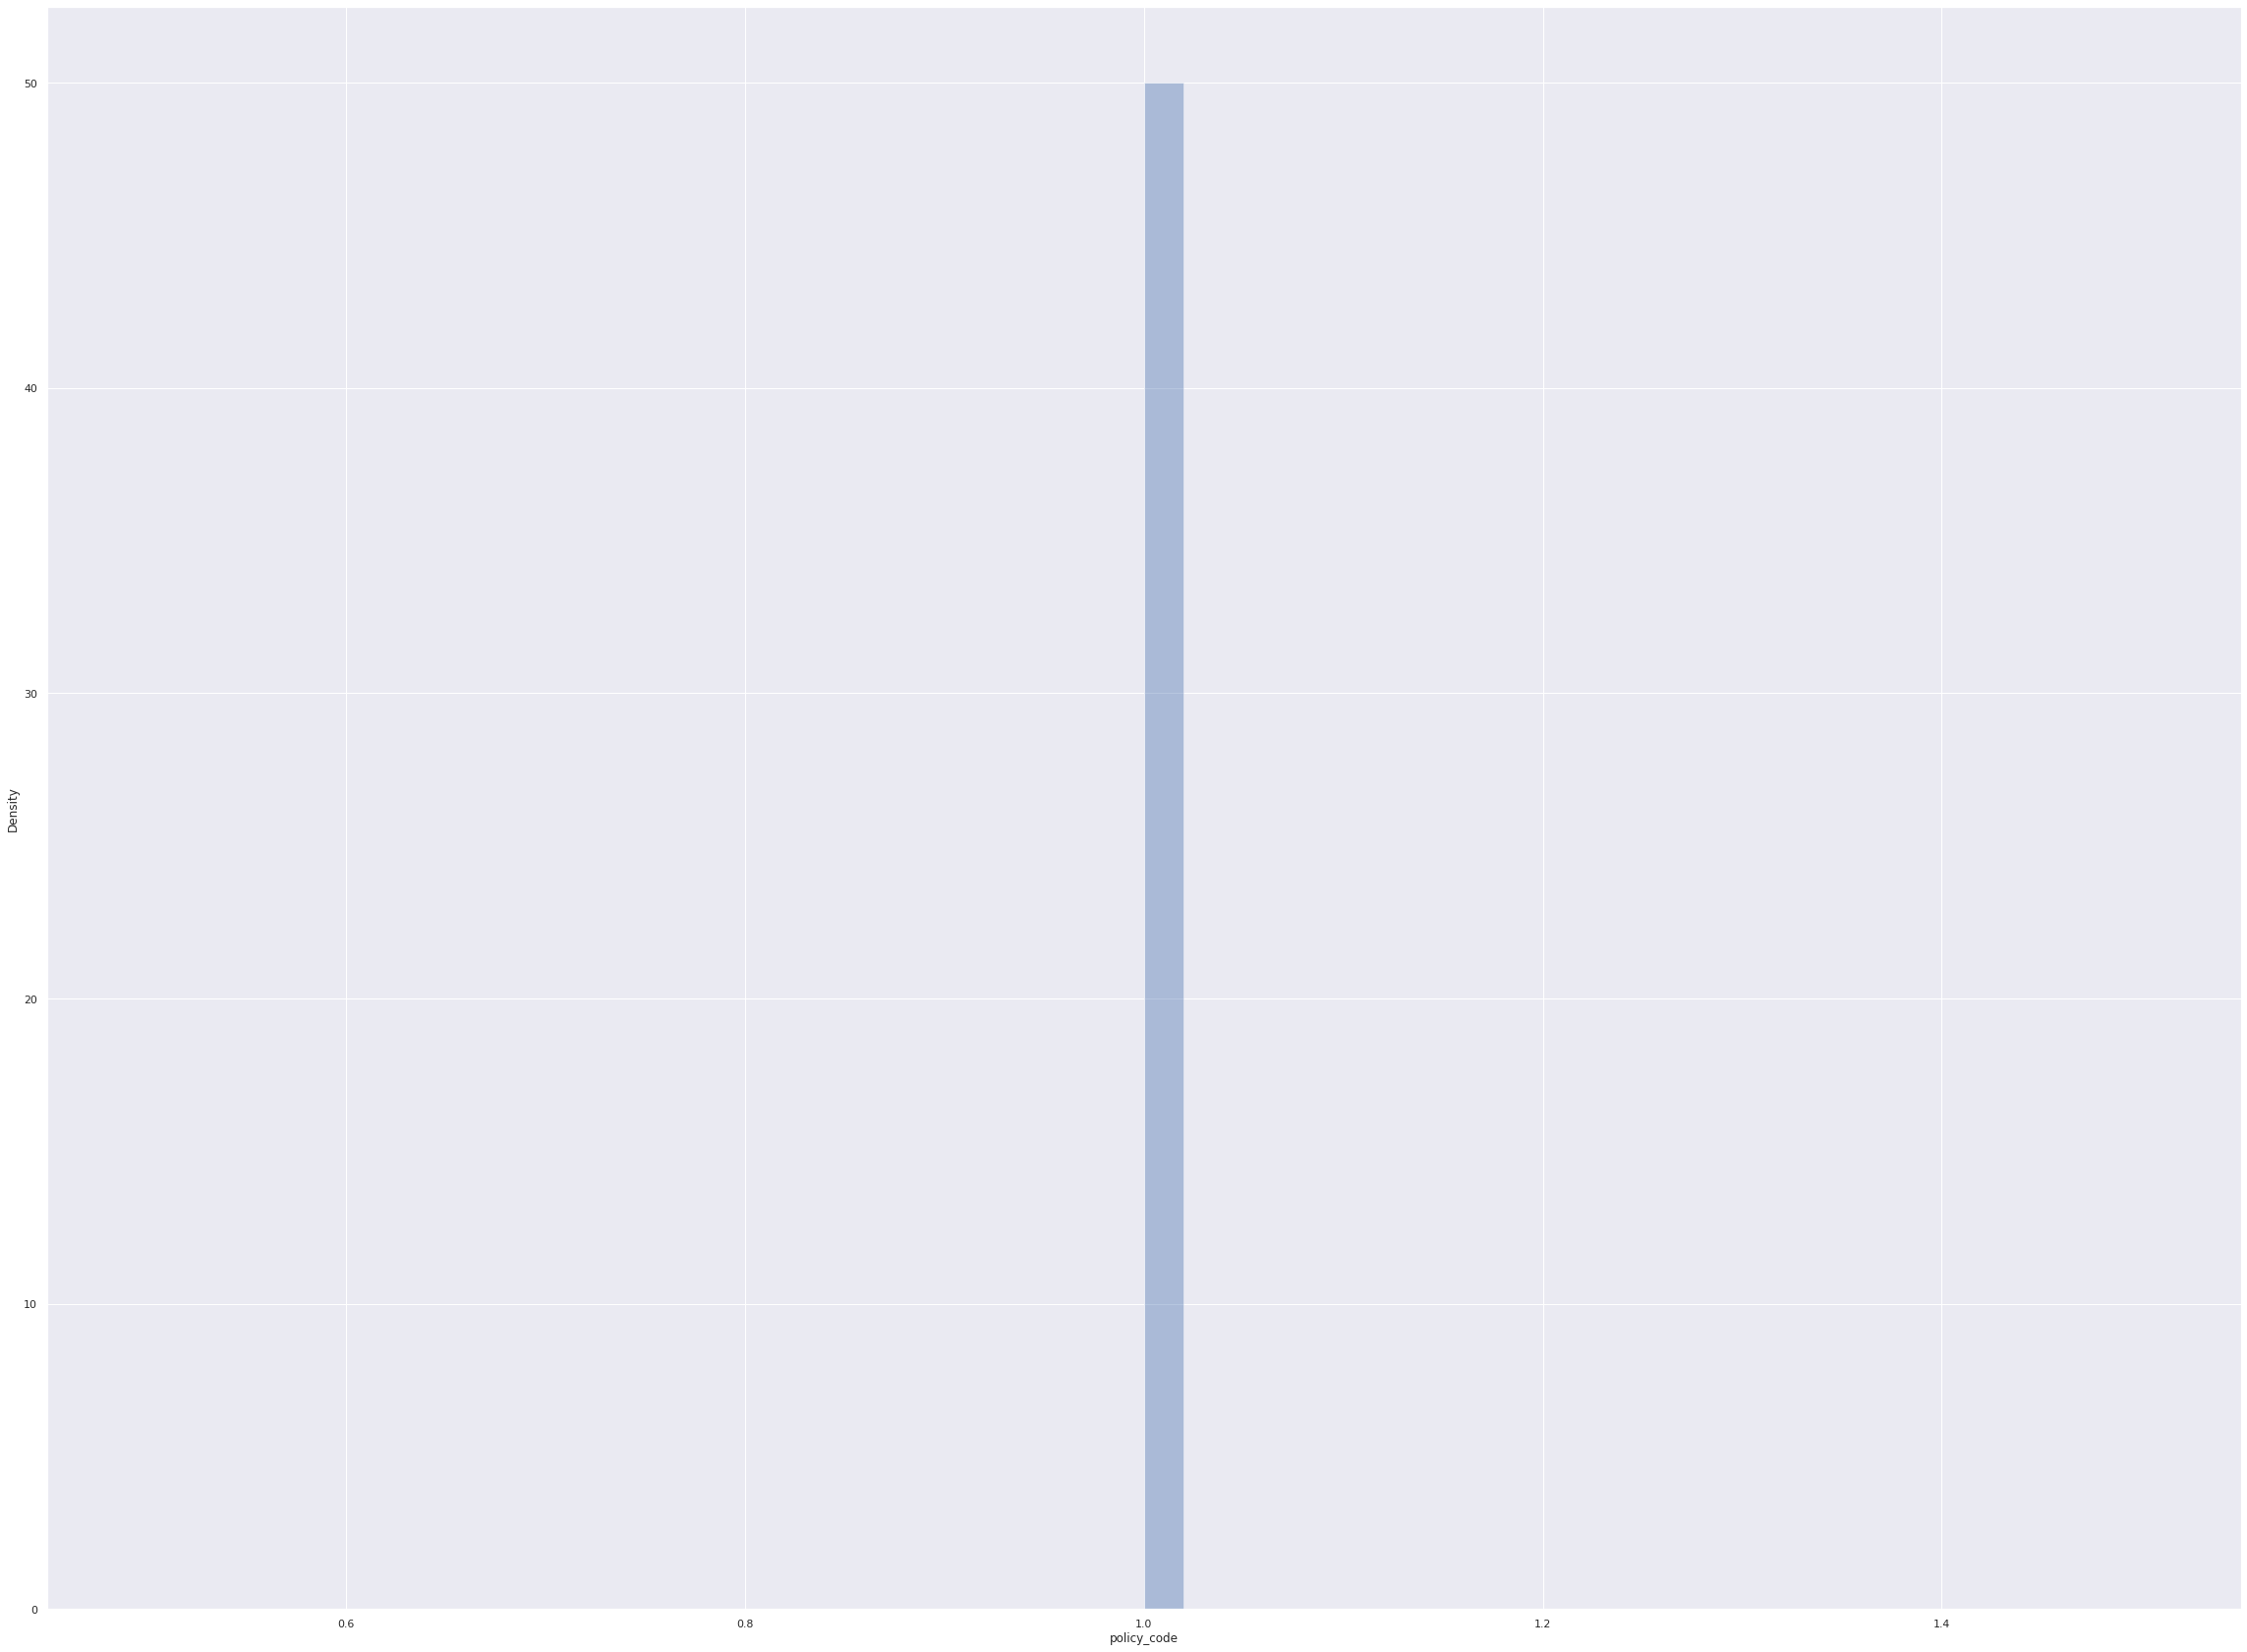

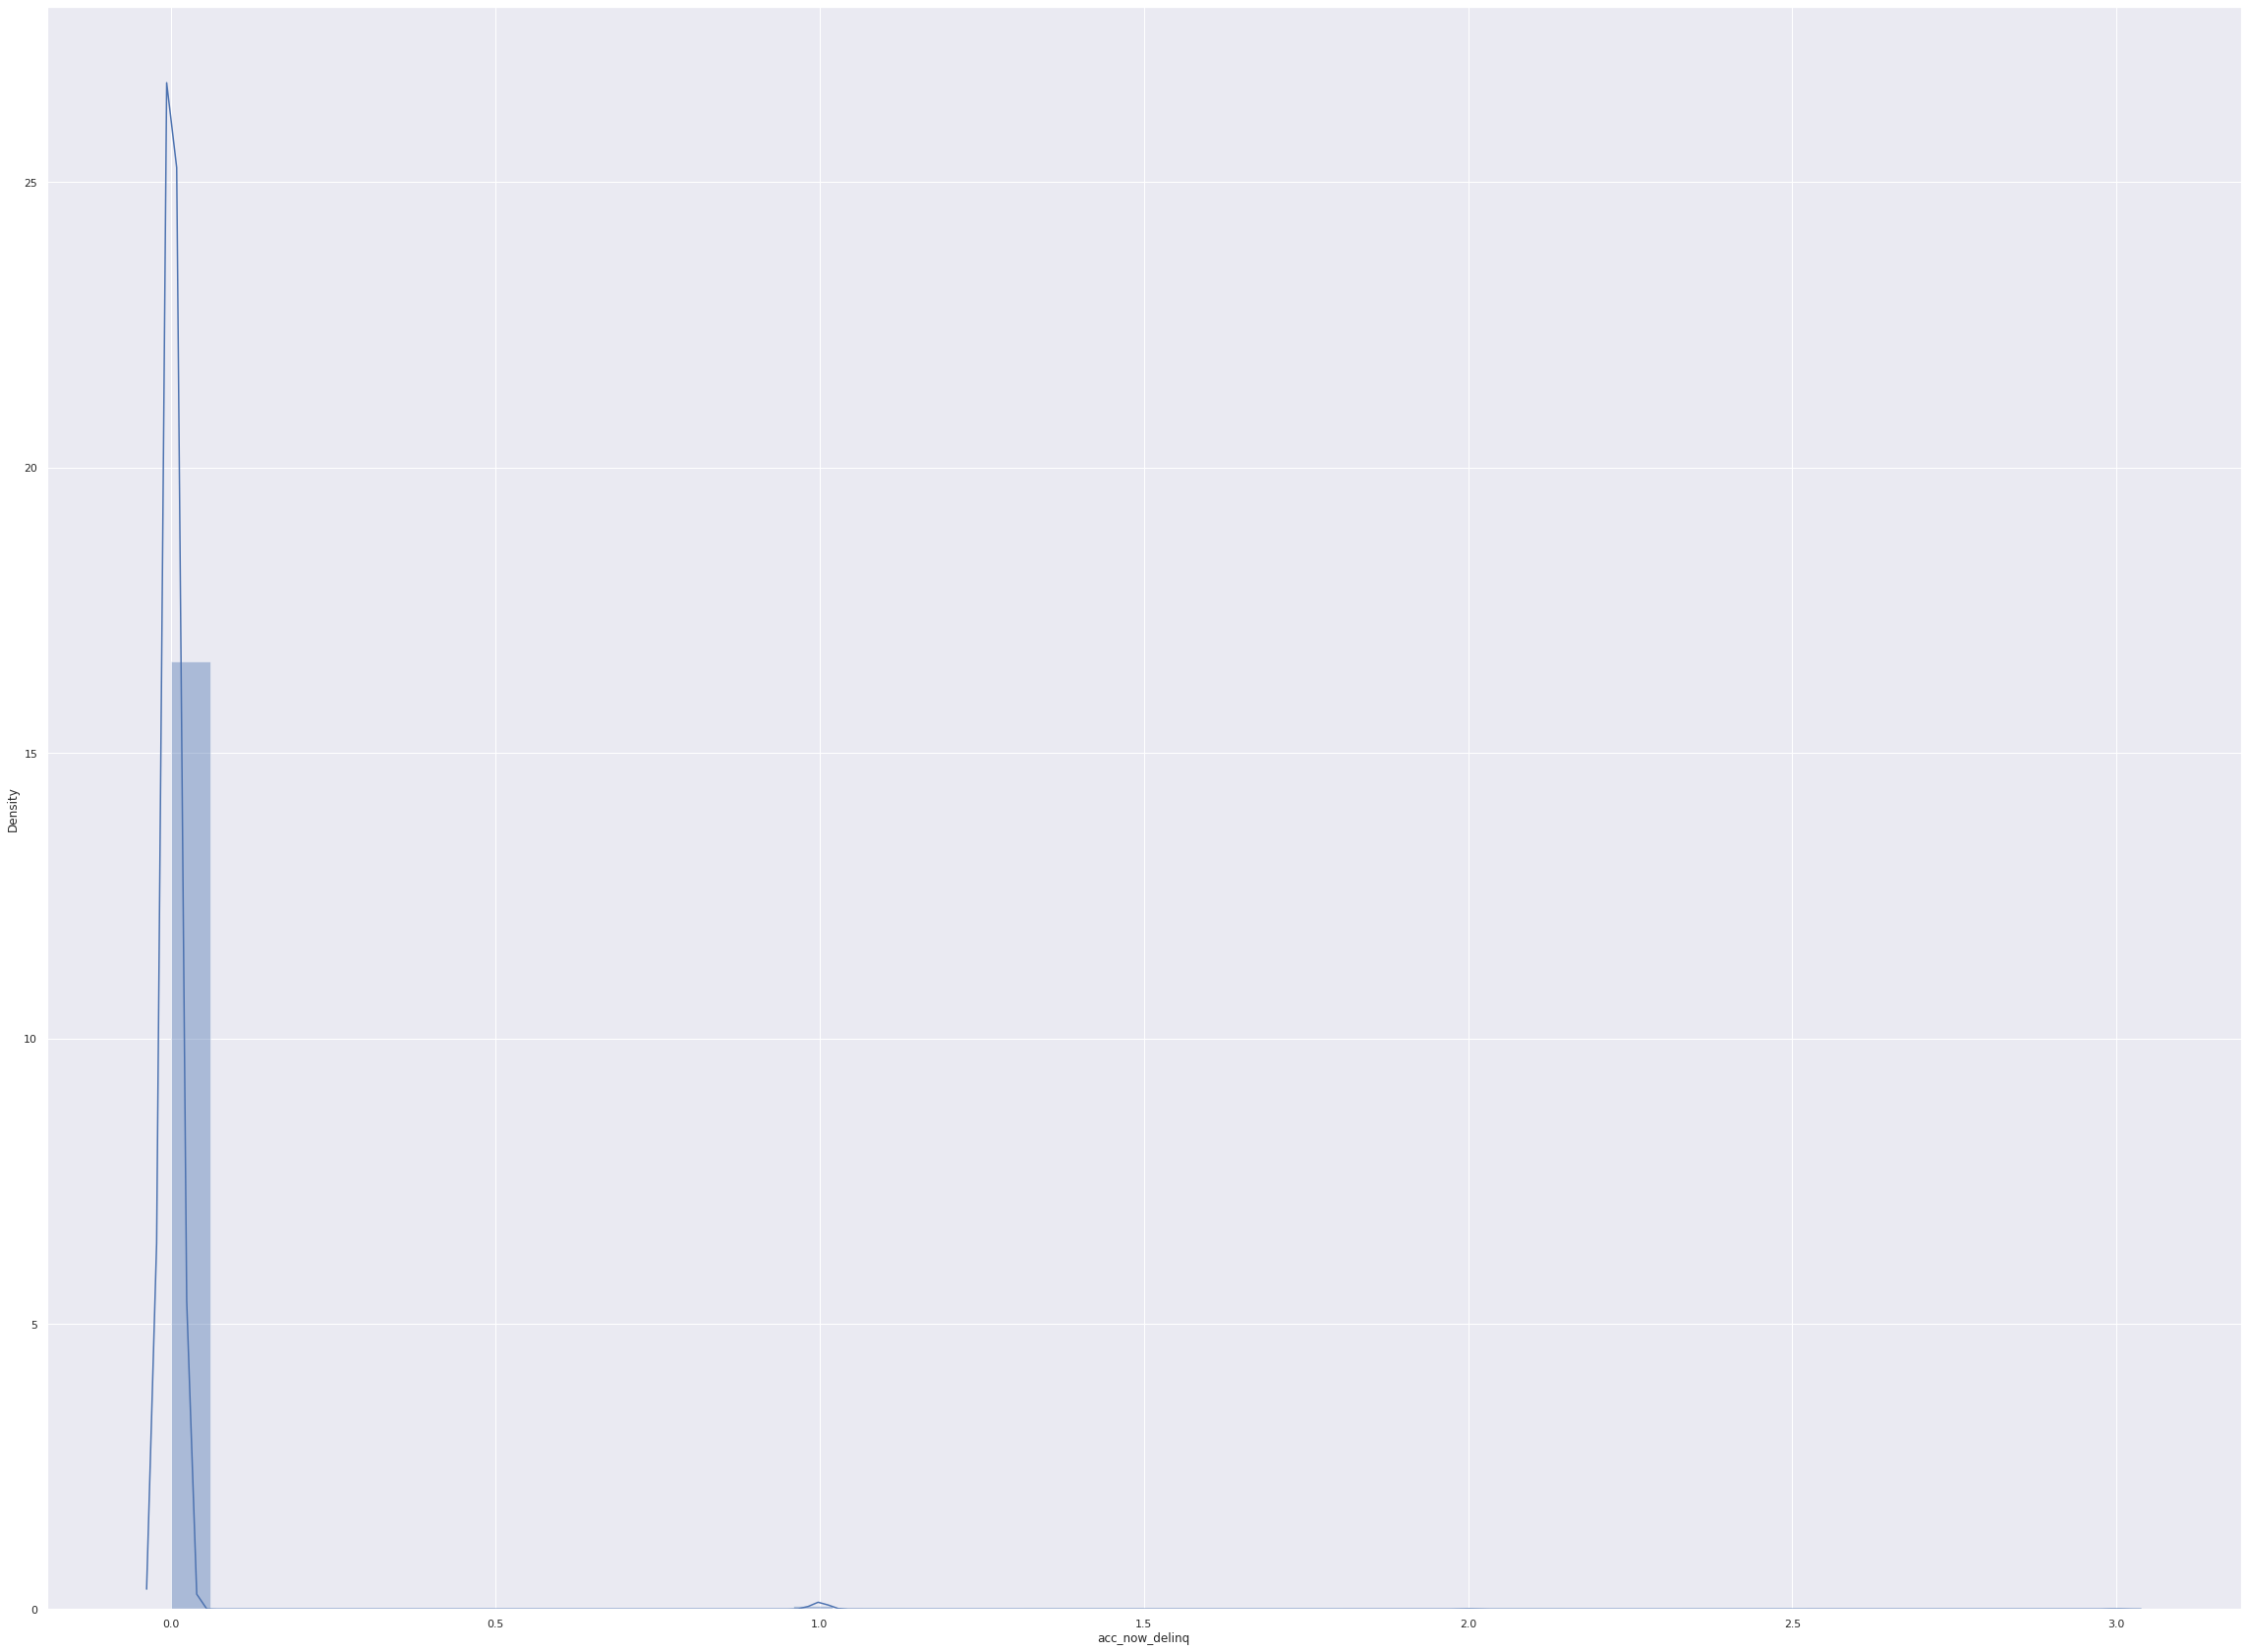

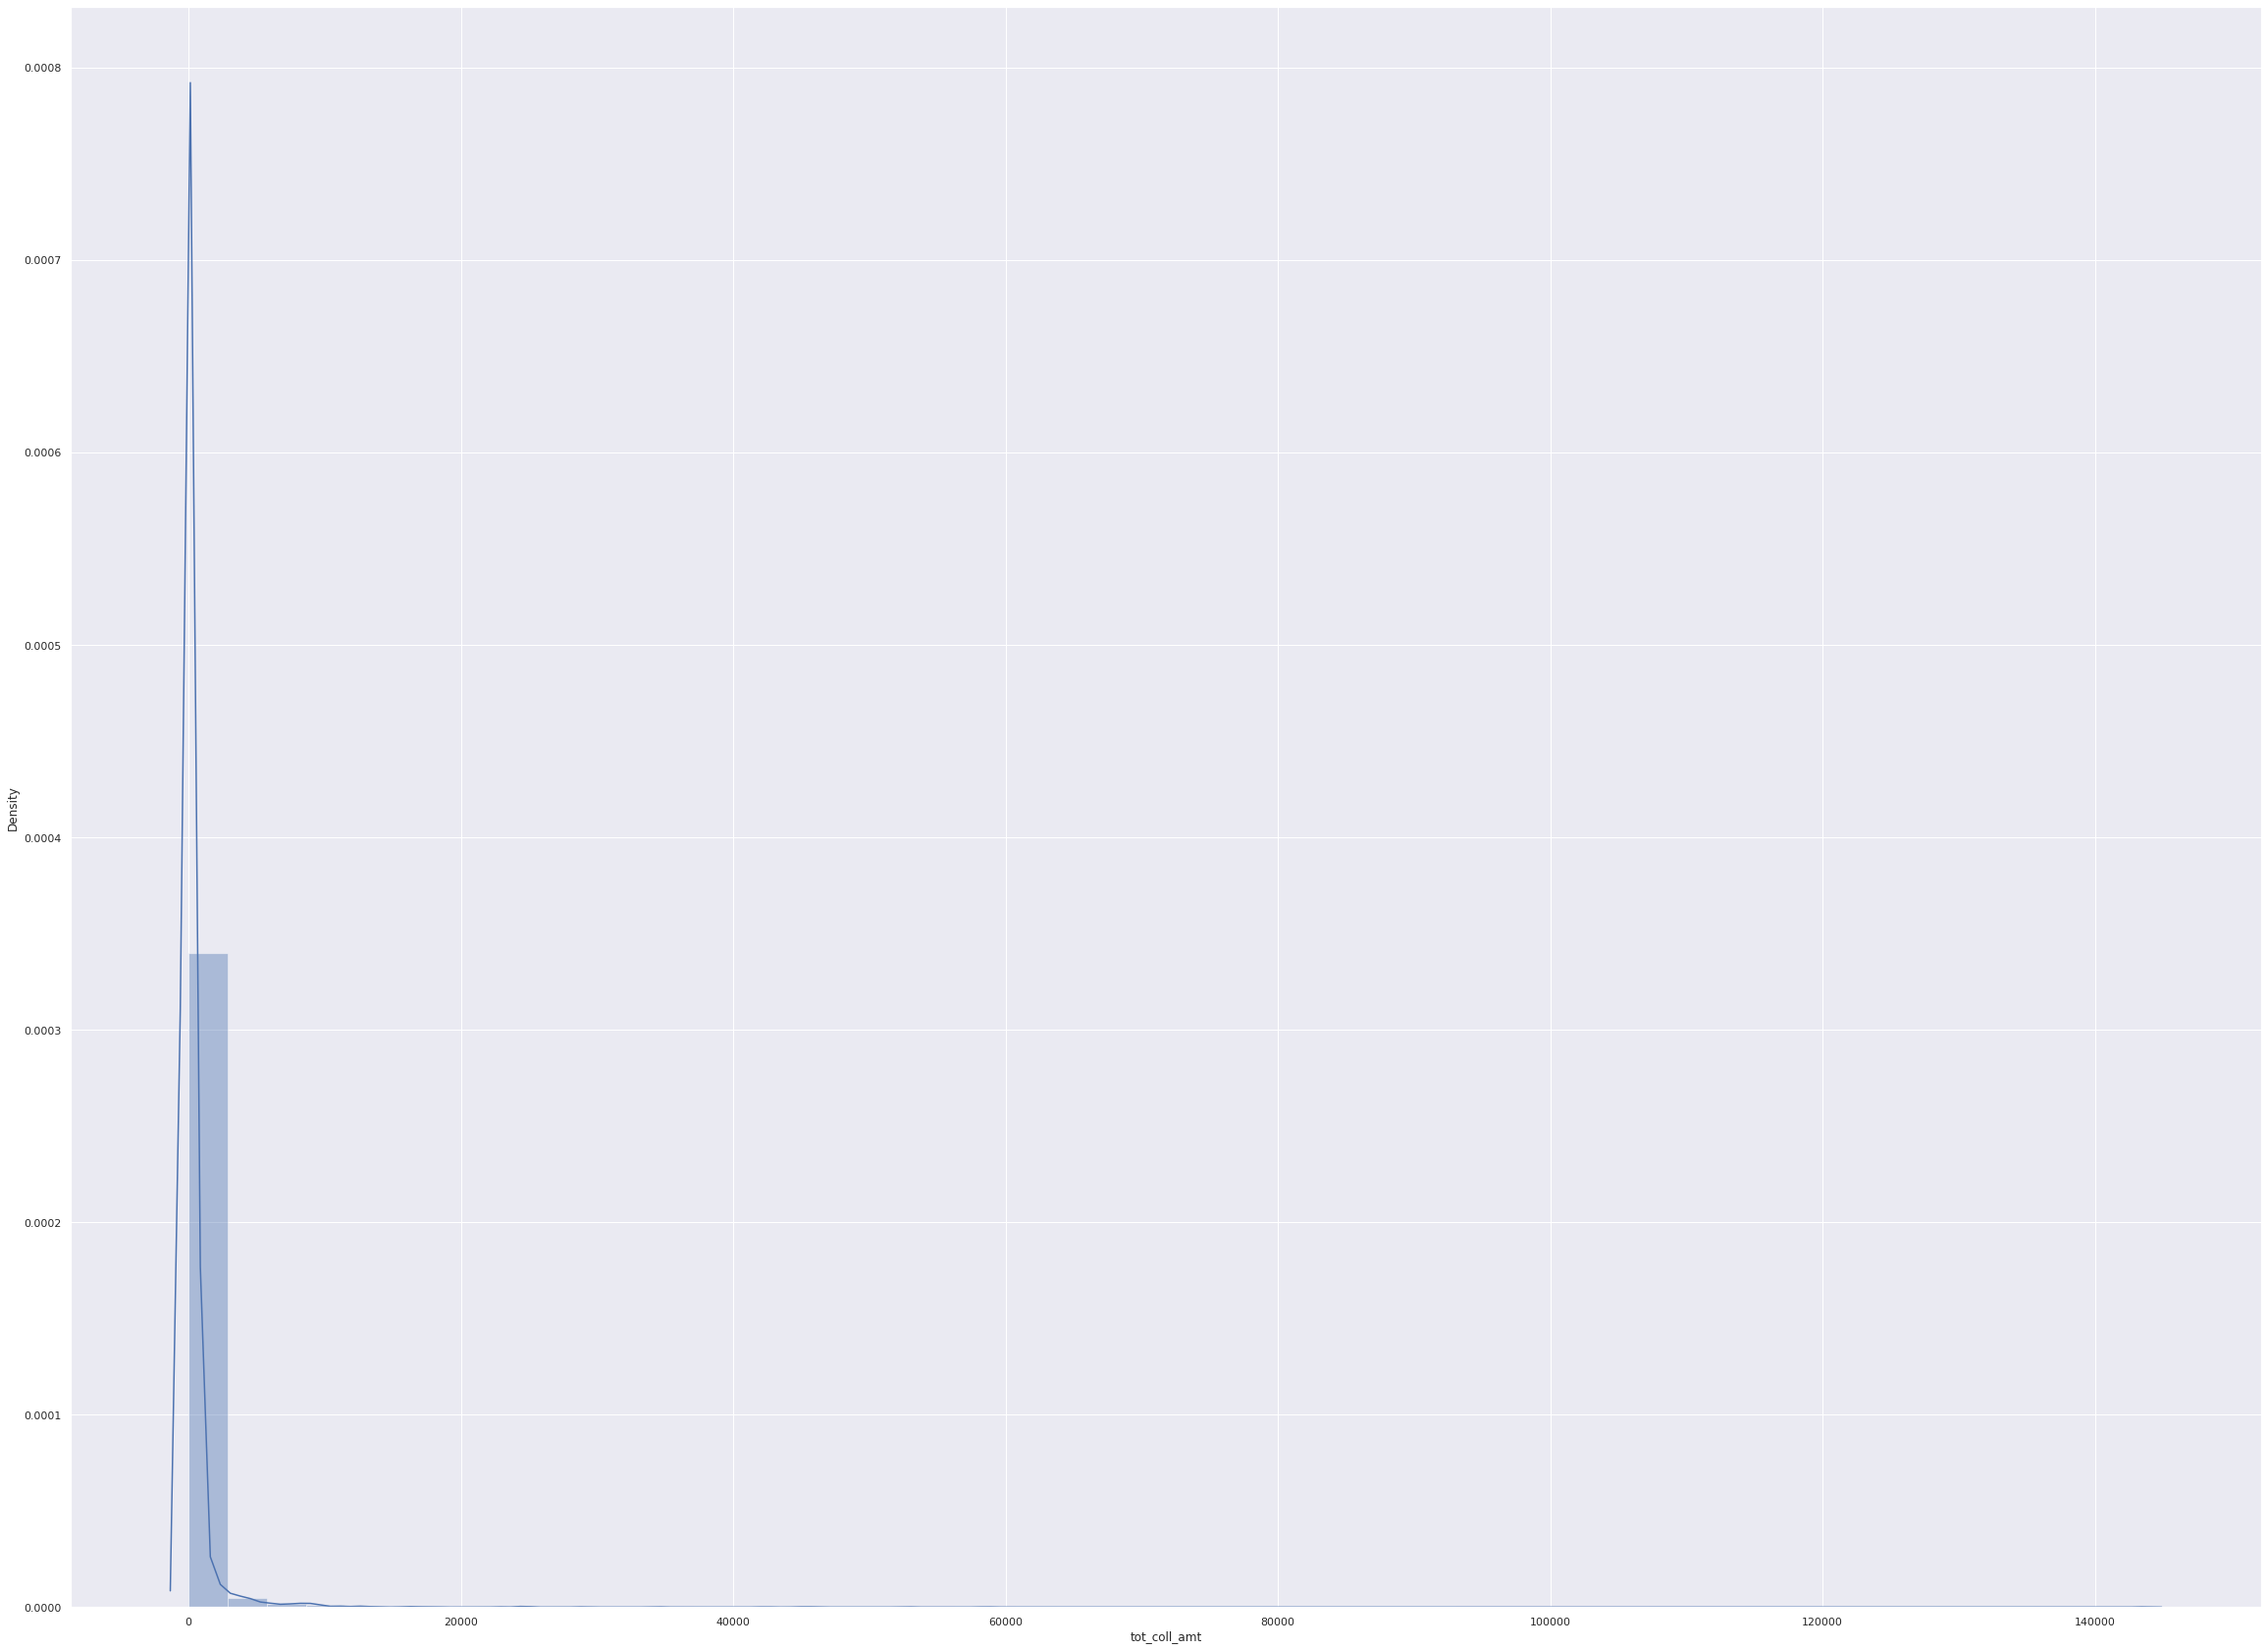

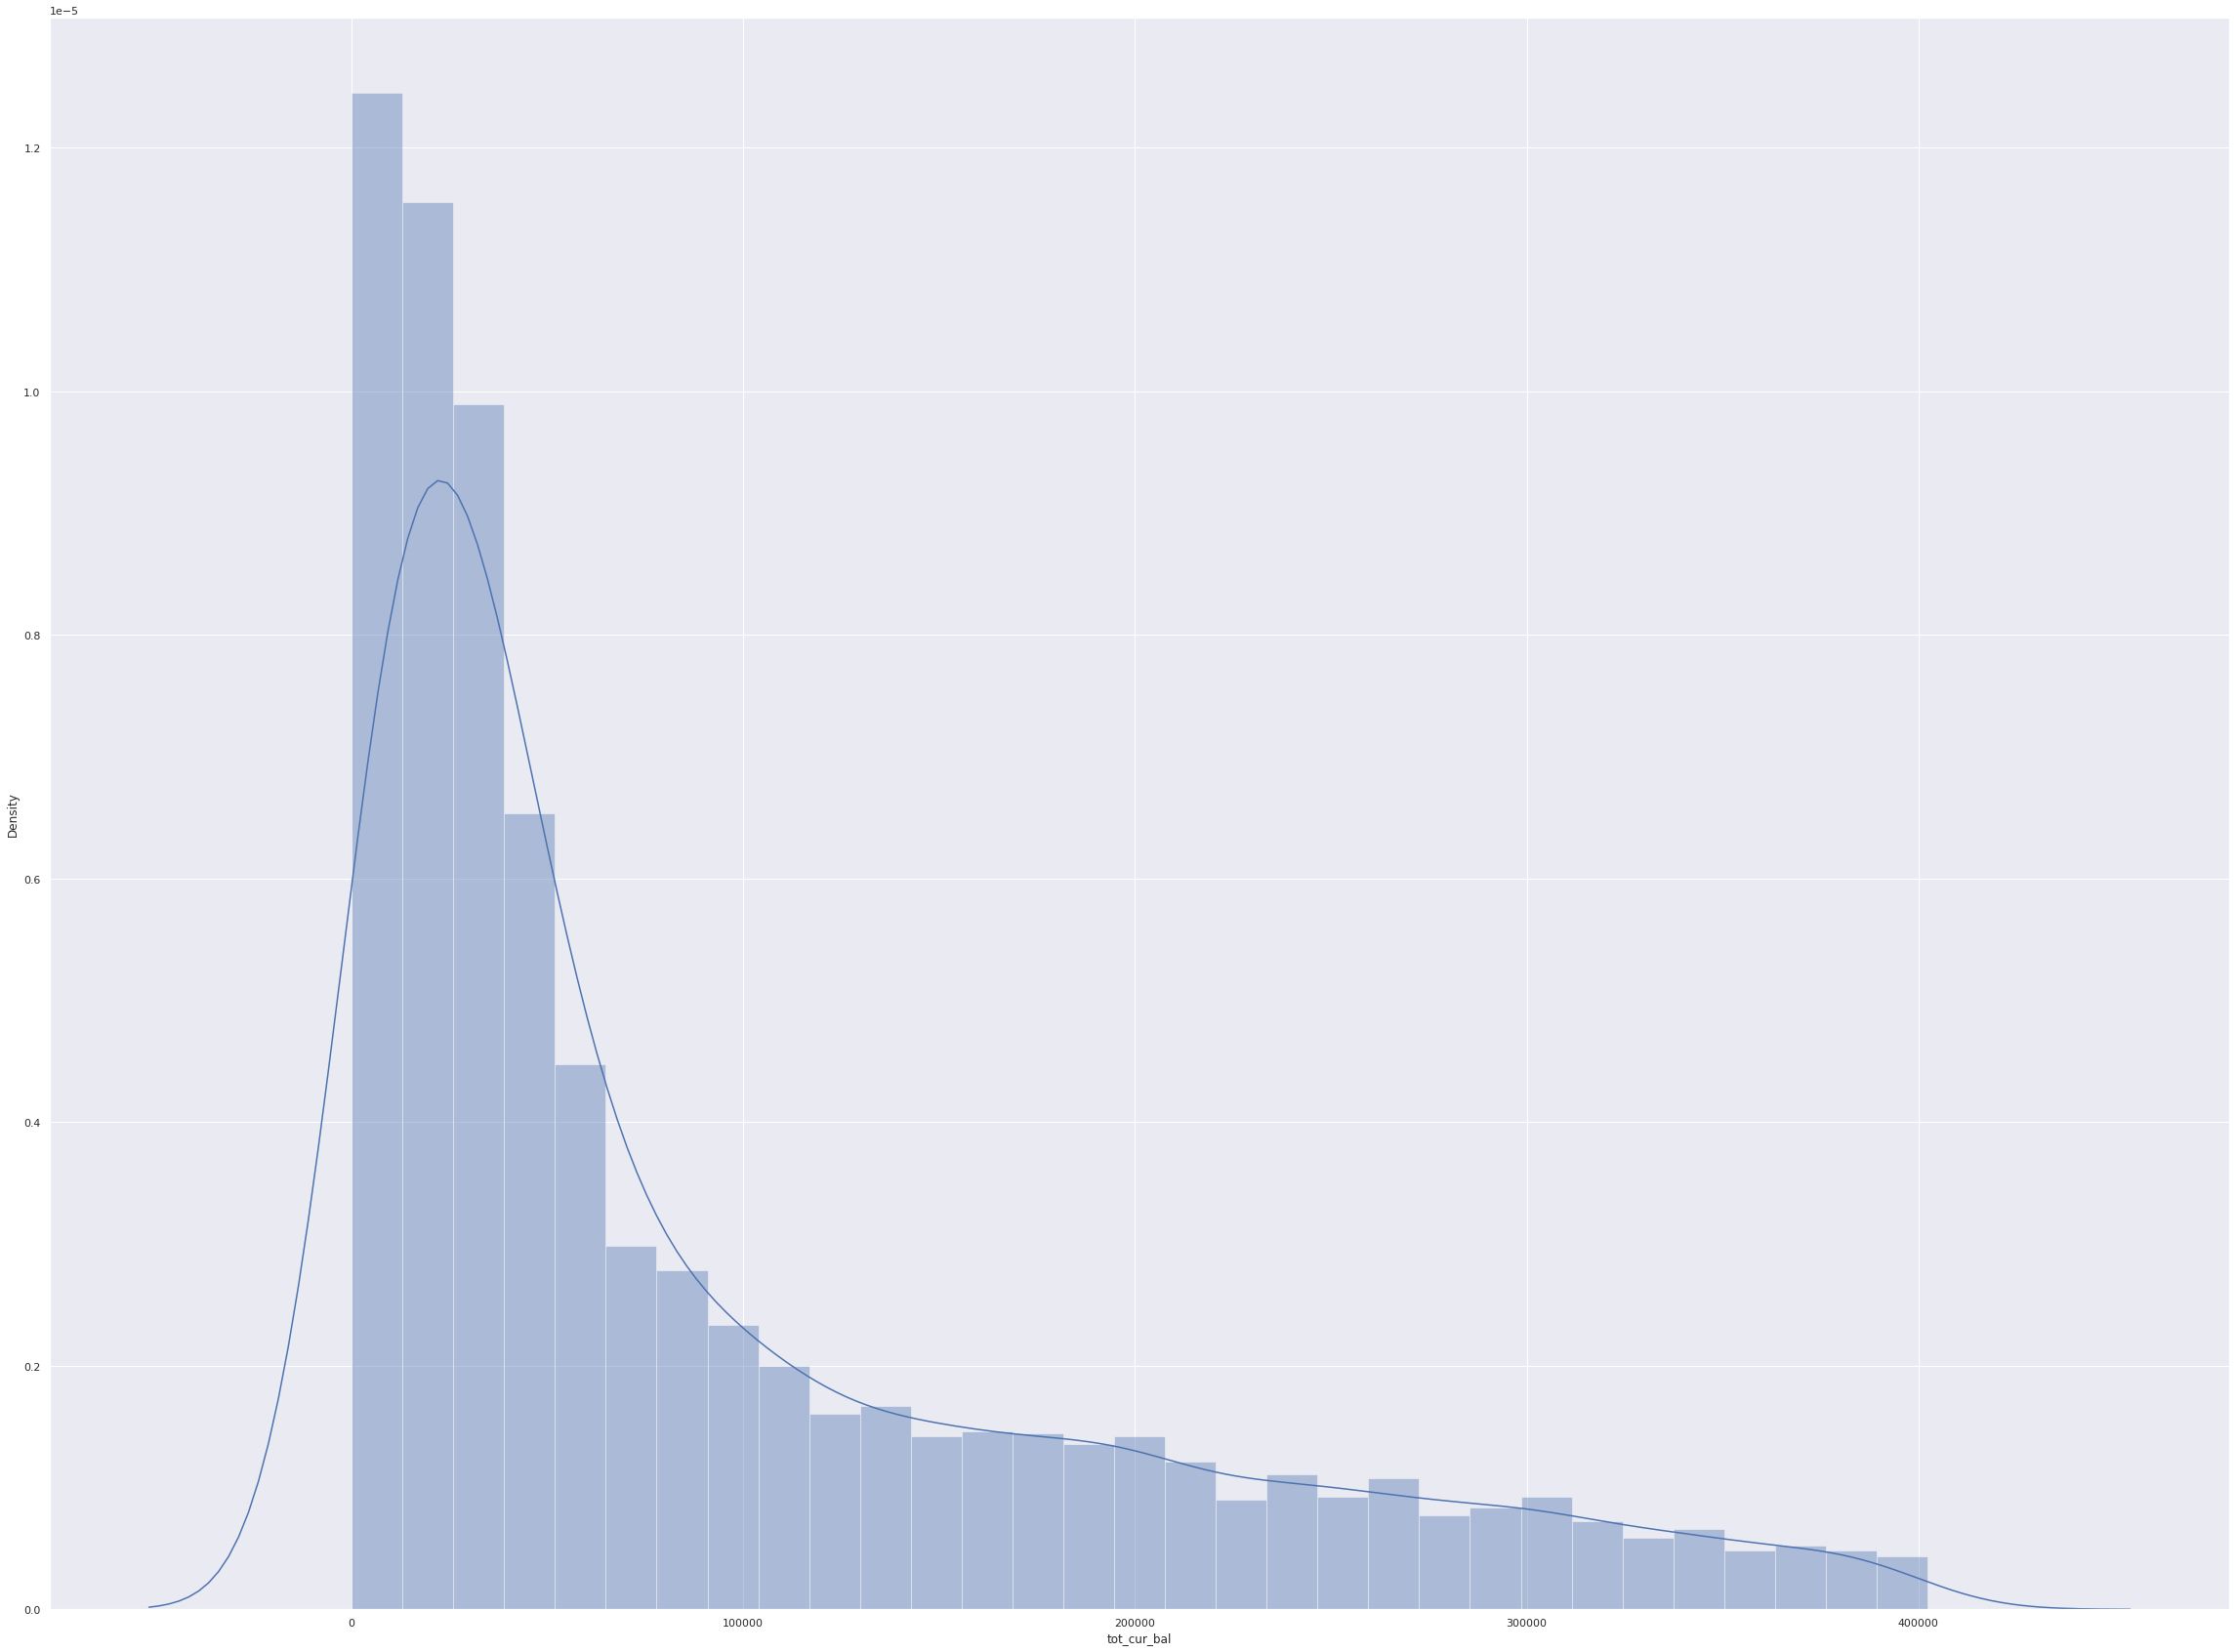

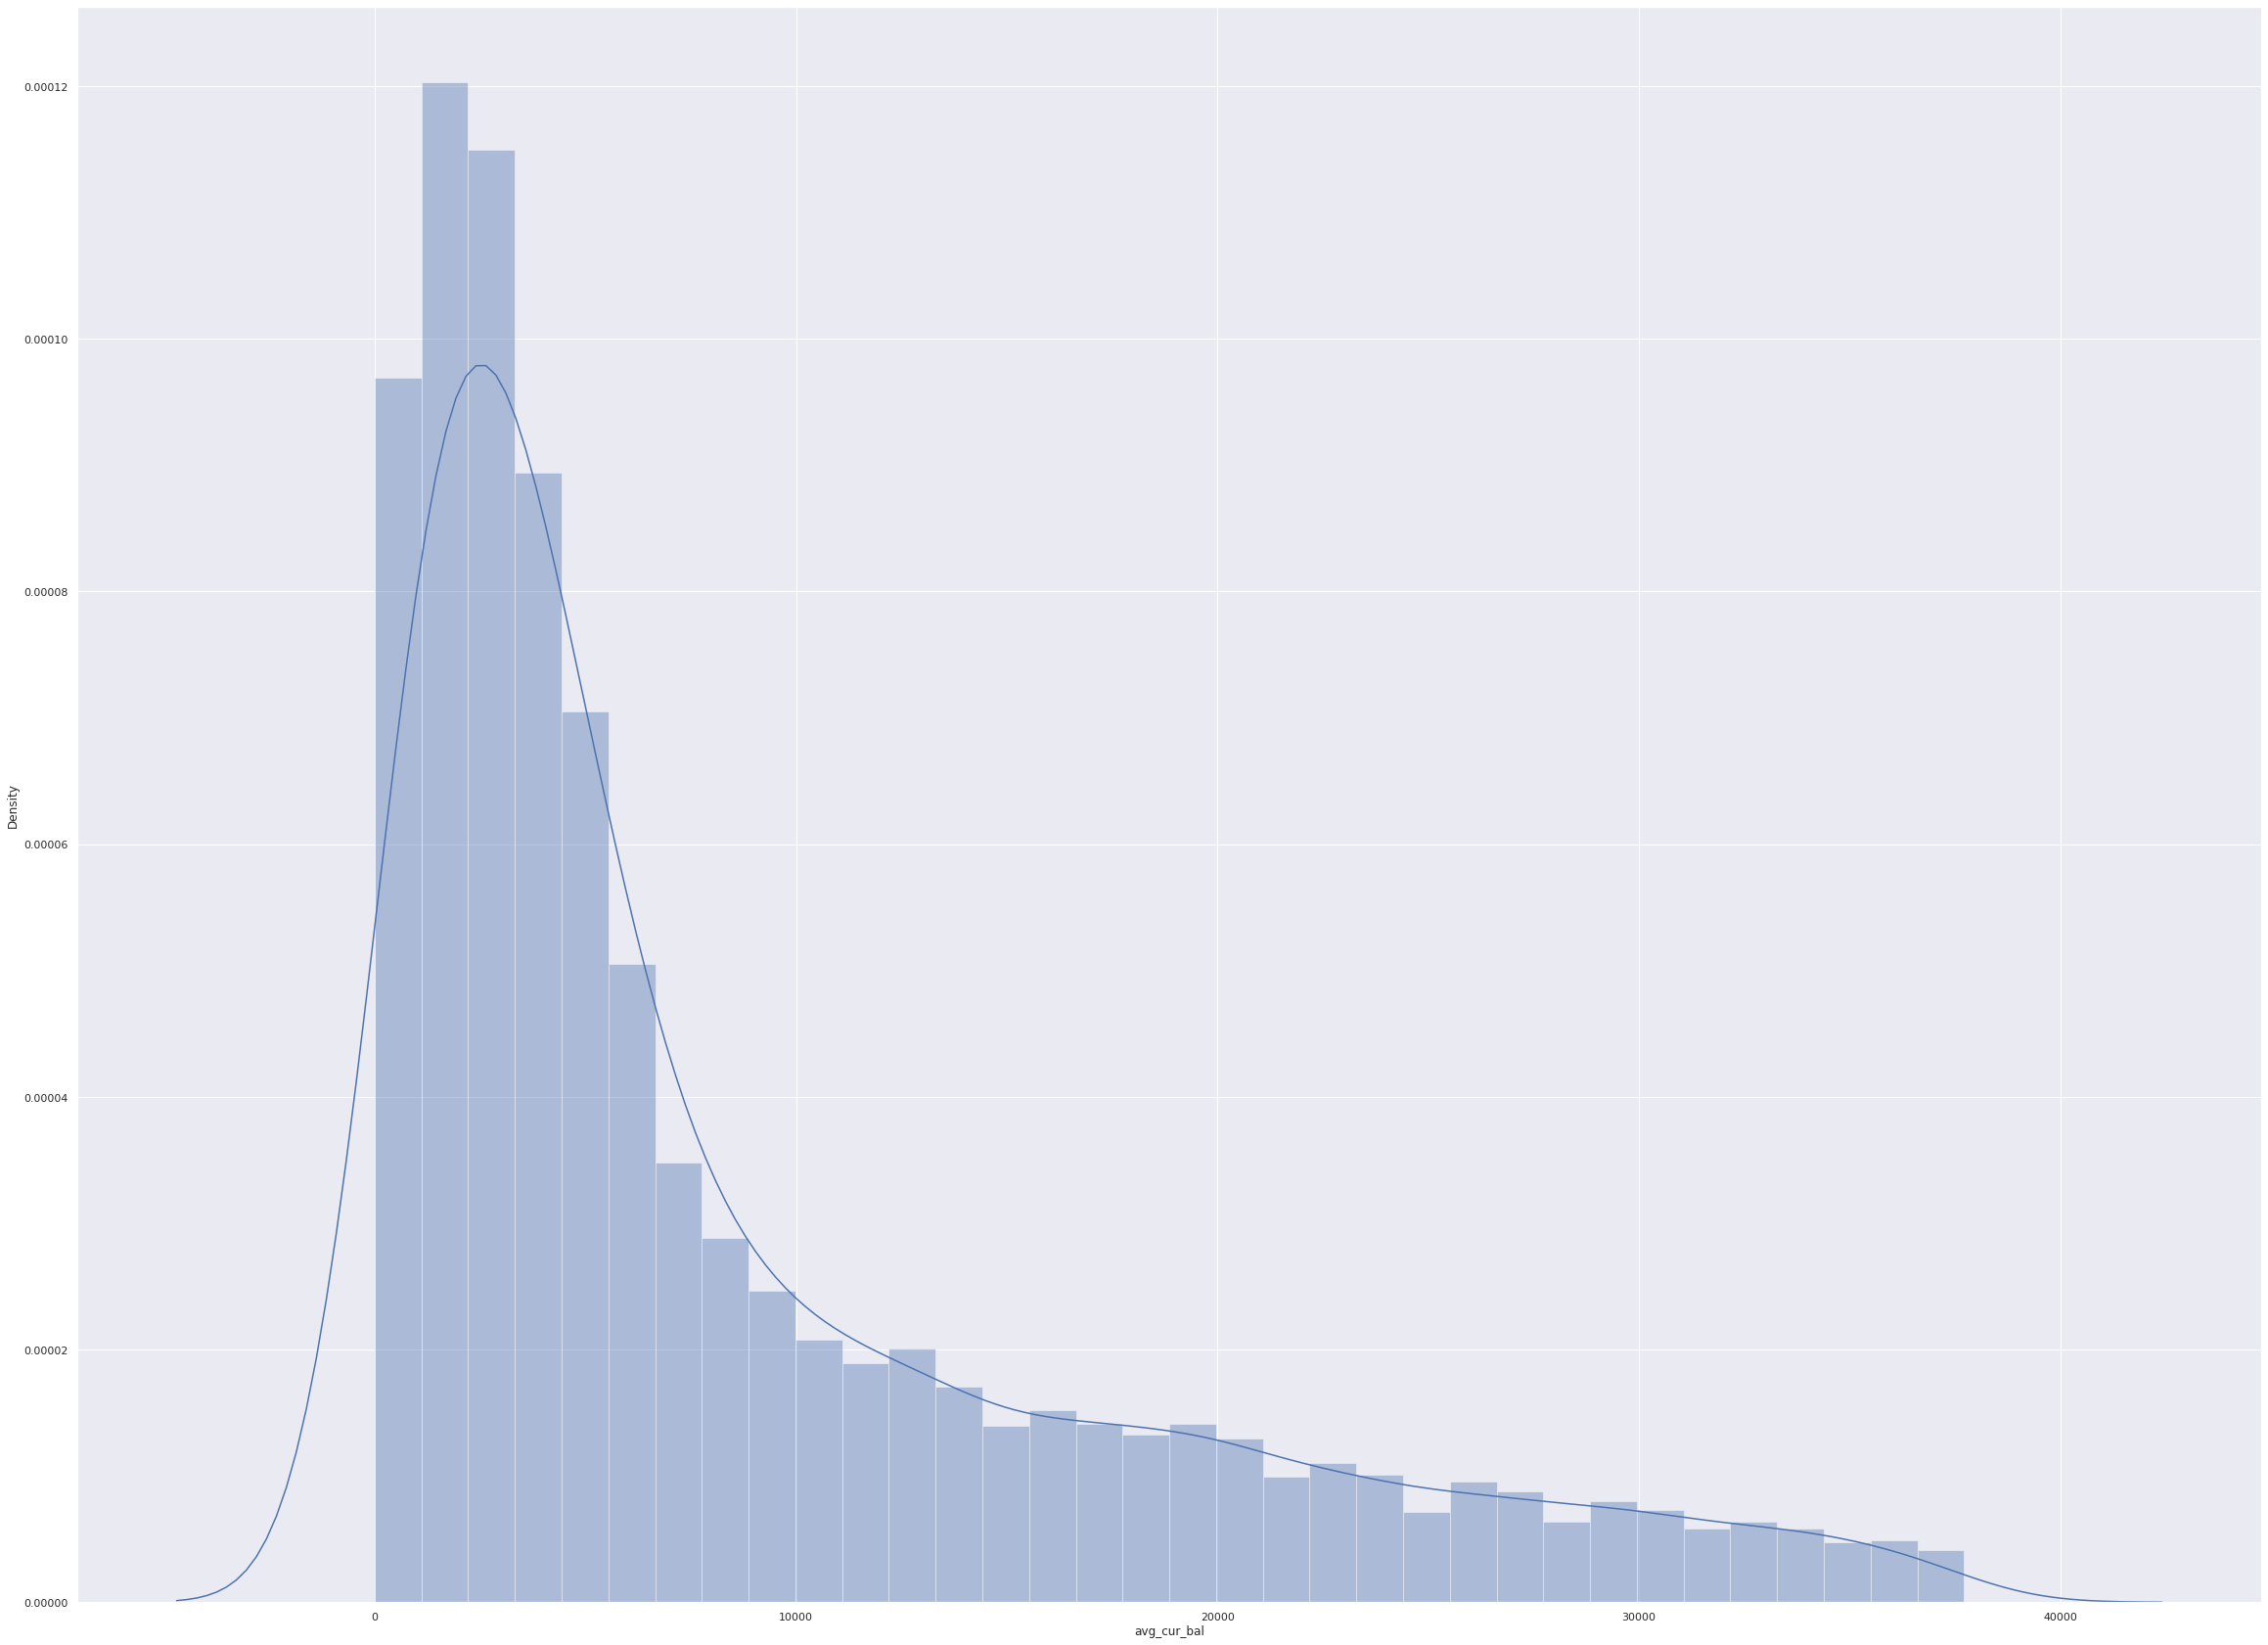

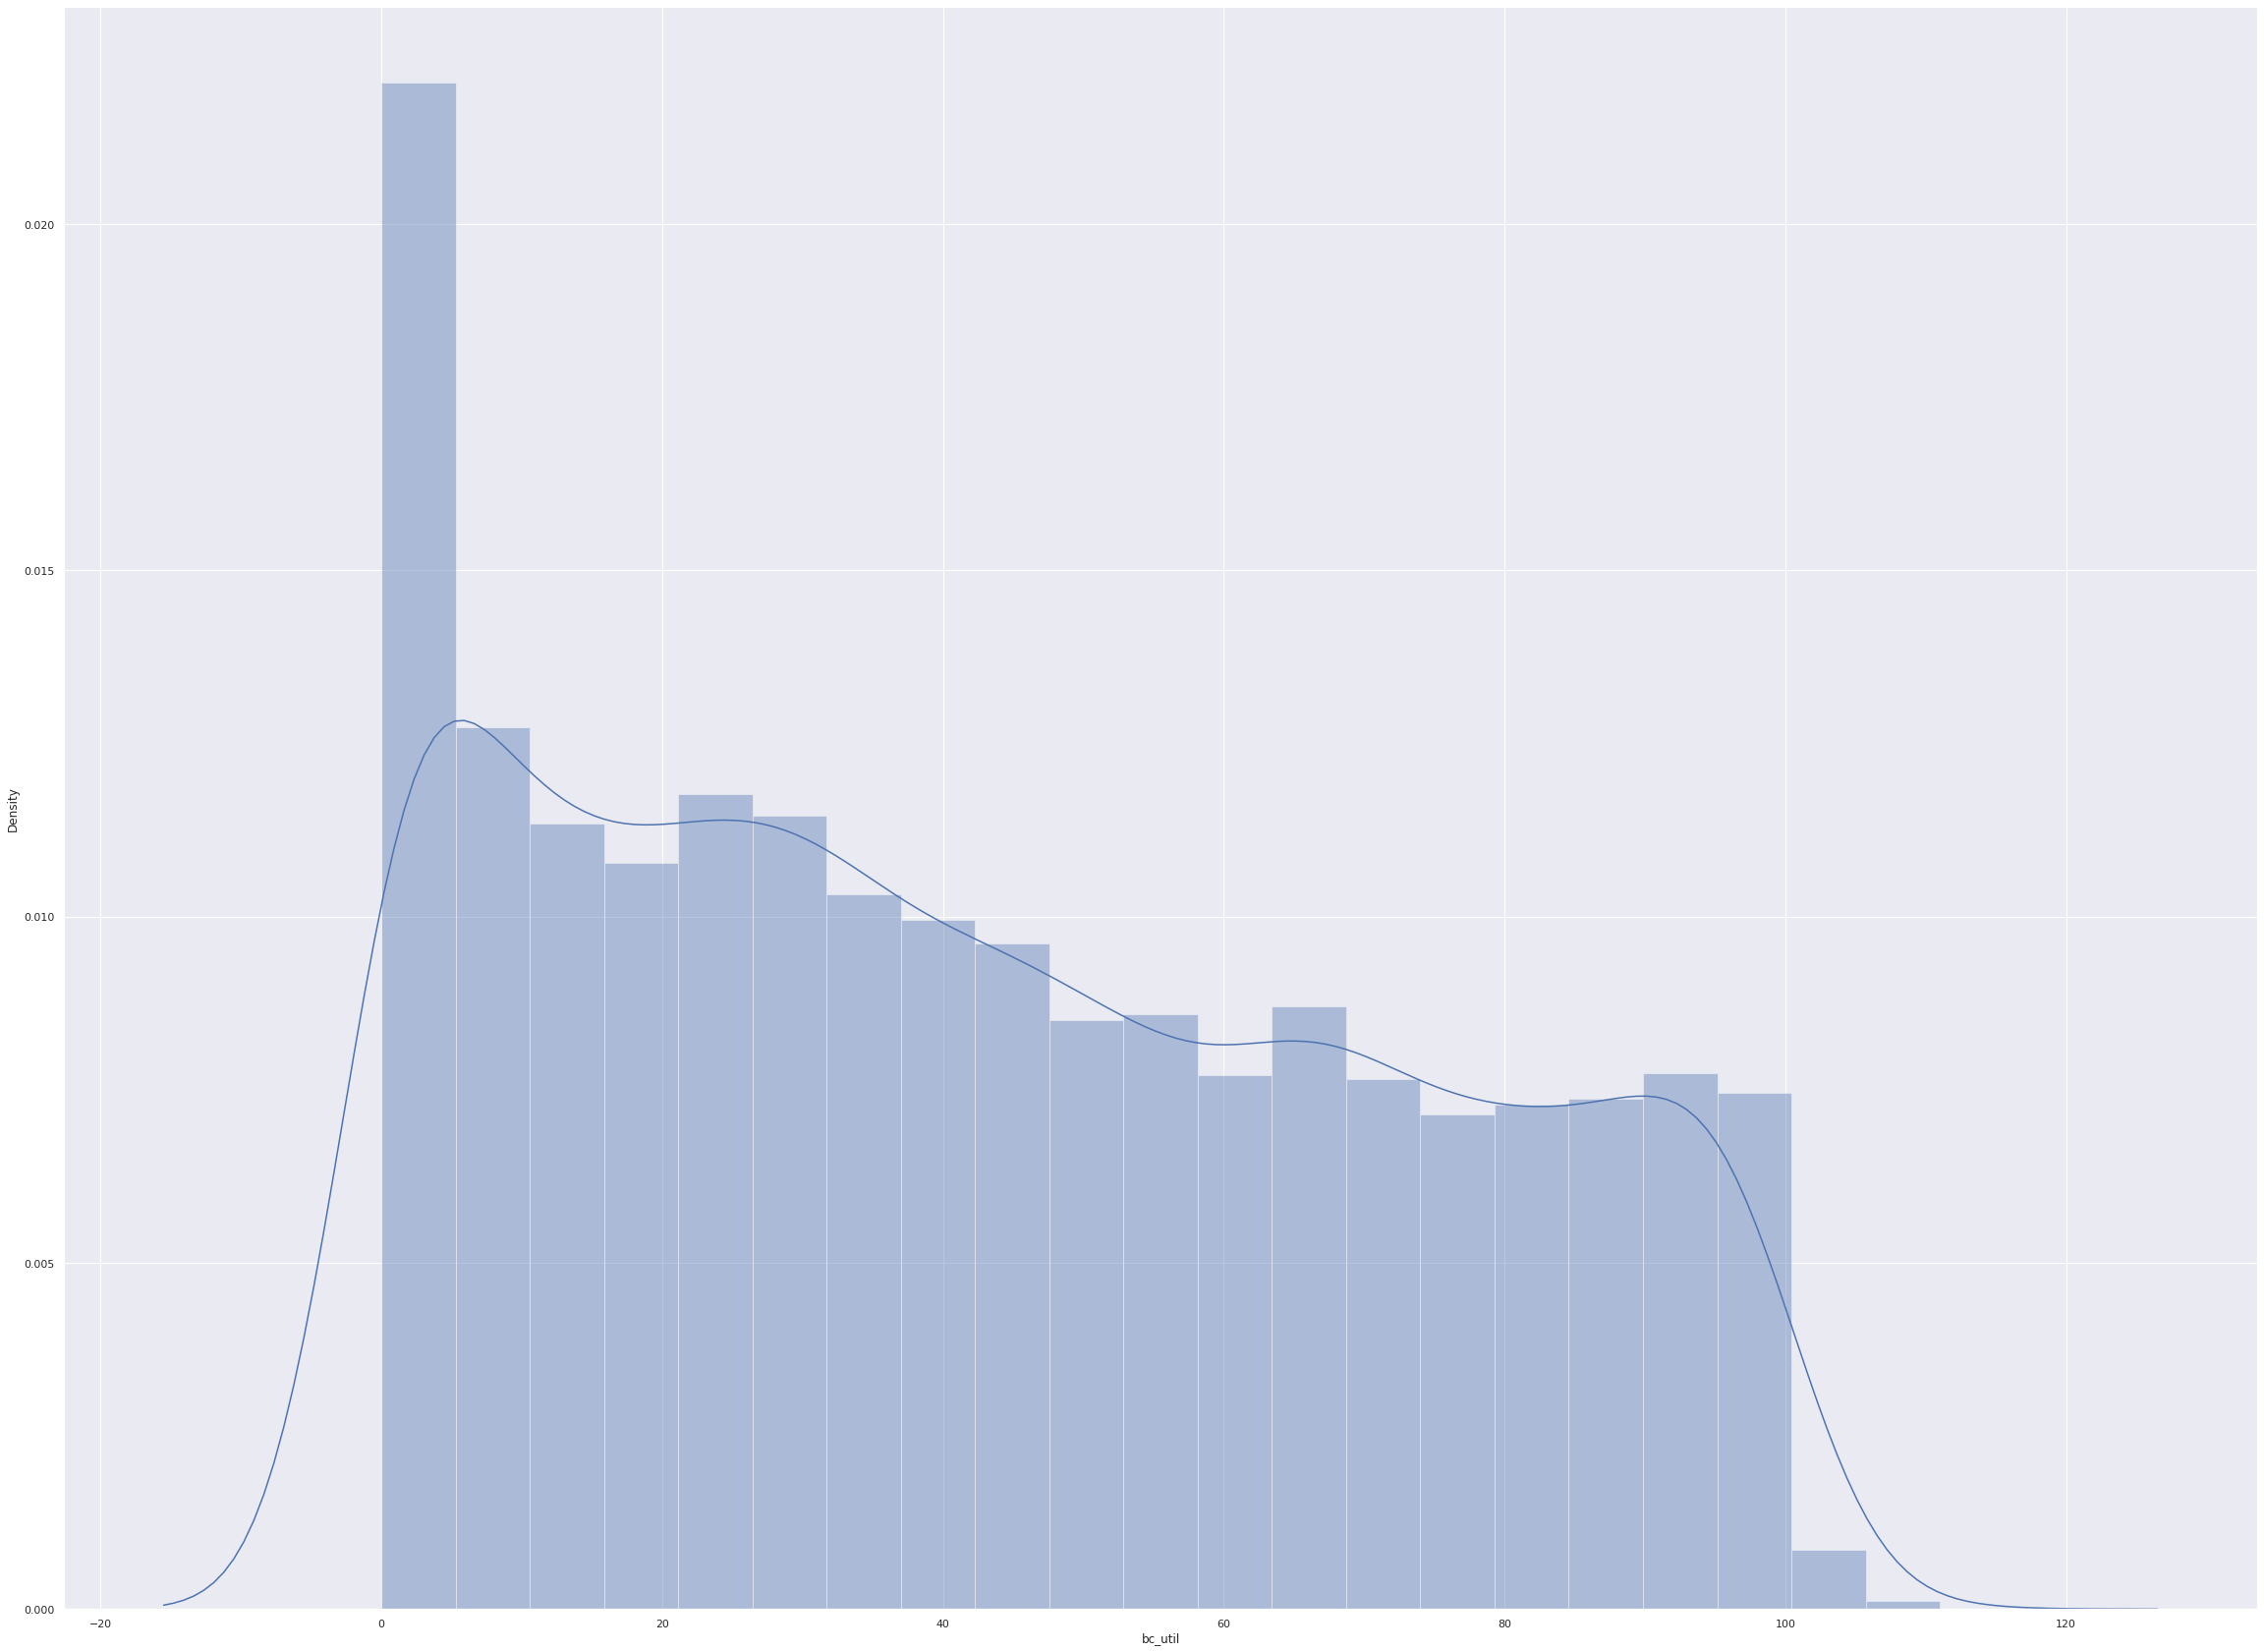

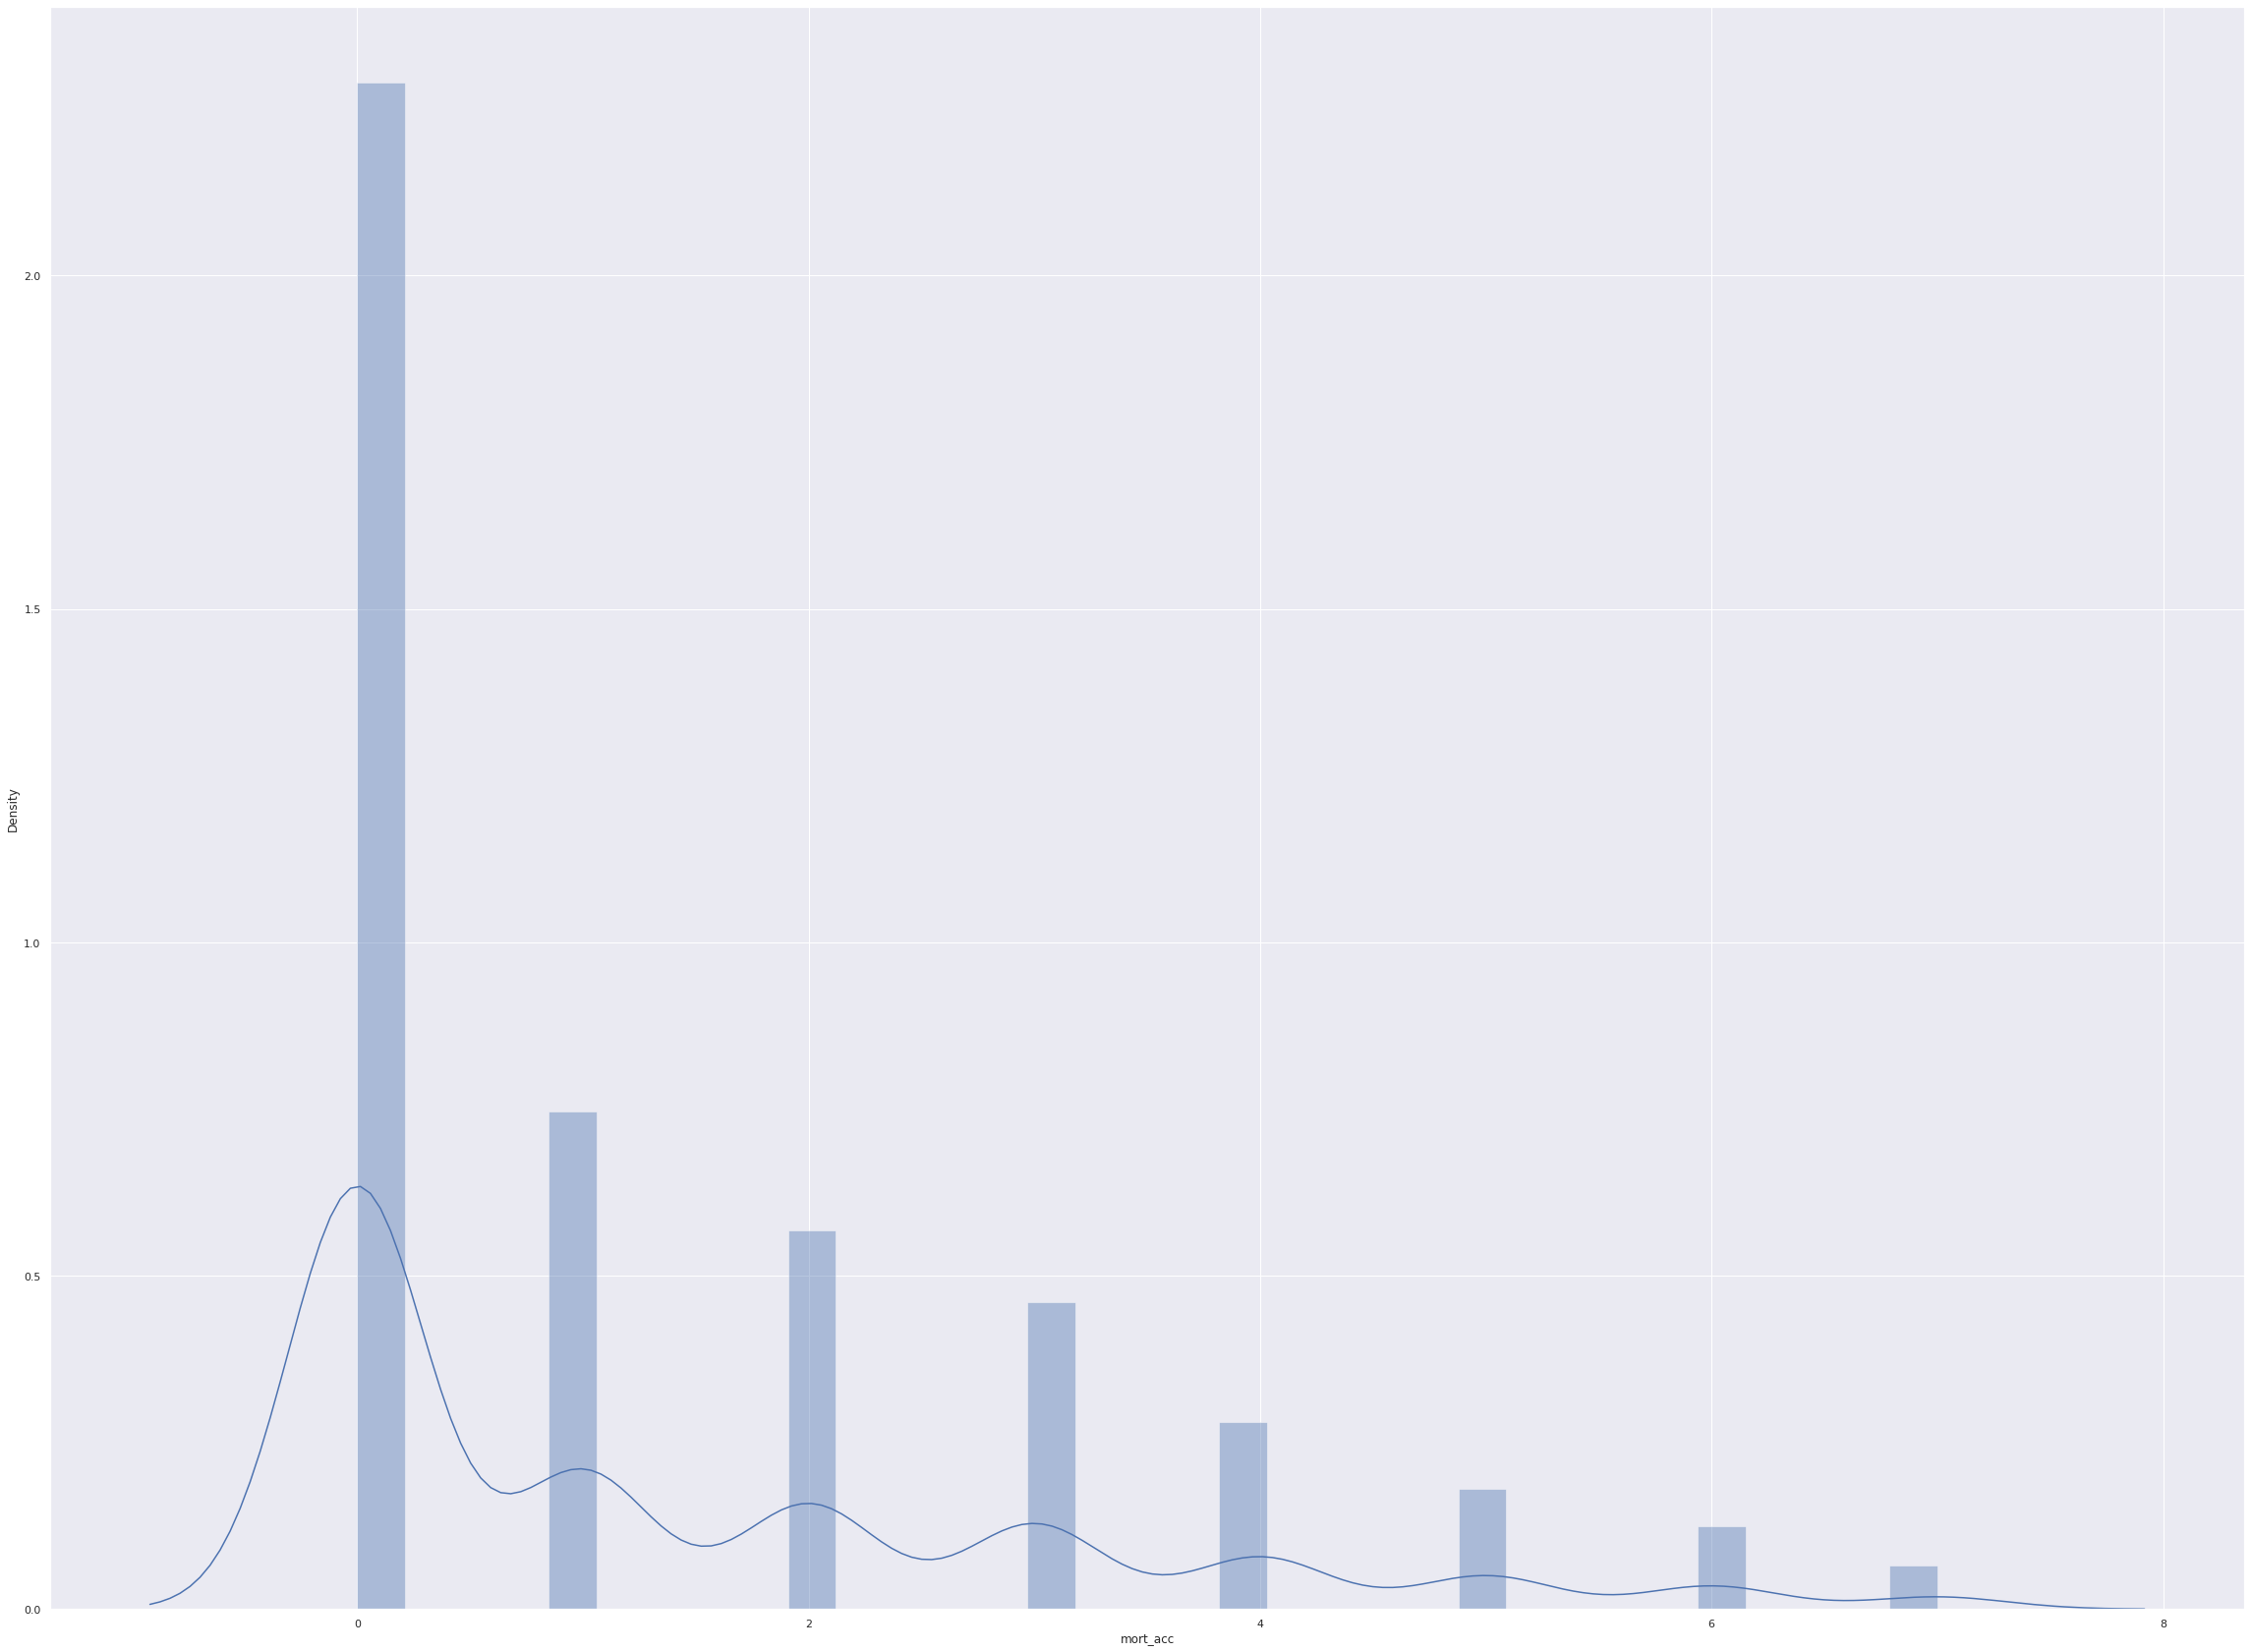

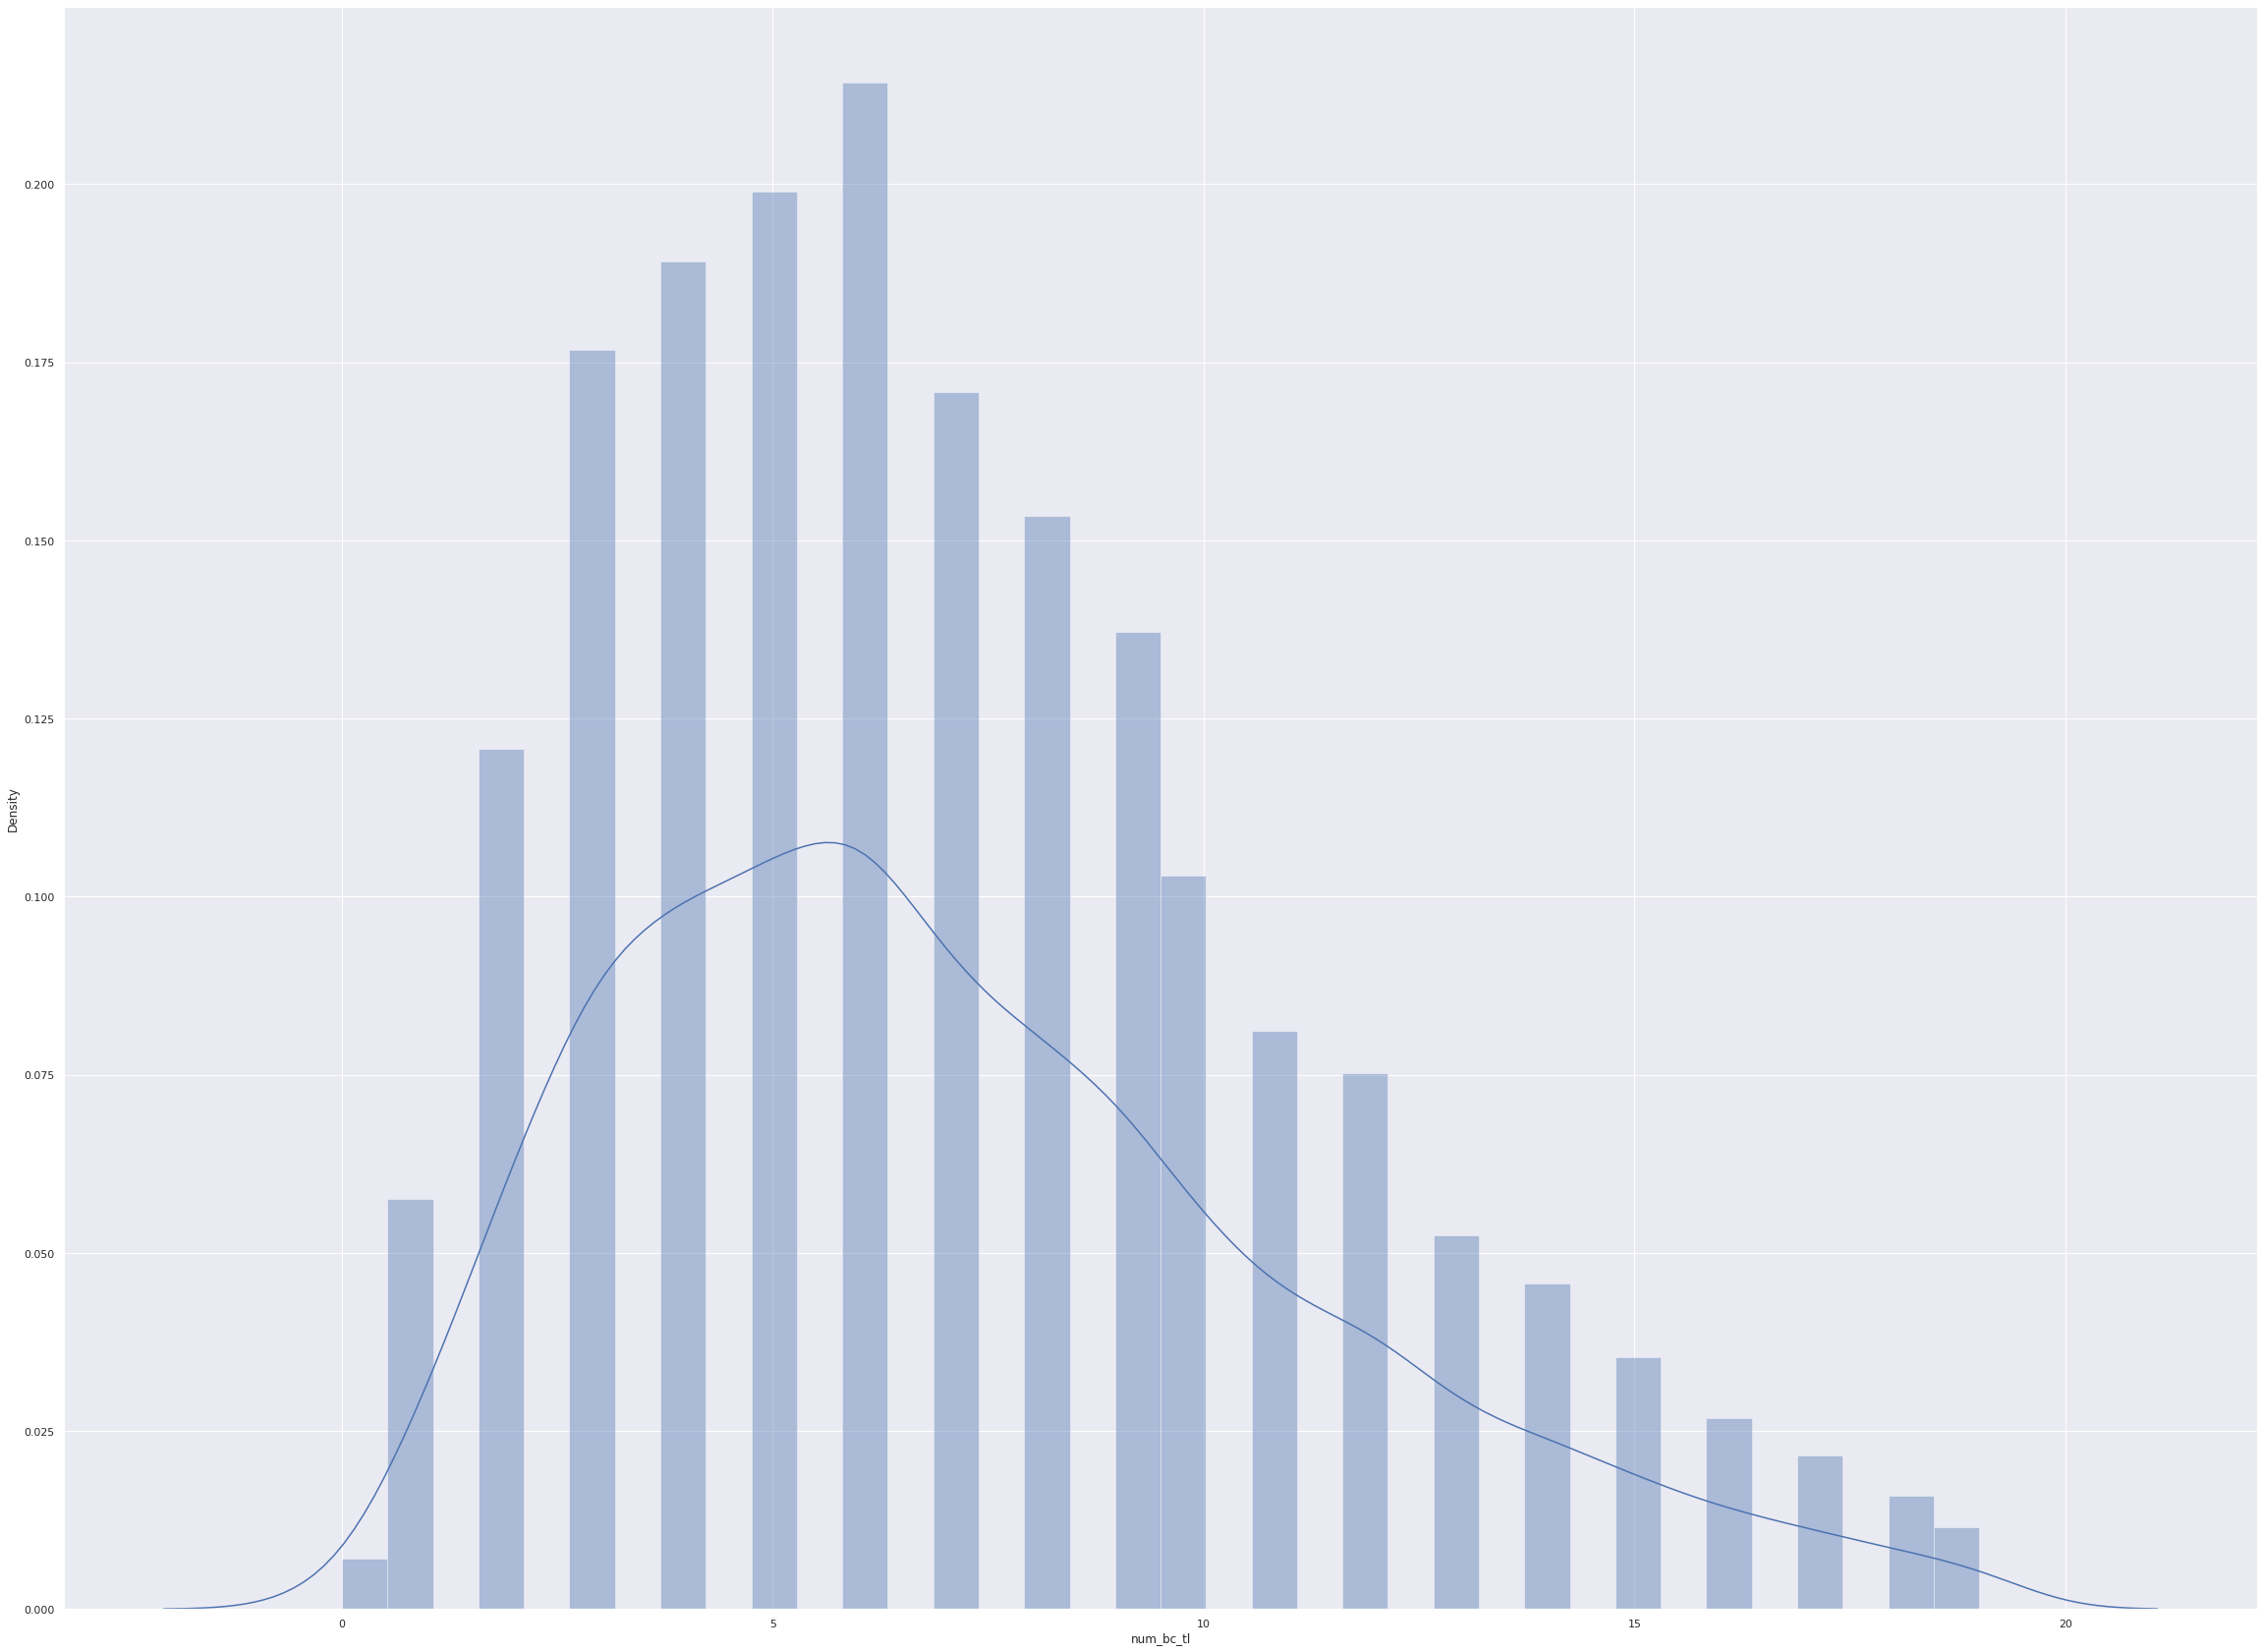

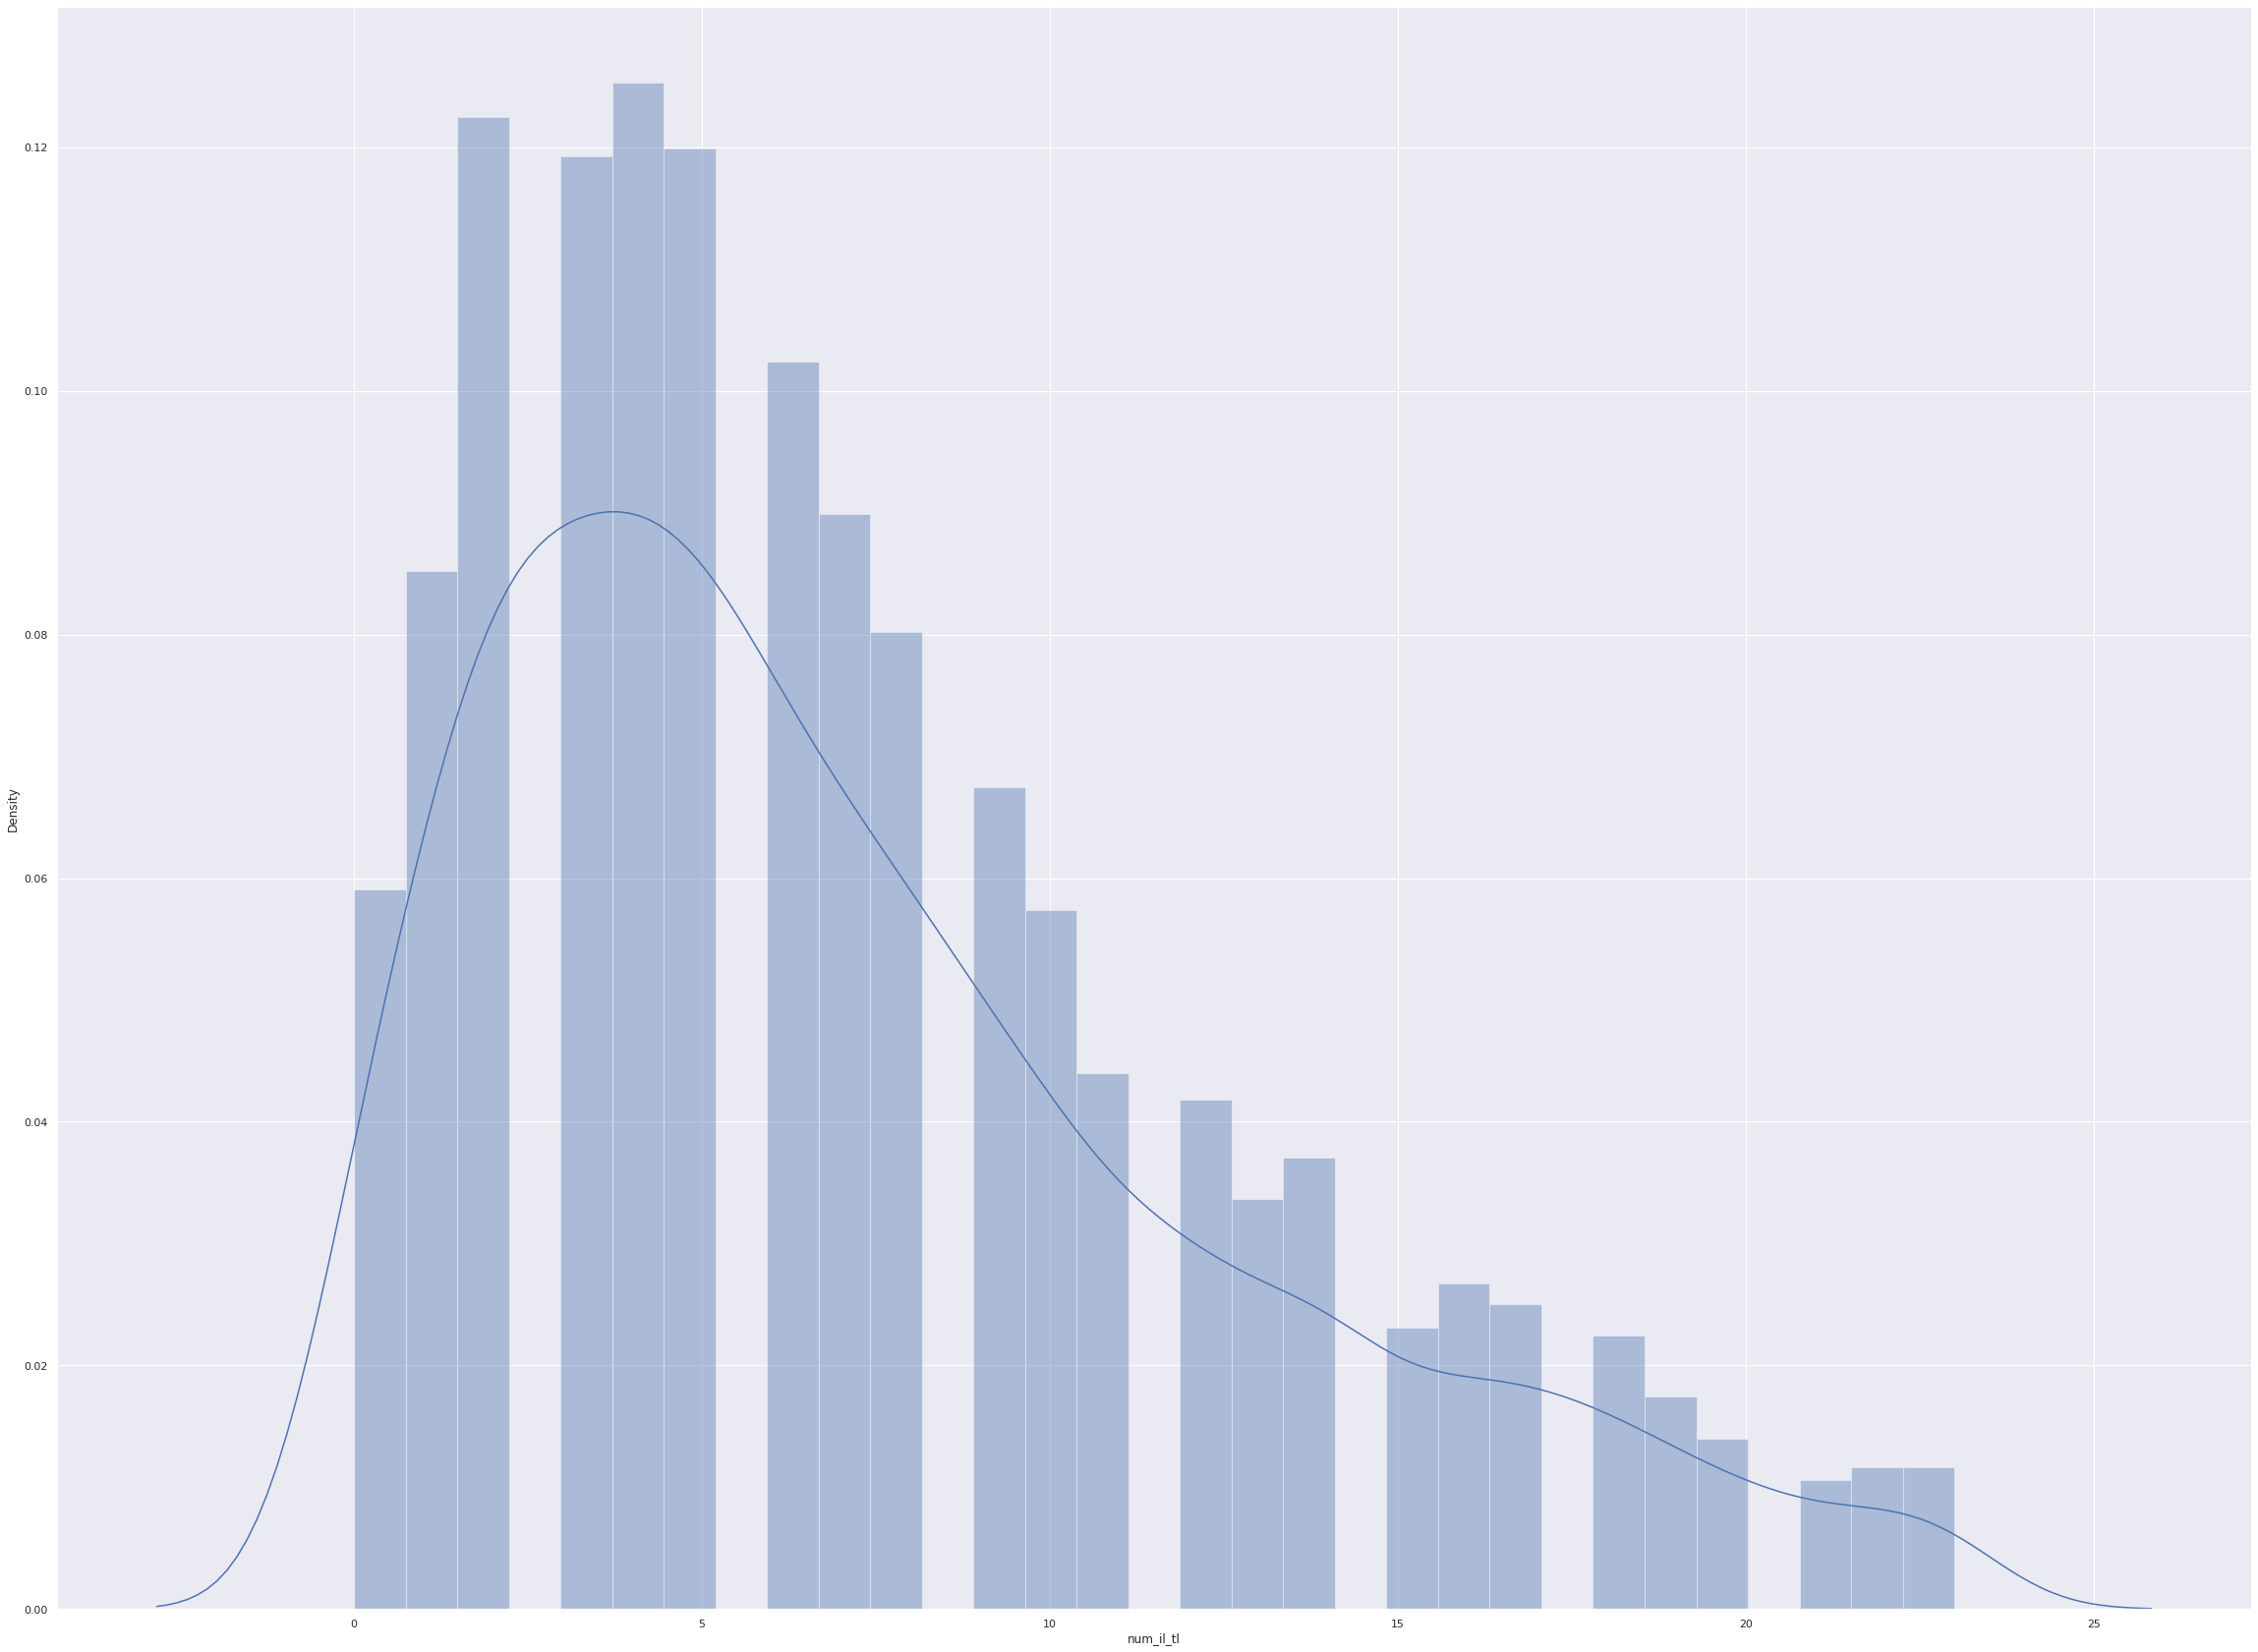

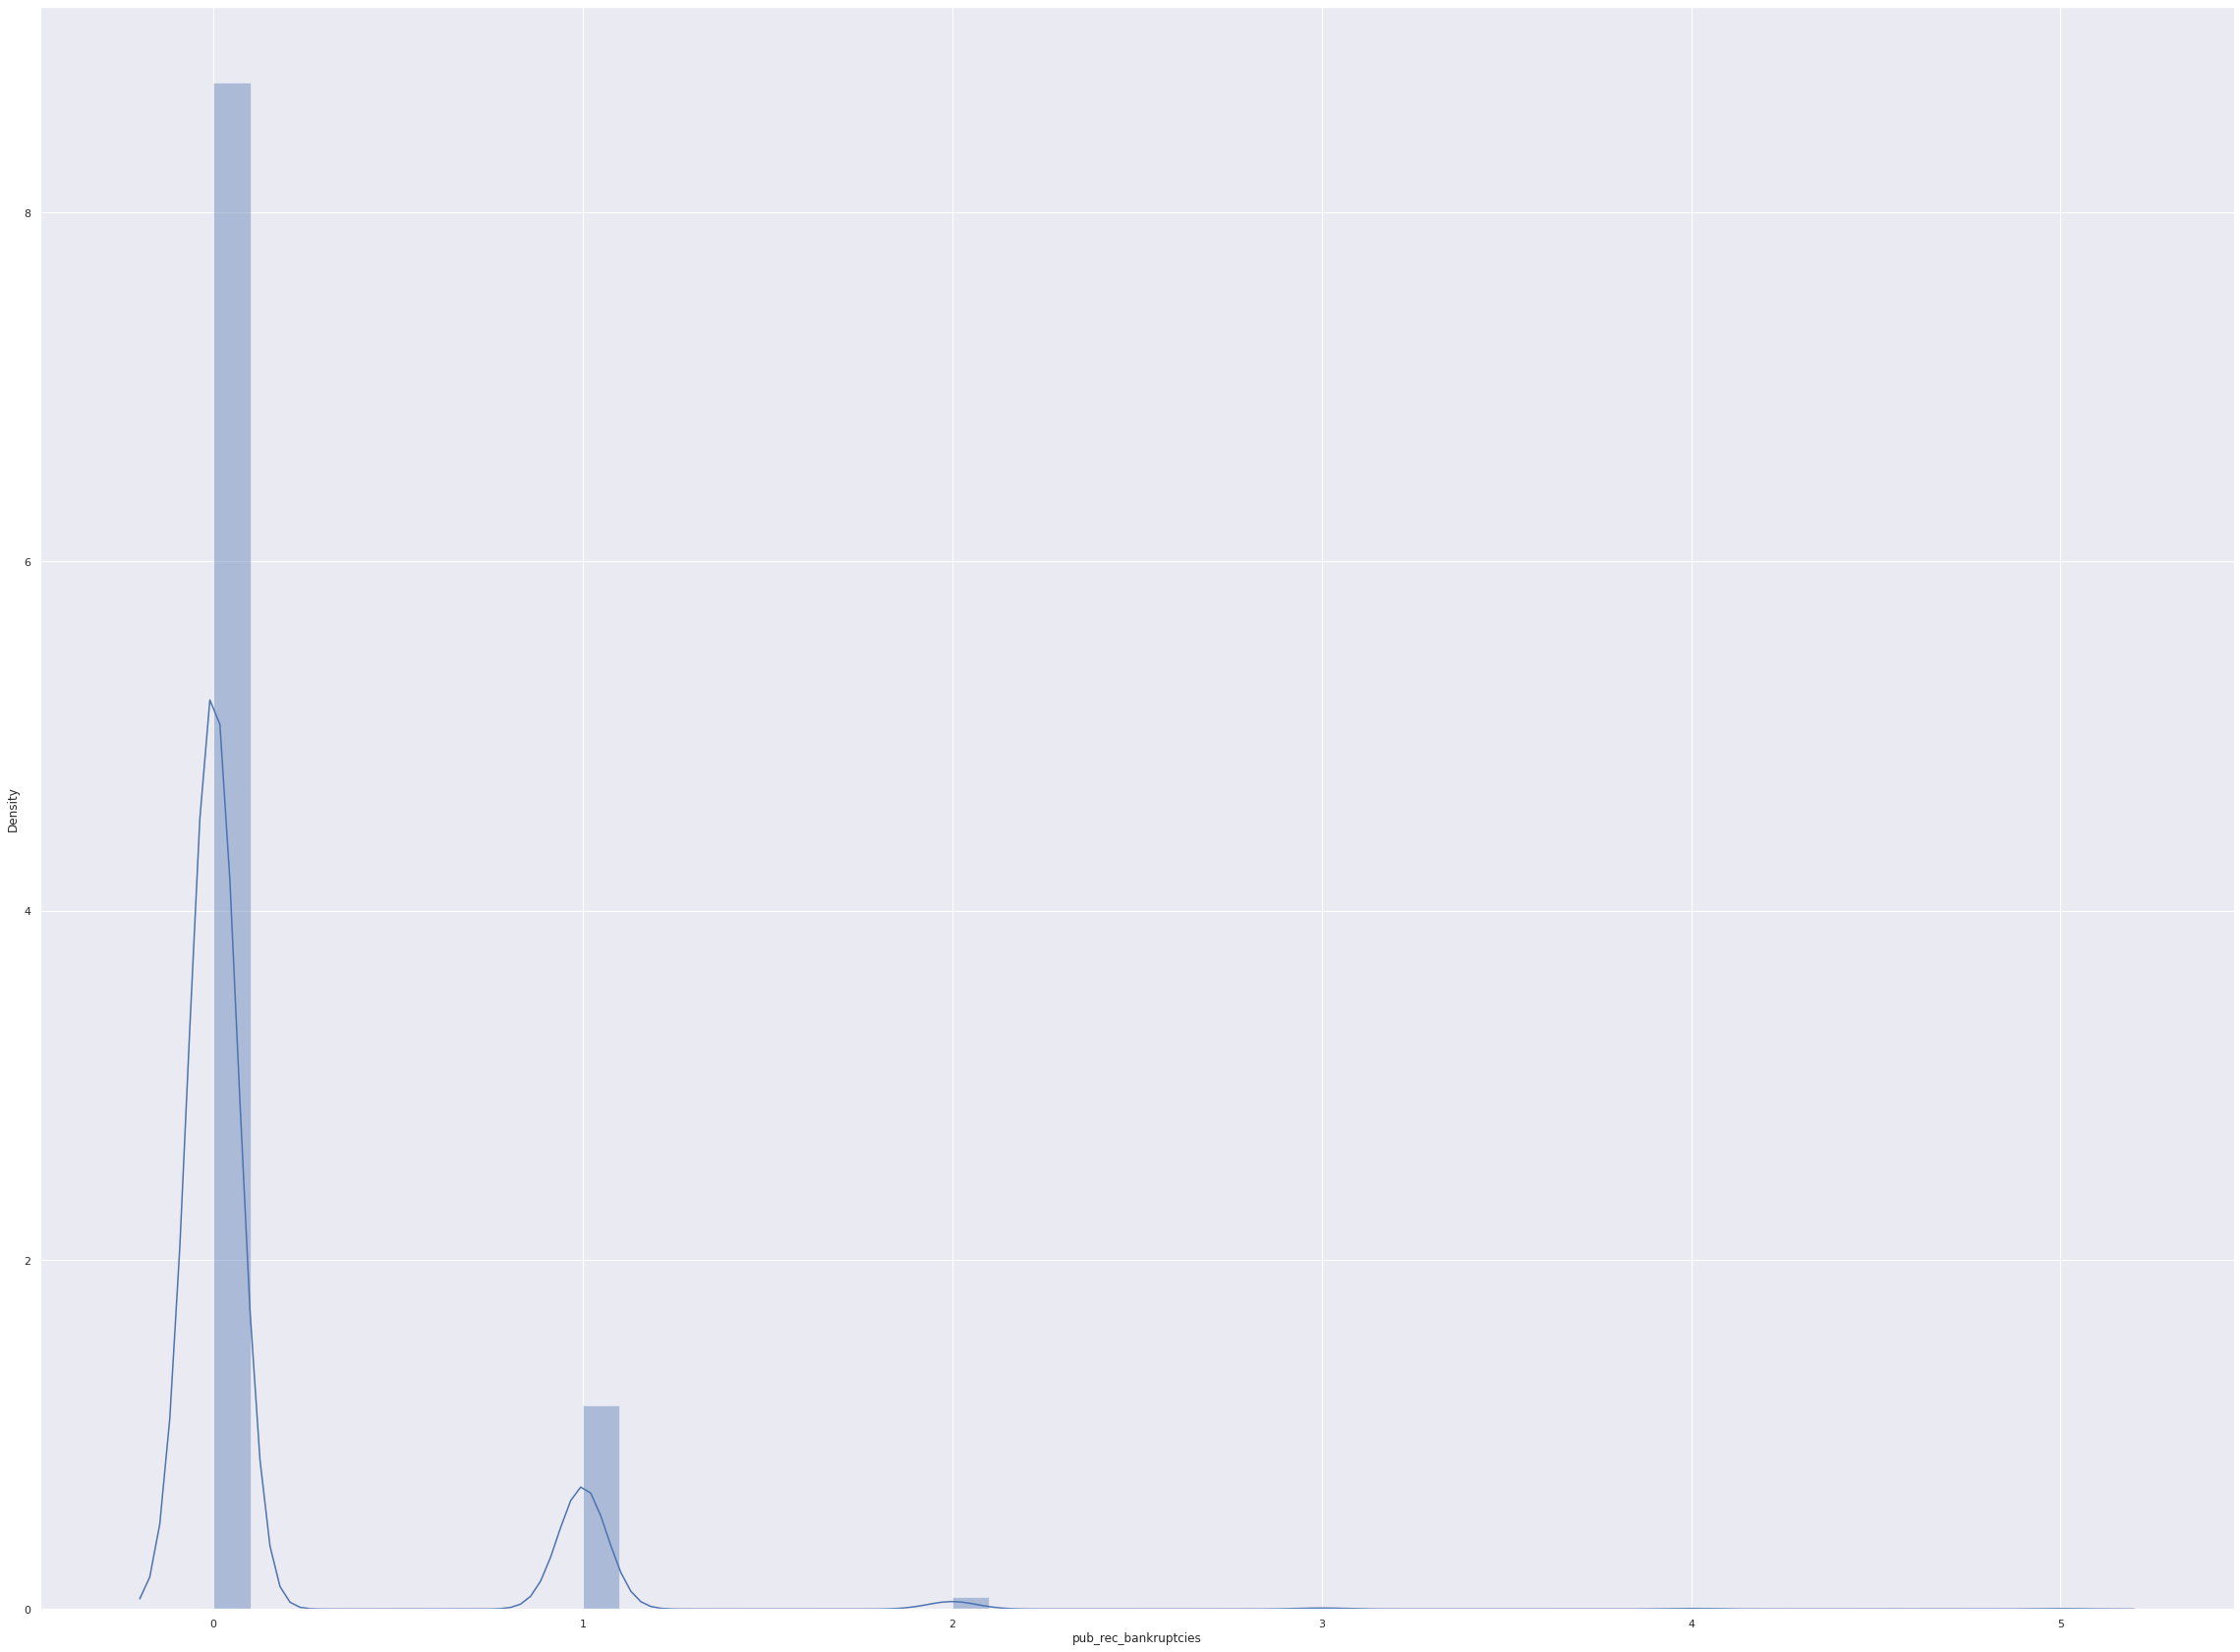

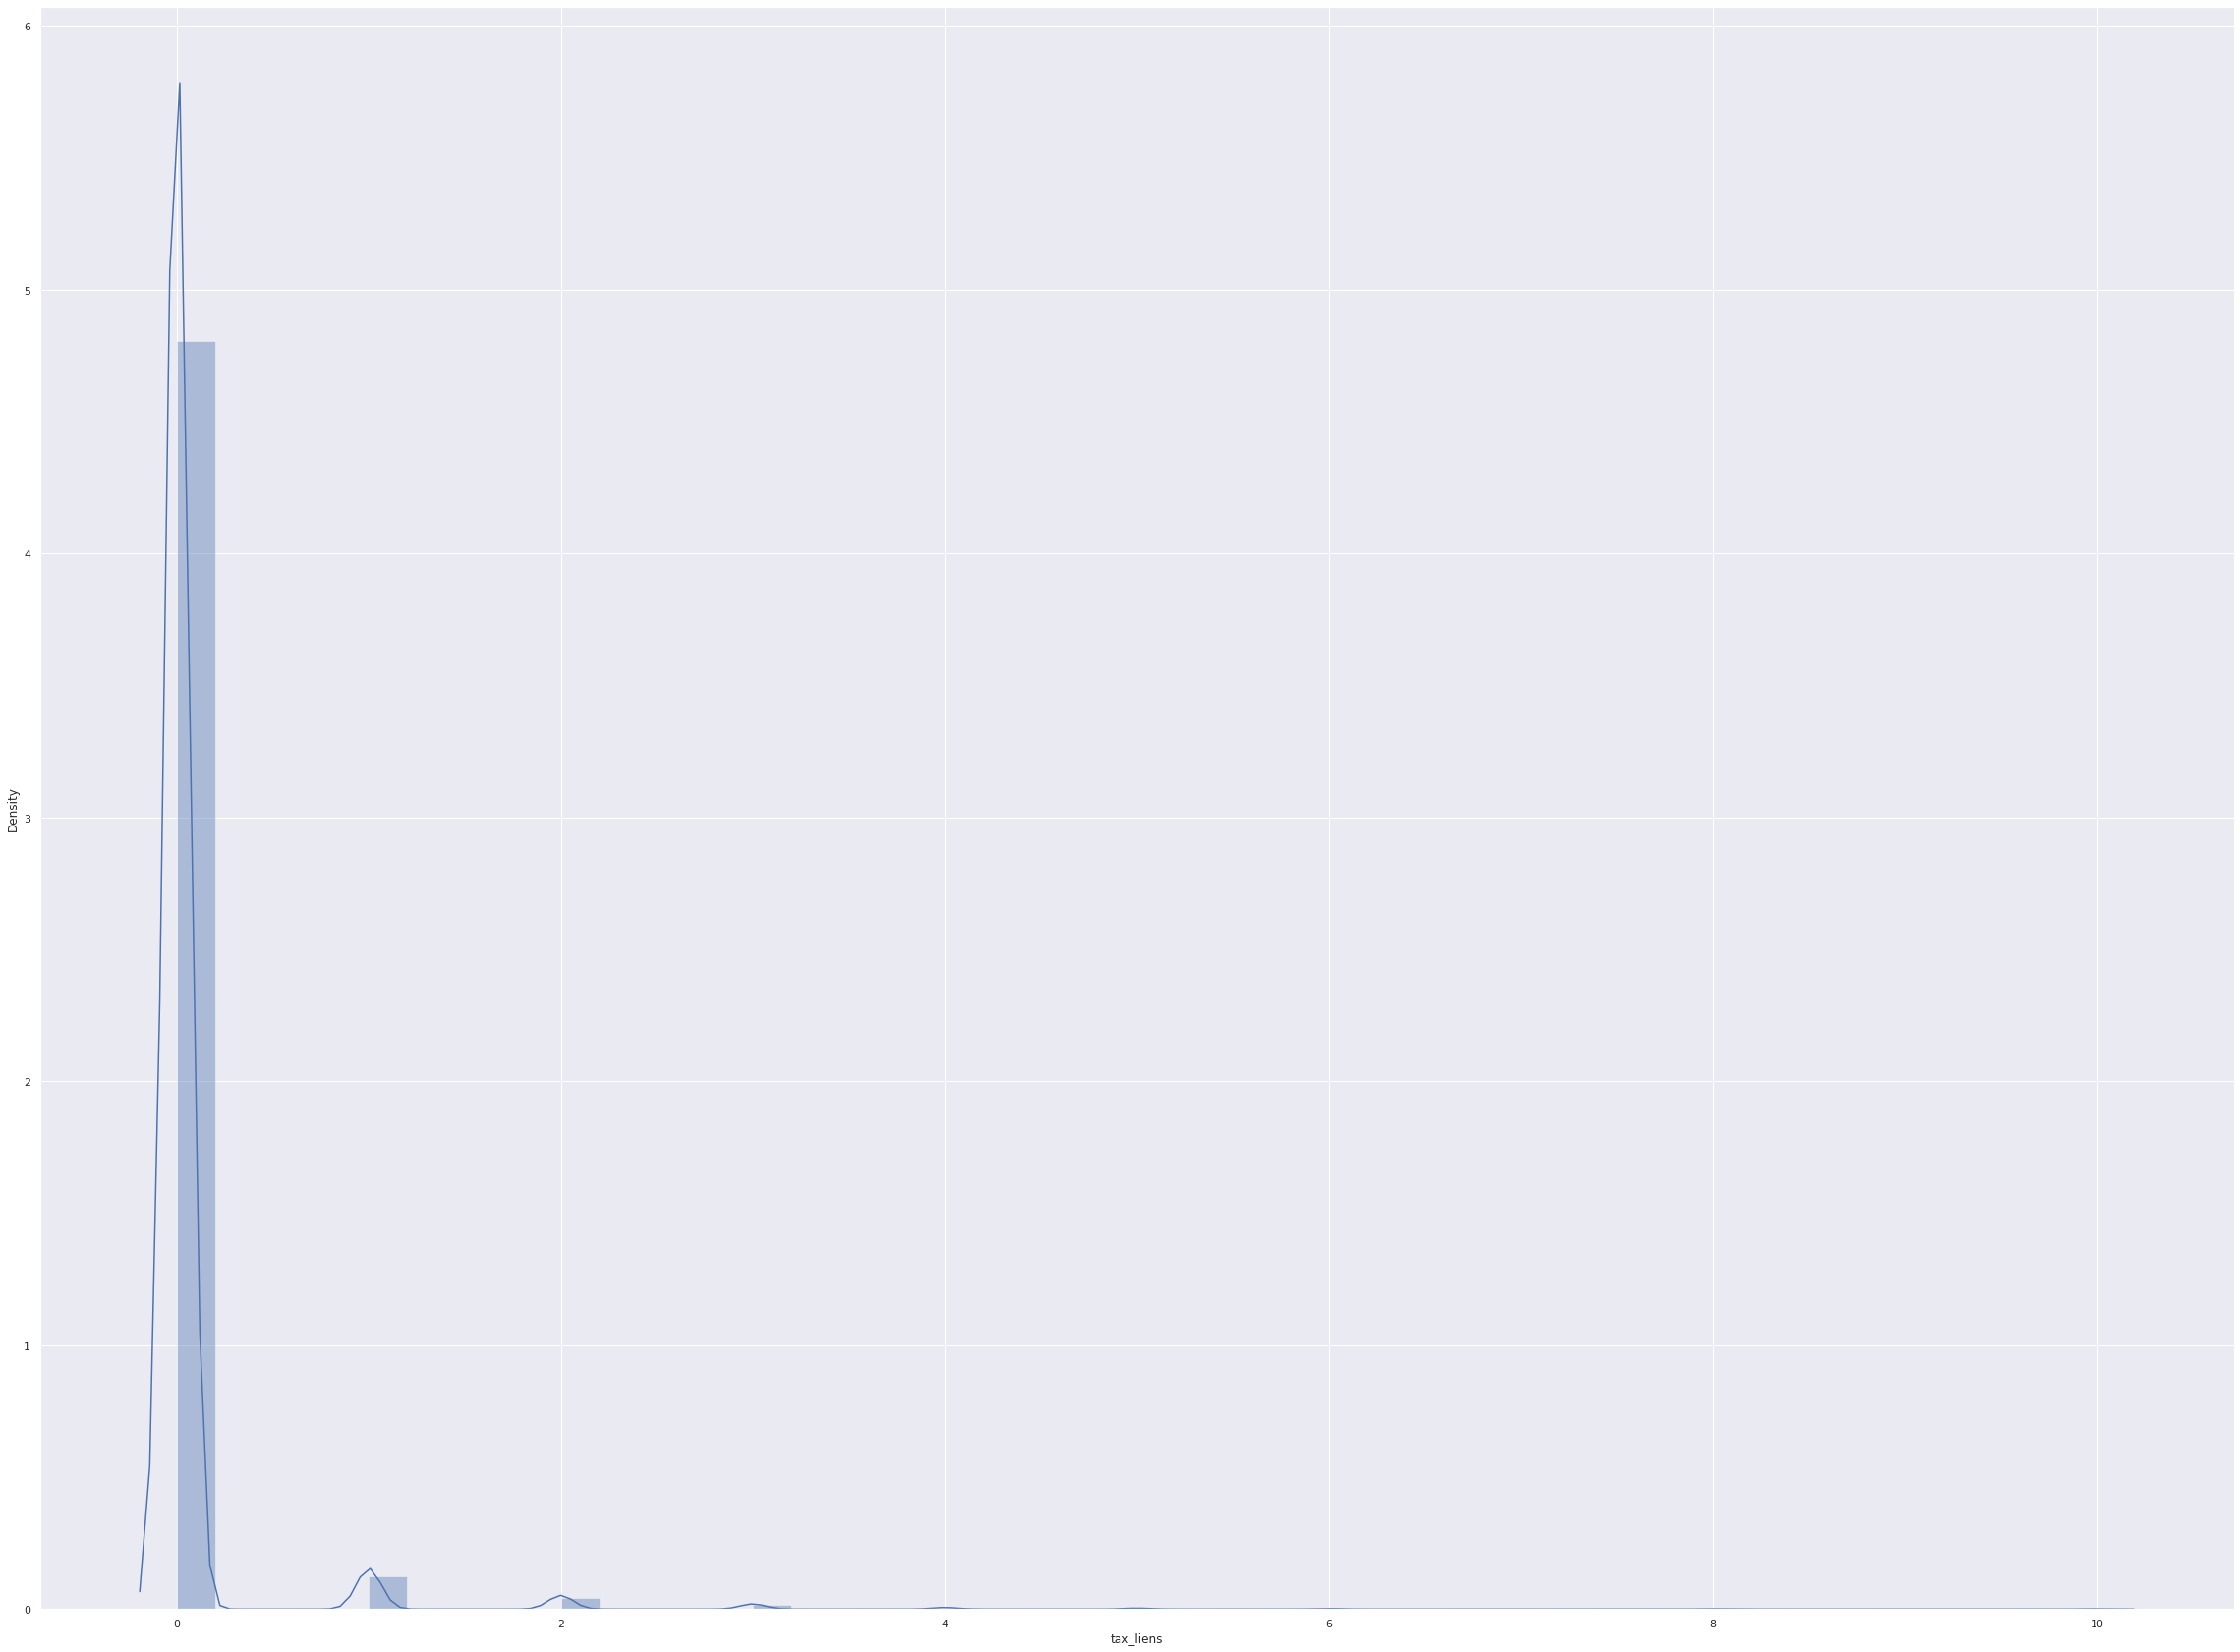

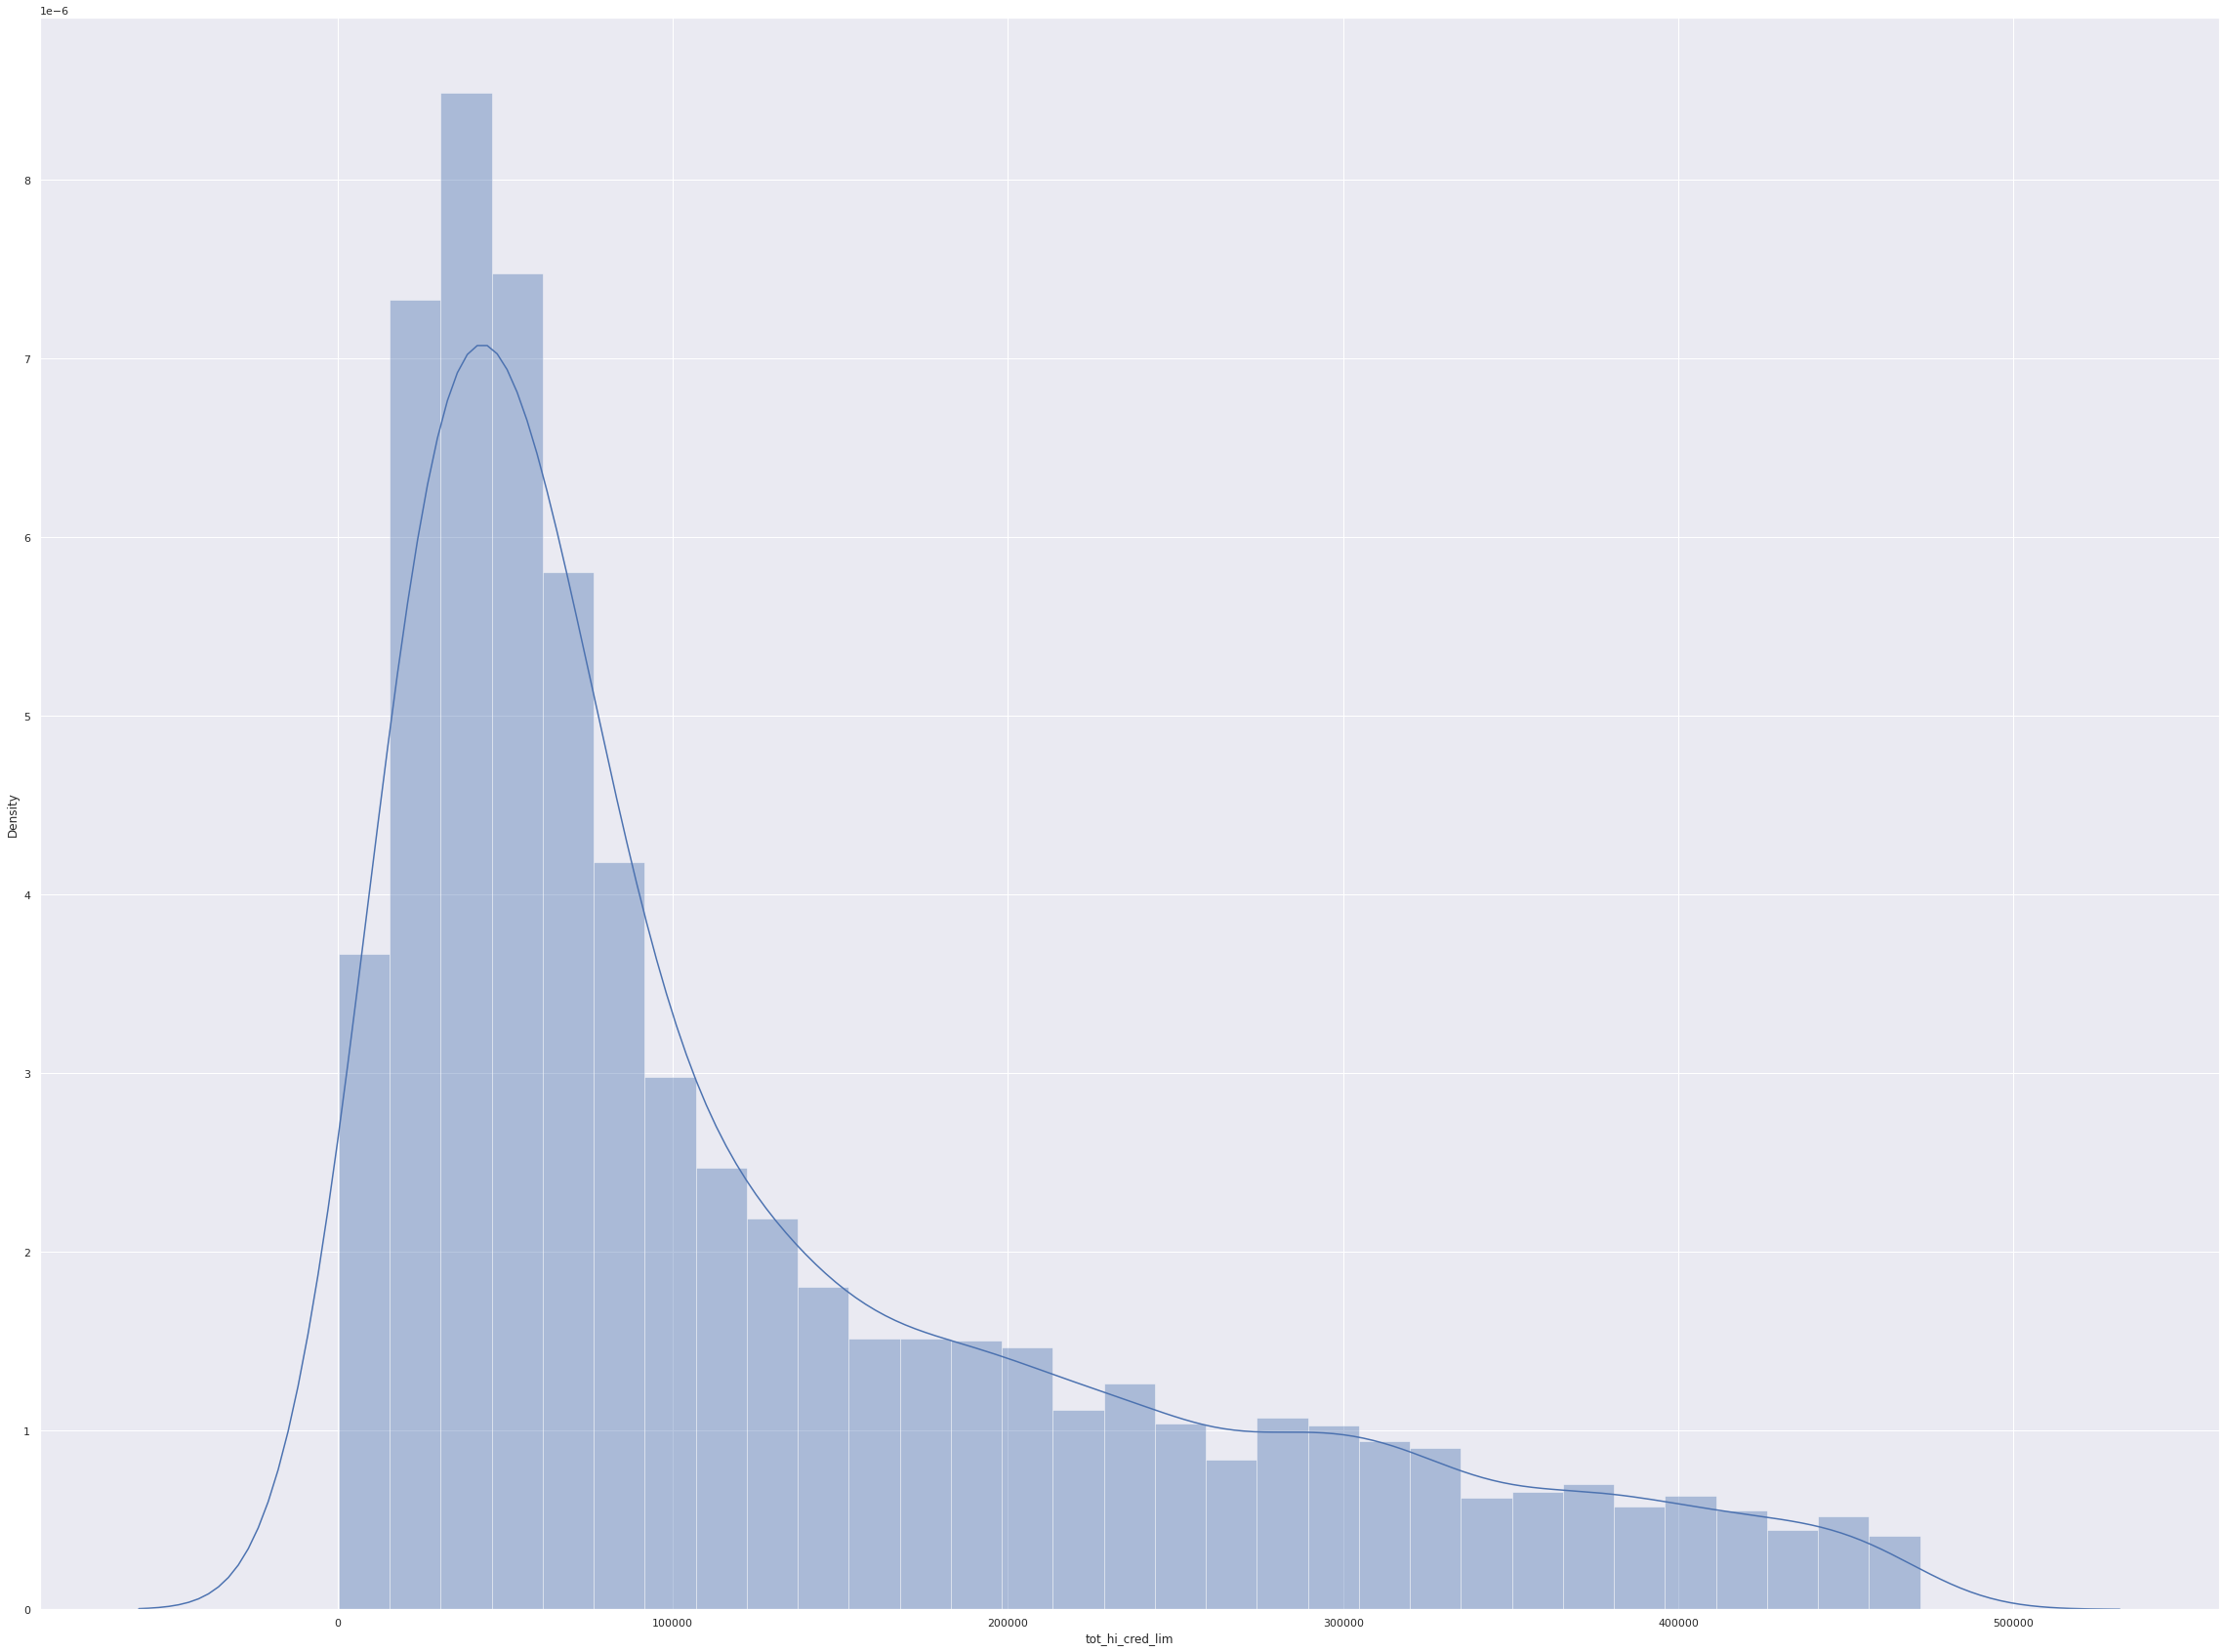

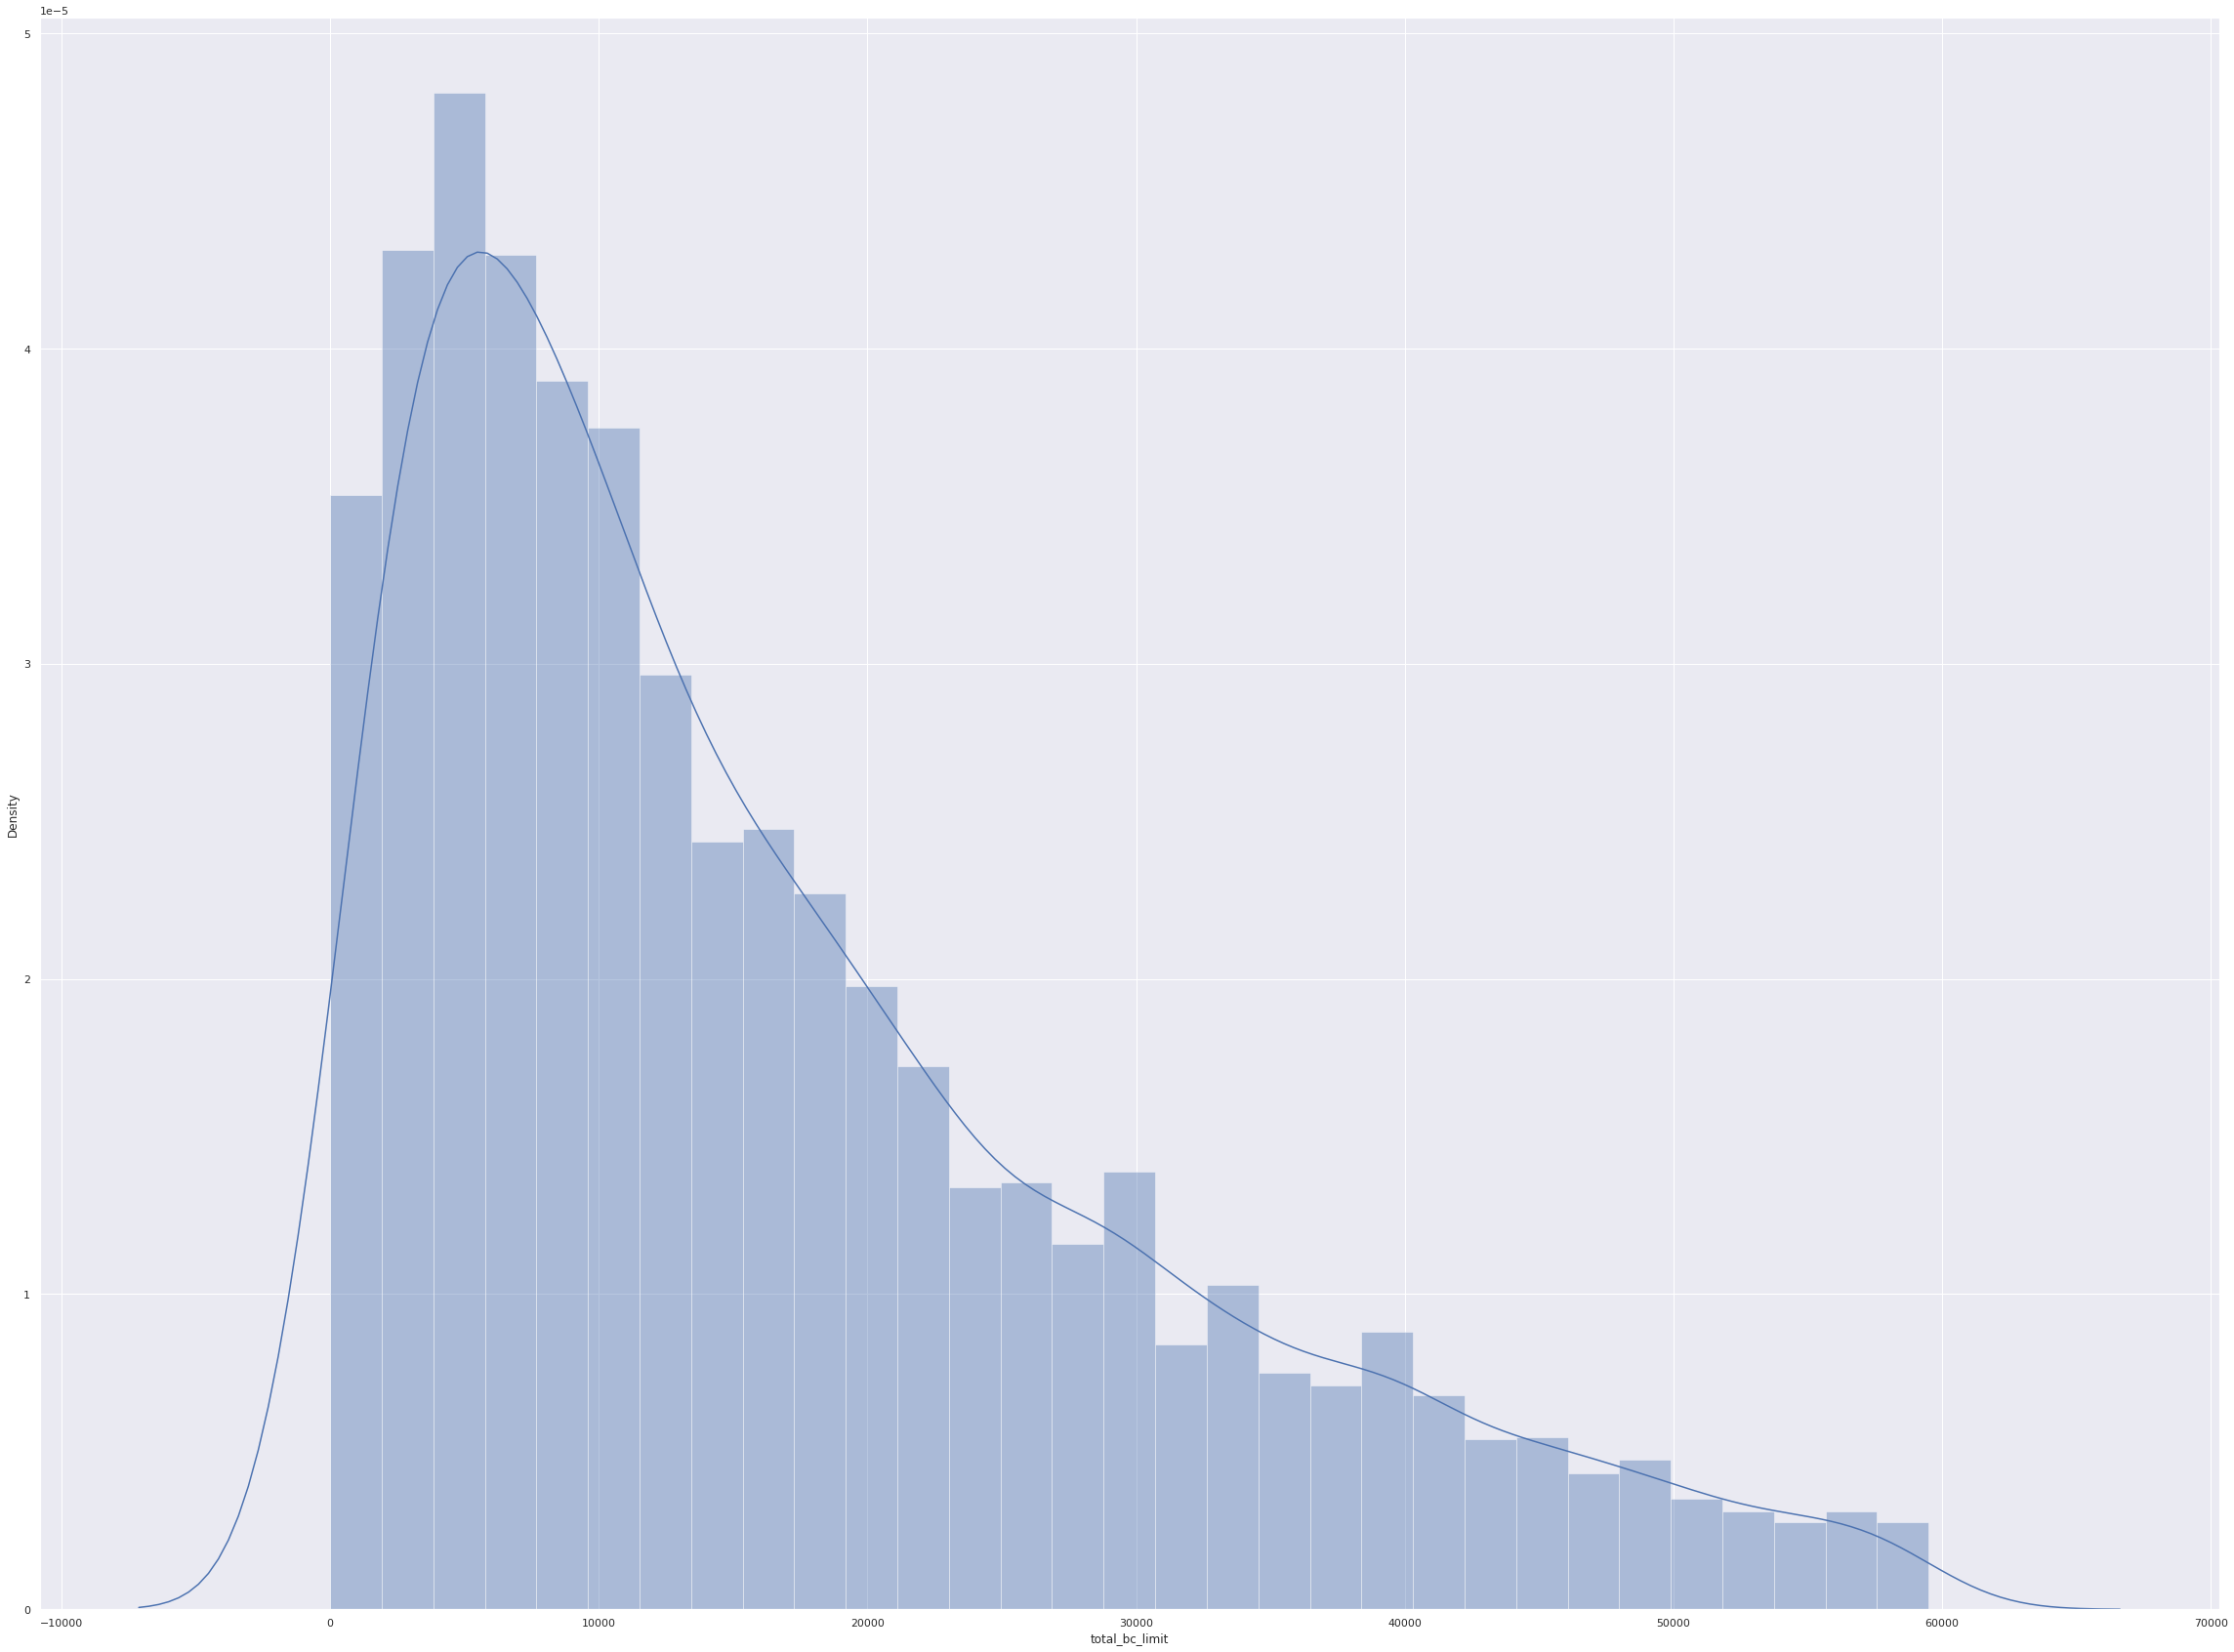

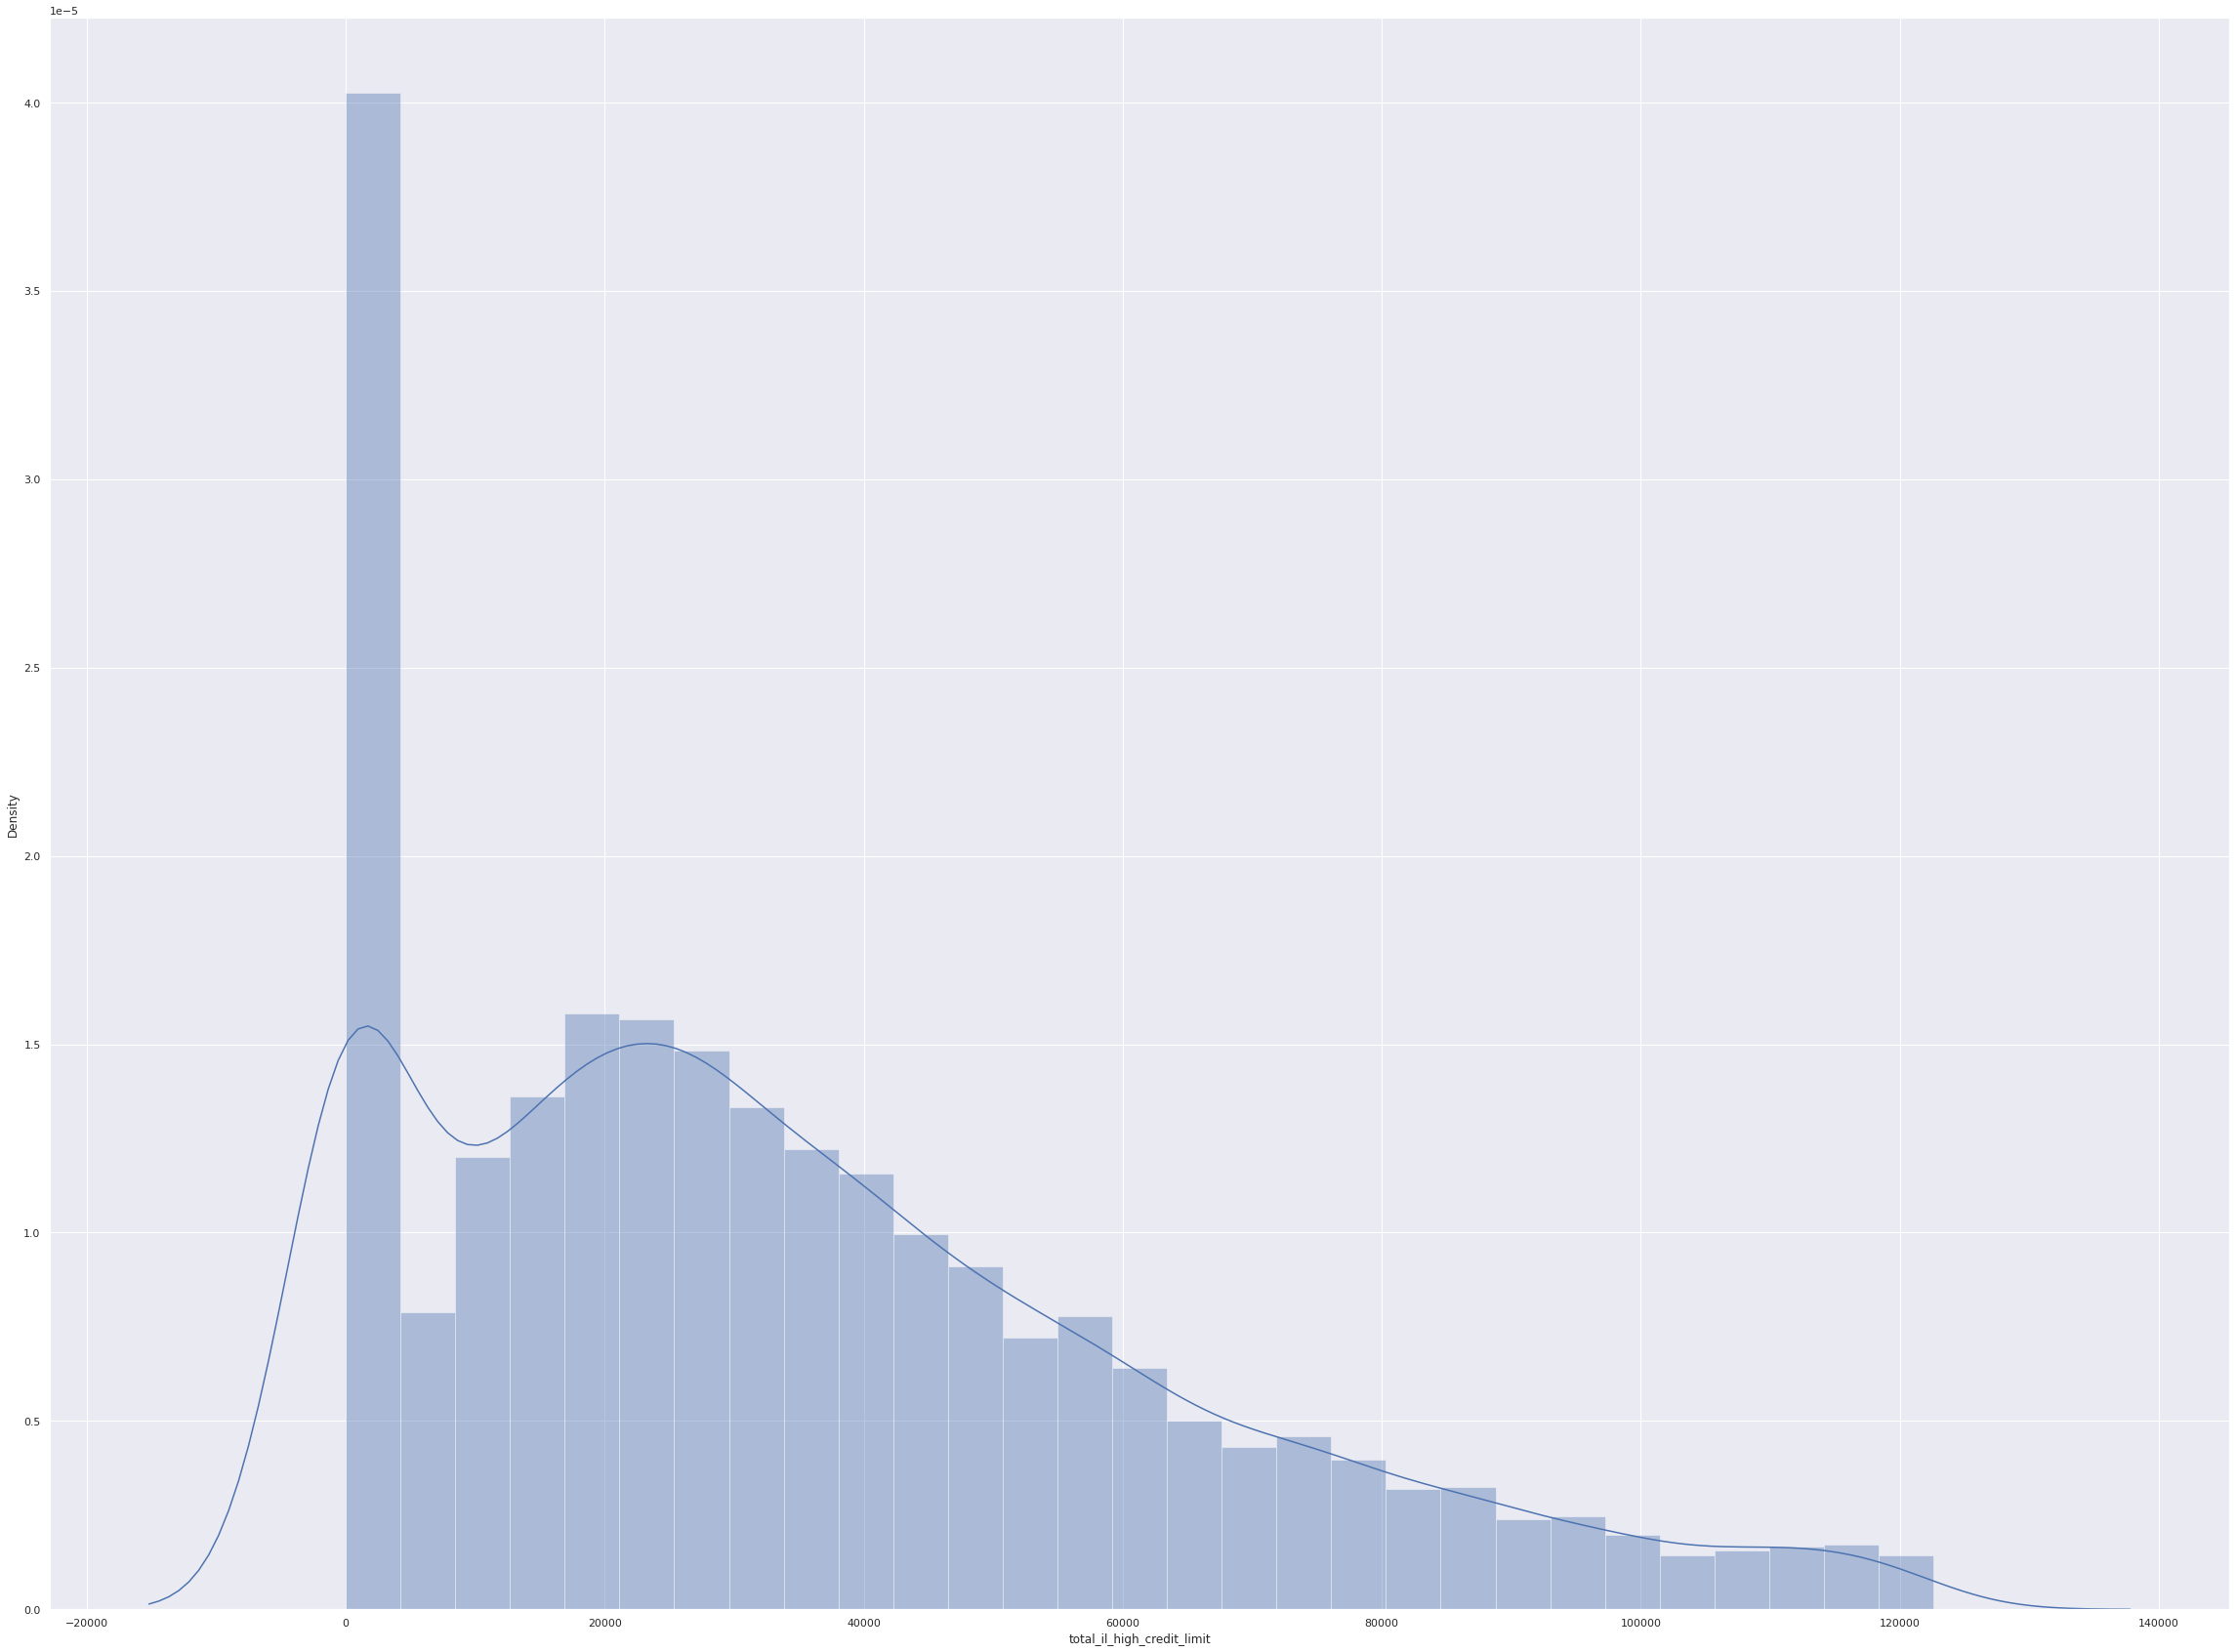

In [ ]:
for i in col:
    plt.figure()
    sns.distplot(df[i])

In [ ]:
column = df.columns 
for i in column:
    if df[i].isnull().sum() != 0 and df[i].dtypes == 'object':
      print(i)
      df[i].fillna('Unknown',inplace=True)

emp_title
emp_length
title


In [ ]:
column = df.columns
for i in column:
    if df[i].isnull().sum() != 0:
        mean = df[i].median()
        df[i].fillna(mean,inplace=True)

In [ ]:
df.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

# Pickle

In [ ]:
pickle.dump(df, open('/content/drive/MyDrive/ＭＹ FYP/Lending_Club_House_Cleaned.pkl', 'wb'))